In [44]:
import x
from x import create_model
from x import layer
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

* x is an ANN framework which I am currently developing.
* Currently it supports BG, SDG, MBGD optimizers
* RMSProp and Adam optimizer, adaptive learning rate and convolutional layers are still in development
* Currently supports only Relu activation function. Other kinds of linear and non-linear activation functions are still in development
* We can solve regression problem from it for now. Working on classification feature too.
* suggestions/critics/contributions are always open :)

In [17]:
df = pd.read_csv("/home/ujjawal/Downloads/TATACONSUM.csv")
df.head()

Symbol Series      Date  Prev Close  Open Price  High Price  Low Price  \
0  TATAGLOBAL     EQ  3-Jan-11       108.1      109.00       112.0     108.15   
1  TATAGLOBAL     EQ  4-Jan-11       111.5      111.90       114.2     111.60   
2  TATAGLOBAL     EQ  5-Jan-11       113.1      113.25       113.9     111.20   
3  TATAGLOBAL     EQ  6-Jan-11       112.3      112.90       113.4     110.10   
4  TATAGLOBAL     EQ  7-Jan-11       111.0      112.10       113.0     107.10   

   Last Price  Close Price  Average Price  Total Traded Quantity     Turnover  \
0      111.60        111.5         110.44                1381804  152608555.3   
1      113.05        113.1         113.22                1649997  186814503.1   
2      112.60        112.3         112.67                 712670   80293773.6   
3      111.15        111.0         111.48                 801491   89349870.5   
4      107.75        108.3         109.65                1343822  147355187.2   

  No. of Trades Deliverable Qty % Dly Qt to Traded Qty  
0             -          673781                  48.76  
1             -          694307                  42.08  
2             -          420405                  58.99  
3             -          345343                  43.09  
4             -          574676                  42.76

In [18]:
df.drop(columns=['Symbol', 'Series'], inplace=True)
df.head()

Date  Prev Close  Open Price  High Price  Low Price  Last Price  \
0  3-Jan-11       108.1      109.00       112.0     108.15      111.60   
1  4-Jan-11       111.5      111.90       114.2     111.60      113.05   
2  5-Jan-11       113.1      113.25       113.9     111.20      112.60   
3  6-Jan-11       112.3      112.90       113.4     110.10      111.15   
4  7-Jan-11       111.0      112.10       113.0     107.10      107.75   

   Close Price  Average Price  Total Traded Quantity     Turnover  \
0        111.5         110.44                1381804  152608555.3   
1        113.1         113.22                1649997  186814503.1   
2        112.3         112.67                 712670   80293773.6   
3        111.0         111.48                 801491   89349870.5   
4        108.3         109.65                1343822  147355187.2   

  No. of Trades Deliverable Qty % Dly Qt to Traded Qty  
0             -          673781                  48.76  
1             -          694307                  42.08  
2             -          420405                  58.99  
3             -          345343                  43.09  
4             -          574676                  42.76

In [21]:
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head()

Prev Close  Open Price  High Price  Low Price  Last Price  \
Date                                                                    
2011-01-03       108.1      109.00       112.0     108.15      111.60   
2011-01-04       111.5      111.90       114.2     111.60      113.05   
2011-01-05       113.1      113.25       113.9     111.20      112.60   
2011-01-06       112.3      112.90       113.4     110.10      111.15   
2011-01-07       111.0      112.10       113.0     107.10      107.75   

            Close Price  Average Price  Total Traded Quantity     Turnover  \
Date                                                                         
2011-01-03        111.5         110.44                1381804  152608555.3   
2011-01-04        113.1         113.22                1649997  186814503.1   
2011-01-05        112.3         112.67                 712670   80293773.6   
2011-01-06        111.0         111.48                 801491   89349870.5   
2011-01-07        108.3         109.65                1343822  147355187.2   

           No. of Trades Deliverable Qty % Dly Qt to Traded Qty  
Date                                                             
2011-01-03             -          673781                  48.76  
2011-01-04             -          694307                  42.08  
2011-01-05             -          420405                  58.99  
2011-01-06             -          345343                  43.09  
2011-01-07             -          574676                  42.76

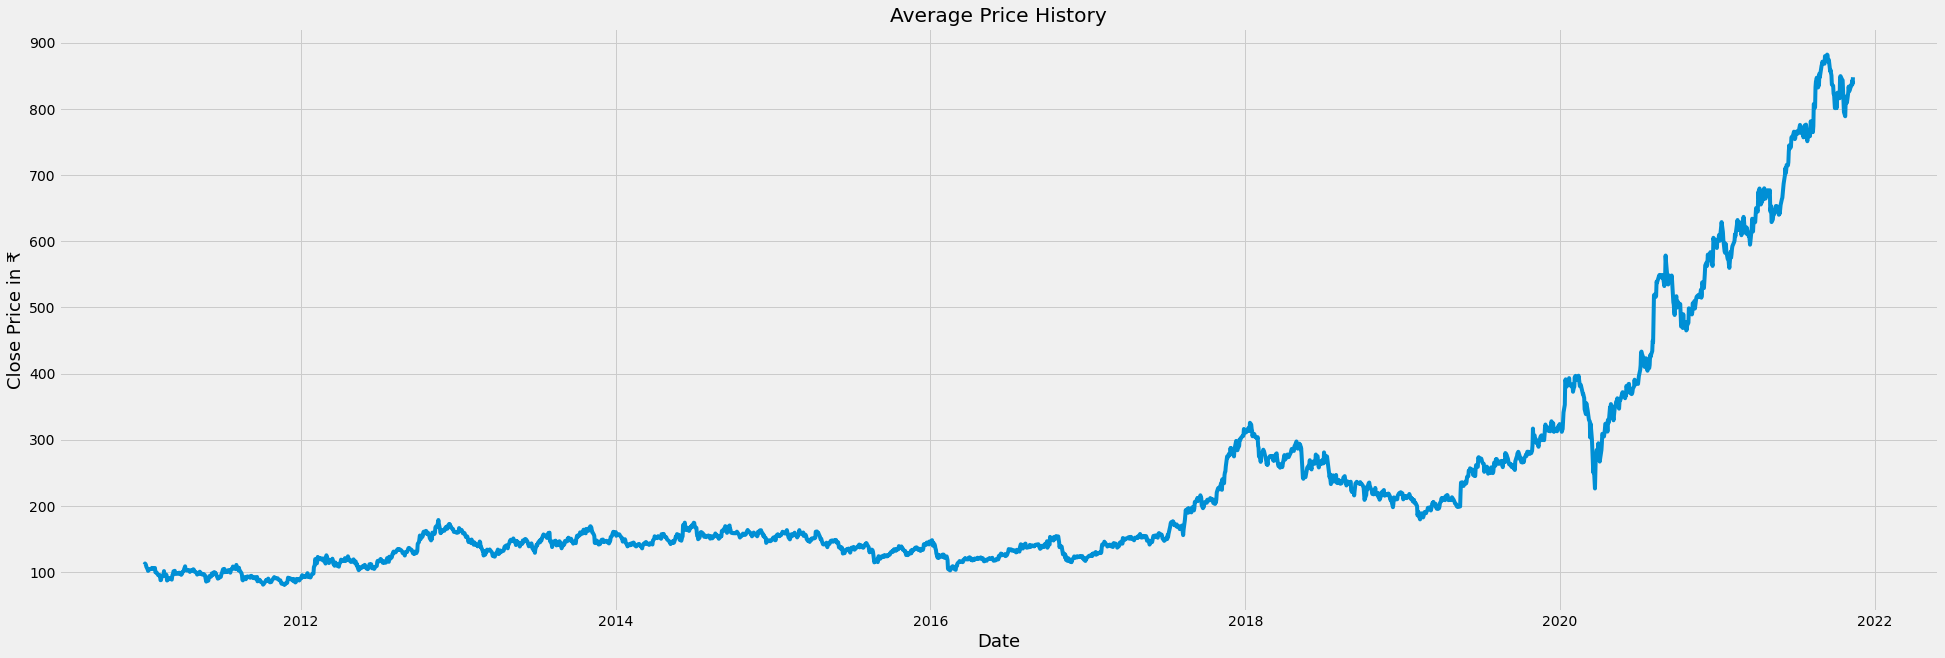

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30,10))
plt.title('Average Price History')
plt.plot( df['Close Price'])
plt.xlabel('Date',fontsize = 18)
#plt.xticks(rotation=90)
plt.ylabel('Close Price in ₹',fontsize = 18)
plt.show()

In [24]:
data = df.filter(['Close Price'])
dataset = data.values
dataset.shape

(2697, 1)

In [28]:
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)
training_data_len

2158

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data.shape

(2697, 1)

In [30]:
#Create a training data set
#Create a scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0 ])
  y_train.append(train_data[i,0])
    
#Convert the x_train and y_train to numpy array
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(2098, 60)
(2098,)


In [31]:
#x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape)
y_train = y_train.reshape(y_train.shape[0], 1)
print(y_train.shape)

(2098, 60)
(2098, 1)


In [32]:
#Create the testing data set
#Create a new array containing scaled values from index training data len to end
test_data = scaled_data[training_data_len - 60: , :]
#Create the dataset x_tests and y_tests
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [33]:
#Convert the data to the numpy array
x_test = np.array(x_test)

In [34]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (2098, 60)
y_train shape:  (2098, 1)
x_test shape:  (539, 60)
y_test shape:  (539, 1)


# Mini Batch Gradient Descent

In [35]:
#Mini batch gradient descent(batches of 100 are created in training set)
#creating the MLP model
model = create_model([
    layer(n_neurons = 30, input_shape = 60, activation = "relu"),
    layer(n_neurons = 20, input_shape = 30, activation = "relu"),
    layer(n_neurons = 10, input_shape = 20, activation = "relu"),
    layer(n_neurons = 1, input_shape = 10, activation = "relu"),
])
model.compile(optimizer = 'MBGD', learning_rate = 0.0001, loss = 'mse', gradient_clip = 1000)
model.fit(x_train, y_train, epochs = 4000, batch_size = 100)

Optimizing with mini batch gradient descent! 
 

Cost :  0.003617235211716437
Cost :  0.0003730076455983834
Cost :  0.011696548802520001
Cost :  0.001539013750182314
Cost :  0.022552748911704005
Cost :  0.0014124342999538451
Cost :  0.0010726395981546612
Cost :  0.00035692512962814623
Cost :  0.00015903637123497718
Cost :  0.000560307931376543
Cost :  0.013087210624426495
Cost :  8.327857838371765e-05
Cost :  0.00012325889727434744
Cost :  0.0003407810025794905
Cost :  0.001030393235106501
Cost :  0.0003776732552828122
Cost :  0.0018466092491045878
Cost :  0.0003766368998719068
Cost :  0.00036971544631889645
Cost :  0.00023837610632329373
Cost :  0.00011050537175250615
Cost :  0.0003983612992188643
Cost :  0.00016190773503371484
Cost :  7.368362958571086e-05
Cost :  0.0003186610381468853
Cost :  0.0001298154380232003
Cost :  0.00044906621098694723
Cost :  7.825298111075447e-05
Cost :  0.0002243815167751221
Cost :  0.00028261096600976353
Cost :  0.003760490834650396
Cost :  0.0011264283

Cost :  2.0044981758784623e-05
Cost :  0.00020118975011194245
Cost :  0.0006996029921877971
Cost :  0.00020108885876335324
Cost :  0.00026523389192148293
Cost :  7.274938762025889e-05
Cost :  0.00040355032356608037
Cost :  0.00033513304763810813
Cost :  0.00019898727853275467
Cost :  9.856088880439085e-05
Cost :  5.797974908918851e-05
Cost :  9.064913499786465e-05
Cost :  0.00012088391235213319
Cost :  5.8261427971372916e-05
Cost :  0.0012290934455092117
Cost :  0.00022019398934447983
Cost :  0.0001266518081770993
Cost :  0.0014220784253032171
Cost :  0.00034448241366684786
Cost :  6.03318149086093e-05
Cost :  0.0003206044764835952
Cost :  5.402021367416836e-05
Cost :  0.00018897467959615185
Cost :  0.00011759276708287398
Cost :  2.1392585431716798e-05
Cost :  0.00021193620096186477
Cost :  0.001402845661342803
Cost :  4.603345790261058e-05
Cost :  0.0007551336036664141
Cost :  0.00011015937026773343
Cost :  0.00010207689075425332
Cost :  5.218957809871331e-05
Cost :  0.000279079809046

Cost :  6.672129096331024e-05
Cost :  9.306148540725628e-05
Cost :  0.0001699417436005307
Cost :  2.325738091368085e-05
Cost :  0.0001549684222164139
Cost :  8.964806074955409e-05
Cost :  4.899751972751088e-05
Cost :  5.409681473078608e-05
Cost :  6.124786404051776e-05
Cost :  0.0008610397444945394
Cost :  9.023412530153128e-05
Cost :  3.848719555214127e-05
Cost :  0.0007625446719948043
Cost :  0.00011267048822270862
Cost :  0.0005948259834373304
Cost :  3.94902290577674e-05
Cost :  0.00010258095983447161
Cost :  6.492204744651219e-05
Cost :  0.0003394830405335852
Cost :  0.00019634892149295182
Cost :  0.00015248247962851047
Cost :  2.1389008659719587e-05
Cost :  0.0002998187007511835
Cost :  8.646459364036983e-05
Cost :  0.00018696143957747872
Cost :  4.820502598537793e-05
Cost :  0.0008271354534297597
Cost :  0.000181271848898759
Cost :  0.00010256933071420133
Cost :  0.00014323174768470442
Cost :  7.46335427450414e-05
Cost :  3.5134354256809284e-05
Cost :  5.5954717395393e-05
Cost :

Cost :  4.000426371062543e-05
Cost :  0.00011451958357792963
Cost :  4.5392499971022674e-05
Cost :  0.0002554330598653433
Cost :  0.0007285061317601498
Cost :  0.00012270078649335105
Cost :  5.372195526706215e-05
Cost :  2.3727094126255183e-05
Cost :  0.0005264238293871772
Cost :  9.512063112567949e-05
Cost :  9.197714615104843e-05
Cost :  0.000544137688652939
Cost :  0.00030643189044280404
Cost :  0.0001522563061214155
Cost :  0.0001597331645671275
Cost :  6.787879818849561e-05
Cost :  3.138655388102144e-05
Cost :  5.652105036461745e-05
Cost :  8.115313112604241e-05
Cost :  0.0002911025663320334
Cost :  0.0004672172298213692
Cost :  5.511979604084752e-05
Cost :  2.0854008704765326e-05
Cost :  0.0004980376636637139
Cost :  8.23336345304661e-05
Cost :  8.358385507347569e-05
Cost :  0.0001697688850050261
Cost :  0.0001172028813310564
Cost :  4.739913829030217e-05
Cost :  4.268857027544788e-05
Cost :  0.0007989152594724795
Cost :  3.2392885522937486e-05
Cost :  9.264879374879912e-05
Cost 

Cost :  0.00013587076486124868
Cost :  2.353614917926086e-05
Cost :  0.00036700439201522924
Cost :  0.00030081898777967994
Cost :  8.427538492636833e-05
Cost :  0.0007149893897003616
Cost :  4.433504288497279e-05
Cost :  6.26766765437225e-05
Cost :  8.142396600938512e-05
Cost :  4.136794189046035e-05
Cost :  6.844969059835081e-05
Cost :  0.00010231096989900052
Cost :  8.329586406287973e-05
Cost :  6.256091169562893e-05
Cost :  2.9864483252191912e-05
Cost :  0.00013211737691699727
Cost :  4.437340319427736e-05
Cost :  0.00010514744159432544
Cost :  0.0004323896749117911
Cost :  5.164821749879282e-05
Cost :  9.682814493679518e-05
Cost :  0.0003030349957517127
Cost :  3.737956019730718e-05
Cost :  7.589852972323165e-05
Cost :  8.175414338120253e-05
Cost :  0.0002374041306189278
Cost :  2.2789375388464513e-05
Cost :  4.052041397998342e-05
Cost :  0.00011850371488075232
Cost :  8.879407946662899e-05
Cost :  8.083816946130411e-05
Cost :  0.000353339869554132
Cost :  0.00014674286083386748
Co

Cost :  0.0001360676560333109
Cost :  9.525401590330071e-05
Cost :  3.7985296486975795e-05
Cost :  2.9696035210845986e-05
Cost :  0.0007074041297262399
Cost :  3.629858535114029e-05
Cost :  3.979259064618536e-05
Cost :  6.623373070528937e-05
Cost :  7.422475532254159e-05
Cost :  6.156017265778122e-05
Cost :  7.673594501736778e-05
Cost :  6.260082078507099e-05
Cost :  0.00011143053427303133
Cost :  0.00031609655313726026
Cost :  0.0003518760760309375
Cost :  7.704157765946065e-05
Cost :  3.534050737853017e-05
Cost :  4.794115064084937e-05
Cost :  0.0003060074489377639
Cost :  9.178225766437632e-05
Cost :  0.0007264201151559604
Cost :  2.3998971436978723e-05
Cost :  7.124092954039137e-05
Cost :  3.8821756658642135e-05
Cost :  7.382919420509459e-05
Cost :  0.0003124821205519405
Cost :  0.00013146447375807455
Cost :  2.797145937299651e-05
Cost :  0.00035302912090156793
Cost :  6.763351255198247e-05
Cost :  7.524900773820656e-05
Cost :  8.881506343802322e-05
Cost :  7.551658232440593e-05
Co

Cost :  0.00028299009179670083
Cost :  0.0003160888698236273
Cost :  4.7724811538557816e-05
Cost :  7.947376534771999e-05
Cost :  7.665149663437922e-05
Cost :  3.517432035793938e-05
Cost :  2.4178941884019446e-05
Cost :  0.00018985797252516235
Cost :  0.00013833351111156955
Cost :  7.172994821477127e-05
Cost :  0.0007177938639148938
Cost :  3.6841160892687135e-05
Cost :  6.647782449369555e-05
Cost :  6.311352326814621e-05
Cost :  6.993949303859488e-05
Cost :  3.910440041144378e-05
Cost :  2.2358438949701116e-05
Cost :  0.00012438717523929085
Cost :  0.00031212728440715835
Cost :  4.863475667791782e-05
Cost :  3.1609718421092976e-05
Cost :  6.405695300915174e-05
Cost :  0.00022918744601797125
Cost :  0.00031038316025870964
Cost :  7.159057209647304e-05
Cost :  0.000186631514189995
Cost :  2.6745549962645346e-05
Cost :  7.476866586802307e-05
Cost :  2.9628486737306925e-05
Cost :  8.535778602839701e-05
Cost :  7.692352510375209e-05
Cost :  6.920345094006863e-05
Cost :  6.734098854669417e-

Cost :  3.175679085041041e-05
Cost :  0.00028163331080602295
Cost :  4.764954472068786e-05
Cost :  0.0006784417644736758
Cost :  5.3558313227991095e-05
Cost :  0.0002323639666504849
Cost :  6.327976662877027e-05
Cost :  0.00027938183693442464
Cost :  4.130513516262013e-05
Cost :  6.7745870697558e-05
Cost :  6.446428553125715e-05
Cost :  8.225514042169314e-05
Cost :  7.430482392638735e-05
Cost :  4.78839160490619e-05
Cost :  2.989115635500912e-05
Cost :  5.782546987874583e-05
Cost :  0.0006489330546597748
Cost :  4.289062168118496e-05
Cost :  0.00018178997866889586
Cost :  5.633783888873235e-05
Cost :  0.00011657385106658409
Cost :  0.0002519095270938105
Cost :  2.6341999405100168e-05
Cost :  0.0003265512183849976
Cost :  3.446136603768656e-05
Cost :  0.00023317400037017172
Cost :  2.3061855623979527e-05
Cost :  7.018603523085986e-05
Cost :  7.116079501808976e-05
Cost :  6.70972736555666e-05
Cost :  6.854514348109258e-05
Cost :  7.454243486135159e-05
Cost :  7.081764337441956e-05
Cost :

Cost :  6.352516171030991e-05
Cost :  6.418071932000676e-05
Cost :  2.3371105234626667e-05
Cost :  2.3771039923220047e-05
Cost :  2.233657446340059e-05
Cost :  5.918228777776203e-05
Cost :  6.850508545060567e-05
Cost :  5.5995439210641044e-05
Cost :  3.1902094945833226e-05
Cost :  3.71879898766331e-05
Cost :  0.00016363296660823134
Cost :  5.818565236521037e-05
Cost :  5.412608240041519e-05
Cost :  7.189675985896347e-05
Cost :  6.258533096439265e-05
Cost :  4.7391155379882084e-05
Cost :  2.1136119177417283e-05
Cost :  3.407852713938073e-05
Cost :  6.964167880208448e-05
Cost :  0.0006404419750126489
Cost :  0.0002515193504824768
Cost :  0.0003059391372989997
Cost :  0.00021160672393741905
Cost :  0.00012089059560994226
Cost :  0.0002608030355647939
Cost :  4.742909942509926e-05
Cost :  0.00016842666842855592
Cost :  5.187770530295807e-05
Cost :  0.0002107147494053975
Cost :  6.041993083389038e-05
Cost :  7.07677277672703e-05
Cost :  7.0910798343485e-05
Cost :  2.87920001082134e-05
Cost 

Cost :  2.919894907573932e-05
Cost :  5.5735365652683954e-05
Cost :  2.1065428025455095e-05
Cost :  0.0006309139675662245
Cost :  2.207160439450189e-05
Cost :  5.92834364101608e-05
Cost :  7.530027921003624e-05
Cost :  0.00011464576874062215
Cost :  6.109913027174914e-05
Cost :  6.201942914201633e-05
Cost :  3.0363070072728202e-05
Cost :  0.00025430802042878753
Cost :  6.855851088755977e-05
Cost :  5.296222279219086e-05
Cost :  6.373600861981892e-05
Cost :  4.7168468329463114e-05
Cost :  0.00019531455490206216
Cost :  2.7043560088891053e-05
Cost :  6.29093053345056e-05
Cost :  2.207119591840308e-05
Cost :  0.00025110954386210705
Cost :  5.328254952149187e-05
Cost :  3.1230225902661944e-05
Cost :  0.0002843433577209009
Cost :  2.2371432683617223e-05
Cost :  4.9878407984504015e-05
Cost :  5.772878413328041e-05
Cost :  2.849583765107326e-05
Cost :  0.0001759009948656573
Cost :  0.00012010185351252061
Cost :  0.00016209015570512275
Cost :  6.493150619681236e-05
Cost :  6.224702887829021e-0

Cost :  2.3304518958874686e-05
Cost :  4.730252962191241e-05
Cost :  5.676962945225843e-05
Cost :  0.000258329575958378
Cost :  6.144041270077927e-05
Cost :  0.00010903615930964103
Cost :  4.352043294904854e-05
Cost :  2.2061154053059376e-05
Cost :  0.00026104566051062813
Cost :  0.0005711644290209922
Cost :  5.751387129486578e-05
Cost :  3.351221205458228e-05
Cost :  3.92824226004666e-05
Cost :  2.8420858047947468e-05
Cost :  0.00016022366319672448
Cost :  0.00018465311034707125
Cost :  4.5723896680834085e-05
Cost :  6.012089464908125e-05
Cost :  6.668975398822292e-05
Cost :  5.980595230426199e-05
Cost :  5.61192622070586e-05
Cost :  2.1925748441249336e-05
Cost :  0.000242340419040959
Cost :  5.958960020937802e-05
Cost :  5.397150623387244e-05
Cost :  2.917836609772218e-05
Cost :  0.00026583986948876004
Cost :  5.4432215878870705e-05
Cost :  4.6203146906083575e-05
Cost :  0.00016290090381454597
Cost :  6.406328202854295e-05
Cost :  6.02069170533231e-05
Cost :  0.0006204484816283449
Co

Cost :  0.00010428163385929194
Cost :  5.5516913449641524e-05
Cost :  2.034323757290242e-05
Cost :  5.445680064247298e-05
Cost :  0.0002441957252112193
Cost :  3.060971075170242e-05
Cost :  5.173372810763242e-05
Cost :  6.447201211557629e-05
Cost :  6.253185734254634e-05
Cost :  2.2292351536269494e-05
Cost :  2.422790845326763e-05
Cost :  0.0001405000503226527
Cost :  0.00014671563811165345
Cost :  5.949018830939167e-05
Cost :  5.149621965756109e-05
Cost :  0.0005990755413930951
Cost :  4.5656943729556183e-05
Cost :  5.6657678824060314e-05
Cost :  0.0002508920028357129
Cost :  3.0070733523314072e-05
Cost :  4.730304362957687e-05
Cost :  2.543848097140138e-05
Cost :  2.8320416266466006e-05
Cost :  2.2460279203710324e-05
Cost :  5.277722241926955e-05
Cost :  0.0005454826501142967
Cost :  3.767304569396579e-05
Cost :  6.002313526423573e-05
Cost :  0.00010398771802393391
Cost :  3.968761010348198e-05
Cost :  5.31800757210323e-05
Cost :  5.767361379623168e-05
Cost :  5.599483790260524e-05
C

Cost :  0.0001435715285572041
Cost :  3.0250186455578147e-05
Cost :  0.00023993840730314044
Cost :  5.407021949244585e-05
Cost :  5.127380586447301e-05
Cost :  2.2133880073906244e-05
Cost :  2.5436993945067302e-05
Cost :  6.979724353001535e-05
Cost :  6.384435422090195e-05
Cost :  0.00015516136606159804
Cost :  4.340225949500551e-05
Cost :  5.2825380389958115e-05
Cost :  0.000114461957273914
Cost :  2.7310736406650937e-05
Cost :  4.491558459587927e-05
Cost :  2.0494057127044947e-05
Cost :  2.2435937903821056e-05
Cost :  5.749329032784365e-05
Cost :  0.00010399708533603789
Cost :  5.3964149650847805e-05
Cost :  5.2704960515367976e-05
Cost :  0.00023920092135899446
Cost :  2.8533643886358825e-05
Cost :  0.00013416566649450737
Cost :  0.0005235697472773057
Cost :  0.0002670914773747649
Cost :  4.101570957086247e-05
Cost :  5.719479583453677e-05
Cost :  2.01481681162822e-05
Cost :  0.000167510634303104
Cost :  5.4456057605099274e-05
Cost :  5.322075607358245e-05
Cost :  4.647775918052543e-

Cost :  5.1695099969288204e-05
Cost :  0.00022485277108243485
Cost :  6.127478477890387e-05
Cost :  5.165432042851389e-05
Cost :  5.4345721833542905e-05
Cost :  5.910306500503407e-05
Cost :  4.3974858507727564e-05
Cost :  4.4674219668399335e-05
Cost :  2.1628030801620356e-05
Cost :  2.474823471088459e-05
Cost :  0.0005377755010205176
Cost :  0.00015308674757060314
Cost :  5.584173755246094e-05
Cost :  2.3339111915628547e-05
Cost :  0.00024051355100017534
Cost :  3.0475477449300614e-05
Cost :  0.0001303488371860851
Cost :  2.031238983308712e-05
Cost :  4.405041951953331e-05
Cost :  0.00010712115916642076
Cost :  0.0001439457975484762
Cost :  5.767782289915165e-05
Cost :  1.9619041801784893e-05
Cost :  4.5401260453226194e-05
Cost :  5.0051620227616627e-05
Cost :  2.8322282901199605e-05
Cost :  4.564237030315261e-05
Cost :  0.00012340906940481558
Cost :  0.00022036512939342307
Cost :  0.0001095760855520918
Cost :  5.69606420325024e-05
Cost :  3.908795864186463e-05
Cost :  0.00056235908469

Cost :  4.781056802247458e-05
Cost :  0.0004870530830804853
Cost :  0.0002113654517456993
Cost :  4.520887309869874e-05
Cost :  5.808225643622142e-05
Cost :  5.167754697556039e-05
Cost :  4.876849107620488e-05
Cost :  5.1298310096595614e-05
Cost :  0.0001300537307705072
Cost :  2.3986310458413836e-05
Cost :  3.171941313656556e-05
Cost :  0.00015384347746363292
Cost :  0.0002371092811323455
Cost :  6.201191543065303e-05
Cost :  2.0855292437174956e-05
Cost :  1.9402824217181415e-05
Cost :  0.00010734800969719422
Cost :  4.2968155936740245e-05
Cost :  2.684932743630305e-05
Cost :  2.5798233789924814e-05
Cost :  2.2011486912962495e-05
Cost :  2.5790835149859562e-05
Cost :  4.766493997813287e-05
Cost :  4.927139452233371e-05
Cost :  0.0001249820362060952
Cost :  0.00012896061727101377
Cost :  4.497810684265676e-05
Cost :  0.000102848089433561
Cost :  5.2091206663987586e-05
Cost :  4.988650338789458e-05
Cost :  1.9701429995035797e-05
Cost :  4.056281379256973e-05
Cost :  0.000521891566165699

Cost :  0.0004865712973388399
Cost :  0.00014858463437493122
Cost :  9.886237421975095e-05
Cost :  5.6658310185243856e-05
Cost :  2.288276712438595e-05
Cost :  4.423328927489305e-05
Cost :  4.5783542198322297e-05
Cost :  0.00013262299889059303
Cost :  4.8707455983346215e-05
Cost :  3.913513991325423e-05
Cost :  4.8765643784958806e-05
Cost :  2.1216537000727998e-05
Cost :  0.00022737889362333348
Cost :  1.8930132573476204e-05
Cost :  0.0004665448356970875
Cost :  3.135688999245889e-05
Cost :  5.650334265959985e-05
Cost :  4.864749253703108e-05
Cost :  2.4437560848717647e-05
Cost :  4.127736349418372e-05
Cost :  5.013652282657213e-05
Cost :  9.838762078456166e-05
Cost :  0.0002408654158026109
Cost :  6.522893143325098e-05
Cost :  0.00011778129437259946
Cost :  4.2130603788097914e-05
Cost :  2.724904214025567e-05
Cost :  0.0002166751617341822
Cost :  5.899193646739006e-05
Cost :  5.394258265870498e-05
Cost :  4.824162905047508e-05
Cost :  9.668851055113699e-05
Cost :  3.866851438279672e-0

Cost :  0.00022128633087849882
Cost :  5.571295842146401e-05
Cost :  4.242538811864908e-05
Cost :  6.11485363951371e-05
Cost :  0.00045654334332713545
Cost :  0.00019761926566769632
Cost :  0.0002360740934830759
Cost :  2.3703459656862886e-05
Cost :  4.717326156265413e-05
Cost :  5.548272231364597e-05
Cost :  4.671928229138372e-05
Cost :  2.247445188371412e-05
Cost :  2.8194260788139034e-05
Cost :  4.373432320394492e-05
Cost :  4.819844302297221e-05
Cost :  9.810647820796526e-05
Cost :  0.00011364399020252072
Cost :  1.9196413128188764e-05
Cost :  0.00013285382142131792
Cost :  2.7103017280819087e-05
Cost :  4.167086463740817e-05
Cost :  4.7356905401595845e-05
Cost :  4.042841278851462e-05
Cost :  4.4457430404082523e-05
Cost :  0.00020890923674680485
Cost :  1.7867958349940072e-05
Cost :  4.66011540138355e-05
Cost :  0.00011564768521568065
Cost :  3.450885510767682e-05
Cost :  2.079015975250149e-05
Cost :  5.4883785313945705e-05
Cost :  2.4444476702295705e-05
Cost :  0.0001068610367365

Cost :  3.780608861046845e-05
Cost :  1.9226373742642956e-05
Cost :  0.0001156905911217557
Cost :  4.568626902377035e-05
Cost :  4.7529946517389794e-05
Cost :  4.747733032957263e-05
Cost :  3.882787279115208e-05
Cost :  0.00019707116191663578
Cost :  1.59647110983529e-05
Cost :  0.0004805197190241102
Cost :  2.177554516006517e-05
Cost :  4.025744036942725e-05
Cost :  0.00021191985008351397
Cost :  5.5024870655706806e-05
Cost :  6.426992365650172e-05
Cost :  4.3058267385952335e-05
Cost :  0.00019882688658057462
Cost :  4.82823836420295e-05
Cost :  0.0001332501961784563
Cost :  2.1233380751035885e-05
Cost :  4.207381110269217e-05
Cost :  2.7414918193483647e-05
Cost :  5.9635439772055944e-05
Cost :  3.7589230563607495e-05
Cost :  1.782504139716293e-05
Cost :  4.283348411888169e-05
Cost :  4.1305265484728926e-05
Cost :  5.069227952637653e-05
Cost :  4.602269243809275e-05
Cost :  2.4358460038846498e-05
Cost :  0.00020705828878172182
Cost :  0.00046073883735462957
Cost :  9.563553259903156e-

Cost :  0.00011886169175180718
Cost :  4.406874303545525e-05
Cost :  2.2668717276395872e-05
Cost :  4.4803528780184296e-05
Cost :  2.130050208291128e-05
Cost :  5.3243506061174375e-05
Cost :  3.901910225469937e-05
Cost :  1.6899176800609972e-05
Cost :  4.662359123588883e-05
Cost :  1.951482365603529e-05
Cost :  9.641606772221508e-05
Cost :  0.00010221083721337932
Cost :  4.1036610723591495e-05
Cost :  2.5966601935247633e-05
Cost :  0.0004372083592480437
Cost :  3.8839368643353025e-05
Cost :  4.595158699719139e-05
Cost :  6.3673847620644e-05
Cost :  4.2092540303550784e-05
Cost :  4.340200572557265e-05
Cost :  0.00040599170965114077
Cost :  0.00011329148131003139
Cost :  4.955424730916339e-05
Cost :  0.00018826007878979933
Cost :  4.524638682660431e-05
Cost :  2.2936531526779996e-05
Cost :  0.0002278632492545809
Cost :  2.7315265481172238e-05
Cost :  4.605240213494695e-05
Cost :  2.768169563471302e-05
Cost :  1.9421992045158077e-05
Cost :  3.8777640101693226e-05
Cost :  6.41614303025664e

Cost :  4.357552327815709e-05
Cost :  4.6912814477797354e-05
Cost :  4.585952160929478e-05
Cost :  6.000468228307769e-05
Cost :  2.0709295096940523e-05
Cost :  4.847829498020218e-05
Cost :  3.822863112542262e-05
Cost :  0.00010488264063474716
Cost :  0.00021442141596816994
Cost :  4.3470522268191675e-05
Cost :  2.2518077459798917e-05
Cost :  5.412087179131155e-05
Cost :  2.8596811600890015e-05
Cost :  9.592397175505661e-05
Cost :  3.368946360825514e-05
Cost :  0.00042810708545110447
Cost :  1.9541260871964226e-05
Cost :  4.255246524651952e-05
Cost :  0.0001043616845236787
Cost :  1.8615919631885624e-05
Cost :  4.450824643055554e-05
Cost :  0.00020475617148871968
Cost :  4.285176386748397e-05
Cost :  3.938424427290786e-05
Cost :  4.107661898916137e-05
Cost :  0.0001113427938162344
Cost :  0.0002059068504308746
Cost :  2.1124714897684975e-05
Cost :  0.00019693977134497696
Cost :  5.881292192518943e-05
Cost :  0.0004253381588159881
Cost :  4.6198457195149036e-05
Cost :  3.801820054130819e

Cost :  2.010096100841179e-05
Cost :  3.110048630879157e-05
Cost :  0.00010330029023692496
Cost :  2.3454499553668806e-05
Cost :  0.00042286225308115996
Cost :  4.312182025389293e-05
Cost :  4.377459205133852e-05
Cost :  9.997075158326893e-05
Cost :  1.76506401006985e-05
Cost :  2.050199899886083e-05
Cost :  0.0001908155226298047
Cost :  4.463421298955363e-05
Cost :  4.098884825065214e-05
Cost :  5.898839488332751e-05
Cost :  9.109337081467522e-05
Cost :  4.9472832588855746e-05
Cost :  3.156985441453088e-05
Cost :  4.0459470364409355e-05
Cost :  4.251680637558442e-05
Cost :  9.687353055176972e-05
Cost :  4.471037947137784e-05
Cost :  0.00040727960743186466
Cost :  4.29860831647655e-05
Cost :  0.00011434354373783911
Cost :  1.8683024894370437e-05
Cost :  2.3751569696657487e-05
Cost :  2.5920776144347132e-05
Cost :  0.00020182300740188914
Cost :  1.9071264073621362e-05
Cost :  0.00038181763539297
Cost :  0.00020924703118947575
Cost :  4.717136306146184e-05
Cost :  3.928568236609658e-05
C

Cost :  2.4003366138355444e-05
Cost :  4.588617692460871e-05
Cost :  4.265463593754754e-05
Cost :  3.999708915615922e-05
Cost :  0.00037521536605689994
Cost :  3.544052890868188e-05
Cost :  8.544618914427562e-05
Cost :  0.00020748785312074057
Cost :  2.5610440937803143e-05
Cost :  0.00019083934118283946
Cost :  0.00010329901372153377
Cost :  1.8744047768779602e-05
Cost :  0.0001172327024268112
Cost :  6.020423860495418e-05
Cost :  2.213597950445175e-05
Cost :  0.00010307908469130644
Cost :  2.9877589757505414e-05
Cost :  4.06450587011078e-05
Cost :  4.5540909389669445e-05
Cost :  0.00019588410334588974
Cost :  4.882256500083063e-05
Cost :  0.0003764329140819995
Cost :  6.391856968058185e-05
Cost :  4.0442997292895256e-05
Cost :  2.5035691169830716e-05
Cost :  2.0533639969242735e-05
Cost :  1.905900254051301e-05
Cost :  2.1157185526038228e-05
Cost :  3.7201196801882155e-05
Cost :  2.8844942152611617e-05
Cost :  8.993972488568755e-05
Cost :  9.711648881027525e-05
Cost :  0.00020272679364

Cost :  0.0001882221309669942
Cost :  3.7232960641372167e-05
Cost :  4.426124946440749e-05
Cost :  2.5096658475804514e-05
Cost :  0.00019943570334689836
Cost :  3.616047073123068e-05
Cost :  0.00010215752146885909
Cost :  4.143636806982781e-05
Cost :  0.00037793277393732117
Cost :  3.9261704212205546e-05
Cost :  2.403924152341906e-05
Cost :  1.995098578845458e-05
Cost :  0.00018777890457866538
Cost :  5.886521660374777e-05
Cost :  9.06140808848193e-05
Cost :  4.7406543314912584e-05
Cost :  0.00019279731853968864
Cost :  3.238437862508699e-05
Cost :  4.184780398930852e-05
Cost :  3.6147456134704306e-05
Cost :  4.0254035607789135e-05
Cost :  1.937556039964322e-05
Cost :  0.0003599850990137261
Cost :  4.4805744352153674e-05
Cost :  8.725928788758608e-05
Cost :  4.529465638330138e-05
Cost :  0.00011578339856239874
Cost :  2.2616742068647282e-05
Cost :  3.9460219166911384e-05
Cost :  2.6700058768536368e-05
Cost :  1.926548605825622e-05
Cost :  2.322063934045233e-05
Cost :  3.507806666473499

Cost :  2.4942012154900925e-05
Cost :  0.00017070300394974984
Cost :  6.394524799723059e-05
Cost :  4.2426732114834675e-05
Cost :  4.119552987794944e-05
Cost :  0.00011051393938129209
Cost :  4.676346197449579e-05
Cost :  0.00019587220941024174
Cost :  4.072660902188195e-05
Cost :  1.802944553480373e-05
Cost :  8.524730667983611e-05
Cost :  5.4775515500991594e-05
Cost :  9.243119075394681e-05
Cost :  3.7777043668429076e-05
Cost :  1.996761855350162e-05
Cost :  2.884106968852979e-05
Cost :  1.3997890348097297e-05
Cost :  1.911885166385504e-05
Cost :  9.860179302655102e-05
Cost :  4.547987004291048e-05
Cost :  0.00017880878497479572
Cost :  4.016517015933449e-05
Cost :  0.00020349763838648681
Cost :  2.5155712578890963e-05
Cost :  4.3591628147281406e-05
Cost :  3.7937863553810924e-05
Cost :  3.8404784280186164e-05
Cost :  0.0003703365858597271
Cost :  0.00018411296445612155
Cost :  8.892690742757455e-05
Cost :  2.2701593426802332e-05
Cost :  0.00010001170112952967
Cost :  2.6723443524482

Cost :  0.0003547492754951515
Cost :  3.855519557874188e-05
Cost :  8.836124245323044e-05
Cost :  3.168740237382202e-05
Cost :  3.635996834964845e-05
Cost :  3.385115355551963e-05
Cost :  4.4321882990606086e-05
Cost :  3.728889476801419e-05
Cost :  1.7737311499394082e-05
Cost :  0.00018679429304726855
Cost :  8.948264408246468e-05
Cost :  3.7793586718828e-05
Cost :  9.313896534122575e-05
Cost :  2.445868751041649e-05
Cost :  0.000355819043137555
Cost :  4.7263039431839526e-05
Cost :  4.303882159955871e-05
Cost :  1.8636140427445912e-05
Cost :  3.5685776443317716e-05
Cost :  2.1920432666604208e-05
Cost :  2.9646727182512292e-05
Cost :  8.988868012509533e-05
Cost :  0.00018270475384546696
Cost :  2.294666765238903e-05
Cost :  5.877310192648248e-05
Cost :  8.288748024615473e-05
Cost :  1.8909714219414542e-05
Cost :  0.00017321108796519423
Cost :  1.693909014805615e-05
Cost :  0.00010218532772831302
Cost :  3.793554675134266e-05
Cost :  2.068472747175219e-05
Cost :  5.243192761621591e-05
C

Cost :  4.157025233904345e-05
Cost :  1.9516659686583142e-05
Cost :  2.4796879446460447e-05
Cost :  0.0001656032312333119
Cost :  4.699733086326906e-05
Cost :  8.078933657266918e-05
Cost :  4.358481318197361e-05
Cost :  3.8552482322170857e-05
Cost :  2.0719205701278283e-05
Cost :  5.136485300792565e-05
Cost :  1.3514448535083993e-05
Cost :  4.098251498622211e-05
Cost :  1.812457447705172e-05
Cost :  0.0001942744461202433
Cost :  3.736474326273152e-05
Cost :  9.398338832520204e-05
Cost :  0.00034968197033269014
Cost :  2.9292443869650718e-05
Cost :  0.0003207897914330129
Cost :  3.248176415283635e-05
Cost :  2.2240995163200646e-05
Cost :  3.9399264307918684e-05
Cost :  0.00018981116798315258
Cost :  0.0001695657783815125
Cost :  8.678164614741182e-05
Cost :  4.27986816056909e-05
Cost :  1.941526746749178e-05
Cost :  2.1523296176229044e-05
Cost :  8.77299753859262e-05
Cost :  2.268668713706461e-05
Cost :  3.80055444133672e-05
Cost :  0.00010429944493896925
Cost :  3.89523985184411e-05
Co

Cost :  2.122494168546442e-05
Cost :  0.0001747035947801863
Cost :  3.443925207045616e-05
Cost :  5.4252210777833774e-05
Cost :  0.00018567841818114544
Cost :  3.9373055911963736e-05
Cost :  1.6003282034054764e-05
Cost :  0.0003232625597810741
Cost :  0.00016077699109088702
Cost :  3.643455483729659e-05
Cost :  2.3024161504463518e-05
Cost :  3.6856775106863534e-05
Cost :  8.391351838205745e-05
Cost :  0.00010300175004057168
Cost :  2.932630876966374e-05
Cost :  8.974830091793899e-05
Cost :  3.893975473794407e-05
Cost :  4.445050081747637e-05
Cost :  1.9702047075234467e-05
Cost :  4.186874702395279e-05
Cost :  2.730166037850739e-05
Cost :  0.0001788446685840886
Cost :  2.122650191690738e-05
Cost :  5.480008732892266e-05
Cost :  3.554273529845466e-05
Cost :  8.694380961626933e-05
Cost :  4.897126800672308e-05
Cost :  1.6538710412844897e-05
Cost :  7.590372729100143e-05
Cost :  4.396288875511679e-05
Cost :  1.2965644818418198e-05
Cost :  3.382255033352078e-05
Cost :  9.042315082633606e-05

Cost :  1.7949997825096486e-05
Cost :  2.9355051633156524e-05
Cost :  9.680729570729158e-05
Cost :  0.00017661503336421168
Cost :  7.444878676722636e-05
Cost :  3.8149945245041626e-05
Cost :  4.514572671732864e-05
Cost :  3.6870869576181174e-05
Cost :  9.0069453132253e-05
Cost :  2.526240912138887e-05
Cost :  3.7037686916633395e-05
Cost :  8.476774725699032e-05
Cost :  2.210734123799223e-05
Cost :  7.768474234009116e-05
Cost :  3.800577585050769e-05
Cost :  1.9829298530142148e-05
Cost :  3.606933496402276e-05
Cost :  8.418601004736837e-05
Cost :  0.00016416889502840682
Cost :  3.444419223043439e-05
Cost :  1.6443430866777666e-05
Cost :  2.411138620116398e-05
Cost :  2.0722646012052414e-05
Cost :  0.0001937944800390046
Cost :  4.281575909207847e-05
Cost :  5.192985020332296e-05
Cost :  4.162678692048536e-05
Cost :  4.526957421787517e-05
Cost :  3.6170038100765775e-05
Cost :  0.0003319826462825617
Cost :  1.7107441125072408e-05
Cost :  3.6230608597248054e-05
Cost :  5.2459798374235605e-0

Cost :  2.0446449830920092e-05
Cost :  3.871765496975695e-05
Cost :  8.084842587367681e-05
Cost :  5.523372557533621e-05
Cost :  8.749833874272606e-05
Cost :  3.600170711178098e-05
Cost :  2.6623900926156685e-05
Cost :  8.574783359147009e-05
Cost :  7.575662090348679e-05
Cost :  0.00031097603688064044
Cost :  1.926053544128285e-05
Cost :  3.871935567273144e-05
Cost :  4.301995890445907e-05
Cost :  4.169663414855904e-05
Cost :  3.4441491241909385e-05
Cost :  5.507913748413162e-05
Cost :  3.3703142015153806e-05
Cost :  2.8024395398111877e-05
Cost :  1.7216278415979435e-05
Cost :  3.7817132928733126e-05
Cost :  2.0899918554547333e-05
Cost :  0.00017360643285492435
Cost :  1.669297273555048e-05
Cost :  0.00017687604139115392
Cost :  0.00016510395922412498
Cost :  8.714717383108943e-05
Cost :  4.4390895080550165e-05
Cost :  3.9801345675818665e-05
Cost :  1.943358969928253e-05
Cost :  2.1298937943520535e-05
Cost :  8.562963114092166e-05
Cost :  5.046306929766456e-05
Cost :  3.439228633302149

Cost :  2.7637089694907517e-05
Cost :  3.4315413469344814e-05
Cost :  4.17238500930172e-05
Cost :  1.7640271092913916e-05
Cost :  5.646634469280591e-05
Cost :  4.4627114794373685e-05
Cost :  8.621074717441863e-05
Cost :  3.906156171721539e-05
Cost :  2.590353885412129e-05
Cost :  4.0578225090115075e-05
Cost :  2.482817093481582e-05
Cost :  5.0321095981763304e-05
Cost :  8.146311157235327e-05
Cost :  1.594578392875013e-05
Cost :  2.182958019526486e-05
Cost :  3.894882968400822e-05
Cost :  8.269445674169063e-05
Cost :  1.4868303520500216e-05
Cost :  3.3798378627179005e-05
Cost :  0.00031156112912077426
Cost :  4.0079860770097744e-05
Cost :  1.9569208451321927e-05
Cost :  0.00017362603668096764
Cost :  2.561788034131545e-05
Cost :  3.2361693183166036e-05
Cost :  4.297614552623972e-05
Cost :  7.828765135144701e-05
Cost :  0.00017378040693204308
Cost :  3.4088910548815976e-05
Cost :  4.008447300262454e-05
Cost :  8.837347938876854e-05
Cost :  2.6079478127991283e-05
Cost :  0.000298113704574

Cost :  1.968662147304991e-05
Cost :  3.673968383974657e-05
Cost :  1.8035739567262218e-05
Cost :  1.8145679914408452e-05
Cost :  8.79077933746619e-05
Cost :  2.842433403008078e-05
Cost :  0.00017527602466106129
Cost :  4.429706257883267e-05
Cost :  1.9798654386541305e-05
Cost :  3.5244250873262834e-05
Cost :  3.411193284159193e-05
Cost :  2.731684636081449e-05
Cost :  3.324057493957985e-05
Cost :  8.838015207566995e-05
Cost :  5.207501019808932e-05
Cost :  3.212174057558386e-05
Cost :  3.683191784711333e-05
Cost :  2.5012656142955192e-05
Cost :  7.938397853288644e-05
Cost :  3.98677609712748e-05
Cost :  0.00029788333524516754
Cost :  1.616263990368455e-05
Cost :  1.9553385081288102e-05
Cost :  5.3573040635338095e-05
Cost :  3.621741499630817e-05
Cost :  0.00016549331210257174
Cost :  0.0001738265501607546
Cost :  8.403253328890973e-05
Cost :  7.75779933776378e-05
Cost :  2.126501993265139e-05
Cost :  4.081782787260624e-05
Cost :  3.303059257950665e-05
Cost :  1.6212636779016876e-05
Co

Cost :  3.850541194698823e-05
Cost :  3.6807237106910774e-05
Cost :  3.912251103841131e-05
Cost :  0.00017275117497488353
Cost :  3.860604575800493e-05
Cost :  2.5081538431515833e-05
Cost :  7.017893030025871e-05
Cost :  1.9960175505703187e-05
Cost :  3.4182230684121245e-05
Cost :  5.104152103953151e-05
Cost :  2.703241231861421e-05
Cost :  0.0002891414231789012
Cost :  4.282413695959018e-05
Cost :  2.0490174377774368e-05
Cost :  3.219768133519182e-05
Cost :  1.7247340099717878e-05
Cost :  1.6935589897780965e-05
Cost :  8.83281086432744e-05
Cost :  2.571611869475859e-05
Cost :  3.153059817056231e-05
Cost :  2.048472659750543e-05
Cost :  4.965847302901995e-05
Cost :  8.009023258738295e-05
Cost :  0.0002802616866068513
Cost :  1.9027434065906285e-05
Cost :  0.00016968256216515817
Cost :  2.0522495319858264e-05
Cost :  2.954240239509074e-05
Cost :  4.1966878175364266e-05
Cost :  7.64910286061605e-05
Cost :  3.9050728631782006e-05
Cost :  1.5353028167335533e-05
Cost :  8.2212043228152e-05


Cost :  4.0788903305093515e-05
Cost :  5.049455022443857e-05
Cost :  6.836880425230887e-05
Cost :  0.00016053992924866658
Cost :  8.546203280564416e-05
Cost :  2.5387523120354708e-05
Cost :  4.057121258689863e-05
Cost :  2.243974932457058e-05
Cost :  7.673358571949133e-05
Cost :  3.213498969017452e-05
Cost :  3.289934495415675e-05
Cost :  2.092948622005569e-05
Cost :  1.3582487623469773e-05
Cost :  4.041008620913615e-05
Cost :  3.638014900697719e-05
Cost :  0.00017054737584996525
Cost :  2.095855658116654e-05
Cost :  0.0002804584719108442
Cost :  1.730891096898704e-05
Cost :  7.154455203048781e-05
Cost :  3.758389596330354e-05
Cost :  1.456626808339466e-05
Cost :  3.3486227244245046e-05
Cost :  0.00016126942426031114
Cost :  3.294451751865626e-05
Cost :  8.088002112326777e-05
Cost :  1.8397822241521767e-05
Cost :  2.006542320724353e-05
Cost :  0.00028270874926283337
Cost :  2.7933833821094942e-05
Cost :  4.356298078409972e-05
Cost :  5.5269177117438245e-05
Cost :  1.551943409780446e-05

Cost :  2.6005548932655234e-05
Cost :  7.852309391652975e-05
Cost :  3.701904252794322e-05
Cost :  3.121760692044362e-05
Cost :  1.3366363860111526e-05
Cost :  3.166203294296318e-05
Cost :  3.862942599118904e-05
Cost :  2.128953512160174e-05
Cost :  4.2031364685003114e-05
Cost :  6.686523198661361e-05
Cost :  3.937406832032524e-05
Cost :  0.0002829054447107221
Cost :  1.54245966676117e-05
Cost :  1.9660043801373842e-05
Cost :  6.693048640441583e-05
Cost :  3.1854883887772514e-05
Cost :  0.00015347380505261173
Cost :  0.00016337995798304674
Cost :  3.3491207745625175e-05
Cost :  0.00026316006036501146
Cost :  3.273925810247466e-05
Cost :  2.8043132109178356e-05
Cost :  9.098408609221709e-05
Cost :  2.459754290436345e-05
Cost :  1.9841346536542316e-05
Cost :  1.4672440511287118e-05
Cost :  3.695103724738495e-05
Cost :  5.33908503581658e-05
Cost :  8.37306074083165e-05
Cost :  3.836136950066121e-05
Cost :  1.547844414635254e-05
Cost :  4.155162880949976e-05
Cost :  4.070953105735047e-05
C

Cost :  8.34156301854832e-05
Cost :  2.250349534087922e-05
Cost :  0.0002828973622111168
Cost :  0.00016211577108607013
Cost :  3.8182930771320215e-05
Cost :  7.01441504261371e-05
Cost :  3.306377995347625e-05
Cost :  4.961117330109655e-05
Cost :  3.5924022438936875e-05
Cost :  7.5202627122798e-05
Cost :  3.922251456200672e-05
Cost :  3.963738453855033e-05
Cost :  1.2963474995538946e-05
Cost :  6.0734569730379354e-05
Cost :  3.510879874178525e-05
Cost :  2.0951319386904558e-05
Cost :  8.409796795312755e-05
Cost :  1.4178273788382823e-05
Cost :  0.00015878654177605515
Cost :  2.3644588598917615e-05
Cost :  0.0002648608484485192
Cost :  3.280280544578571e-05
Cost :  0.00016581096625943503
Cost :  2.0147792069053136e-05
Cost :  2.6873223219585284e-05
Cost :  3.793476011938285e-05
Cost :  3.545173151458571e-05
Cost :  2.9874380753296173e-05
Cost :  0.0001500152729206764
Cost :  5.283176149571293e-05
Cost :  2.963570530089854e-05
Cost :  0.00015723776053600888
Cost :  8.22895857139772e-05
C

Cost :  3.078738280313136e-05
Cost :  2.099198844494915e-05
Cost :  3.8215819840209575e-05
Cost :  3.973143846581897e-05
Cost :  1.4273338184244382e-05
Cost :  3.59553232271901e-05
Cost :  4.7653065035318384e-05
Cost :  1.9349617927139924e-05
Cost :  7.936001444033743e-05
Cost :  2.8921849104195195e-05
Cost :  3.942999697345251e-05
Cost :  6.784373695321546e-05
Cost :  0.0001551369208081808
Cost :  0.00015950362338533862
Cost :  2.1088628685132144e-05
Cost :  1.3634482289694476e-05
Cost :  3.7948600970884795e-05
Cost :  2.729719642488061e-05
Cost :  3.799352746307579e-05
Cost :  1.410806888951708e-05
Cost :  2.174150625440649e-05
Cost :  7.495775356847706e-05
Cost :  3.566266922764882e-05
Cost :  0.000269412120181892
Cost :  3.100268150572152e-05
Cost :  4.9956674458635725e-05
Cost :  3.994507415694286e-05
Cost :  0.00024949482074255547
Cost :  3.9007732100035055e-05
Cost :  0.00016218301451570002
Cost :  6.834246975601615e-05
Cost :  0.0001494170061159996
Cost :  2.058131695024881e-05

Cost :  2.0194782646258538e-05
Cost :  2.673061191047701e-05
Cost :  0.0001525836888079661
Cost :  3.80378984211379e-05
Cost :  1.4226097841813636e-05
Cost :  7.765770051392107e-05
Cost :  6.0337633937682386e-05
Cost :  4.624705799260071e-05
Cost :  3.313960660543154e-05
Cost :  8.432152243554327e-05
Cost :  3.2472224819957244e-05
Cost :  3.806915499308043e-05
Cost :  4.095056707026321e-05
Cost :  0.00025454199648173545
Cost :  0.0001597355553078587
Cost :  1.962925416579326e-05
Cost :  2.2111110575002255e-05
Cost :  3.0553800762023154e-05
Cost :  3.628215635662786e-05
Cost :  4.865313404779149e-05
Cost :  2.650904973521953e-05
Cost :  7.773092238715102e-05
Cost :  3.966991575608093e-05
Cost :  1.34978550263611e-05
Cost :  3.7078125561732276e-05
Cost :  6.624003430534679e-05
Cost :  3.0469160678493964e-05
Cost :  0.0002530537147270844
Cost :  2.8302424586238114e-05
Cost :  3.492190065037963e-05
Cost :  0.00015504926069242399
Cost :  7.816214351071544e-05
Cost :  2.0882917775232878e-05


Cost :  3.139820856060421e-05
Cost :  2.1097053107528762e-05
Cost :  3.741510182704883e-05
Cost :  2.2176709590340418e-05
Cost :  2.728930834675567e-05
Cost :  0.00014223304840571828
Cost :  0.0002512199028603554
Cost :  2.512465504741164e-05
Cost :  4.116845155052765e-05
Cost :  1.3507153462865774e-05
Cost :  2.0558684775381166e-05
Cost :  2.8904720985740744e-05
Cost :  1.470629616248674e-05
Cost :  5.062616131745362e-05
Cost :  3.815243016126692e-05
Cost :  2.1107670557916607e-05
Cost :  7.537816670967572e-05
Cost :  2.9135129144179598e-05
Cost :  7.749430785831524e-05
Cost :  0.0001558918089973031
Cost :  6.628208721498491e-05
Cost :  3.810828079935211e-05
Cost :  3.480037553164129e-05
Cost :  2.013741462591905e-05
Cost :  3.777844027416464e-05
Cost :  1.8200994013508604e-05
Cost :  3.0447214508239955e-05
Cost :  1.2692845739065372e-05
Cost :  3.5306705626987976e-05
Cost :  3.603539847164408e-05
Cost :  0.00014581321663294643
Cost :  8.275147217217246e-05
Cost :  6.105227340652341e-

Cost :  2.193478240902632e-05
Cost :  3.4069279046633174e-05
Cost :  4.043874155640957e-05
Cost :  3.909328062220906e-05
Cost :  6.293906702082341e-05
Cost :  3.125279071371993e-05
Cost :  2.6715198308616514e-05
Cost :  0.00014278646725817548
Cost :  7.779518895080407e-05
Cost :  2.9345091939396046e-05
Cost :  3.9533005777769765e-05
Cost :  3.701654024762053e-05
Cost :  7.858783188553867e-05
Cost :  0.0002348647753923921
Cost :  6.700998808145183e-05
Cost :  1.4655403962076546e-05
Cost :  3.7035939340021985e-05
Cost :  0.0001556650549756834
Cost :  2.2105607242919823e-05
Cost :  2.140022684846828e-05
Cost :  3.8340258938207385e-05
Cost :  4.8710917969729046e-05
Cost :  3.33525682015398e-05
Cost :  1.9189128483645834e-05
Cost :  3.1193413099824934e-05
Cost :  1.2894034943995455e-05
Cost :  3.632213299589715e-05
Cost :  2.757010348964057e-05
Cost :  3.2542048238627964e-05
Cost :  1.2894667774466783e-05
Cost :  2.0244947206861805e-05
Cost :  0.00014054487565388872
Cost :  4.74838231412838

Cost :  1.5072705383840728e-05
Cost :  2.6419513895090953e-05
Cost :  3.7330573819207004e-05
Cost :  3.69653956570342e-05
Cost :  2.016524435321238e-05
Cost :  2.1006554107907834e-05
Cost :  3.55713752815465e-05
Cost :  3.1762580000402156e-05
Cost :  0.00014119087946202582
Cost :  7.699261397395963e-05
Cost :  1.8945316981124192e-05
Cost :  0.0001473944833538521
Cost :  1.2040233514801332e-05
Cost :  0.0002362774327505545
Cost :  3.0159601910770897e-05
Cost :  2.9579137885834324e-05
Cost :  7.98304799046148e-05
Cost :  1.6251865520661703e-05
Cost :  6.501627050404351e-05
Cost :  4.978179228005726e-05
Cost :  4.119977672566667e-05
Cost :  5.99721728829931e-05
Cost :  3.873166996533461e-05
Cost :  4.4967398364944396e-05
Cost :  7.748171199392588e-05
Cost :  0.00014483271263848632
Cost :  2.133875884293407e-05
Cost :  1.9317773780844677e-05
Cost :  2.871247851979057e-05
Cost :  2.1104379253895703e-05
Cost :  2.501269237462237e-05
Cost :  3.611894808891113e-05
Cost :  1.166468926182887e-05

Cost :  1.184009559779032e-05
Cost :  1.3265516085010042e-05
Cost :  1.9207191923882752e-05
Cost :  7.738411167495919e-05
Cost :  6.049026507485488e-05
Cost :  1.857745331811593e-05
Cost :  6.802326194656505e-05
Cost :  0.00013342286034934503
Cost :  3.0245828420705575e-05
Cost :  3.5804440016596074e-05
Cost :  0.00015355740037097625
Cost :  3.7793915714076915e-05
Cost :  2.9522885220810096e-05
Cost :  4.64991454211121e-05
Cost :  2.1658668214841714e-05
Cost :  3.6108135135094006e-05
Cost :  4.062815509599409e-05
Cost :  0.0002386471693756844
Cost :  3.669204156738015e-05
Cost :  4.695378959275134e-05
Cost :  0.00022076207526150254
Cost :  2.021143668592502e-05
Cost :  2.7472839996332742e-05
Cost :  2.0178561796926564e-05
Cost :  4.043329538713498e-05
Cost :  2.921274319819619e-05
Cost :  2.32106533156094e-05
Cost :  7.458246065416474e-05
Cost :  3.849592012199776e-05
Cost :  1.3701934915148585e-05
Cost :  6.576749127482241e-05
Cost :  1.469206193116807e-05
Cost :  3.309315967812068e-0

Cost :  3.5264926192781466e-05
Cost :  7.990151309668185e-05
Cost :  7.013851949410462e-05
Cost :  5.6779553215459194e-05
Cost :  2.1097992300565784e-05
Cost :  2.0355118104837183e-05
Cost :  0.00014214372446265126
Cost :  3.1049192884214027e-05
Cost :  2.987741466724673e-05
Cost :  0.00023426651855597828
Cost :  4.0437941817570214e-05
Cost :  2.087545794834532e-05
Cost :  1.2351039821047412e-05
Cost :  3.77408381836056e-05
Cost :  2.6532467577206187e-05
Cost :  1.9023106034226993e-05
Cost :  7.557744660927072e-05
Cost :  2.6621674285005735e-05
Cost :  0.0001416757931220658
Cost :  3.6344423091315275e-05
Cost :  7.425114008379976e-05
Cost :  1.2146627505668158e-05
Cost :  4.5142910862364106e-05
Cost :  3.910914075174934e-05
Cost :  2.2500846641035536e-05
Cost :  2.7595245795228134e-05
Cost :  6.0715603942119226e-05
Cost :  2.5894760709828947e-05
Cost :  2.0737670035812137e-05
Cost :  0.00013750553827230518
Cost :  3.549014919228586e-05
Cost :  1.2073482640287017e-05
Cost :  3.729168732

Cost :  2.9563863044183287e-05
Cost :  4.3999891138434004e-05
Cost :  0.00013765938312184408
Cost :  3.705761118007075e-05
Cost :  4.114176989578849e-05
Cost :  1.1963041502558272e-05
Cost :  0.00023254735948090375
Cost :  2.6346613184179906e-05
Cost :  2.166951871368648e-05
Cost :  3.8712956736951746e-05
Cost :  2.7458175817121784e-05
Cost :  2.7735239758160382e-05
Cost :  0.00013422745954434136
Cost :  3.6809507426272874e-05
Cost :  0.000143490147375503
Cost :  2.1092959155124808e-05
Cost :  1.976388244268451e-05
Cost :  3.36983528863811e-05
Cost :  4.7092758887074616e-05
Cost :  1.279244061703045e-05
Cost :  3.694635379489036e-05
Cost :  6.866861127560963e-05
Cost :  1.9396025031384512e-05
Cost :  2.6421146245972794e-05
Cost :  7.829578535758328e-05
Cost :  0.00022612607689765268
Cost :  1.2426049485812359e-05
Cost :  3.6452093533925664e-05
Cost :  6.127701718942943e-05
Cost :  2.771241435234523e-05
Cost :  3.934884038166189e-05
Cost :  2.7908355432244967e-05
Cost :  1.9734988028764

Cost :  1.52932133108585e-05
Cost :  6.121721264229384e-05
Cost :  3.4087358916506834e-05
Cost :  4.0283072744501436e-05
Cost :  2.8783982719974944e-05
Cost :  2.1214620334265767e-05
Cost :  3.7094849478292505e-05
Cost :  0.00013872694660161915
Cost :  1.8967460067240597e-05
Cost :  7.926025309499259e-05
Cost :  0.00013601650653401946
Cost :  7.487269404808848e-05
Cost :  1.198308326536336e-05
Cost :  2.8073005173313303e-05
Cost :  4.672402505023427e-05
Cost :  1.900179937030483e-05
Cost :  3.347007771158107e-05
Cost :  3.759757302750715e-05
Cost :  3.444793098342806e-05
Cost :  3.5018034458860674e-05
Cost :  7.767036380628777e-05
Cost :  3.331690163861577e-05
Cost :  6.756660329590142e-05
Cost :  1.8577000697895526e-05
Cost :  2.766418211543213e-05
Cost :  2.524031011688738e-05
Cost :  0.00013184023426753689
Cost :  1.2117867047680726e-05
Cost :  1.9169516827959284e-05
Cost :  0.00014514270294544517
Cost :  2.8595489987003367e-05
Cost :  3.6975463602227175e-05
Cost :  2.16595902419174

Cost :  1.928176436960766e-05
Cost :  0.00013363800966846367
Cost :  1.2597548528291424e-05
Cost :  0.00014281225283662712
Cost :  6.670225202536042e-05
Cost :  1.05026737007816e-05
Cost :  3.615948654412786e-05
Cost :  1.1752922498729907e-05
Cost :  1.7805312890268626e-05
Cost :  0.0001290921931080395
Cost :  5.08636367041929e-05
Cost :  1.731675442279919e-05
Cost :  0.00022868434876313368
Cost :  0.00013330249718357975
Cost :  3.4622936618223234e-05
Cost :  2.1174618136099846e-05
Cost :  4.285652200663976e-05
Cost :  3.018305282147477e-05
Cost :  8.254402092290215e-05
Cost :  2.8319326503238696e-05
Cost :  3.691195457347218e-05
Cost :  2.7095321740595253e-05
Cost :  4.643414699231971e-05
Cost :  2.8468051539645082e-05
Cost :  3.802460469234101e-05
Cost :  5.641158350942738e-05
Cost :  4.3007139602244515e-05
Cost :  2.58555540906893e-05
Cost :  2.7904944453150312e-05
Cost :  1.8436612269315198e-05
Cost :  0.00021516124114028743
Cost :  3.701747412474075e-05
Cost :  0.00013767776684367

Cost :  1.9657900888307457e-05
Cost :  1.1273950306001666e-05
Cost :  0.00013285300446969477
Cost :  3.2458866328762715e-05
Cost :  3.5369462222842114e-05
Cost :  1.128624907094833e-05
Cost :  8.063719005663314e-05
Cost :  2.463351901818093e-05
Cost :  0.00021139485554163323
Cost :  3.7106639426643084e-05
Cost :  1.9081271260622755e-05
Cost :  2.719899877321479e-05
Cost :  3.839112089016883e-05
Cost :  2.180006876543239e-05
Cost :  7.110830571299161e-05
Cost :  2.8291623611586802e-05
Cost :  4.5238317164870894e-05
Cost :  7.395171665394678e-05
Cost :  6.482114974089522e-05
Cost :  1.7252996573347537e-05
Cost :  3.37176798416596e-05
Cost :  1.983466061628733e-05
Cost :  2.732289934827341e-05
Cost :  2.1743325559854013e-05
Cost :  3.5459794105575426e-05
Cost :  3.347464469522224e-05
Cost :  0.00013026122910630978
Cost :  2.6936849553885178e-05
Cost :  0.0002162023913320547
Cost :  4.6567790660513186e-05
Cost :  1.057510009922022e-05
Cost :  0.00013560562947221048
Cost :  3.67515024728609

Cost :  5.5989511600159354e-05
Cost :  0.00013856739153228097
Cost :  1.2185917479113454e-05
Cost :  0.00012878133113588538
Cost :  6.718100049787094e-05
Cost :  2.762813831202597e-05
Cost :  1.9078799963768743e-05
Cost :  3.2195960862108526e-05
Cost :  0.00012965725522289093
Cost :  2.1124611791791987e-05
Cost :  0.00020968023291248263
Cost :  4.7752440375740566e-05
Cost :  1.0964031855622456e-05
Cost :  7.724668894263074e-05
Cost :  1.3162199250204259e-05
Cost :  3.614249840350653e-05
Cost :  5.444904222125736e-05
Cost :  2.6429322149349928e-05
Cost :  3.5374630219597236e-05
Cost :  2.7819406483489394e-05
Cost :  1.8449910537861143e-05
Cost :  3.988875044350482e-05
Cost :  3.661096181670451e-05
Cost :  3.420566664774947e-05
Cost :  7.514243611582135e-05
Cost :  0.00012737139147384416
Cost :  0.00020930727837807064
Cost :  2.5058689307672278e-05
Cost :  2.479272793640025e-05
Cost :  1.1321688890442413e-05
Cost :  2.4061554653438317e-05
Cost :  3.9736692436257143e-05
Cost :  2.20541656

Cost :  0.00013433930604727032
Cost :  3.683185344904158e-05
Cost :  3.595007859192724e-05
Cost :  6.602190254021365e-05
Cost :  2.600799273209397e-05
Cost :  2.1505469750383016e-05
Cost :  2.012801480652895e-05
Cost :  2.6598696809592213e-05
Cost :  7.342536533003517e-05
Cost :  1.7211123279024916e-05
Cost :  2.061597947926909e-05
Cost :  1.0023916483926121e-05
Cost :  3.412841719255417e-05
Cost :  2.3983376916996082e-05
Cost :  3.764173802195094e-05
Cost :  3.373097476966108e-05
Cost :  6.089267881990164e-05
Cost :  3.795684441209384e-05
Cost :  3.659959351172957e-05
Cost :  0.0002092081925735079
Cost :  4.4597965806098576e-05
Cost :  2.6973127572837572e-05
Cost :  0.00013071765697294683
Cost :  0.00013554647117522712
Cost :  5.575219022106716e-05
Cost :  1.217828141893492e-05
Cost :  0.00020049680594169596
Cost :  3.8861443474663e-05
Cost :  2.0990198054577056e-05
Cost :  4.530526739653197e-05
Cost :  0.0001232214656546991
Cost :  0.000135419609455877
Cost :  3.6977833774735094e-05


Cost :  6.777968995622718e-05
Cost :  2.789315560286399e-05
Cost :  1.8898891188203692e-05
Cost :  3.54452934681388e-05
Cost :  2.071259373581266e-05
Cost :  3.4797026348683956e-05
Cost :  0.000124973450805229
Cost :  1.836726746995358e-05
Cost :  1.7171517024889965e-05
Cost :  9.346641944024334e-06
Cost :  3.190396617179984e-05
Cost :  2.760888881581466e-05
Cost :  3.4182644749810594e-05
Cost :  4.28567235188803e-05
Cost :  1.176194646161316e-05
Cost :  4.8774098707349976e-05
Cost :  5.914052949479946e-05
Cost :  3.971554200377358e-05
Cost :  2.748967753693989e-05
Cost :  2.838815946937443e-05
Cost :  0.00021446813178249287
Cost :  7.657728757789957e-05
Cost :  0.00013017219427445542
Cost :  3.6328047869428326e-05
Cost :  2.5785491697247135e-05
Cost :  4.225867496868501e-05
Cost :  3.399774740987599e-05
Cost :  3.454678707405211e-05
Cost :  3.133900985386837e-05
Cost :  2.7847122832116866e-05
Cost :  2.6347590398659388e-05
Cost :  2.0964843160923836e-05
Cost :  3.74183916540155e-05
Co

Cost :  3.417409226738772e-05
Cost :  4.1010168125577495e-05
Cost :  5.104016952180741e-05
Cost :  5.939476985994531e-05
Cost :  2.8900323380339238e-05
Cost :  2.8172177469627143e-05
Cost :  0.00020515826862372205
Cost :  0.00013097644077800021
Cost :  2.152396517068314e-05
Cost :  3.515684636783313e-05
Cost :  3.5998242731232774e-05
Cost :  1.7877813506156802e-05
Cost :  7.469839799475221e-05
Cost :  3.4171856488789805e-05
Cost :  2.52363111914666e-05
Cost :  1.2707946343255507e-05
Cost :  3.465015466147819e-05
Cost :  3.858038061181627e-05
Cost :  3.315060881602284e-05
Cost :  1.8625105152210722e-05
Cost :  4.182658924897405e-05
Cost :  2.5892552201544475e-05
Cost :  0.0001966274167760088
Cost :  0.00013011139339557634
Cost :  3.648888138940705e-05
Cost :  1.0331731241097592e-05
Cost :  2.0745382788886938e-05
Cost :  5.373233997287315e-05
Cost :  0.00012929109435959692
Cost :  2.6719401859258238e-05
Cost :  6.738756221158825e-05
Cost :  2.5438653250706356e-05
Cost :  3.18011846029930

Cost :  5.00173531051608e-05
Cost :  2.669126815465549e-05
Cost :  0.0001185769537067197
Cost :  1.9013207775936812e-05
Cost :  3.412652363019342e-05
Cost :  1.6808355862134576e-05
Cost :  5.797970835391819e-05
Cost :  3.6933184176229145e-05
Cost :  2.1427627182077272e-05
Cost :  2.6471506918802874e-05
Cost :  3.3272608368200485e-05
Cost :  0.00020777848922622796
Cost :  0.0001281792764650333
Cost :  1.0540322545512723e-05
Cost :  7.756162065902588e-05
Cost :  1.2525357694531383e-05
Cost :  5.14172790015694e-05
Cost :  2.630409243554097e-05
Cost :  3.3372770714192944e-05
Cost :  0.00012033137350004801
Cost :  6.71199953150618e-05
Cost :  1.8493656774998265e-05
Cost :  0.0001891762828411468
Cost :  2.126212287761084e-05
Cost :  7.668604903936713e-05
Cost :  1.140002634625388e-05
Cost :  4.027076377870402e-05
Cost :  4.384661278943049e-05
Cost :  2.6247104147618204e-05
Cost :  3.241491207387686e-05
Cost :  3.3865001153330004e-05
Cost :  0.0001326224961446893
Cost :  3.626426786654878e-05

Cost :  7.491229048237333e-05
Cost :  3.498482873847503e-05
Cost :  5.8897382358197325e-05
Cost :  1.9672929769711333e-05
Cost :  1.5593825914568563e-05
Cost :  4.9008067257527695e-05
Cost :  2.7296965948102772e-05
Cost :  0.0001309101551491185
Cost :  4.080099801352404e-05
Cost :  3.521280115377616e-05
Cost :  2.6531488780184005e-05
Cost :  1.1408072887581897e-05
Cost :  3.368832248346903e-05
Cost :  9.926524082594735e-06
Cost :  2.1452678671894467e-05
Cost :  4.0418677754927666e-05
Cost :  3.2752450595286385e-05
Cost :  2.659746011961507e-05
Cost :  0.00019603207418132033
Cost :  7.387151929376933e-05
Cost :  1.030935837066685e-05
Cost :  3.39742643391412e-05
Cost :  1.3086118407288689e-05
Cost :  2.4713608475502733e-05
Cost :  0.00018113466710584133
Cost :  5.690227691995468e-05
Cost :  1.8553370150102084e-05
Cost :  2.4661730014488732e-05
Cost :  2.1236570501163774e-05
Cost :  1.989425090751532e-05
Cost :  0.0001259410376277511
Cost :  3.4908735382588054e-05
Cost :  0.0001221875546

Cost :  3.485690886283068e-05
Cost :  2.607741007827336e-05
Cost :  0.00019322770491383162
Cost :  3.419081711347222e-05
Cost :  3.142819091392729e-05
Cost :  1.2675511947827694e-05
Cost :  3.9819427953852585e-05
Cost :  2.617505130159815e-05
Cost :  7.602612088639376e-05
Cost :  6.297456894381694e-05
Cost :  4.204422190917693e-05
Cost :  0.00012761526553588728
Cost :  3.4255139568477574e-05
Cost :  1.7237723707212116e-05
Cost :  3.076928480953809e-05
Cost :  5.81754001374497e-05
Cost :  3.462414708160516e-05
Cost :  9.066187381906269e-06
Cost :  2.6549712193261484e-05
Cost :  0.00012481553917289791
Cost :  2.605755494679511e-05
Cost :  1.9367306227234064e-05
Cost :  2.6291951613258472e-05
Cost :  3.798774861045224e-05
Cost :  3.57166395144119e-05
Cost :  4.019787493599612e-05
Cost :  1.1932011247848585e-05
Cost :  7.352458254480018e-05
Cost :  2.246031115150627e-05
Cost :  0.00018587345274956356
Cost :  0.00013119877900589848
Cost :  5.3564726040304325e-05
Cost :  2.467167597215158e-0

Cost :  1.3629344017452555e-05
Cost :  3.970955256825063e-05
Cost :  7.652172608097622e-05
Cost :  2.628014684535796e-05
Cost :  2.5268878467727363e-05
Cost :  6.37825618218329e-05
Cost :  5.226786158243985e-05
Cost :  0.0001225668662759638
Cost :  1.0652845734899228e-05
Cost :  0.0001241798994640448
Cost :  4.077891502312968e-05
Cost :  3.3602161409831994e-05
Cost :  5.948926519129051e-05
Cost :  2.5874445458632634e-05
Cost :  2.5718420477016375e-05
Cost :  4.8154552224466574e-05
Cost :  9.243166632237847e-06
Cost :  7.4607268462027e-05
Cost :  3.3486677134969174e-05
Cost :  2.0980288768576724e-05
Cost :  3.5100481166354264e-05
Cost :  1.6922791841022353e-05
Cost :  3.380753683546622e-05
Cost :  1.965156035351568e-05
Cost :  2.6032017255649245e-05
Cost :  0.00018995117747928948
Cost :  3.849217773065976e-05
Cost :  0.00012340966398878854
Cost :  2.3838309175868932e-05
Cost :  9.092620292915831e-06
Cost :  2.4718018390161816e-05
Cost :  3.480970470602191e-05
Cost :  5.091188530408901e-

Cost :  4.035811745397908e-05
Cost :  9.112700726976395e-06
Cost :  3.2616856610346005e-05
Cost :  1.7455149848121055e-05
Cost :  5.819409138374224e-05
Cost :  7.717022957439433e-05
Cost :  4.6773392019636995e-05
Cost :  1.6520463624761067e-05
Cost :  2.078190364377247e-05
Cost :  2.6053029266721526e-05
Cost :  0.00012547767980128512
Cost :  2.572725421397795e-05
Cost :  0.00011785990851975511
Cost :  2.6009470907022674e-05
Cost :  3.547126174035241e-05
Cost :  3.986721603841668e-05
Cost :  1.0723666489168575e-05
Cost :  0.0001903311825109091
Cost :  3.320674448495208e-05
Cost :  7.326888880042194e-05
Cost :  4.086591449466541e-05
Cost :  0.00011832162828306077
Cost :  5.1070387966704184e-05
Cost :  2.5369881768600072e-05
Cost :  3.794934144430897e-05
Cost :  0.00017553422664811816
Cost :  1.9920193298806275e-05
Cost :  1.0917054909577772e-05
Cost :  3.6888706728056614e-05
Cost :  3.4507742834017185e-05
Cost :  6.573250523240068e-05
Cost :  2.1307727055016016e-05
Cost :  2.541151802927

Cost :  1.0838828929057177e-05
Cost :  2.1303697610986572e-05
Cost :  3.341603133115554e-05
Cost :  0.0001819533675291095
Cost :  3.457362928817393e-05
Cost :  4.2604571066049606e-05
Cost :  1.847514059319329e-05
Cost :  2.5994733176419792e-05
Cost :  3.0426533368423e-05
Cost :  3.2611186150558526e-05
Cost :  2.5648685736236812e-05
Cost :  3.3598213341365115e-05
Cost :  5.926426194914794e-05
Cost :  1.9784658417338008e-05
Cost :  1.681095268519004e-05
Cost :  3.707045128572015e-05
Cost :  8.894818871553634e-06
Cost :  2.5992573938297754e-05
Cost :  3.5595312263693216e-05
Cost :  3.89320097381642e-05
Cost :  0.00011805933121849534
Cost :  1.913638785878994e-05
Cost :  0.0001861317587417399
Cost :  7.411150981258814e-05
Cost :  1.2588963801826184e-05
Cost :  0.00012082302267505613
Cost :  5.0975611147175156e-05
Cost :  2.5611305759747158e-05
Cost :  3.455936882743339e-05
Cost :  2.4735487927988035e-05
Cost :  0.0001713851253388682
Cost :  1.8681706390710035e-05
Cost :  0.0001104653401243

Cost :  2.6015441761300254e-05
Cost :  1.9593047820060835e-05
Cost :  7.640077296167793e-05
Cost :  0.00011795317780989155
Cost :  2.4725121445527362e-05
Cost :  4.202898938072603e-05
Cost :  1.9728411337673678e-05
Cost :  2.4868771959802362e-05
Cost :  3.39864696588138e-05
Cost :  1.8478589398754844e-05
Cost :  1.2401792994198488e-05
Cost :  3.5555738587044315e-05
Cost :  3.897209534644018e-05
Cost :  0.00011553198694463655
Cost :  3.188596719517253e-05
Cost :  1.8086753289202357e-05
Cost :  3.3178631177936326e-05
Cost :  2.4815553277452342e-05
Cost :  2.5031241096397324e-05
Cost :  3.40172057762562e-05
Cost :  4.035027065500834e-05
Cost :  0.00011859428447651577
Cost :  2.0699194296386505e-05
Cost :  2.5444156411061175e-05
Cost :  1.8026760256645957e-05
Cost :  3.5213801064472144e-05
Cost :  4.733589296703062e-05
Cost :  7.575884294522704e-05
Cost :  0.00017729210602135517
Cost :  1.2832858030103125e-05
Cost :  6.348325274179742e-05
Cost :  9.261844658853711e-06
Cost :  3.81331494054

Cost :  4.862060864126239e-05
Cost :  3.3602168769895555e-05
Cost :  3.804719097172691e-05
Cost :  2.1823002491795037e-05
Cost :  3.391152457366236e-05
Cost :  0.00011799685717982666
Cost :  7.58114627937166e-05
Cost :  3.132218908622176e-05
Cost :  7.224360236422329e-05
Cost :  3.396393276429498e-05
Cost :  4.758696649719974e-05
Cost :  0.0001117126490414987
Cost :  8.592890289065873e-06
Cost :  1.865154954896122e-05
Cost :  3.353412467370603e-05
Cost :  0.00018065586836159321
Cost :  2.3701987233071357e-05
Cost :  2.4315344279223755e-05
Cost :  3.3966275067075935e-05
Cost :  2.4890341256948024e-05
Cost :  1.6814073399408457e-05
Cost :  2.074638220102916e-05
Cost :  3.915013110841387e-05
Cost :  4.173295771036747e-05
Cost :  5.8869253258852923e-05
Cost :  0.00012306600238409766
Cost :  1.1502593551964412e-05
Cost :  5.680948549757132e-05
Cost :  0.00017643490768819332
Cost :  3.3577202558853284e-05
Cost :  0.0001137298174433509
Cost :  3.333459483543286e-05
Cost :  2.9891938015295882e

Cost :  3.3032736619174984e-05
Cost :  0.00012281095204245287
Cost :  2.3346953506873355e-05
Cost :  6.163809708490332e-05
Cost :  8.74284480157372e-06
Cost :  3.267229117149569e-05
Cost :  2.572999910095065e-05
Cost :  3.828519776584611e-05
Cost :  1.9164693659490302e-05
Cost :  1.1355647235380199e-05
Cost :  2.1579897115335796e-05
Cost :  7.188041280111964e-05
Cost :  3.5931103339863216e-05
Cost :  2.3263454570026715e-05
Cost :  3.4195263217990915e-05
Cost :  3.790610879826618e-05
Cost :  0.00011442485541204208
Cost :  5.527658891863044e-05
Cost :  0.0001231779443450946
Cost :  3.4001590017019585e-05
Cost :  8.81737805280458e-06
Cost :  2.4184326479425445e-05
Cost :  4.683622376588752e-05
Cost :  2.1600405886648198e-05
Cost :  0.00018008450172385553
Cost :  3.364205413642544e-05
Cost :  1.1895268592617484e-05
Cost :  1.884516400852529e-05
Cost :  1.7061738646658444e-05
Cost :  2.4822051529150603e-05
Cost :  3.102882659579359e-05
Cost :  8.466871100885946e-06
Cost :  2.37511843764296e

Cost :  1.4326695595347958e-05
Cost :  1.0687616162689935e-05
Cost :  0.0001803487961338848
Cost :  2.317177777741477e-05
Cost :  4.020116899695464e-05
Cost :  0.00011958216045386293
Cost :  3.495850115274347e-05
Cost :  1.9584097967826293e-05
Cost :  4.7892129153940684e-05
Cost :  3.293376226781156e-05
Cost :  8.93983460204248e-06
Cost :  3.791210904745819e-05
Cost :  4.464893791790513e-05
Cost :  2.9886005694817876e-05
Cost :  2.580760998854788e-05
Cost :  1.6649092447483834e-05
Cost :  2.5488308017224767e-05
Cost :  2.0680652811906022e-05
Cost :  3.30071167205626e-05
Cost :  1.0638685370917482e-05
Cost :  3.734172602411662e-05
Cost :  1.8664496142261433e-05
Cost :  0.00011641148939009085
Cost :  2.6409533351512468e-05
Cost :  7.352742449494767e-05
Cost :  5.722154240096854e-05
Cost :  3.3606136733117047e-05
Cost :  0.00017150065182642998
Cost :  0.00012116403704598353
Cost :  0.0001621565208926135
Cost :  2.2822927469146283e-05
Cost :  9.647674745439366e-06
Cost :  3.786871830747898

Cost :  3.45197967682358e-05
Cost :  7.395411926191312e-05
Cost :  2.3976062434654684e-05
Cost :  3.7388376335887226e-05
Cost :  2.0359850694408867e-05
Cost :  2.4056328504865564e-05
Cost :  0.00012100119227907823
Cost :  1.1497689616629342e-05
Cost :  0.0001685415178496104
Cost :  4.925225954185585e-05
Cost :  0.00015757411748014937
Cost :  0.00011926425292687529
Cost :  3.807806286863029e-05
Cost :  2.1167109610543663e-05
Cost :  9.272515283001066e-06
Cost :  2.9769108126284584e-05
Cost :  1.743011051221629e-05
Cost :  0.00011101892418260996
Cost :  1.870317746772213e-05
Cost :  3.499185344573891e-05
Cost :  2.53503286978061e-05
Cost :  6.186986388598949e-05
Cost :  1.1336748000734399e-05
Cost :  7.386315743842057e-05
Cost :  4.749243733367407e-05
Cost :  3.426978970311322e-05
Cost :  2.5067640628118373e-05
Cost :  3.9580745949731045e-05
Cost :  2.499469252523712e-05
Cost :  3.394776059035556e-05
Cost :  5.620946043872261e-05
Cost :  2.346479281850274e-05
Cost :  0.000167828404218803

Cost :  4.562889586270811e-05
Cost :  3.476980017190563e-05
Cost :  7.922423966032625e-06
Cost :  7.196249336137592e-05
Cost :  5.4674084139223894e-05
Cost :  0.00011593696688029879
Cost :  3.773660161236806e-05
Cost :  1.0647378713073747e-05
Cost :  2.1953881875457162e-05
Cost :  3.225738707050491e-05
Cost :  1.4988807080621711e-05
Cost :  4.37444291985228e-05
Cost :  3.463417889346141e-05
Cost :  2.9552403102769887e-05
Cost :  0.00016981792662304672
Cost :  0.00011640851906076388
Cost :  2.4643937008404245e-05
Cost :  4.022567611828748e-05
Cost :  2.4635727579447493e-05
Cost :  3.427857050585403e-05
Cost :  2.4760021429969548e-05
Cost :  1.8631217686966064e-05
Cost :  2.0547279555834382e-05
Cost :  3.295092085015828e-05
Cost :  0.00011268848241746614
Cost :  2.3454158995606777e-05
Cost :  5.9056220267835315e-05
Cost :  2.9890500919664855e-05
Cost :  8.385937635688117e-06
Cost :  0.00016226882012012394
Cost :  3.8645116722850386e-05
Cost :  4.016329305475899e-05
Cost :  3.320960809500

Cost :  3.392152850149172e-05
Cost :  0.0001112877727163096
Cost :  7.623324968821178e-05
Cost :  2.4594653491814754e-05
Cost :  0.0001676346024523281
Cost :  2.3720175635468764e-05
Cost :  4.021479639046536e-05
Cost :  1.6516431769688036e-05
Cost :  6.868193996802695e-05
Cost :  1.1479291637972633e-05
Cost :  8.104758177968064e-06
Cost :  3.698092119109458e-05
Cost :  3.242389613432137e-05
Cost :  2.3233292402789382e-05
Cost :  5.402494880898752e-05
Cost :  0.00016552468166767653
Cost :  2.3691636282288604e-05
Cost :  4.972078625030193e-05
Cost :  3.4389982186035044e-05
Cost :  1.6033613222354897e-05
Cost :  3.601450853189578e-05
Cost :  3.2997039608264804e-05
Cost :  0.00011426978628774905
Cost :  2.3772338631323143e-05
Cost :  2.2212451530515933e-05
Cost :  0.00011484658096069107
Cost :  1.956217708692466e-05
Cost :  3.4393673773057516e-05
Cost :  7.082555232753252e-05
Cost :  0.00011024674556209683
Cost :  3.4553745341432866e-05
Cost :  4.6634018157278945e-05
Cost :  3.047715475169

Cost :  3.4335982788169235e-05
Cost :  1.1670581158922095e-05
Cost :  4.594688090451464e-05
Cost :  8.653963154277865e-06
Cost :  3.946342589993817e-05
Cost :  3.3738559317744065e-05
Cost :  2.085071613454209e-05
Cost :  1.856177669920127e-05
Cost :  7.428131805975626e-05
Cost :  4.4065343601563135e-05
Cost :  3.716144820315085e-05
Cost :  3.138338883670036e-05
Cost :  1.0110167548882542e-05
Cost :  1.6164115926438316e-05
Cost :  2.95378380561357e-05
Cost :  0.00010960289683707039
Cost :  7.36322706366423e-05
Cost :  2.502960993841191e-05
Cost :  0.00011324055091455411
Cost :  2.1252358630026066e-05
Cost :  3.3803276249653396e-05
Cost :  2.4347767659276674e-05
Cost :  8.697882216954975e-06
Cost :  3.421507132566661e-05
Cost :  0.0001612372872563367
Cost :  2.3248540780779984e-05
Cost :  4.041443525739321e-05
Cost :  5.942188729035913e-05
Cost :  1.9396228463616794e-05
Cost :  4.5061576251759154e-05
Cost :  7.927655109466368e-06
Cost :  3.666119504887963e-05
Cost :  0.000161172634107153

Cost :  0.00010679679109183608
Cost :  3.276087340260554e-05
Cost :  3.770112179365857e-05
Cost :  3.19697416131686e-05
Cost :  4.200233552159904e-05
Cost :  1.442751873647749e-05
Cost :  9.158423649197204e-06
Cost :  2.4840006712245966e-05
Cost :  2.1668086195209082e-05
Cost :  2.4106895441919888e-05
Cost :  5.190089067137618e-05
Cost :  3.0189686833878127e-05
Cost :  7.335471729943079e-05
Cost :  0.0001681942731807625
Cost :  3.89851354768665e-05
Cost :  2.425600929407888e-05
Cost :  3.4870417659477055e-05
Cost :  0.00011319574472784556
Cost :  4.512283450453027e-05
Cost :  2.2922123320371142e-05
Cost :  5.511747246227963e-05
Cost :  1.0517487543836746e-05
Cost :  3.1695551148111295e-05
Cost :  3.344241796447324e-05
Cost :  3.58064749951979e-05
Cost :  2.5084928476759363e-05
Cost :  2.5150878805155516e-05
Cost :  3.591528343257769e-05
Cost :  8.292051994200731e-06
Cost :  6.849115968353945e-05
Cost :  2.1923726604098744e-05
Cost :  3.473621809682618e-05
Cost :  0.00010919449670158715

Cost :  0.00016551693662420372
Cost :  4.713110801591598e-05
Cost :  2.317664580743863e-05
Cost :  3.5277086602028935e-05
Cost :  0.0001117256497145167
Cost :  1.606480271399192e-05
Cost :  1.944710977841519e-05
Cost :  2.163394548902999e-05
Cost :  3.328669250447067e-05
Cost :  2.3176733816465773e-05
Cost :  1.1273829499874808e-05
Cost :  3.7312772322181426e-05
Cost :  3.0082459157144957e-05
Cost :  1.8123769272865033e-05
Cost :  5.440989150871864e-05
Cost :  2.0767638320703785e-05
Cost :  2.3257006209472784e-05
Cost :  7.814886930572948e-06
Cost :  3.250359713558156e-05
Cost :  3.174651519050228e-05
Cost :  2.6304727828053297e-05
Cost :  3.761703075859979e-05
Cost :  4.2834928558597136e-05
Cost :  9.976308547057498e-06
Cost :  0.00011012564739500552
Cost :  0.00015574840831918094
Cost :  1.8171569127858637e-05
Cost :  0.00011305391093329993
Cost :  2.457739945612667e-05
Cost :  7.244965894055666e-05
Cost :  3.486440562979174e-05
Cost :  4.4156572872252235e-05
Cost :  1.52285302497145

Cost :  3.710677974274363e-05
Cost :  2.3360673777301252e-05
Cost :  3.373493137776654e-05
Cost :  0.00011054826531497801
Cost :  3.056534514179037e-05
Cost :  0.00011047730311694895
Cost :  0.00015274594279781348
Cost :  5.8607364365763333e-05
Cost :  6.959449331838629e-05
Cost :  1.580100656668885e-05
Cost :  3.286485470464215e-05
Cost :  4.571560482131652e-05
Cost :  2.2939949857956926e-05
Cost :  7.675714879091772e-06
Cost :  2.243480269830735e-05
Cost :  2.1178529652585248e-05
Cost :  2.3714000243337496e-05
Cost :  3.7696770447027736e-05
Cost :  1.0801805143203787e-05
Cost :  1.9766297484233963e-05
Cost :  0.0001036032323123601
Cost :  0.00011381787194459656
Cost :  3.2499530801785116e-05
Cost :  3.198874976200536e-05
Cost :  3.8590843847757256e-05
Cost :  3.4100603431158295e-05
Cost :  2.3685437329660788e-05
Cost :  3.22469357003003e-05
Cost :  1.059226085379868e-05
Cost :  3.341583428128864e-05
Cost :  1.5043557281593781e-05
Cost :  3.6259126716885025e-05
Cost :  2.4051659602599

Cost :  5.767021426056241e-05
Cost :  0.00010619700549639457
Cost :  1.8320646382891982e-05
Cost :  7.235726070389005e-05
Cost :  4.521468830851188e-05
Cost :  3.811783319255328e-05
Cost :  2.2424176712915667e-05
Cost :  1.101779638843384e-05
Cost :  2.3575452910465778e-05
Cost :  2.171131109683388e-05
Cost :  3.350892450859024e-05
Cost :  2.4412998010670494e-05
Cost :  2.039152321786528e-05
Cost :  0.00010559989673634172
Cost :  3.188506012488778e-05
Cost :  2.1982370878188767e-05
Cost :  6.884696262932277e-05
Cost :  1.6778621551811102e-05
Cost :  2.0392455445263982e-05
Cost :  2.337311113393184e-05
Cost :  0.00010552158703213096
Cost :  0.00014964184992603062
Cost :  4.08368810888804e-05
Cost :  3.7873274642929595e-05
Cost :  8.43520585161101e-06
Cost :  5.84688999435941e-05
Cost :  3.1220329954876595e-05
Cost :  2.2973478944803984e-05
Cost :  3.2864721437762844e-05
Cost :  4.6070203788722806e-05
Cost :  1.043212754704392e-05
Cost :  3.366670285615315e-05
Cost :  0.00010303049061007

Cost :  0.00015313171405233338
Cost :  1.701424048813409e-05
Cost :  2.4601735209037893e-05
Cost :  2.2980036480725986e-05
Cost :  1.5075284849863158e-05
Cost :  0.00010418957099337636
Cost :  3.0140708308527027e-05
Cost :  1.0712843605038419e-05
Cost :  2.135513746367919e-05
Cost :  3.209086612134395e-05
Cost :  0.00014175353943989867
Cost :  3.14504785120782e-05
Cost :  0.0001105302393534571
Cost :  8.714188970603778e-06
Cost :  7.240206809905743e-05
Cost :  2.183830145169811e-05
Cost :  6.061511514277769e-05
Cost :  2.2669905505614778e-05
Cost :  4.566951102716221e-05
Cost :  1.8551954571498034e-05
Cost :  3.853361206934983e-05
Cost :  3.84493899582624e-05
Cost :  3.3660714937738e-05
Cost :  7.511369829320118e-06
Cost :  2.1403650850720457e-05
Cost :  0.00010127881709368814
Cost :  3.640096212458998e-05
Cost :  6.725463041534233e-05
Cost :  3.215063535892041e-05
Cost :  1.3909822333769366e-05
Cost :  3.616854562643732e-05
Cost :  5.133702412855013e-05
Cost :  0.00011416002228325551


Cost :  3.266971866406079e-05
Cost :  1.1532917445283448e-05
Cost :  3.710970040295304e-05
Cost :  2.4830462933869354e-05
Cost :  0.00010522349127448907
Cost :  3.7994692715690455e-05
Cost :  0.00011042783099090641
Cost :  6.710160830234417e-05
Cost :  3.527391733363706e-05
Cost :  1.5191714928278046e-05
Cost :  0.00010152882204832573
Cost :  2.0035830034537176e-05
Cost :  3.207245197567709e-05
Cost :  3.671688008139555e-05
Cost :  4.222025257487389e-05
Cost :  2.1530144209949008e-05
Cost :  2.2947031886824343e-05
Cost :  2.198646341277553e-05
Cost :  3.4486029964834055e-05
Cost :  2.3126366813293002e-05
Cost :  3.246684618638485e-05
Cost :  3.354900129575842e-05
Cost :  0.0001524944527279739
Cost :  1.1199809342379008e-05
Cost :  5.593619340347719e-05
Cost :  7.741342029658411e-06
Cost :  0.00010797807719139714
Cost :  3.648138656861753e-05
Cost :  3.182132627663809e-05
Cost :  0.00010461226401076092
Cost :  3.0528847525451766e-05
Cost :  1.986753937606623e-05
Cost :  3.22059386251645

Cost :  4.085087972700409e-05
Cost :  2.4816174675301036e-05
Cost :  2.0831458229113543e-05
Cost :  0.00015497437423248766
Cost :  6.886478329495677e-05
Cost :  0.00010537034183440435
Cost :  3.819117612748856e-05
Cost :  1.1217941627213368e-05
Cost :  3.055664744587992e-05
Cost :  1.93825806398504e-05
Cost :  1.6228156338913906e-05
Cost :  1.5135663556366456e-05
Cost :  1.8369333107884893e-05
Cost :  3.67867851751653e-05
Cost :  5.1973030776824955e-05
Cost :  2.864061890806479e-05
Cost :  3.0237968112696155e-05
Cost :  9.338256428953376e-06
Cost :  3.462215763712703e-05
Cost :  3.451025635421681e-05
Cost :  2.3616620079222285e-05
Cost :  2.469985855323547e-05
Cost :  6.816494225318065e-05
Cost :  0.00010781950448137537
Cost :  2.1973463909149696e-05
Cost :  7.960179543313993e-06
Cost :  3.3468994723289495e-05
Cost :  0.00014408114207877383
Cost :  2.3452778549198172e-05
Cost :  0.00010930437302481536
Cost :  4.469537179920441e-05
Cost :  0.00010114061104483213
Cost :  2.40900191521339

Cost :  4.985615800217404e-05
Cost :  3.430759981759665e-05
Cost :  3.2905929786448474e-05
Cost :  0.00015211207726527774
Cost :  7.674473828140176e-06
Cost :  3.5763549742267546e-05
Cost :  2.928255774081158e-05
Cost :  0.00010622894071762321
Cost :  0.00010845880768066375
Cost :  1.5154871831436828e-05
Cost :  2.3214946354574998e-05
Cost :  2.207817150332072e-05
Cost :  1.8777690614599044e-05
Cost :  2.960490596073519e-05
Cost :  0.00010331297685438291
Cost :  2.1793213789891345e-05
Cost :  1.0096075194809397e-05
Cost :  3.2268041085991675e-05
Cost :  4.128954260266455e-05
Cost :  3.059544644098732e-05
Cost :  7.240626950566542e-05
Cost :  0.00010296579128630154
Cost :  3.812411386302426e-05
Cost :  7.995718225564579e-06
Cost :  2.2264438736764318e-05
Cost :  0.00014443264815144197
Cost :  5.7457938988813416e-05
Cost :  3.320864810270146e-05
Cost :  3.7291973034058945e-05
Cost :  7.274835556771626e-06
Cost :  2.3818731813249717e-05
Cost :  1.4368033694121163e-05
Cost :  0.00014263505

Cost :  9.707845853044904e-05
Cost :  6.82091764592606e-05
Cost :  4.08885557153628e-05
Cost :  2.207494339129526e-05
Cost :  1.9055131553883492e-05
Cost :  0.00015007696819860852
Cost :  5.1913101714905544e-05
Cost :  2.1476598606727997e-05
Cost :  9.663755591885098e-06
Cost :  3.637379766377926e-05
Cost :  3.312771807484052e-05
Cost :  2.382161325226064e-05
Cost :  2.9712237510898765e-05
Cost :  1.4200094264426237e-05
Cost :  0.00010993264188441566
Cost :  3.3710363451823394e-05
Cost :  3.693671009579545e-05
Cost :  2.2538352692627616e-05
Cost :  2.3582436225447158e-05
Cost :  1.4305581868748946e-05
Cost :  0.00010307148815392481
Cost :  9.8021269368188e-06
Cost :  7.49902416968191e-06
Cost :  0.00013944610734231306
Cost :  1.8599857791635045e-05
Cost :  4.348717920764164e-05
Cost :  2.785536943827024e-05
Cost :  2.2780757703539938e-05
Cost :  3.131652550343588e-05
Cost :  7.157308429853846e-05
Cost :  0.0001045787193319943
Cost :  3.315691580852179e-05
Cost :  3.4381349747171825e-05

Cost :  2.175445133950279e-05
Cost :  0.00010445360777368748
Cost :  3.6803687627263784e-05
Cost :  4.276587291513861e-05
Cost :  1.4681185859441116e-05
Cost :  0.00010749179234182654
Cost :  9.826380494252343e-05
Cost :  2.258266526901354e-05
Cost :  3.2381728272572335e-05
Cost :  3.596339459410716e-05
Cost :  6.60125083379551e-05
Cost :  3.141568790016851e-05
Cost :  4.1431636594354254e-05
Cost :  1.9706001587190636e-05
Cost :  2.2002427110434775e-05
Cost :  4.924125135095743e-05
Cost :  3.4988081578238737e-05
Cost :  0.00010798380880659074
Cost :  2.2362097830258194e-05
Cost :  1.4627447311293561e-05
Cost :  2.158426111313556e-05
Cost :  0.00014328560571513215
Cost :  7.747695565974281e-06
Cost :  3.259881944334411e-05
Cost :  1.0468736126468027e-05
Cost :  3.6868326475422936e-05
Cost :  4.058807826499152e-05
Cost :  5.071309510821256e-05
Cost :  0.00010113913898623548
Cost :  2.9685719486711062e-05
Cost :  0.00010293862874072444
Cost :  0.00014286484257072465
Cost :  1.778202491116

Cost :  4.8097849565400814e-05
Cost :  6.781074778968006e-06
Cost :  3.4829583020312456e-05
Cost :  2.9822632415883178e-05
Cost :  3.351279665214005e-05
Cost :  6.529533594501672e-05
Cost :  3.5840490727521175e-05
Cost :  2.1944668025484473e-05
Cost :  2.1546271942240617e-05
Cost :  4.164740987929123e-05
Cost :  0.00014647671580066447
Cost :  2.4450551243663165e-05
Cost :  2.9420449415991587e-05
Cost :  0.00010266819115690884
Cost :  1.0420412132288685e-05
Cost :  0.00010418191268004598
Cost :  3.560551247492311e-05
Cost :  3.121305830500923e-05
Cost :  4.045005708040949e-05
Cost :  3.197620948235476e-05
Cost :  2.0618948672792457e-05
Cost :  7.61070993127001e-06
Cost :  4.980145269761487e-05
Cost :  0.00010379854820969509
Cost :  0.0001396983971644541
Cost :  2.6986351739686425e-05
Cost :  9.866302917898793e-06
Cost :  3.213361601947553e-05
Cost :  2.3136587394507583e-05
Cost :  3.671207065210673e-05
Cost :  1.876039256030372e-05
Cost :  2.6609859153307863e-05
Cost :  0.00010330962376

Cost :  2.1861424168854235e-05
Cost :  3.3243469235059974e-05
Cost :  3.751010272316605e-05
Cost :  9.872499041197146e-06
Cost :  1.8652727752299562e-05
Cost :  3.6147056889909326e-05
Cost :  3.076958850000157e-05
Cost :  4.875096452608459e-05
Cost :  6.877726038419824e-06
Cost :  9.827789028056118e-05
Cost :  8.60225833701533e-06
Cost :  3.793137811700365e-05
Cost :  1.2905231091925077e-05
Cost :  3.419041747009515e-05
Cost :  6.869306848988255e-05
Cost :  2.3177802172744796e-05
Cost :  3.341874889246228e-05
Cost :  0.00010791687673538202
Cost :  2.1636336084463415e-05
Cost :  3.6440472576351115e-05
Cost :  1.996107499408252e-05
Cost :  2.1643523231550432e-05
Cost :  3.417672843993925e-05
Cost :  2.253925346533798e-05
Cost :  0.00014104176753936684
Cost :  2.9590755371170252e-05
Cost :  3.1013410825141114e-05
Cost :  1.0296944079669105e-05
Cost :  9.728514560039462e-05
Cost :  2.758503668268309e-05
Cost :  3.063497663678532e-05
Cost :  1.735287825001013e-05
Cost :  1.737851908991288e-

Cost :  3.0345592759936105e-05
Cost :  2.3600164193949636e-05
Cost :  0.00010120407345031895
Cost :  4.157633004623285e-05
Cost :  1.5238660866532e-05
Cost :  6.697010413491074e-05
Cost :  9.771820643757269e-05
Cost :  5.116545260176542e-05
Cost :  1.9688888085402698e-05
Cost :  0.00014082201135357937
Cost :  3.3212265981028306e-05
Cost :  3.3732160107077886e-05
Cost :  2.1326203497786546e-05
Cost :  3.635839803254236e-05
Cost :  9.884271426822086e-06
Cost :  0.00013269406203557724
Cost :  1.617553716518332e-05
Cost :  2.825418249433693e-05
Cost :  2.137879157626622e-05
Cost :  9.681897548626697e-05
Cost :  1.8425644735450823e-05
Cost :  0.00010282499317937131
Cost :  3.141611292294615e-05
Cost :  3.120279084807687e-05
Cost :  7.6004191860150815e-06
Cost :  4.072055891265266e-05
Cost :  2.318863051809348e-05
Cost :  2.491245822928431e-05
Cost :  3.891582592880514e-05
Cost :  5.369339568556801e-05
Cost :  2.1341887618553986e-05
Cost :  6.87723769719082e-05
Cost :  3.220559588336581e-05


Cost :  5.2979312170385525e-05
Cost :  2.1791247620900125e-05
Cost :  2.144877925456059e-05
Cost :  3.178000528421548e-05
Cost :  4.1533445504136996e-05
Cost :  9.785157200469637e-05
Cost :  3.421938163910477e-05
Cost :  8.955274274291663e-06
Cost :  0.00010226520123555591
Cost :  3.0404316845936805e-05
Cost :  3.4563609188186875e-05
Cost :  3.713124315636271e-05
Cost :  1.8567601581233474e-05
Cost :  3.189820665901667e-05
Cost :  9.648563361179546e-05
Cost :  7.354350107775493e-06
Cost :  2.237989401818568e-05
Cost :  6.796545276887326e-05
Cost :  1.4156875614262186e-05
Cost :  0.00013886278170237648
Cost :  5.314931310135468e-05
Cost :  9.499997029279104e-06
Cost :  2.0754812853953863e-05
Cost :  2.27751612432642e-05
Cost :  2.1997532797832864e-05
Cost :  3.258707779384122e-05
Cost :  4.111458754790901e-05
Cost :  2.973543697404625e-05
Cost :  8.404461098924714e-06
Cost :  3.729074107929083e-05
Cost :  0.00013850008651349554
Cost :  3.625647228897259e-05
Cost :  1.784450830114141e-05

Cost :  5.070493454096743e-05
Cost :  3.414261732149132e-05
Cost :  7.230321524673503e-06
Cost :  9.768004487591458e-05
Cost :  1.3618192533667912e-05
Cost :  0.00010539626746101004
Cost :  2.9629579168332658e-05
Cost :  3.840116772121589e-05
Cost :  3.425132992728944e-05
Cost :  9.855644435732474e-05
Cost :  1.4615504087624191e-05
Cost :  1.8795561538851997e-05
Cost :  2.0939250295146985e-05
Cost :  3.7503307814072154e-05
Cost :  2.428355639333685e-05
Cost :  6.988174941792903e-06
Cost :  3.233071881902527e-05
Cost :  8.796521095126283e-06
Cost :  2.347086294725055e-05
Cost :  9.506816216653631e-05
Cost :  3.210815320677607e-05
Cost :  3.211121782498527e-05
Cost :  4.929612017960382e-05
Cost :  2.886121661861804e-05
Cost :  2.2799014520895415e-05
Cost :  0.00013961582954211547
Cost :  6.883184195702352e-05
Cost :  3.49252895908896e-05
Cost :  4.0062586991800006e-05
Cost :  2.0642983791417115e-05
Cost :  2.1760035717443575e-05
Cost :  2.9211395692872133e-05
Cost :  9.531412449295998e-0

Cost :  1.4812082017758567e-05
Cost :  6.757810834299256e-06
Cost :  2.7333501024320533e-05
Cost :  4.888806730843753e-05
Cost :  0.00010028248755849484
Cost :  6.953398100850403e-05
Cost :  1.9263863492092504e-05
Cost :  3.118303653539387e-05
Cost :  3.1488087576766105e-05
Cost :  3.403542567061713e-05
Cost :  2.5377168708562614e-05
Cost :  9.725932401010553e-05
Cost :  0.00013682074512681199
Cost :  9.45063372400259e-06
Cost :  2.1904711304728313e-05
Cost :  2.1362690955460338e-05
Cost :  3.704145903319967e-05
Cost :  1.9891093933445264e-05
Cost :  9.287951371849715e-05
Cost :  2.0230321133282463e-05
Cost :  0.00013029670262918385
Cost :  3.3688699402982415e-05
Cost :  3.008797175797387e-05
Cost :  3.306609268402958e-05
Cost :  7.277836816138956e-06
Cost :  3.2638077079725396e-05
Cost :  2.036481369739809e-05
Cost :  1.5866027377736936e-05
Cost :  2.358941969559922e-05
Cost :  3.697719917814083e-05
Cost :  4.1054684620255395e-05
Cost :  6.710981743032366e-05
Cost :  3.58832826859898e

Cost :  3.608710690212218e-05
Cost :  9.784597814199043e-05
Cost :  9.998273626501454e-05
Cost :  1.4891879875648535e-05
Cost :  3.0503994481404547e-05
Cost :  1.8995551340637546e-05
Cost :  3.251802601974486e-05
Cost :  9.620505880702811e-05
Cost :  3.90005873960791e-05
Cost :  1.7862232418085347e-05
Cost :  2.1348577336899113e-05
Cost :  2.4750503350044505e-05
Cost :  8.581805832166623e-06
Cost :  5.014830259152603e-05
Cost :  3.645498426454636e-05
Cost :  3.2631972939447995e-05
Cost :  3.132236167702599e-05
Cost :  2.693859102614569e-05
Cost :  1.4878463407843803e-05
Cost :  2.3094882996432705e-05
Cost :  3.077323930403228e-05
Cost :  6.857915458232717e-05
Cost :  9.605859091665252e-05
Cost :  6.969813779831044e-06
Cost :  2.176795060380922e-05
Cost :  0.00013532442284794032
Cost :  3.61908393375292e-05
Cost :  3.379503917019329e-05
Cost :  1.4180274512887094e-05
Cost :  8.875835815496416e-06
Cost :  6.4071814855078605e-06
Cost :  6.366232837977879e-05
Cost :  0.0001000963296992921


Cost :  3.563198727431207e-05
Cost :  2.370108184962569e-05
Cost :  2.854990249736352e-05
Cost :  2.2088976981341167e-05
Cost :  9.52879804285337e-05
Cost :  1.9088023921325567e-05
Cost :  3.2826624832946146e-05
Cost :  3.181567176877656e-05
Cost :  4.1015597645370394e-05
Cost :  9.845892163305446e-05
Cost :  3.117622698724244e-05
Cost :  1.54752555880194e-05
Cost :  5.130305319874586e-05
Cost :  6.832689094564023e-05
Cost :  8.908103296639988e-06
Cost :  1.824365114765157e-05
Cost :  6.690587736176468e-06
Cost :  3.024479825426491e-05
Cost :  3.104553333331393e-05
Cost :  3.365099406633495e-05
Cost :  2.0823967750283054e-05
Cost :  2.167860344939416e-05
Cost :  3.609423839384395e-05
Cost :  3.370325140915535e-05
Cost :  8.973801700526144e-06
Cost :  3.7357514375553444e-05
Cost :  2.838092507033028e-05
Cost :  4.6022926756519434e-05
Cost :  0.00010109463783337315
Cost :  2.5818548873899824e-05
Cost :  9.53300726565832e-05
Cost :  6.742286225403191e-05
Cost :  2.1607669826837024e-05
Cos

Cost :  3.535995303843163e-05
Cost :  9.712967764308986e-05
Cost :  3.983303077495738e-05
Cost :  4.97990133478276e-05
Cost :  2.9490926201896138e-05
Cost :  2.431615005134867e-05
Cost :  3.615477129346311e-05
Cost :  8.488664744267121e-06
Cost :  1.3587306792479256e-05
Cost :  0.00010178830482747027
Cost :  3.3231639607451605e-05
Cost :  8.05675538153814e-06
Cost :  1.3361422613388059e-05
Cost :  2.1761858550975346e-05
Cost :  2.2118245153701214e-05
Cost :  6.285582741082155e-05
Cost :  3.145166604436829e-05
Cost :  2.0030224796125643e-05
Cost :  3.381043495283569e-05
Cost :  9.239369616202323e-05
Cost :  0.00010303353254870387
Cost :  3.8557123163944555e-05
Cost :  0.00013370161938720473
Cost :  2.0758400288655714e-05
Cost :  3.182659472328727e-05
Cost :  7.297101379238678e-06
Cost :  3.393552519056195e-05
Cost :  2.963649910905995e-05
Cost :  5.113962406298803e-05
Cost :  2.1426619947072208e-05
Cost :  2.0632486671986065e-05
Cost :  2.3721677750727348e-05
Cost :  8.832150373203494e-

Cost :  9.699913270360533e-05
Cost :  8.666764848622208e-06
Cost :  8.021920505802895e-06
Cost :  6.387877221938779e-05
Cost :  2.1345457310386638e-05
Cost :  3.434187340835027e-05
Cost :  2.0202167855314406e-05
Cost :  2.0694217542394098e-05
Cost :  3.839683642636509e-05
Cost :  0.00013072042210019672
Cost :  3.15186924476181e-05
Cost :  3.483813202975542e-05
Cost :  1.4356321901253131e-05
Cost :  3.3555999843303426e-05
Cost :  9.376205199791227e-05
Cost :  9.987928581870529e-05
Cost :  2.2647930340228838e-05
Cost :  3.197793554172038e-05
Cost :  6.9901583219885835e-06
Cost :  4.9963933198373424e-05
Cost :  2.9432980305198605e-05
Cost :  2.1480974174890605e-05
Cost :  3.697955344297253e-05
Cost :  4.5997872478232856e-05
Cost :  2.1717320417314503e-05
Cost :  2.119683875377898e-05
Cost :  0.0001319459937886933
Cost :  6.558501356304682e-05
Cost :  6.752631611482587e-06
Cost :  3.251140910209792e-05
Cost :  1.861452167207279e-05
Cost :  3.086280265513285e-05
Cost :  3.426907639742859e-0

Cost :  1.798796533521449e-05
Cost :  4.830623208107488e-05
Cost :  2.046748831705538e-05
Cost :  3.5849744305916625e-05
Cost :  6.5541163335583585e-06
Cost :  2.3852847199248568e-05
Cost :  9.017699682067488e-05
Cost :  9.99152444618549e-05
Cost :  3.35726108519206e-05
Cost :  2.1596443243408832e-05
Cost :  3.1380930315383595e-05
Cost :  6.498504516932336e-05
Cost :  1.3339267581620954e-05
Cost :  2.1686117258984507e-05
Cost :  0.00013040710162902055
Cost :  3.221259367860268e-05
Cost :  3.0252976750132636e-05
Cost :  9.17544838595971e-06
Cost :  3.3099709052257144e-05
Cost :  9.263012372723801e-05
Cost :  6.504357654213645e-05
Cost :  9.569017011309124e-05
Cost :  1.9159158673093782e-05
Cost :  9.57966716490058e-06
Cost :  6.9930834633719625e-06
Cost :  1.3864302932508552e-05
Cost :  3.126205959454178e-05
Cost :  3.801716898107262e-05
Cost :  2.318973588142922e-05
Cost :  1.8922310383927506e-05
Cost :  4.985948093134544e-05
Cost :  3.1732659378664734e-05
Cost :  3.6329619711562107e-0

Cost :  2.9638262073564567e-05
Cost :  0.00012694296616083377
Cost :  3.420905237548693e-05
Cost :  9.91905396719629e-05
Cost :  3.313883793485281e-05
Cost :  3.846010970671241e-05
Cost :  6.7255072306166844e-06
Cost :  1.8929313793884453e-05
Cost :  2.2007478553395988e-05
Cost :  2.1053801211646314e-05
Cost :  8.46545972541432e-06
Cost :  1.3627088699424242e-05
Cost :  6.412313936042519e-05
Cost :  6.206176049053776e-06
Cost :  3.4446266379719784e-05
Cost :  2.187264909655862e-05
Cost :  3.3486510649359485e-05
Cost :  4.574471988072026e-05
Cost :  3.234999084497661e-05
Cost :  2.044273731648423e-05
Cost :  0.00012762922732404244
Cost :  3.981961029749002e-05
Cost :  9.472968777762708e-05
Cost :  2.5063588751110954e-05
Cost :  2.8476591247828975e-05
Cost :  2.180785968146947e-05
Cost :  9.576267948635723e-05
Cost :  1.830317714865172e-05
Cost :  3.1955748484694195e-05
Cost :  3.499352599914694e-05
Cost :  3.155025992371364e-05
Cost :  2.018637788889673e-05
Cost :  6.59049223917976e-05


Cost :  9.51981343105299e-05
Cost :  3.345260139374497e-05
Cost :  6.373669557542753e-05
Cost :  3.070617853310273e-05
Cost :  3.231536003019823e-05
Cost :  0.00012222199487253567
Cost :  3.144667381361068e-05
Cost :  1.8620174803476986e-05
Cost :  3.604360331225789e-05
Cost :  2.0494384741751012e-05
Cost :  2.195031373062199e-05
Cost :  9.881907829343912e-05
Cost :  6.8885705057550516e-06
Cost :  9.736506731740684e-06
Cost :  1.4639011949590709e-05
Cost :  3.888115559618039e-05
Cost :  0.00012141453306607808
Cost :  2.100442295416368e-05
Cost :  1.9514728784025142e-05
Cost :  2.3196647709711264e-05
Cost :  5.0740169170267366e-05
Cost :  3.0898312186910954e-05
Cost :  9.512649653056243e-05
Cost :  3.949966431715594e-05
Cost :  3.17643084674676e-05
Cost :  2.071797600833024e-05
Cost :  2.7245248736329887e-05
Cost :  3.454019777317253e-05
Cost :  9.511183477011976e-05
Cost :  1.8384421144408405e-05
Cost :  1.4479298089343961e-05
Cost :  3.079580615975162e-05
Cost :  6.3979110148081555e-0

Cost :  0.0001247499089766365
Cost :  3.6447212932183054e-05
Cost :  1.8435343210120767e-05
Cost :  3.3828438231290986e-05
Cost :  6.901787883528339e-06
Cost :  9.465384597604946e-05
Cost :  2.2589211305458096e-05
Cost :  3.186880462581466e-05
Cost :  2.1650236162834383e-05
Cost :  3.754129359551162e-05
Cost :  3.208939981954758e-05
Cost :  2.7770702083280605e-05
Cost :  1.7553518078622367e-05
Cost :  0.00012177824150377622
Cost :  1.540538737292251e-05
Cost :  3.624612067743575e-05
Cost :  2.1670379663835646e-05
Cost :  2.0842519901711524e-05
Cost :  9.399595460055234e-05
Cost :  3.851994227553377e-05
Cost :  9.269343008877678e-05
Cost :  6.6928617586211186e-06
Cost :  2.3009865181377942e-05
Cost :  8.223356252597908e-06
Cost :  3.515293134508559e-05
Cost :  3.0890411800550695e-05
Cost :  4.914661782878235e-05
Cost :  6.637090964869003e-05
Cost :  3.125869543719677e-05
Cost :  2.1370491169849737e-05
Cost :  2.2489912414085178e-05
Cost :  3.190167444046903e-05
Cost :  4.456005823701196

Cost :  3.280399156596581e-05
Cost :  9.372374435165831e-05
Cost :  8.914797065351453e-06
Cost :  3.595802411968471e-05
Cost :  6.919661792716388e-06
Cost :  1.3764990975336864e-05
Cost :  2.899309095999549e-05
Cost :  3.603953656005735e-05
Cost :  2.2445337658846615e-05
Cost :  8.870915402176947e-05
Cost :  3.334354369703321e-05
Cost :  6.525552527004594e-05
Cost :  4.629196787914187e-05
Cost :  0.00013035591862881803
Cost :  1.876750843806217e-05
Cost :  2.20219036943727e-05
Cost :  3.104591157046462e-05
Cost :  1.7890459055907876e-05
Cost :  2.763847645341209e-05
Cost :  3.0546749975643575e-05
Cost :  8.977030990092213e-05
Cost :  1.3453383842359244e-05
Cost :  3.272057521198029e-05
Cost :  2.0641458971712193e-05
Cost :  6.58296020882584e-05
Cost :  9.688522291911251e-05
Cost :  3.311911372548607e-05
Cost :  0.00012149683354559175
Cost :  3.680702372933833e-05
Cost :  5.013277119705336e-05
Cost :  2.091983783009231e-05
Cost :  3.9245651268489856e-05
Cost :  3.080814211290024e-05
Cos

Cost :  1.8335140260814895e-05
Cost :  3.6595533628816446e-05
Cost :  1.992861928605518e-05
Cost :  6.228731098472641e-06
Cost :  3.289404274870836e-05
Cost :  4.553547974782413e-05
Cost :  3.1641576904714685e-05
Cost :  6.494446030222358e-05
Cost :  0.0001223259674408728
Cost :  3.070373152522261e-05
Cost :  1.7546313179221215e-05
Cost :  2.0333975465191295e-05
Cost :  2.1298281279305645e-05
Cost :  2.452736811835705e-05
Cost :  1.4849125895296976e-05
Cost :  3.645232632285888e-05
Cost :  9.459669790221245e-05
Cost :  9.40314594516324e-05
Cost :  3.211269186120662e-05
Cost :  8.838226759024277e-06
Cost :  2.9027433968564336e-05
Cost :  3.472833360315912e-05
Cost :  6.379809499212799e-06
Cost :  3.298540606694807e-05
Cost :  3.082426407262614e-05
Cost :  3.1793230127082916e-05
Cost :  2.9831600612970606e-05
Cost :  2.028634598902845e-05
Cost :  0.0001197244888388296
Cost :  4.866305244699754e-05
Cost :  6.537066701900953e-05
Cost :  3.906869956732964e-05
Cost :  2.4265570826831796e-05


Cost :  1.4151206121847398e-05
Cost :  3.71660045214341e-05
Cost :  3.4748298453676764e-05
Cost :  0.00012277174214823347
Cost :  1.7890854017733617e-05
Cost :  6.790713930125514e-05
Cost :  1.9985641200125248e-05
Cost :  2.1458357616643354e-05
Cost :  2.3128505101856048e-05
Cost :  4.9356715695299594e-05
Cost :  2.9483580769180057e-05
Cost :  3.290361356158626e-05
Cost :  3.0155197105551555e-05
Cost :  2.8013464841996266e-05
Cost :  3.444004355622376e-05
Cost :  1.799813761389272e-05
Cost :  2.0241860367144595e-05
Cost :  2.1532762623500266e-05
Cost :  3.573033631353667e-05
Cost :  2.4471240804161364e-05
Cost :  4.5482410772856996e-05
Cost :  0.00012284245399944675
Cost :  9.209203109528151e-05
Cost :  6.9468200598305625e-06
Cost :  6.549499848053642e-05
Cost :  1.4809420327406178e-05
Cost :  3.2183208407561235e-05
Cost :  9.432609410695424e-05
Cost :  2.0807484590347148e-05
Cost :  8.765100635787152e-06
Cost :  3.144646300373301e-05
Cost :  6.086635446332439e-06
Cost :  4.51901538624

Cost :  2.025993759355741e-05
Cost :  3.352472353347092e-05
Cost :  2.186823780331181e-05
Cost :  2.892389462604837e-05
Cost :  2.0988934523163088e-05
Cost :  2.1092990501370195e-05
Cost :  6.189565603722283e-06
Cost :  4.5708357122587196e-05
Cost :  9.825909049488209e-05
Cost :  6.498998574645118e-05
Cost :  0.00011990933090831596
Cost :  3.199722484204433e-05
Cost :  3.149375175851095e-05
Cost :  3.4317148111063436e-05
Cost :  4.539885854968773e-05
Cost :  1.9613186144158308e-05
Cost :  6.110643429189221e-05
Cost :  1.3453489910308452e-05
Cost :  2.1442910136919672e-05
Cost :  5.892501503662283e-06
Cost :  8.890181856517195e-05
Cost :  3.3443396766081346e-05
Cost :  3.0159253054504686e-05
Cost :  2.8849173430665046e-05
Cost :  8.95594689001995e-06
Cost :  9.63833265431472e-05
Cost :  3.591927291327238e-05
Cost :  1.9852925991657192e-05
Cost :  2.1453155636532304e-05
Cost :  0.00011761249898065843
Cost :  2.293097209739856e-05
Cost :  3.221577310811525e-05
Cost :  3.880650666607291e-0

Cost :  2.1360742515066873e-05
Cost :  8.97104675988464e-05
Cost :  9.548009410451854e-05
Cost :  3.665435378332141e-05
Cost :  3.417886961428239e-05
Cost :  9.08928341064434e-05
Cost :  2.14853120489094e-05
Cost :  1.9552867047448892e-05
Cost :  6.360714392167689e-05
Cost :  1.4201786362997625e-05
Cost :  8.813274611012757e-05
Cost :  2.0701135813673625e-05
Cost :  3.291867408880325e-05
Cost :  2.0920657366327913e-05
Cost :  6.4286295393474125e-06
Cost :  3.1897769052268716e-05
Cost :  3.344481790760798e-05
Cost :  8.654525447450889e-06
Cost :  3.194028724156981e-05
Cost :  3.611734406872548e-05
Cost :  1.9069621198705105e-05
Cost :  4.559732027391103e-05
Cost :  2.914930802323055e-05
Cost :  0.00012345212853002774
Cost :  8.787552161192653e-05
Cost :  3.441558558754144e-05
Cost :  2.970045492243027e-05
Cost :  7.197328507391256e-06
Cost :  3.533572938188989e-05
Cost :  1.7758930656254743e-05
Cost :  2.130027254540136e-05
Cost :  9.589144354686694e-05
Cost :  4.585563333039848e-05
Cos

Cost :  8.621860740251495e-06
Cost :  3.0044704183381432e-05
Cost :  1.9625378993545242e-05
Cost :  4.226884903828743e-05
Cost :  2.2312903809778723e-05
Cost :  2.17298061321536e-05
Cost :  3.124743493776356e-05
Cost :  8.677113563950043e-05
Cost :  9.94662529838986e-05
Cost :  0.00012278861558709815
Cost :  3.20561607740019e-05
Cost :  3.580713656094971e-05
Cost :  3.222463184291041e-05
Cost :  3.7184824549166936e-05
Cost :  8.939048015512091e-05
Cost :  2.9012225719698293e-05
Cost :  3.450427683038613e-05
Cost :  8.864352738341232e-05
Cost :  3.0799106069679015e-05
Cost :  2.4174134911840928e-05
Cost :  2.0010566338468702e-05
Cost :  0.00011712050939484406
Cost :  2.8969236781448462e-05
Cost :  1.7447768613434252e-05
Cost :  6.887104774581556e-06
Cost :  3.747423629037826e-05
Cost :  1.4994764344373085e-05
Cost :  6.651852152941806e-05
Cost :  8.559189443794359e-06
Cost :  2.1367804099840624e-05
Cost :  4.820789421773786e-05
Cost :  3.011190570634757e-05
Cost :  2.1268610402080186e-0

Cost :  2.0862707578019286e-05
Cost :  2.0763366829844354e-05
Cost :  1.3636260883231623e-05
Cost :  3.5063709280863466e-05
Cost :  6.56507516107224e-05
Cost :  4.466338152055978e-05
Cost :  3.537949001589366e-05
Cost :  9.641796407192633e-05
Cost :  8.957237358082097e-05
Cost :  1.8942801696224854e-05
Cost :  8.867318994530639e-05
Cost :  6.353878082313435e-05
Cost :  3.060983807908671e-05
Cost :  2.1287074886583006e-05
Cost :  2.0555075424766343e-05
Cost :  3.5398905358933875e-05
Cost :  2.9525276025122788e-05
Cost :  3.57821030489112e-05
Cost :  0.00011894892129492197
Cost :  6.530208320820851e-06
Cost :  3.177584465175525e-05
Cost :  1.428072928064473e-05
Cost :  3.3745746939824665e-05
Cost :  3.092526663354576e-05
Cost :  4.552200925772273e-05
Cost :  8.147936227501749e-06
Cost :  2.023695346479198e-05
Cost :  2.3784893863490036e-05
Cost :  7.733988710169346e-06
Cost :  6.196409544279298e-05
Cost :  2.9229300141841198e-05
Cost :  3.298223896271989e-05
Cost :  4.22645989284873e-05


Cost :  8.732085058498405e-05
Cost :  3.5908186611398645e-05
Cost :  3.0808512175826084e-05
Cost :  2.8753875002764974e-05
Cost :  3.339336706731402e-05
Cost :  4.345860439452755e-05
Cost :  0.00012117711076943736
Cost :  2.0526394046311344e-05
Cost :  9.066741642319622e-05
Cost :  1.7769508192543977e-05
Cost :  3.0266420103704714e-05
Cost :  2.5084327535423655e-05
Cost :  6.645376686719307e-05
Cost :  2.024404830770223e-05
Cost :  2.7353842447187935e-05
Cost :  1.7774702001624297e-05
Cost :  8.788194190782575e-05
Cost :  3.3280878622640836e-05
Cost :  3.5836809599043066e-05
Cost :  2.1233875507490353e-05
Cost :  3.003719994569447e-05
Cost :  2.234363893433994e-05
Cost :  2.3796434095210038e-05
Cost :  3.0335203570016814e-05
Cost :  6.83154542613506e-06
Cost :  6.359630804767826e-05
Cost :  3.048662857639353e-05
Cost :  0.00011137821500645845
Cost :  3.908713646717215e-05
Cost :  1.514655835959883e-05
Cost :  1.994483928547331e-05
Cost :  9.019472260951173e-06
Cost :  9.088637238419964

Cost :  3.064582205674834e-05
Cost :  0.00010941946250760188
Cost :  1.7772874877975264e-05
Cost :  6.492011061809088e-05
Cost :  3.436506768617528e-05
Cost :  6.238082782868103e-06
Cost :  3.811865854136061e-05
Cost :  2.98646134215617e-05
Cost :  2.1411191408857076e-05
Cost :  2.7400605568892772e-05
Cost :  2.0281128516073012e-05
Cost :  9.059262637118516e-05
Cost :  2.0802966627871267e-05
Cost :  3.125813620068614e-05
Cost :  8.684057262386786e-06
Cost :  3.651932520123295e-05
Cost :  1.407464638483667e-05
Cost :  1.311400335044895e-05
Cost :  3.2141606840878e-05
Cost :  2.9513441090055516e-05
Cost :  0.00011508219344495216
Cost :  2.285716493668235e-05
Cost :  8.938514234116667e-05
Cost :  8.890958600902483e-05
Cost :  2.8711718624973493e-05
Cost :  3.059700239675824e-05
Cost :  6.547281587210544e-05
Cost :  3.7002234689014495e-05
Cost :  8.102007233323017e-06
Cost :  2.0284862622513165e-05
Cost :  3.068921577035978e-05
Cost :  1.9866631742015663e-05
Cost :  3.599759901106604e-05
C

Cost :  2.9540403087933127e-05
Cost :  1.8340891678925823e-05
Cost :  3.078230952732027e-05
Cost :  8.43049922486106e-05
Cost :  4.443526871755057e-05
Cost :  3.521932565703557e-05
Cost :  3.394349777039709e-05
Cost :  5.690941033269383e-06
Cost :  2.8055690495843986e-05
Cost :  3.262474683584413e-05
Cost :  9.341748802103074e-05
Cost :  2.171722644535752e-05
Cost :  2.0844043477690238e-05
Cost :  2.024559395721827e-05
Cost :  7.942904154263879e-06
Cost :  0.0001141601978382369
Cost :  6.594275427014005e-05
Cost :  3.333628563226132e-05
Cost :  2.9953395498659927e-05
Cost :  4.49509991604173e-05
Cost :  3.05401716684169e-05
Cost :  1.3795491823070836e-05
Cost :  3.443366508247703e-05
Cost :  3.5068725725218985e-05
Cost :  2.7591973768634243e-05
Cost :  8.815325796961595e-05
Cost :  2.0920432352281946e-05
Cost :  6.244257600516605e-05
Cost :  2.16178703210359e-05
Cost :  1.897317551242555e-05
Cost :  2.9936210551281718e-05
Cost :  3.391096043047766e-05
Cost :  2.0645588139811494e-05
Cos

Cost :  3.278611948915276e-05
Cost :  6.08542529612841e-06
Cost :  1.8813090677379164e-05
Cost :  8.444172875887682e-06
Cost :  2.8368553542255324e-05
Cost :  1.3772009110997097e-05
Cost :  2.3692178413934918e-05
Cost :  2.867563738736753e-05
Cost :  1.783360628504897e-05
Cost :  7.473086641389284e-06
Cost :  0.00011225393314202694
Cost :  1.9328162025612557e-05
Cost :  5.633247589605406e-06
Cost :  3.0354905034459276e-05
Cost :  8.614513087863673e-05
Cost :  6.473521337726571e-05
Cost :  2.9382534577979482e-05
Cost :  2.050659891327183e-05
Cost :  4.5335288962095915e-05
Cost :  1.2827307343479132e-05
Cost :  9.289554696848504e-05
Cost :  3.6072951983751306e-05
Cost :  2.2746702000898396e-05
Cost :  3.540953768732087e-05
Cost :  2.0917722804559908e-05
Cost :  3.278274004006292e-05
Cost :  3.239623413193849e-05
Cost :  1.2686696251419873e-05
Cost :  3.343421656631641e-05
Cost :  7.025079725426451e-06
Cost :  1.8037754020937336e-05
Cost :  3.083330661974687e-05
Cost :  2.9148426712975162

Cost :  3.282742001678639e-05
Cost :  6.402694659942763e-05
Cost :  3.0460476201738096e-05
Cost :  2.2958138201613442e-05
Cost :  2.9784656072110035e-05
Cost :  2.9941438068232453e-05
Cost :  1.8604316844667548e-05
Cost :  3.446681673560866e-05
Cost :  2.2056644634685733e-05
Cost :  0.00011068490569432891
Cost :  3.0705549336109694e-05
Cost :  4.616241303446268e-05
Cost :  3.2022407526957295e-05
Cost :  8.902204085582682e-05
Cost :  2.052959354745573e-05
Cost :  1.4456358324068039e-05
Cost :  3.0788372381193444e-05
Cost :  8.856359272481332e-05
Cost :  8.101677756363741e-06
Cost :  2.869609510027171e-05
Cost :  6.128833681911511e-06
Cost :  6.390196778714496e-05
Cost :  3.53769351901864e-05
Cost :  2.9667690122129452e-05
Cost :  1.818993626522739e-05
Cost :  2.0877334581979056e-05
Cost :  1.9832240326121694e-05
Cost :  3.073789304362847e-05
Cost :  8.859864053021239e-05
Cost :  6.225676609994534e-06
Cost :  4.4431956519845686e-05
Cost :  2.8259574380574436e-05
Cost :  1.802205175253575

Cost :  4.341873836813113e-05
Cost :  2.820851771177107e-05
Cost :  3.2791445307562964e-05
Cost :  2.723777116985204e-05
Cost :  9.163632962421962e-05
Cost :  3.496185723455436e-05
Cost :  1.9178974301827383e-05
Cost :  6.446903199104987e-05
Cost :  0.00011096250443209909
Cost :  1.393800450780774e-05
Cost :  2.072764616642906e-05
Cost :  1.927249933612592e-05
Cost :  3.727523887731904e-05
Cost :  3.0826240684750456e-05
Cost :  2.256548275112734e-05
Cost :  8.392947830667071e-05
Cost :  3.205166372595048e-05
Cost :  3.412252419862777e-05
Cost :  2.806166737268731e-05
Cost :  7.313183594206166e-06
Cost :  3.4945998427171755e-05
Cost :  0.00011077719167562641
Cost :  1.7131736605660405e-05
Cost :  2.035395296442409e-05
Cost :  6.405952963464752e-06
Cost :  3.438218030047411e-05
Cost :  4.5430830775088646e-05
Cost :  1.950303578265061e-05
Cost :  2.9285130961662418e-05
Cost :  1.3261543662090213e-05
Cost :  6.27780651914604e-05
Cost :  3.134189495765692e-05
Cost :  9.125042973483441e-05
C

Cost :  1.7479178679858673e-05
Cost :  6.160735423613781e-05
Cost :  3.137977972349881e-05
Cost :  3.4701256373332644e-05
Cost :  1.9210175297951194e-05
Cost :  2.1795034107152568e-05
Cost :  2.207389039980809e-05
Cost :  2.9879235438917358e-05
Cost :  8.995152950269869e-05
Cost :  3.0665743802406316e-05
Cost :  1.8527504524753546e-05
Cost :  8.858215862015434e-06
Cost :  0.00010851927788691913
Cost :  2.823114946573515e-05
Cost :  6.506684039034709e-06
Cost :  1.4773348354373727e-05
Cost :  3.67591074039335e-05
Cost :  4.4406913849246264e-05
Cost :  8.873817148415064e-05
Cost :  3.0840373057129536e-05
Cost :  3.098150562196979e-05
Cost :  8.368583587360676e-05
Cost :  2.1901218906743148e-05
Cost :  3.329981215675055e-05
Cost :  8.990622667799714e-05
Cost :  4.3992071605172395e-05
Cost :  6.310327726220062e-05
Cost :  2.9737802840793446e-05
Cost :  3.4800865450993435e-05
Cost :  5.881163336417571e-06
Cost :  2.8644692888095124e-05
Cost :  1.2058290376408059e-05
Cost :  2.11443332191027

Cost :  3.468061621902652e-05
Cost :  3.469970797177031e-05
Cost :  8.734948536287765e-05
Cost :  0.00011377081208809676
Cost :  8.027419436634674e-06
Cost :  2.057239383550553e-05
Cost :  2.7194316141254408e-05
Cost :  3.1664925681647546e-05
Cost :  1.7463759267442357e-05
Cost :  2.0663160421620813e-05
Cost :  2.8869623902734693e-05
Cost :  1.4030622106653463e-05
Cost :  3.022023920532683e-05
Cost :  2.063154295058192e-05
Cost :  7.844975238960177e-06
Cost :  8.830440141157031e-05
Cost :  2.400311134306568e-05
Cost :  6.304789987645162e-06
Cost :  1.923452661148319e-05
Cost :  3.3765150867891306e-05
Cost :  2.9935032979839163e-05
Cost :  6.439556461062214e-05
Cost :  8.439297470224473e-05
Cost :  0.00011112259688821068
Cost :  3.5825009538500215e-05
Cost :  4.5586347731317875e-05
Cost :  3.16411396744491e-05
Cost :  3.1190762939905355e-05
Cost :  2.0439216723758533e-05
Cost :  6.0903763790306246e-05
Cost :  3.538176444201791e-05
Cost :  1.891949466650978e-05
Cost :  1.3279668207920847

Cost :  0.00011308695058447022
Cost :  1.3207718268485975e-05
Cost :  3.0619741867258644e-05
Cost :  2.7798477825635806e-05
Cost :  8.904657350601494e-05
Cost :  7.89563186433063e-06
Cost :  6.398173653026536e-05
Cost :  1.9029226562828865e-05
Cost :  3.466995800356396e-05
Cost :  1.791527970107885e-05
Cost :  1.985150856637439e-05
Cost :  3.4734539574523716e-05
Cost :  7.227483601664673e-06
Cost :  8.689173507285045e-05
Cost :  2.2612606465313373e-05
Cost :  6.0781003502436676e-05
Cost :  2.9214643726409917e-05
Cost :  0.0001043061811917177
Cost :  1.4377224937352568e-05
Cost :  1.9044143478518704e-05
Cost :  4.6077763080535594e-05
Cost :  3.076033361010637e-05
Cost :  6.192542597423075e-06
Cost :  8.744284278222731e-05
Cost :  3.0335975648209084e-05
Cost :  3.2511602299514626e-05
Cost :  3.262622047981451e-05
Cost :  2.1217646743696487e-05
Cost :  1.983131560069433e-05
Cost :  3.0272900325224446e-05
Cost :  5.650357721671007e-06
Cost :  3.388653222566573e-05
Cost :  0.000109494104143

Cost :  1.8618718072618372e-05
Cost :  0.00010732218213468864
Cost :  3.5302656420297e-05
Cost :  2.6592078988925852e-05
Cost :  2.9498551128174826e-05
Cost :  6.601177455229515e-05
Cost :  1.8923146536731064e-05
Cost :  1.404013129753056e-05
Cost :  2.0210510267877225e-05
Cost :  2.2741370241598052e-05
Cost :  8.644532031188062e-05
Cost :  2.9649125466884183e-05
Cost :  2.045458237382853e-05
Cost :  6.41168424204379e-06
Cost :  2.889481918843461e-05
Cost :  2.7835863110439785e-05
Cost :  3.1898150206581255e-05
Cost :  3.0038530067501773e-05
Cost :  1.7501048757283825e-05
Cost :  8.259305206475705e-06
Cost :  8.562528888328511e-05
Cost :  6.422484550559737e-05
Cost :  1.2891416728078868e-05
Cost :  1.8280676607130415e-05
Cost :  0.0001077544157634064
Cost :  3.558958112236043e-05
Cost :  3.604452710158345e-05
Cost :  4.520102945969063e-05
Cost :  6.032664305992891e-05
Cost :  2.8451008565067274e-05
Cost :  3.2594119781920046e-05
Cost :  8.998733988244423e-05
Cost :  2.1577385780949727e

Cost :  8.11547654963128e-06
Cost :  3.000194134380666e-05
Cost :  1.3259635685232544e-05
Cost :  2.1851580302062555e-05
Cost :  0.0001049830631894851
Cost :  1.7829104954963884e-05
Cost :  8.667797095040918e-05
Cost :  5.877007351164495e-06
Cost :  2.2687419496994967e-05
Cost :  2.8383598035367097e-05
Cost :  3.367652546538292e-05
Cost :  3.4184027778074156e-05
Cost :  3.105889251739751e-05
Cost :  6.44015468737755e-05
Cost :  8.586632326053625e-05
Cost :  2.8929563809346463e-05
Cost :  2.7623038247821427e-05
Cost :  7.921219908096286e-06
Cost :  1.3550797300536882e-05
Cost :  6.298200042489348e-05
Cost :  1.8244910027803937e-05
Cost :  3.098596840762236e-05
Cost :  0.00010452267102096758
Cost :  4.533619987386202e-05
Cost :  8.781615122161994e-05
Cost :  2.9767881090218568e-05
Cost :  2.074600039594816e-05
Cost :  1.855512716756163e-05
Cost :  5.475691140133767e-06
Cost :  3.386222741824827e-05
Cost :  3.101303868372203e-05
Cost :  2.0821515137834776e-05
Cost :  2.3150778396969856e-0

Cost :  1.8405042044376906e-05
Cost :  2.829608797678422e-05
Cost :  8.52631154625913e-05
Cost :  2.0851675508640165e-05
Cost :  3.5454564387809155e-05
Cost :  6.1226866869510656e-06
Cost :  0.00010189778159377689
Cost :  8.333784401786029e-06
Cost :  6.260467862437116e-05
Cost :  3.153840947519329e-05
Cost :  1.8139377887538708e-05
Cost :  2.2713175442351826e-05
Cost :  1.841415254511278e-05
Cost :  2.1758816147378694e-05
Cost :  3.0133454177271774e-05
Cost :  2.798229978000246e-05
Cost :  4.5153037998154915e-05
Cost :  1.3843931038460396e-05
Cost :  3.416294869145699e-05
Cost :  8.419446770751024e-05
Cost :  3.2362195585643655e-05
Cost :  3.0227456665191397e-05
Cost :  3.1312754971470764e-05
Cost :  5.569722300415056e-06
Cost :  2.815974124702568e-05
Cost :  3.1132734265420966e-05
Cost :  4.04684966420428e-05
Cost :  1.892927812819944e-05
Cost :  2.4178812843257524e-05
Cost :  2.0555591066942215e-05
Cost :  2.0358095217005498e-05
Cost :  8.942353011497449e-05
Cost :  1.84437552134109

Cost :  3.0191704629009366e-05
Cost :  7.880073718937012e-06
Cost :  2.148874374158098e-05
Cost :  3.383089429161606e-05
Cost :  5.570249632234094e-06
Cost :  1.2111649498393446e-05
Cost :  2.742129211313237e-05
Cost :  3.0649119302880764e-05
Cost :  1.8114396388440744e-05
Cost :  3.075331121247427e-05
Cost :  0.00010534163734994331
Cost :  8.433430593912588e-05
Cost :  2.1264285889070306e-05
Cost :  3.584172586606351e-05
Cost :  2.9441907414352217e-05
Cost :  1.877755880809673e-05
Cost :  8.539708629422899e-05
Cost :  4.400867981440918e-05
Cost :  6.246895476588387e-05
Cost :  2.1099912266402535e-05
Cost :  8.007400968494069e-06
Cost :  3.072741323291172e-05
Cost :  2.2563951015437635e-05
Cost :  3.3736955605655895e-05
Cost :  1.929767730012373e-05
Cost :  0.00010566198443972634
Cost :  6.02430059705969e-05
Cost :  5.961731053994071e-06
Cost :  3.167214269565385e-05
Cost :  2.9771414661455424e-05
Cost :  3.4606688717155795e-05
Cost :  7.821657969701281e-06
Cost :  8.095458480888506e-0

Cost :  8.036740796179215e-05
Cost :  3.213531039221353e-05
Cost :  0.00010824583080506956
Cost :  1.7182801437002404e-05
Cost :  3.579894296727663e-05
Cost :  2.9957004550780605e-05
Cost :  6.310916594526198e-05
Cost :  2.822295462106938e-05
Cost :  2.0924659395955113e-05
Cost :  1.949975239706584e-05
Cost :  7.427287697649147e-06
Cost :  2.832301358460453e-05
Cost :  1.9154171622224912e-05
Cost :  3.1827209793823195e-05
Cost :  3.203331048377578e-05
Cost :  8.747985187079176e-05
Cost :  6.003289929206184e-06
Cost :  1.9934578589182166e-05
Cost :  4.203772148094992e-05
Cost :  2.6963274282182493e-05
Cost :  0.00010212314211041505
Cost :  8.191331958813874e-05
Cost :  3.238647574296915e-05
Cost :  6.286732186569055e-05
Cost :  1.86576434180038e-05
Cost :  2.1258385813377115e-05
Cost :  2.9301403823769914e-05
Cost :  2.4361343826676117e-05
Cost :  3.5541385620165476e-05
Cost :  1.8346213462180393e-05
Cost :  1.4314241981545348e-05
Cost :  8.297044282593545e-06
Cost :  2.902232864119074e

Cost :  2.293397279311156e-05
Cost :  1.7598701114041285e-05
Cost :  3.3317010945438e-05
Cost :  5.680839240274525e-06
Cost :  7.078210028000832e-06
Cost :  3.1188036701938425e-05
Cost :  3.247343853000751e-05
Cost :  2.0390054815350016e-05
Cost :  2.6055812315617373e-05
Cost :  8.63686730179588e-05
Cost :  2.8709158301164314e-05
Cost :  6.47538553134841e-05
Cost :  0.0001001021217693942
Cost :  8.646032342142375e-05
Cost :  2.1992273409122682e-05
Cost :  4.5341740472337585e-05
Cost :  3.246183283127349e-05
Cost :  2.1226399288664845e-05
Cost :  1.3104984420091476e-05
Cost :  2.9046466696090433e-05
Cost :  1.8688668823322322e-05
Cost :  2.151026104904165e-05
Cost :  5.862394268109956e-05
Cost :  4.0892364915502974e-05
Cost :  2.087683814244636e-05
Cost :  3.1235139241011836e-05
Cost :  7.980196763640922e-05
Cost :  3.239174182455939e-05
Cost :  5.657413237184677e-06
Cost :  3.02389283068567e-05
Cost :  7.905375368999382e-06
Cost :  2.9092966098282257e-05
Cost :  1.8905131089080742e-05


Cost :  2.7453364331820765e-05
Cost :  3.06367993042905e-05
Cost :  1.778693081485102e-05
Cost :  8.76592044224723e-05
Cost :  4.084918801875943e-05
Cost :  0.00010531927751030795
Cost :  1.9100091199916004e-05
Cost :  8.540530272481875e-05
Cost :  6.33248448692625e-05
Cost :  2.7618245650662737e-05
Cost :  3.048173654071607e-05
Cost :  2.7492041189701152e-05
Cost :  3.286799817450651e-05
Cost :  8.585009106527111e-05
Cost :  3.341971589357492e-05
Cost :  2.1375486523010624e-05
Cost :  2.9150962283241372e-05
Cost :  7.2969043844239664e-06
Cost :  4.050944834382013e-05
Cost :  0.00010502850309626593
Cost :  1.7332097027858515e-05
Cost :  6.044690104195532e-06
Cost :  1.8441858089750417e-05
Cost :  2.1501469941072692e-05
Cost :  1.3886179765660988e-05
Cost :  6.234054329095079e-05
Cost :  3.138020367053691e-05
Cost :  2.3359815835718963e-05
Cost :  8.321736102012555e-05
Cost :  3.3245590214716745e-05
Cost :  2.7826846310276075e-05
Cost :  3.088107314578006e-05
Cost :  4.056150826659723e-

Cost :  3.3119420878172394e-05
Cost :  9.652864910025203e-05
Cost :  2.2711539437752313e-05
Cost :  2.85704183309707e-05
Cost :  1.9902914767425427e-05
Cost :  3.645357187890279e-05
Cost :  3.077414730013748e-05
Cost :  4.24539000702356e-05
Cost :  3.160493949037993e-05
Cost :  1.763799603694333e-05
Cost :  1.896284147943672e-05
Cost :  1.3491476393753425e-05
Cost :  6.0485479367195916e-05
Cost :  8.625918503088759e-05
Cost :  8.539107345458505e-05
Cost :  2.8476286047806132e-05
Cost :  7.677118291979639e-06
Cost :  2.0956394125400055e-05
Cost :  3.0292448801987453e-05
Cost :  2.8203306476023122e-05
Cost :  1.2932838598799054e-05
Cost :  2.277138604356431e-05
Cost :  3.4106291891096724e-05
Cost :  2.0612465191648205e-05
Cost :  2.6721799837961952e-05
Cost :  3.2010099760845675e-05
Cost :  2.7392919442641375e-05
Cost :  4.0179135797934966e-05
Cost :  8.09262035004634e-05
Cost :  8.863283000424879e-05
Cost :  1.8532161097257677e-05
Cost :  2.0858947274945095e-05
Cost :  6.273431615799604

Cost :  7.290535216115174e-06
Cost :  2.2079945809626547e-05
Cost :  1.1317212775742147e-05
Cost :  1.9598114867275625e-05
Cost :  3.0669038972621714e-05
Cost :  3.27906647241327e-05
Cost :  0.00010661273002900035
Cost :  2.08181395927702e-05
Cost :  3.530007947772303e-05
Cost :  2.76667284093715e-05
Cost :  3.0151596833788852e-05
Cost :  1.959511669648534e-05
Cost :  4.1066067129561434e-05
Cost :  8.537991079853944e-05
Cost :  7.652699936036851e-06
Cost :  1.859034698656689e-05
Cost :  3.40850024507949e-05
Cost :  8.270872132764087e-05
Cost :  2.9297523544587055e-05
Cost :  2.815708550435446e-05
Cost :  3.107937672403242e-05
Cost :  2.6107916552678686e-05
Cost :  2.37710614633906e-05
Cost :  5.8345023422855475e-06
Cost :  1.2144975460403242e-05
Cost :  0.00010528232025035983
Cost :  3.0247420290055732e-05
Cost :  1.9282043249588995e-05
Cost :  2.077402483403664e-05
Cost :  6.29103581383313e-05
Cost :  8.38311786738765e-05
Cost :  2.189453097837016e-05
Cost :  5.890071172336275e-05
Cos

Cost :  1.1708365431960376e-05
Cost :  0.00010507942740123748
Cost :  1.8400344255792008e-05
Cost :  2.762999896783796e-05
Cost :  1.792077872603032e-05
Cost :  3.0739669052149266e-05
Cost :  2.8672958861858226e-05
Cost :  3.0513534730502394e-05
Cost :  5.459677293493312e-06
Cost :  8.428430016096163e-05
Cost :  4.39569077442509e-05
Cost :  2.035284932165144e-05
Cost :  6.144804369602766e-05
Cost :  3.410205621191084e-05
Cost :  7.585347079186632e-06
Cost :  8.20402549374516e-05
Cost :  1.7423395050017112e-05
Cost :  2.971134596541554e-05
Cost :  1.841911403294394e-05
Cost :  1.9566299177181183e-05
Cost :  5.920302384440878e-06
Cost :  2.8941609770829766e-05
Cost :  3.2109785716687995e-05
Cost :  2.0892541541879586e-05
Cost :  8.058077026463951e-05
Cost :  4.085134113866472e-05
Cost :  6.991545165504124e-06
Cost :  2.883667515809525e-05
Cost :  1.212305282883717e-05
Cost :  0.0001071660766675254
Cost :  2.3390364312249664e-05
Cost :  6.093515536649277e-05
Cost :  3.50992815266605e-05
C

Cost :  3.172325024559007e-05
Cost :  1.7264927731364258e-05
Cost :  5.356448226306557e-06
Cost :  8.379373675253642e-05
Cost :  2.940613372190368e-05
Cost :  7.973812364412737e-05
Cost :  6.067670221812203e-05
Cost :  3.103791881318306e-05
Cost :  1.8665035871707916e-05
Cost :  2.919306768704168e-05
Cost :  2.215907139649979e-05
Cost :  1.923817336942868e-05
Cost :  7.697133471445575e-06
Cost :  2.071273296347286e-05
Cost :  3.18789944551939e-05
Cost :  2.9184031594274913e-05
Cost :  2.9269469606751428e-05
Cost :  4.087205808669681e-05
Cost :  0.0001054484180966145
Cost :  1.2990828023694973e-05
Cost :  3.541657862207495e-05
Cost :  6.0054270348918e-05
Cost :  1.835360529169503e-05
Cost :  3.266677010142609e-05
Cost :  2.964177658774461e-05
Cost :  5.701173516668694e-06
Cost :  3.166389380104467e-05
Cost :  2.7528043034785586e-05
Cost :  7.488558251553661e-06
Cost :  1.2446960172438713e-05
Cost :  2.6949852287519198e-05
Cost :  2.1608386742987977e-05
Cost :  3.8477439035551706e-05
Cos

Cost :  1.8203095471186764e-05
Cost :  3.0700426344947316e-05
Cost :  3.361442140414317e-05
Cost :  8.157428155574274e-05
Cost :  2.066529150273609e-05
Cost :  3.535747557989845e-05
Cost :  6.701729026000695e-06
Cost :  2.9863237790762377e-05
Cost :  1.2089395357220112e-05
Cost :  1.8087298689824513e-05
Cost :  6.0007762392187206e-05
Cost :  2.805259334317269e-05
Cost :  2.7068195597267155e-05
Cost :  3.1256987397123036e-05
Cost :  1.80264666585464e-05
Cost :  3.2851890448781646e-05
Cost :  8.694852774207737e-05
Cost :  4.029923303192415e-05
Cost :  2.9880438007970963e-05
Cost :  8.06507174431154e-05
Cost :  2.073048081050148e-05
Cost :  5.651584705343662e-06
Cost :  2.2817422534358415e-05
Cost :  0.00010483567750195681
Cost :  3.1471633211584685e-05
Cost :  2.0036889816334292e-05
Cost :  3.2201051016428385e-05
Cost :  2.977486305967714e-05
Cost :  2.8310639683217083e-05
Cost :  7.318466578510797e-06
Cost :  1.794175406745103e-05
Cost :  5.884190636907662e-06
Cost :  6.209209771380065e

Cost :  2.2032770996427565e-05
Cost :  7.875818142361342e-06
Cost :  3.099650289355342e-05
Cost :  1.924534843598075e-05
Cost :  2.0215268633961242e-05
Cost :  3.3261298838287394e-05
Cost :  1.771543113663133e-05
Cost :  8.528101191842823e-05
Cost :  3.605237722492687e-05
Cost :  4.22728248694319e-05
Cost :  2.996500629013031e-05
Cost :  5.528634622782323e-06
Cost :  9.754022243301453e-05
Cost :  1.7781524050058524e-05
Cost :  1.692603321323256e-05
Cost :  4.2240187971130627e-05
Cost :  3.0262434954724137e-05
Cost :  8.116211809849662e-05
Cost :  8.264924580268869e-06
Cost :  3.2661720458035845e-05
Cost :  1.3424389114163888e-05
Cost :  2.8115953988478547e-05
Cost :  2.873692947335636e-05
Cost :  6.318563312328211e-05
Cost :  1.9893327341329052e-05
Cost :  8.176007708370126e-05
Cost :  3.524879787428594e-05
Cost :  2.2008448293427624e-05
Cost :  2.145626529723047e-05
Cost :  2.836793753840903e-05
Cost :  2.1229026863973807e-05
Cost :  3.1017287559526055e-05
Cost :  3.302255048786692e-0

Cost :  3.478737791239908e-05
Cost :  3.962652467506335e-05
Cost :  2.1003945010100618e-05
Cost :  2.982467753852138e-05
Cost :  7.22533140044705e-06
Cost :  1.791767646399428e-05
Cost :  9.945297334396335e-05
Cost :  5.770166822676195e-06
Cost :  6.115972029143894e-05
Cost :  3.336634778126812e-05
Cost :  8.033383192045076e-05
Cost :  2.814525857469712e-05
Cost :  2.1950347158077572e-05
Cost :  1.813845873097771e-05
Cost :  2.8162240368612312e-05
Cost :  3.096526916919236e-05
Cost :  2.126740114336698e-05
Cost :  3.086546399114151e-05
Cost :  5.261618106043954e-06
Cost :  3.008855125660389e-05
Cost :  8.371038378430297e-05
Cost :  1.734061478170968e-05
Cost :  1.7655662778162518e-05
Cost :  2.928003226284937e-05
Cost :  1.974772559507441e-05
Cost :  2.867264275762094e-05
Cost :  1.2719995732087754e-05
Cost :  2.744555703306906e-05
Cost :  7.92076247394914e-05
Cost :  6.062981350049319e-05
Cost :  3.432122915037505e-05
Cost :  7.228120569168317e-06
Cost :  3.996818536138545e-05
Cost : 

Cost :  2.9841092495917465e-05
Cost :  1.9838488867796558e-05
Cost :  3.970017564880376e-05
Cost :  5.933283477351903e-05
Cost :  2.6595887483564433e-05
Cost :  5.3115788236049e-06
Cost :  3.2241226420941056e-05
Cost :  1.8420706693125246e-05
Cost :  7.256169922601089e-06
Cost :  8.491561045693551e-05
Cost :  2.94214933402386e-05
Cost :  9.996061687584034e-05
Cost :  8.257613019773461e-05
Cost :  2.924656900349059e-05
Cost :  2.3165945648616775e-05
Cost :  1.9137281599296758e-05
Cost :  1.2336301008570386e-05
Cost :  3.5631151359087066e-05
Cost :  1.7749451679547977e-05
Cost :  2.8340555050314822e-05
Cost :  2.9809436434624465e-05
Cost :  3.0209180298305035e-05
Cost :  8.121629448553318e-05
Cost :  7.988173922918323e-05
Cost :  3.4861891385343756e-05
Cost :  2.0567783324992095e-05
Cost :  2.7186596309240105e-05
Cost :  7.105841747708303e-06
Cost :  6.151748170136654e-05
Cost :  1.717193547333202e-05
Cost :  2.1202646377536166e-05
Cost :  9.825039081528564e-05
Cost :  3.4634213035678996

Cost :  1.7045673981738506e-05
Cost :  4.262513832416543e-05
Cost :  2.9082755819851317e-05
Cost :  2.0655215863758652e-05
Cost :  1.8031739765667436e-05
Cost :  5.813255573051266e-06
Cost :  1.314407269374946e-05
Cost :  6.213950742948208e-05
Cost :  2.9996013200206494e-05
Cost :  2.6596272000725197e-05
Cost :  7.915796923689097e-05
Cost :  5.239007304225589e-06
Cost :  2.8978601656170156e-05
Cost :  3.5074390066477846e-05
Cost :  1.9536391574013676e-05
Cost :  1.708202983839962e-05
Cost :  3.102908975758983e-05
Cost :  8.381344362620591e-05
Cost :  1.2850072940634675e-05
Cost :  2.3195913871098822e-05
Cost :  2.805939899068096e-05
Cost :  9.84265089885318e-05
Cost :  7.552792015231955e-06
Cost :  2.0353187113670732e-05
Cost :  1.720097044666014e-05
Cost :  4.237031371487054e-05
Cost :  6.129058401288543e-05
Cost :  3.072786809707902e-05
Cost :  7.114471087369445e-06
Cost :  1.743642338202434e-05
Cost :  2.9025630002148083e-05
Cost :  7.858767054183394e-05
Cost :  3.124432604403874e-0

Cost :  2.1459654715153385e-05
Cost :  2.6876234758802575e-05
Cost :  9.989340717887376e-05
Cost :  2.5995484155769727e-05
Cost :  5.96582808634517e-05
Cost :  3.3149034100018806e-05
Cost :  3.085594937696186e-05
Cost :  5.394552791890354e-06
Cost :  8.63015945690221e-05
Cost :  3.373907991506737e-05
Cost :  7.975368450263447e-05
Cost :  3.0431385022294958e-05
Cost :  3.1151892734233414e-05
Cost :  1.7651758499149232e-05
Cost :  1.2382713098704825e-05
Cost :  5.187206823959406e-06
Cost :  2.928869773622709e-05
Cost :  5.800679189629947e-05
Cost :  1.6275904723266176e-05
Cost :  9.912321260744542e-05
Cost :  8.098822456152768e-05
Cost :  2.9123262241331957e-05
Cost :  1.2842476593135997e-05
Cost :  3.431936228989351e-05
Cost :  7.901896568007277e-05
Cost :  1.933765876790647e-05
Cost :  1.8994490524191156e-05
Cost :  2.068284904994857e-05
Cost :  4.1461904780953306e-05
Cost :  7.349604808913262e-06
Cost :  2.886192664132997e-05
Cost :  3.248065195887212e-05
Cost :  2.1203362809731195e-0

Cost :  1.832867773954304e-05
Cost :  2.7959276239119508e-05
Cost :  3.3975265346798407e-05
Cost :  2.230358372314673e-05
Cost :  2.9109736166736828e-05
Cost :  6.999697712337949e-06
Cost :  3.947164738833282e-05
Cost :  2.722832834154661e-05
Cost :  5.474969229008721e-06
Cost :  9.849890802955663e-05
Cost :  2.5830533619855285e-05
Cost :  5.9608843610799756e-05
Cost :  2.0944788345274075e-05
Cost :  1.9234067756930836e-05
Cost :  8.064217247494159e-05
Cost :  1.8229270694599952e-05
Cost :  8.522161656348533e-05
Cost :  3.2862931129744656e-05
Cost :  1.2425938286365944e-05
Cost :  1.7614552211366004e-05
Cost :  3.0931836258534804e-05
Cost :  1.9784945270701248e-05
Cost :  1.7427957253735332e-05
Cost :  2.9916805629162167e-05
Cost :  1.2574762537794382e-05
Cost :  1.686038484276136e-05
Cost :  2.7312773788073416e-05
Cost :  7.286771201255504e-06
Cost :  3.895611172740143e-05
Cost :  5.9153497429322194e-05
Cost :  2.7476570072866794e-05
Cost :  2.2638337186002548e-05
Cost :  9.8832797319

Cost :  7.896757158235532e-05
Cost :  8.271303440243787e-05
Cost :  2.3264589854383595e-05
Cost :  6.245165115822097e-05
Cost :  3.4513240029797274e-05
Cost :  5.738768864080459e-06
Cost :  4.161738461077601e-05
Cost :  1.2050090709138461e-05
Cost :  1.9324876363926794e-05
Cost :  3.0043069561626648e-05
Cost :  2.7816455071798572e-05
Cost :  1.7502880773063976e-05
Cost :  2.1408841899345322e-05
Cost :  8.282807403246535e-05
Cost :  3.338385388208335e-05
Cost :  7.642590900105986e-05
Cost :  1.6145819982916462e-05
Cost :  7.165000968541945e-06
Cost :  4.012282925305847e-05
Cost :  3.177953577052146e-05
Cost :  2.0980145954786257e-05
Cost :  1.9093076670613924e-05
Cost :  1.9001576129393592e-05
Cost :  2.7956780732929903e-05
Cost :  5.5415694807801985e-06
Cost :  9.850546179235741e-05
Cost :  6.0419852445492e-05
Cost :  3.123689957853453e-05
Cost :  3.0649275534370375e-05
Cost :  1.256522883409382e-05
Cost :  2.735826339261644e-05
Cost :  3.0015139068688517e-05
Cost :  3.8161452806727283

Cost :  2.719618735346295e-05
Cost :  2.915215938486899e-05
Cost :  2.2585493384049776e-05
Cost :  2.908018655499482e-05
Cost :  3.4370099236679636e-05
Cost :  7.510239330846719e-06
Cost :  2.8077450924148334e-05
Cost :  5.866057558114051e-06
Cost :  5.921833335754272e-05
Cost :  7.655030452628057e-05
Cost :  1.2047940123456902e-05
Cost :  1.849575293290145e-05
Cost :  3.214400576863986e-05
Cost :  3.0818767978460457e-05
Cost :  3.9944960020033544e-05
Cost :  8.662850119922093e-05
Cost :  1.679139245687904e-05
Cost :  3.3423329447395866e-05
Cost :  6.674142006265528e-06
Cost :  2.819469740622421e-05
Cost :  1.1799651891115717e-05
Cost :  3.766654552629312e-05
Cost :  2.9148225754498814e-05
Cost :  8.273852214018876e-05
Cost :  7.743046730179577e-05
Cost :  2.8893159512913057e-05
Cost :  2.927670607160683e-05
Cost :  6.056155473776446e-05
Cost :  2.733550165339151e-05
Cost :  2.050915215348421e-05
Cost :  3.1711020271011366e-05
Cost :  0.000101100768956251
Cost :  2.31243028940482e-05
C

Cost :  5.9494541495819867e-05
Cost :  1.676327138886706e-05
Cost :  2.7248418772331656e-05
Cost :  9.608305617722068e-05
Cost :  1.2813346657277491e-05
Cost :  3.8838843203055166e-05
Cost :  2.253231187926749e-05
Cost :  1.8109408973053264e-05
Cost :  2.9941792470390274e-05
Cost :  1.8005205523562393e-05
Cost :  3.285252520435585e-05
Cost :  3.156052368463958e-05
Cost :  2.717048846452852e-05
Cost :  7.244958103738884e-06
Cost :  2.11277265974341e-05
Cost :  8.301872650304981e-05
Cost :  3.2219630170173535e-05
Cost :  5.810659786664491e-06
Cost :  7.917703494407364e-05
Cost :  3.8418054246248813e-05
Cost :  1.7849171754865614e-05
Cost :  3.374239762527828e-05
Cost :  2.2014092848003374e-05
Cost :  1.8315484690421347e-05
Cost :  5.786570953847137e-05
Cost :  2.1562349218341634e-05
Cost :  8.417172746435798e-05
Cost :  3.1797504639989587e-05
Cost :  9.64395410324392e-05
Cost :  1.7692641351235726e-05
Cost :  2.6883392924277614e-05
Cost :  3.0429143878571234e-05
Cost :  1.298901254380452

Cost :  2.5807503750785896e-05
Cost :  2.9465337399232187e-05
Cost :  2.2409007165775323e-05
Cost :  2.985342146419058e-05
Cost :  1.925905214667028e-05
Cost :  5.738382008744507e-05
Cost :  3.7363033027241445e-05
Cost :  7.576444121914364e-06
Cost :  8.50530480951979e-05
Cost :  1.7487199919286892e-05
Cost :  1.1864684757116583e-05
Cost :  3.370966241328609e-05
Cost :  7.631592879566624e-05
Cost :  1.9693128129671436e-05
Cost :  3.1846477572858856e-05
Cost :  2.7903787735468825e-05
Cost :  9.852718798141903e-05
Cost :  2.944934235481487e-05
Cost :  1.693808924109996e-05
Cost :  9.104839525506566e-05
Cost :  1.3121770336910517e-05
Cost :  2.8011725056494987e-05
Cost :  1.8427147503787706e-05
Cost :  4.0620819003955537e-05
Cost :  3.218379795235215e-05
Cost :  1.6305249489296807e-05
Cost :  8.042801223124672e-05
Cost :  5.78874552820056e-06
Cost :  2.1165788724063876e-05
Cost :  2.8995621453852188e-05
Cost :  7.648055154437202e-06
Cost :  3.090891986324929e-05
Cost :  2.5695386471518288

Cost :  3.243945328242978e-05
Cost :  2.6389819957810326e-05
Cost :  6.466783302920248e-06
Cost :  3.085184706315779e-05
Cost :  8.23918238358175e-05
Cost :  9.20172951742638e-05
Cost :  1.951551774882227e-05
Cost :  2.2125229465410102e-05
Cost :  4.0861682556730476e-05
Cost :  2.75239471946937e-05
Cost :  3.105846638607524e-05
Cost :  2.969121075141614e-05
Cost :  7.897761038691063e-05
Cost :  1.2086936982806955e-05
Cost :  1.7773721314080315e-05
Cost :  5.8869735957869755e-05
Cost :  5.303700824375154e-06
Cost :  1.858709787724065e-05
Cost :  2.98909402047965e-05
Cost :  2.0914881918473126e-05
Cost :  3.8042811993777195e-05
Cost :  2.8098874624413287e-05
Cost :  2.8750725803795264e-05
Cost :  3.0515963290784337e-05
Cost :  2.6613708526354572e-05
Cost :  2.3367291223763334e-05
Cost :  2.6756610133008304e-05
Cost :  5.093349728937966e-06
Cost :  1.764005747103716e-05
Cost :  1.143909664648552e-05
Cost :  3.341215362604842e-05
Cost :  1.804231476123144e-05
Cost :  7.465134146008537e-05


Cost :  2.6245708537688953e-05
Cost :  5.049398382557965e-06
Cost :  2.5792948781697003e-05
Cost :  6.0139131678995685e-05
Cost :  3.2925804003183055e-05
Cost :  7.4949859960352e-05
Cost :  2.082440298020587e-05
Cost :  9.661405335006484e-05
Cost :  3.087689252954514e-05
Cost :  1.1661037100199605e-05
Cost :  1.8430490587715496e-05
Cost :  3.8163822024147746e-05
Cost :  8.474833839609452e-05
Cost :  2.1355656882734663e-05
Cost :  7.235857918270516e-06
Cost :  3.055754150720384e-05
Cost :  1.722170414148454e-05
Cost :  3.264016396634213e-05
Cost :  2.8968019301742805e-05
Cost :  3.396202651978977e-05
Cost :  9.333381104265277e-05
Cost :  2.2280714715191205e-05
Cost :  5.443874377506561e-06
Cost :  1.743521919209489e-05
Cost :  1.8161945864527423e-05
Cost :  1.6883316071305797e-05
Cost :  2.107325060867686e-05
Cost :  5.8164921697264844e-05
Cost :  3.3789965112881544e-05
Cost :  2.823758577942502e-05
Cost :  2.8184659236659063e-05
Cost :  7.45894945413229e-05
Cost :  3.91088973580553e-05

Cost :  5.756068604322759e-05
Cost :  1.894700511095426e-05
Cost :  9.663218033316755e-05
Cost :  8.372404344638597e-05
Cost :  2.9295473492209857e-05
Cost :  1.6729756705421805e-05
Cost :  5.795410191506218e-05
Cost :  2.1084248092958815e-05
Cost :  3.31909306217698e-05
Cost :  3.336822628311875e-05
Cost :  2.769426680412656e-05
Cost :  1.771605819378256e-05
Cost :  2.8813880026144686e-05
Cost :  2.713633407030056e-05
Cost :  2.0880882666900704e-05
Cost :  2.942286567534943e-05
Cost :  1.779309522164722e-05
Cost :  1.2673545951494878e-05
Cost :  8.182579772035113e-05
Cost :  7.132577626913538e-06
Cost :  7.712313160667551e-05
Cost :  3.0434720621693316e-05
Cost :  5.680091775063206e-06
Cost :  9.324057389339172e-05
Cost :  4.088261632280327e-05
Cost :  5.814051973060625e-05
Cost :  1.7898997734304593e-05
Cost :  2.6958165195989668e-05
Cost :  8.791416083823146e-05
Cost :  3.9762939936718115e-05
Cost :  5.2781643891082745e-06
Cost :  7.888166134147244e-05
Cost :  3.481200731882467e-05


Cost :  2.8850270207980475e-05
Cost :  2.2219795818024105e-05
Cost :  9.349075109673642e-05
Cost :  3.200095686979052e-05
Cost :  7.992993326706285e-05
Cost :  1.7390275492585204e-05
Cost :  1.8366559160898278e-05
Cost :  7.67223090907604e-05
Cost :  4.136353995439033e-05
Cost :  2.7500566507796082e-05
Cost :  1.9703536130030942e-05
Cost :  2.8521988108383906e-05
Cost :  1.2424278967879225e-05
Cost :  5.2847645238589566e-06
Cost :  6.0303526416713424e-05
Cost :  2.120343692966804e-05
Cost :  2.9184954519172172e-05
Cost :  1.1043125928649813e-05
Cost :  2.027205851643605e-05
Cost :  2.718604131150151e-05
Cost :  3.024718825476633e-05
Cost :  2.6113044767622388e-05
Cost :  7.275597942745355e-05
Cost :  5.7932170591342485e-05
Cost :  3.679684958263157e-05
Cost :  3.1968393085917545e-05
Cost :  8.485433953690442e-05
Cost :  3.457705612513842e-05
Cost :  1.936029716345678e-05
Cost :  1.9033472439857962e-05
Cost :  9.608525463844188e-05
Cost :  7.177399618044312e-06
Cost :  1.756419718712016

Cost :  8.879238551116192e-05
Cost :  1.9440250706956704e-05
Cost :  7.695981026086466e-05
Cost :  2.1605661949020958e-05
Cost :  4.060334357806138e-05
Cost :  1.7660134911183936e-05
Cost :  2.9316770981686424e-05
Cost :  5.902207265018522e-05
Cost :  7.401101792185844e-06
Cost :  3.0339844950941485e-05
Cost :  8.291209158713957e-05
Cost :  1.2442065041289683e-05
Cost :  3.198722435055826e-05
Cost :  2.0068480615377207e-05
Cost :  6.564619533598769e-06
Cost :  1.1492962002256717e-05
Cost :  7.168248070926201e-05
Cost :  1.8010948953775496e-05
Cost :  2.7524090254936147e-05
Cost :  2.706530270101704e-05
Cost :  4.949139283148538e-06
Cost :  8.187545078115409e-05
Cost :  2.2174399866621404e-05
Cost :  5.9391759313185435e-05
Cost :  1.7102488431908532e-05
Cost :  3.8475551562612776e-05
Cost :  1.835458937731569e-05
Cost :  2.9399035671016282e-05
Cost :  3.3713618563141653e-05
Cost :  3.175575808522254e-05
Cost :  9.492389753244952e-05
Cost :  2.9433962577440062e-05
Cost :  3.2559766400724

Cost :  1.9511733043937996e-05
Cost :  3.284504022736305e-05
Cost :  3.1021449098098384e-05
Cost :  7.18880447050192e-05
Cost :  2.086547527218397e-05
Cost :  3.106614920970251e-05
Cost :  5.7321103798790644e-05
Cost :  9.60365671991649e-05
Cost :  2.7506356961948848e-05
Cost :  8.139485821018192e-05
Cost :  2.9528224762537852e-05
Cost :  1.9027018302422457e-05
Cost :  1.686283318349822e-05
Cost :  5.878989018570467e-06
Cost :  1.7867839614503567e-05
Cost :  4.022349064870633e-05
Cost :  1.2233482001569984e-05
Cost :  2.7596291314945245e-05
Cost :  2.805589649426672e-05
Cost :  2.627501224037309e-05
Cost :  2.57828375484703e-05
Cost :  1.687588186436557e-05
Cost :  1.1924149308929944e-05
Cost :  7.371072103217988e-05
Cost :  1.8597008615743052e-05
Cost :  3.6520112289257465e-05
Cost :  3.123079084544923e-05
Cost :  2.9908751393281534e-05
Cost :  8.180151174449317e-05
Cost :  7.366981053803656e-06
Cost :  9.372083109582824e-05
Cost :  5.95432681119342e-05
Cost :  3.277512700961066e-05
C

Cost :  2.7832275078948522e-05
Cost :  2.2847509642106057e-05
Cost :  5.36301773532377e-06
Cost :  3.0099564049531648e-05
Cost :  1.2244277749631508e-05
Cost :  2.1304898830460213e-05
Cost :  1.1121421211972764e-05
Cost :  7.83770292846437e-05
Cost :  2.6785749327758478e-05
Cost :  7.47248835671136e-05
Cost :  5.061457590779692e-06
Cost :  3.0767991163650204e-05
Cost :  2.0013697135280516e-05
Cost :  3.817282574336558e-05
Cost :  3.499160734021223e-05
Cost :  2.956899632864697e-05
Cost :  2.940469721659868e-05
Cost :  1.82939596374148e-05
Cost :  2.6502818211706123e-05
Cost :  6.388361475642236e-06
Cost :  1.9726568988858217e-05
Cost :  9.449050445218269e-05
Cost :  5.941903117724005e-05
Cost :  3.008365636275729e-05
Cost :  1.742573065610291e-05
Cost :  8.740204907710105e-05
Cost :  7.664635539479352e-05
Cost :  3.9888175672034565e-05
Cost :  2.825158524292618e-05
Cost :  2.7747588866002476e-05
Cost :  2.562523846499716e-05
Cost :  1.3279173554714336e-05
Cost :  2.8065305990529294e-05

Cost :  1.1597091538801071e-05
Cost :  2.1688871771475107e-05
Cost :  3.445622338166902e-05
Cost :  5.5844417026442854e-05
Cost :  9.325552182731118e-05
Cost :  2.8440167890911696e-05
Cost :  2.7276045566694248e-05
Cost :  3.005044402296656e-05
Cost :  3.053421420040841e-05
Cost :  7.659266745004915e-06
Cost :  3.239037129889228e-05
Cost :  1.9125968249713904e-05
Cost :  3.295575421984321e-05
Cost :  1.6869761194824705e-05
Cost :  7.866722830662912e-05
Cost :  8.710672518152482e-05
Cost :  3.332232049415951e-05
Cost :  2.7707727921009084e-05
Cost :  2.3342090935961622e-05
Cost :  7.057475682530209e-06
Cost :  1.6959757685218452e-05
Cost :  3.979798758155067e-05
Cost :  3.0023775653751555e-05
Cost :  2.1228765635028634e-05
Cost :  7.596200770655679e-05
Cost :  2.6648298798924937e-05
Cost :  5.4467803701798165e-06
Cost :  1.1918111726181636e-05
Cost :  5.945005744979992e-05
Cost :  3.028221694249157e-05
Cost :  2.7140887459240824e-05
Cost :  1.894187412630445e-05
Cost :  9.00757308681429

Cost :  8.88413738213484e-05
Cost :  7.656329224718052e-05
Cost :  2.7705552143147365e-05
Cost :  7.904030925249513e-06
Cost :  2.272071412306407e-05
Cost :  1.747793970362256e-05
Cost :  2.9350229131480186e-05
Cost :  2.9774351876917815e-05
Cost :  7.67457000194479e-05
Cost :  2.0261794217320858e-05
Cost :  3.515834313371388e-05
Cost :  4.030395362313143e-05
Cost :  1.8341863432929012e-05
Cost :  5.5314868614512526e-06
Cost :  2.7990301767887105e-05
Cost :  3.150275907266643e-05
Cost :  2.642941559869307e-05
Cost :  1.1920291203391383e-05
Cost :  1.1119227301941852e-05
Cost :  4.669030470351303e-06
Cost :  2.822657922527643e-05
Cost :  1.8623356857057977e-05
Cost :  7.166870927445276e-05
Cost :  1.7051858135976147e-05
Cost :  3.0462871715724324e-05
Cost :  2.148484438611404e-05
Cost :  3.7488504318182495e-05
Cost :  5.796031443528686e-05
Cost :  3.0240506171058608e-05
Cost :  6.450737992926807e-06
Cost :  2.041398985476786e-05
Cost :  8.316812972395471e-05
Cost :  2.9059510902763642e-

Cost :  2.6293104388175306e-05
Cost :  2.4937610117761063e-05
Cost :  3.0133578208854498e-05
Cost :  3.3396182591951016e-05
Cost :  5.8876904441834154e-05
Cost :  1.824686953887954e-05
Cost :  1.7846838685691078e-05
Cost :  2.936033752714324e-05
Cost :  8.020627318971466e-05
Cost :  2.0002006957773122e-05
Cost :  8.867973595837791e-05
Cost :  7.5683538956295195e-06
Cost :  7.626841775931795e-05
Cost :  3.055012935507087e-05
Cost :  1.2530936209628563e-05
Cost :  1.9095208232250703e-05
Cost :  3.891513312175538e-05
Cost :  3.31453119897617e-05
Cost :  3.6027801720513964e-05
Cost :  6.369780004552345e-06
Cost :  9.110986311852473e-05
Cost :  1.7261468078724736e-05
Cost :  2.192259409905615e-05
Cost :  2.8922219335452143e-05
Cost :  2.974619737571927e-05
Cost :  2.9396958160309403e-05
Cost :  5.785558775142999e-05
Cost :  1.2312087920630738e-05
Cost :  1.727549846195992e-05
Cost :  2.1181015699225725e-05
Cost :  5.279794175650693e-06
Cost :  8.020606109126823e-05
Cost :  1.707260766920428

Cost :  8.715177636079535e-05
Cost :  7.2454321712693345e-06
Cost :  1.6347622608820577e-05
Cost :  5.183306662683213e-06
Cost :  2.8233375302030178e-05
Cost :  2.7639224557915497e-05
Cost :  2.7849623157738912e-05
Cost :  1.2936500135189949e-05
Cost :  7.503161368052306e-05
Cost :  3.812355609819755e-05
Cost :  5.90873594374988e-05
Cost :  2.687283157742584e-05
Cost :  1.979292657562988e-05
Cost :  2.95658603749084e-05
Cost :  8.038035016225499e-05
Cost :  3.0387242577361602e-05
Cost :  3.5253852492114636e-05
Cost :  2.2882889241955155e-05
Cost :  1.9138941142281253e-05
Cost :  1.715437232695702e-05
Cost :  2.6415885836643734e-05
Cost :  2.83757929957563e-05
Cost :  6.706201237439307e-06
Cost :  2.9530365400861902e-05
Cost :  3.318710317158465e-05
Cost :  2.519572060454725e-05
Cost :  1.9062053463592384e-05
Cost :  2.2005984281366407e-05
Cost :  8.917570355203351e-05
Cost :  7.545972695736321e-05
Cost :  1.2228558431710826e-05
Cost :  3.127201569039631e-05
Cost :  5.8420181321451566e-

Cost :  3.724679455245416e-05
Cost :  2.3097411684217243e-05
Cost :  2.8655662503052454e-05
Cost :  2.5602156869304466e-05
Cost :  5.367143903347186e-06
Cost :  1.9267797370880122e-05
Cost :  7.599692345574707e-05
Cost :  2.117044790116631e-05
Cost :  6.977861619822082e-05
Cost :  1.7671335582122164e-05
Cost :  1.0760490689022208e-05
Cost :  1.7241455733264792e-05
Cost :  2.7185479230584616e-05
Cost :  3.1103992798388804e-05
Cost :  1.688837066905509e-05
Cost :  8.090221663516145e-05
Cost :  5.180468354943042e-06
Cost :  2.9555223326829574e-05
Cost :  2.0094707272772326e-05
Cost :  2.6931925195180427e-05
Cost :  5.888592898947781e-05
Cost :  3.670212512572505e-05
Cost :  3.365654962159675e-05
Cost :  2.946577659621513e-05
Cost :  3.065861613208855e-05
Cost :  6.5006681710359076e-06
Cost :  9.404561133030643e-05
Cost :  3.248272797467562e-05
Cost :  8.690901327020711e-05
Cost :  2.6696661876927123e-05
Cost :  2.9659007071471306e-05
Cost :  5.689493714339244e-05
Cost :  7.873281412639831

Cost :  3.4585967500797205e-05
Cost :  1.7739223039600038e-05
Cost :  5.766805306578638e-05
Cost :  8.892031296183393e-05
Cost :  3.788687147180098e-05
Cost :  3.0234779108921535e-05
Cost :  2.7141132780940987e-05
Cost :  2.201613515619774e-05
Cost :  2.9090326941719707e-05
Cost :  7.076987009568609e-06
Cost :  2.1021838066441478e-05
Cost :  2.5524027870955925e-05
Cost :  2.9321525641797588e-05
Cost :  7.623935970742846e-05
Cost :  7.071993578910225e-05
Cost :  2.6325484532269704e-05
Cost :  3.644285995327791e-05
Cost :  1.0672451260971767e-05
Cost :  6.132428158635581e-06
Cost :  5.666608703995424e-05
Cost :  1.6820852539529947e-05
Cost :  3.013078687407062e-05
Cost :  2.904054217908539e-05
Cost :  8.136820458561514e-05
Cost :  2.8269190695906982e-05
Cost :  3.418097217399833e-05
Cost :  1.880257709624921e-05
Cost :  5.429286892915127e-06
Cost :  2.138416162272883e-05
Cost :  1.8687342060014122e-05
Cost :  2.770603574703514e-05
Cost :  3.090491506253979e-05
Cost :  9.132200082568066e-

Cost :  2.012308390049534e-05
Cost :  1.2168440844103814e-05
Cost :  5.086407569750986e-06
Cost :  1.8812943554672168e-05
Cost :  1.6252931766439324e-05
Cost :  1.770764423164982e-05
Cost :  7.806974782960612e-05
Cost :  2.7195659912861433e-05
Cost :  2.827635989999135e-05
Cost :  2.7374779712567693e-05
Cost :  3.4539646622379484e-05
Cost :  2.7688157631022947e-05
Cost :  7.208006677515656e-06
Cost :  1.9961741734544517e-05
Cost :  2.297700537429073e-05
Cost :  3.686240778224763e-05
Cost :  1.864375218862964e-05
Cost :  5.421388404202893e-06
Cost :  5.579666021377574e-05
Cost :  7.37250500374024e-05
Cost :  9.217971013633144e-05
Cost :  1.1783765431135025e-05
Cost :  3.260338652221816e-05
Cost :  2.730816694063506e-05
Cost :  8.681355686775189e-05
Cost :  1.184077307735412e-05
Cost :  3.006249101307606e-05
Cost :  2.5364047112414508e-05
Cost :  3.684931942612554e-05
Cost :  1.9701158125506473e-05
Cost :  3.289723166890045e-05
Cost :  2.9040598131785674e-05
Cost :  6.893459361503855e-06

Cost :  7.278049409631797e-05
Cost :  8.949449282300232e-05
Cost :  2.8290921359013815e-05
Cost :  1.223946270035836e-05
Cost :  2.132137916506816e-05
Cost :  6.778283764616544e-06
Cost :  1.759373703872481e-05
Cost :  3.031212386413074e-05
Cost :  4.853084908840233e-06
Cost :  5.919415413686464e-05
Cost :  1.819272682038434e-05
Cost :  1.745017382836898e-05
Cost :  2.6994825499687148e-05
Cost :  8.011871311429923e-05
Cost :  2.8928757984931716e-05
Cost :  3.4693457188009525e-05
Cost :  3.744396791903209e-05
Cost :  2.5423922259131173e-05
Cost :  2.9824038266316905e-05
Cost :  1.6680103553050916e-05
Cost :  2.5380889283719096e-05
Cost :  1.8884519740071684e-05
Cost :  1.149068087295702e-05
Cost :  1.735896959000851e-05
Cost :  8.861400344150731e-05
Cost :  5.82936152741453e-05
Cost :  4.915200302564107e-06
Cost :  2.9841737855254094e-05
Cost :  2.845009223195086e-05
Cost :  6.886546113505353e-06
Cost :  3.2888896599078816e-05
Cost :  3.558793353761583e-05
Cost :  7.534561478127414e-05


Cost :  2.871749791114284e-05
Cost :  2.796681804849065e-05
Cost :  7.042827736685489e-05
Cost :  1.8468493619835616e-05
Cost :  6.6642343520875855e-06
Cost :  3.385931517953865e-05
Cost :  2.9904197979202487e-05
Cost :  2.1061352349098974e-05
Cost :  2.7034314444833824e-05
Cost :  3.1154023715457285e-05
Cost :  5.668855408889277e-05
Cost :  2.7718414299691716e-05
Cost :  3.6616666628525604e-05
Cost :  9.197168113453588e-05
Cost :  1.759428610994491e-05
Cost :  7.939782208510919e-05
Cost :  1.7928761917669485e-05
Cost :  2.8495792513216498e-05
Cost :  2.1502558436000602e-05
Cost :  2.6925269098990406e-05
Cost :  2.931423859531285e-05
Cost :  3.132876839922129e-05
Cost :  7.573359190446128e-05
Cost :  2.5253858511405043e-05
Cost :  1.7019933094825077e-05
Cost :  5.545407100765365e-06
Cost :  8.404913222551345e-05
Cost :  1.7890461383495133e-05
Cost :  5.982993405422727e-05
Cost :  3.839745623561429e-05
Cost :  7.678912606087426e-05
Cost :  7.160534060944785e-06
Cost :  2.878031896070237

Cost :  2.8809243194882108e-05
Cost :  3.180348909945931e-05
Cost :  1.807255179058101e-05
Cost :  2.6932931160708783e-05
Cost :  1.1740914103261573e-05
Cost :  2.1143337512283073e-05
Cost :  2.7786328482854464e-05
Cost :  8.882222314917417e-05
Cost :  7.21950592067165e-05
Cost :  3.0623673025265044e-05
Cost :  5.9987952955010975e-06
Cost :  7.869785885166442e-05
Cost :  1.1315524643981212e-05
Cost :  3.8506849578500744e-05
Cost :  2.6719209040202414e-05
Cost :  3.376082664500119e-05
Cost :  5.6401918831103e-05
Cost :  1.862996058657452e-05
Cost :  2.639816731978795e-05
Cost :  3.0599449340983594e-05
Cost :  2.006646243817134e-05
Cost :  1.8819285345204907e-05
Cost :  5.067425530749332e-06
Cost :  1.728023391374832e-05
Cost :  2.8765696933799245e-05
Cost :  1.918828137179834e-05
Cost :  2.5324206560945042e-05
Cost :  2.2339771497427393e-05
Cost :  2.971214578094696e-05
Cost :  8.909183425342348e-05
Cost :  3.72267572205943e-05
Cost :  2.8622410761485177e-05
Cost :  2.3866905851979027e-

Cost :  1.8014931213121344e-05
Cost :  8.919286747817738e-05
Cost :  1.1487362432400037e-05
Cost :  7.926937739713034e-05
Cost :  3.414765090134326e-05
Cost :  2.8743702904682097e-05
Cost :  2.0711143809382465e-05
Cost :  1.6628434583664147e-05
Cost :  2.597683417790592e-05
Cost :  2.9154511841647664e-05
Cost :  2.2477735273021174e-05
Cost :  3.7985230399263215e-05
Cost :  5.168408213402912e-06
Cost :  2.9093976418080254e-05
Cost :  4.788320120956305e-06
Cost :  2.455341098760647e-05
Cost :  1.721946484015142e-05
Cost :  6.604823825322381e-06
Cost :  7.689238566307843e-05
Cost :  1.188608790303136e-05
Cost :  5.891432651187508e-05
Cost :  2.1272205551477913e-05
Cost :  2.6172726434731236e-05
Cost :  2.9341052829513478e-05
Cost :  8.492658049578072e-05
Cost :  1.8794525066106926e-05
Cost :  3.331862545229665e-05
Cost :  3.690240873894793e-05
Cost :  7.629111877978896e-05
Cost :  1.7131897543375335e-05
Cost :  3.207465391339395e-05
Cost :  2.038955364104603e-05
Cost :  2.9090786941848393

Cost :  5.8437298011273146e-05
Cost :  1.717216315672587e-05
Cost :  7.66374457263078e-05
Cost :  1.8351329835461208e-05
Cost :  3.440833986243739e-05
Cost :  2.1181204227840107e-05
Cost :  5.391154096197374e-06
Cost :  2.2097419751066352e-05
Cost :  2.661554967902359e-05
Cost :  1.7335666072769137e-05
Cost :  7.2925830100506e-05
Cost :  1.7433946695417853e-05
Cost :  2.830267112586472e-05
Cost :  2.9230085762436123e-05
Cost :  2.7427156688705867e-05
Cost :  5.033279776000419e-06
Cost :  7.604540035859654e-05
Cost :  5.7679581937610575e-05
Cost :  2.698358292094518e-05
Cost :  3.041446415351509e-05
Cost :  1.6097236723524858e-05
Cost :  7.072068695838792e-05
Cost :  1.1376662999075012e-05
Cost :  1.9760907103816076e-05
Cost :  9.039457922411504e-05
Cost :  2.7129944219313913e-05
Cost :  3.8266842543235534e-05
Cost :  2.2546045674755696e-05
Cost :  3.4112613494536444e-05
Cost :  6.600086499685838e-06
Cost :  1.8331471748070635e-05
Cost :  6.86791536030109e-05
Cost :  5.4893692801923466e

Cost :  2.9121952045524465e-05
Cost :  7.0347243678656505e-06
Cost :  3.407476723128647e-05
Cost :  1.888864999789134e-05
Cost :  5.483528814727162e-05
Cost :  1.9876294944572628e-05
Cost :  2.6207880699695228e-05
Cost :  1.6290401781011146e-05
Cost :  2.844104125582896e-05
Cost :  2.6764934720542846e-05
Cost :  3.6175182399400954e-05
Cost :  2.9089221554581354e-05
Cost :  1.2399770613830807e-05
Cost :  7.666018520309922e-05
Cost :  3.360753485078969e-05
Cost :  1.895636112772284e-05
Cost :  8.549840682158833e-05
Cost :  7.651936998394022e-05
Cost :  5.263501104494059e-06
Cost :  2.179395141015389e-05
Cost :  1.794157583563765e-05
Cost :  2.7380320832361246e-05
Cost :  3.1692226432430905e-05
Cost :  6.4967871114583996e-06
Cost :  6.919877667252805e-05
Cost :  1.7337421394915205e-05
Cost :  8.602952188006655e-05
Cost :  3.3094272555028194e-05
Cost :  3.0226066866196894e-05
Cost :  2.8504334848426398e-05
Cost :  7.669829036214171e-05
Cost :  5.696516960210741e-05
Cost :  2.09954208254593

Cost :  2.8503527025457785e-05
Cost :  3.342004854190409e-05
Cost :  1.7748608493973162e-05
Cost :  1.6782823758789903e-05
Cost :  5.307408174132665e-06
Cost :  2.6281764040494925e-05
Cost :  1.174404516094631e-05
Cost :  1.7594936205941758e-05
Cost :  7.950859560339913e-05
Cost :  2.8171710266276727e-05
Cost :  1.155185791597036e-05
Cost :  2.5425925819453807e-05
Cost :  1.5968423657756958e-05
Cost :  2.2076843961203003e-05
Cost :  7.018779624865433e-05
Cost :  3.2516937656597127e-05
Cost :  2.8872124705304342e-05
Cost :  1.7692364279711443e-05
Cost :  3.0877552515430884e-05
Cost :  6.5862253153353625e-06
Cost :  7.762242066968628e-05
Cost :  2.993769554767835e-05
Cost :  3.711302090553875e-05
Cost :  5.660016138833192e-05
Cost :  1.8267745692558835e-05
Cost :  5.241092971027857e-06
Cost :  2.742947522785922e-05
Cost :  2.0650588292126866e-05
Cost :  8.72553694630977e-05
Cost :  1.9459014601178595e-05
Cost :  7.150417473215871e-05
Cost :  1.5958100286269667e-05
Cost :  2.6054865170710

Cost :  1.6905139144701842e-05
Cost :  2.650040649885974e-05
Cost :  2.701228590655721e-05
Cost :  7.352209730428359e-05
Cost :  3.69117439243587e-05
Cost :  2.288245398835021e-05
Cost :  2.97361825305198e-05
Cost :  6.932385620033864e-06
Cost :  2.9183031760978035e-05
Cost :  5.147015488403413e-06
Cost :  3.4030195916403886e-05
Cost :  2.0219365311257072e-05
Cost :  1.1610830744540027e-05
Cost :  2.493329437813001e-05
Cost :  2.7648715706958993e-05
Cost :  1.892082421192279e-05
Cost :  2.7139997987841854e-05
Cost :  8.757705680346242e-05
Cost :  5.648161998789593e-05
Cost :  1.196746585275134e-05
Cost :  2.8799188588874314e-05
Cost :  4.797534127418498e-06
Cost :  3.575454815486162e-05
Cost :  2.5494046967145353e-05
Cost :  1.8890385234862565e-05
Cost :  1.707996616301409e-05
Cost :  7.23678920622234e-06
Cost :  2.224342986312947e-05
Cost :  1.7822454604652306e-05
Cost :  7.801334697367456e-05
Cost :  7.349454122999723e-05
Cost :  2.9931170081936848e-05
Cost :  3.441457537375821e-05
C

Cost :  1.6222783871819676e-05
Cost :  2.9491310060550432e-05
Cost :  5.8287230052852114e-05
Cost :  6.936093269381724e-05
Cost :  4.9174286724295985e-06
Cost :  2.738610498993729e-05
Cost :  7.791501396934676e-05
Cost :  2.9797264860133127e-05
Cost :  3.78991204496423e-05
Cost :  1.791537370537133e-05
Cost :  2.7047576579275166e-05
Cost :  1.992020856908635e-05
Cost :  3.4440879553164814e-05
Cost :  1.6773039616633193e-05
Cost :  1.1184332579387061e-05
Cost :  3.463525902191456e-05
Cost :  7.685056800863347e-05
Cost :  2.216422755769881e-05
Cost :  5.452722533702963e-05
Cost :  1.9017724639871495e-05
Cost :  2.6839033929494622e-05
Cost :  2.0307312432108777e-05
Cost :  2.7526124252081677e-05
Cost :  6.570794076306904e-06
Cost :  5.012090901004478e-06
Cost :  2.9201897578366278e-05
Cost :  1.6766423730344454e-05
Cost :  7.044315062534429e-05
Cost :  8.927788865321993e-05
Cost :  2.7971324782520682e-05
Cost :  2.6502217621518782e-05
Cost :  2.9645096202647084e-05
Cost :  1.8558083969652

Cost :  5.021580287328209e-06
Cost :  1.7358964306582744e-05
Cost :  2.138013832486728e-05
Cost :  2.7689056571823457e-05
Cost :  1.7233061390787354e-05
Cost :  3.29474889220675e-05
Cost :  2.0657409243489207e-05
Cost :  2.888109668746174e-05
Cost :  7.056498241938136e-05
Cost :  1.6207944411130217e-05
Cost :  2.9853332021195087e-05
Cost :  2.6451656725403193e-05
Cost :  2.5925722792540328e-05
Cost :  7.694162541996451e-05
Cost :  1.1942634510315493e-05
Cost :  8.379015028252744e-05
Cost :  6.731345734753996e-06
Cost :  3.0092538161321515e-05
Cost :  3.808028870446818e-05
Cost :  5.8053921166131154e-05
Cost :  1.7761656560759368e-05
Cost :  2.101340841922423e-05
Cost :  3.52658819415797e-05
Cost :  8.349928655894672e-05
Cost :  7.387101322538761e-05
Cost :  1.6745429700812628e-05
Cost :  2.860757751911345e-05
Cost :  3.211016825048402e-05
Cost :  3.4137362873447255e-05
Cost :  2.6480502253615394e-05
Cost :  2.4625534500540954e-05
Cost :  1.2353465705429097e-05
Cost :  5.273076406693026

Cost :  1.1090933706036433e-05
Cost :  1.8358223397406828e-05
Cost :  7.814323095640695e-05
Cost :  2.6854385239525617e-05
Cost :  2.2213329224384207e-05
Cost :  1.690717651646956e-05
Cost :  8.615518343836265e-05
Cost :  2.7911495802487463e-05
Cost :  7.217333586824451e-05
Cost :  1.8320280322796155e-05
Cost :  5.539651858927922e-05
Cost :  7.118863475263988e-06
Cost :  2.697795604029947e-05
Cost :  3.314902354051628e-05
Cost :  1.188056194903626e-05
Cost :  3.0373058754431803e-05
Cost :  2.7492673147025683e-05
Cost :  5.435922589568823e-06
Cost :  2.6678169833710088e-05
Cost :  8.355311405853202e-05
Cost :  2.214705748197534e-05
Cost :  3.699403812129661e-05
Cost :  7.37659230251828e-05
Cost :  1.6570881032661017e-05
Cost :  3.0192576764962106e-05
Cost :  1.998647556568404e-05
Cost :  1.778450582774867e-05
Cost :  2.560098808878056e-05
Cost :  1.672723668962932e-05
Cost :  6.933575413508562e-05
Cost :  2.853836163509956e-05
Cost :  3.681254120655148e-05
Cost :  2.1845560439624716e-05

Cost :  3.2149791218131676e-05
Cost :  8.452551458824716e-05
Cost :  2.792470483630244e-05
Cost :  6.560138438869977e-06
Cost :  2.4222487251042932e-05
Cost :  2.0095765910736726e-05
Cost :  1.7052018868016398e-05
Cost :  2.3309941712602836e-05
Cost :  2.8792173369816965e-05
Cost :  1.852699797639578e-05
Cost :  1.2123832869601518e-05
Cost :  2.8022485199835168e-05
Cost :  7.493053007404298e-05
Cost :  3.0196337796182387e-05
Cost :  5.755763841331372e-05
Cost :  7.324920007334547e-05
Cost :  1.8354123791946546e-05
Cost :  2.58909375077899e-05
Cost :  6.933232869129298e-05
Cost :  1.0757512176713029e-05
Cost :  5.761221553926942e-06
Cost :  3.627416051981773e-05
Cost :  1.7661374249382806e-05
Cost :  1.7447505222095775e-05
Cost :  5.530905072011845e-05
Cost :  2.7921730368367025e-05
Cost :  2.0536985399927906e-05
Cost :  7.712373517858988e-05
Cost :  2.7833500153099247e-05
Cost :  8.575936106135652e-05
Cost :  1.6140827454084094e-05
Cost :  5.259820103431342e-06
Cost :  2.71121312144444

Cost :  1.6085643924263848e-05
Cost :  2.7733032995626678e-05
Cost :  2.0038676786743063e-05
Cost :  8.389474499619685e-05
Cost :  1.7778730706607694e-05
Cost :  5.180542124305804e-06
Cost :  3.790942287238989e-05
Cost :  7.621236905320779e-05
Cost :  2.6760819314721134e-05
Cost :  1.5771301266358555e-05
Cost :  2.8339725508129906e-05
Cost :  1.9218439379937376e-05
Cost :  2.989256896681721e-05
Cost :  5.689602349075442e-05
Cost :  1.781329755453964e-05
Cost :  7.346691643394435e-05
Cost :  1.224345962759712e-05
Cost :  5.320684470919225e-06
Cost :  2.6230092967518173e-05
Cost :  7.15679328204865e-05
Cost :  3.635776881208053e-05
Cost :  2.7631612123127126e-05
Cost :  1.7947561076583587e-05
Cost :  3.5051943076457625e-05
Cost :  2.81743820100613e-05
Cost :  8.413115235069834e-05
Cost :  6.792635664567416e-06
Cost :  2.6211930634120602e-05
Cost :  2.249482903647775e-05
Cost :  1.1237236781850828e-05
Cost :  2.9530297936464437e-05
Cost :  1.650361609993618e-05
Cost :  2.922011355402484e-

Cost :  2.830605193357777e-05
Cost :  7.46566396142198e-05
Cost :  5.089520932221039e-06
Cost :  6.756751229235244e-06
Cost :  2.2031518857174947e-05
Cost :  2.9846299139945892e-05
Cost :  7.437785375417739e-05
Cost :  6.911578626740578e-05
Cost :  2.093911266775558e-05
Cost :  5.6096548315172495e-05
Cost :  2.9397715954346044e-05
Cost :  1.7572667513216102e-05
Cost :  2.723209496993478e-05
Cost :  1.0860596034258029e-05
Cost :  1.6104547460346056e-05
Cost :  6.532044038539784e-06
Cost :  1.9812255545999183e-05
Cost :  3.314460701540573e-05
Cost :  3.6295366816615274e-05
Cost :  1.9126258141405932e-05
Cost :  8.458914512592487e-05
Cost :  2.901170317325618e-05
Cost :  2.8040554730269884e-05
Cost :  3.00308550043319e-05
Cost :  4.9941171312908285e-06
Cost :  2.5685118766909216e-05
Cost :  2.7709537606176138e-05
Cost :  4.770528154199699e-06
Cost :  1.0902281964816033e-05
Cost :  2.186810832273053e-05
Cost :  1.9469949676542202e-05
Cost :  5.6341106950842784e-06
Cost :  1.693447535728710

Cost :  6.933165513884003e-05
Cost :  3.630395792380731e-05
Cost :  7.47438691127703e-05
Cost :  8.316891373718806e-05
Cost :  1.7204721500009883e-05
Cost :  2.4905951169778075e-05
Cost :  5.0385014682562105e-06
Cost :  2.9734741587282895e-05
Cost :  6.600592262848686e-06
Cost :  1.9175686656731568e-05
Cost :  1.675582844081059e-05
Cost :  5.802111254948792e-05
Cost :  3.39675593797299e-05
Cost :  2.680064750542837e-05
Cost :  1.985388871816136e-05
Cost :  2.5117358624048765e-05
Cost :  1.1858921716066493e-05
Cost :  5.538026462321234e-05
Cost :  2.536628367668719e-05
Cost :  8.122864511251093e-05
Cost :  1.625607770866697e-05
Cost :  6.971819722350739e-06
Cost :  7.175353702371672e-05
Cost :  3.241471746213322e-05
Cost :  3.0449555834919784e-05
Cost :  3.026976750577735e-05
Cost :  1.771360865200269e-05
Cost :  1.8039430212770035e-05
Cost :  3.651130478022121e-05
Cost :  2.166940910293926e-05
Cost :  7.702732738012519e-05
Cost :  2.8529830643877802e-05
Cost :  5.1183390174031895e-06
C

Cost :  2.728593254566773e-05
Cost :  6.002623549199751e-06
Cost :  2.468036794835209e-05
Cost :  5.6997641372857585e-05
Cost :  1.7659869201937203e-05
Cost :  3.3897108942691224e-05
Cost :  7.218580567240654e-05
Cost :  1.7268647846300014e-05
Cost :  4.814831755149378e-06
Cost :  2.8077137590300595e-05
Cost :  1.6005704877880535e-05
Cost :  8.419449554349467e-05
Cost :  1.1436000546419364e-05
Cost :  2.051247399983781e-05
Cost :  2.1375827827349836e-05
Cost :  3.066705240531576e-05
Cost :  7.714123568664742e-05
Cost :  2.8975460516809734e-05
Cost :  2.5475959891591687e-05
Cost :  7.908294086185812e-05
Cost :  3.6433224949825004e-05
Cost :  1.7878193166884344e-05
Cost :  2.8917563112346684e-05
Cost :  5.5054557159023e-05
Cost :  1.9997148100264462e-05
Cost :  2.7763979694451366e-05
Cost :  7.316397320760355e-05
Cost :  7.2787455397030505e-06
Cost :  2.2543348783270986e-05
Cost :  2.781820685168078e-05
Cost :  3.409042380750602e-05
Cost :  2.549017847472174e-05
Cost :  7.42138591397016e

Cost :  3.42205204105174e-05
Cost :  3.6113207111295045e-05
Cost :  2.174571175402706e-05
Cost :  2.5222028340908782e-05
Cost :  1.7767366726813546e-05
Cost :  4.612437851704133e-06
Cost :  3.0020088149329975e-05
Cost :  7.721325059915953e-05
Cost :  5.442738937703566e-05
Cost :  2.5006845956886502e-05
Cost :  6.925497721849873e-05
Cost :  1.9317052452208665e-05
Cost :  2.044261532300983e-05
Cost :  1.873957944155018e-05
Cost :  2.890482229113464e-05
Cost :  2.7435369164766462e-05
Cost :  2.6410255730305997e-05
Cost :  1.7761032124409447e-05
Cost :  4.787121512503064e-06
Cost :  2.8118592970281127e-05
Cost :  3.4743859893540564e-05
Cost :  1.661364437189377e-05
Cost :  3.352420241703501e-05
Cost :  7.72562446883225e-05
Cost :  1.1051935710393364e-05
Cost :  8.486191782670686e-05
Cost :  2.8465015715718202e-05
Cost :  6.736460782424108e-06
Cost :  7.010738421366616e-05
Cost :  3.574413712466888e-05
Cost :  1.0456953927184017e-05
Cost :  2.0764082384270453e-05
Cost :  1.6997083472596423e

Cost :  1.80430545825831e-05
Cost :  1.1300957513994058e-05
Cost :  1.662738441458307e-05
Cost :  7.60572764141977e-05
Cost :  1.7571708770280204e-05
Cost :  3.4680372387194e-05
Cost :  7.2095997772042e-05
Cost :  2.5411173876886787e-05
Cost :  3.3694842714524905e-05
Cost :  2.7231420484871745e-05
Cost :  2.963397067200673e-05
Cost :  6.301121300721718e-06
Cost :  2.022840177794558e-05
Cost :  7.077974467321303e-05
Cost :  2.210580561968006e-05
Cost :  1.0449896675428857e-05
Cost :  5.4795247777526584e-05
Cost :  8.451973060261979e-05
Cost :  2.8758200739548226e-05
Cost :  1.5843095529682628e-05
Cost :  2.699776541252131e-05
Cost :  2.9189323212477427e-05
Cost :  4.878417578851944e-06
Cost :  1.8065692089072877e-05
Cost :  6.363974651180195e-06
Cost :  7.810207233354419e-05
Cost :  7.066280034996059e-05
Cost :  3.335417253734021e-05
Cost :  3.0360699831679184e-05
Cost :  2.073620144499109e-05
Cost :  1.702645128566967e-05
Cost :  2.9111055719234974e-05
Cost :  1.6010977956894137e-05
Co

Cost :  6.432459315140282e-06
Cost :  2.7124090787364724e-05
Cost :  1.8093770824129394e-05
Cost :  3.4022145616444345e-05
Cost :  3.536925871920434e-05
Cost :  5.557234575680374e-05
Cost :  7.537032646908174e-05
Cost :  8.101749893412679e-05
Cost :  5.168647343889443e-06
Cost :  3.0551431864073236e-05
Cost :  1.1476553782027442e-05
Cost :  2.7535384459333198e-05
Cost :  7.165672762746664e-05
Cost :  1.8449904294064586e-05
Cost :  1.6191642286834146e-05
Cost :  1.8337130541982444e-05
Cost :  2.7975855906461285e-05
Cost :  6.693034928637613e-05
Cost :  7.314069813633533e-05
Cost :  6.567079544676639e-06
Cost :  1.9044839050703685e-05
Cost :  3.5327093905926664e-05
Cost :  3.703871957459897e-05
Cost :  2.6717026384750493e-05
Cost :  5.097696414166145e-06
Cost :  1.5426506967602163e-05
Cost :  1.1004435872598228e-05
Cost :  2.782973439979931e-05
Cost :  2.227623651095727e-05
Cost :  5.557849213063012e-05
Cost :  2.608761146021639e-05
Cost :  1.7773638382910794e-05
Cost :  2.71457378822145

Cost :  4.738847337365909e-06
Cost :  2.7653302506776066e-05
Cost :  7.374557521204464e-05
Cost :  6.716230906404499e-06
Cost :  1.7940381676560722e-05
Cost :  2.2518998989111886e-05
Cost :  2.529271757080972e-05
Cost :  7.056141234397838e-05
Cost :  1.5837131892833902e-05
Cost :  2.5403336703886547e-05
Cost :  1.9059989161426936e-05
Cost :  6.5851794552812604e-06
Cost :  1.7669697812495138e-05
Cost :  1.1677219529204823e-05
Cost :  6.936225785472931e-05
Cost :  2.845271855406607e-05
Cost :  2.619120680885516e-05
Cost :  1.878362075494508e-05
Cost :  2.7248185015795213e-05
Cost :  5.7832294716530095e-05
Cost :  2.9127670443339264e-05
Cost :  8.208786386134688e-05
Cost :  2.198176029577046e-05
Cost :  4.907586992752701e-06
Cost :  3.7528024394114635e-05
Cost :  3.442270689048927e-05
Cost :  3.4708048499365365e-05
Cost :  2.6932931357557993e-05
Cost :  1.975174303063148e-05
Cost :  2.743377044261607e-05
Cost :  1.6389787362064136e-05
Cost :  2.9058293179495257e-05
Cost :  1.1275067397377

Cost :  3.6212949452308114e-05
Cost :  6.553624314851484e-06
Cost :  3.387434006773679e-05
Cost :  2.6678029547198236e-05
Cost :  2.7865738690838927e-05
Cost :  8.292534263315591e-05
Cost :  1.8141673907446744e-05
Cost :  2.116943037692302e-05
Cost :  2.6204572363622215e-05
Cost :  1.798720256347367e-05
Cost :  2.973639133348511e-05
Cost :  2.0799180915223424e-05
Cost :  3.503562096212771e-05
Cost :  1.6599454754959168e-05
Cost :  7.400035453342777e-05
Cost :  2.0627290218075335e-05
Cost :  2.775937252404138e-05
Cost :  3.3948969825875194e-05
Cost :  5.457519041196125e-05
Cost :  2.759903999797983e-05
Cost :  5.150709531956311e-06
Cost :  7.9142530842779e-05
Cost :  2.609750027698209e-05
Cost :  7.155412815003845e-05
Cost :  1.6118560780362055e-05
Cost :  6.752869423945642e-06
Cost :  2.9863255253201146e-05
Cost :  2.6074120802123097e-05
Cost :  1.737456499382768e-05
Cost :  1.1067881113339714e-05
Cost :  2.8576531223785452e-05
Cost :  5.59947672527144e-06
Cost :  4.435364510967905e-06

Cost :  3.340419423649536e-05
Cost :  1.6778685643861146e-05
Cost :  2.031509983935034e-05
Cost :  2.5769127693011418e-05
Cost :  7.871410126679004e-05
Cost :  2.802607541418234e-05
Cost :  1.9730696324506274e-05
Cost :  4.9628873205497355e-06
Cost :  3.570545990363072e-05
Cost :  2.793893771824551e-05
Cost :  1.1407601624550963e-05
Cost :  2.4759607145195035e-05
Cost :  7.064513264342338e-05
Cost :  1.7984308188349555e-05
Cost :  6.0486802983507704e-06
Cost :  7.604182378064232e-05
Cost :  3.421871693033622e-05
Cost :  5.883481633687102e-06
Cost :  1.714693220625051e-05
Cost :  1.6566268423624277e-05
Cost :  6.757271932627758e-05
Cost :  2.738855014091216e-05
Cost :  1.7391702581053106e-05
Cost :  2.6023446514839044e-05
Cost :  1.0222743925918312e-05
Cost :  2.9506195593571682e-05
Cost :  2.8455327627847945e-05
Cost :  3.415619511552235e-05
Cost :  4.5573875064042126e-06
Cost :  7.438682531364044e-05
Cost :  5.694001023196388e-05
Cost :  2.5001285704762135e-05
Cost :  2.11356655472373

Cost :  2.9887278660176782e-05
Cost :  5.7061600187976366e-05
Cost :  1.6996410572670674e-05
Cost :  5.261731837070544e-05
Cost :  2.529165892572696e-05
Cost :  2.7400875495917044e-05
Cost :  2.657808681799822e-05
Cost :  1.0895258010099786e-05
Cost :  1.602504245585697e-05
Cost :  2.9360671708060406e-05
Cost :  3.417148961649096e-05
Cost :  7.239097242731611e-05
Cost :  2.694454408658521e-05
Cost :  6.892771866351404e-06
Cost :  3.3379696182779184e-05
Cost :  7.946094001629523e-05
Cost :  2.0474494205558283e-05
Cost :  2.2022938677606733e-05
Cost :  7.172355499385231e-05
Cost :  1.8398459934739853e-05
Cost :  4.652539789068445e-06
Cost :  2.988927510391289e-05
Cost :  6.604910052509788e-05
Cost :  1.7285024060844996e-05
Cost :  1.7047602113344997e-05
Cost :  7.809994792880979e-05
Cost :  2.008678226259205e-05
Cost :  4.5121116095314145e-06
Cost :  2.66341557868978e-05
Cost :  2.099622140648011e-05
Cost :  2.912248488540206e-05
Cost :  3.766678590405043e-05
Cost :  5.820802206036349e-0

Cost :  2.029266226716548e-05
Cost :  3.3434399256062156e-05
Cost :  2.8373133354707872e-05
Cost :  2.6554894147566823e-05
Cost :  1.6387616056928728e-05
Cost :  2.8465046111730997e-05
Cost :  1.106647174297364e-05
Cost :  7.197535595728886e-05
Cost :  5.642320259856553e-05
Cost :  6.2378544583474e-06
Cost :  2.6256142854445172e-05
Cost :  2.6419606866054726e-05
Cost :  7.962873535192408e-05
Cost :  2.574644152666063e-05
Cost :  7.15618884274661e-05
Cost :  2.1240653686773727e-05
Cost :  3.631550529042452e-05
Cost :  1.7124780771061554e-05
Cost :  2.5445349537286706e-05
Cost :  1.632980407057376e-05
Cost :  7.72829312437247e-05
Cost :  2.998929072120442e-05
Cost :  3.5040672601311727e-05
Cost :  1.70048657143396e-05
Cost :  2.1839537987124073e-05
Cost :  3.29765950718683e-05
Cost :  5.694801336979846e-06
Cost :  2.427002507699048e-05
Cost :  2.7926312894344e-05
Cost :  6.896956212044588e-05
Cost :  2.984538267644443e-05
Cost :  1.06454646847335e-05
Cost :  7.397938758672793e-05
Cost : 

Cost :  6.922458493612035e-06
Cost :  1.1117457175978414e-05
Cost :  2.901832893956832e-05
Cost :  2.6443620942219315e-05
Cost :  1.842491837553223e-05
Cost :  3.48486828539243e-05
Cost :  2.1784651205512644e-05
Cost :  5.702190294594476e-06
Cost :  3.1952320936008876e-05
Cost :  2.6853623690551524e-05
Cost :  2.8477621092193408e-05
Cost :  3.427500949922546e-05
Cost :  2.485777345504008e-05
Cost :  4.742878627135328e-06
Cost :  1.676276076623058e-05
Cost :  6.91174722552356e-05
Cost :  5.444149222451599e-05
Cost :  1.8665637468403535e-05
Cost :  1.0237363585352569e-05
Cost :  1.988823182333087e-05
Cost :  8.125977811398019e-05
Cost :  2.797145478525237e-05
Cost :  7.356047701460468e-05
Cost :  1.7006191584813626e-05
Cost :  2.1020241057804227e-05
Cost :  2.991836160750536e-05
Cost :  2.5937822870754848e-05
Cost :  4.418406659071904e-06
Cost :  5.950281049102293e-06
Cost :  7.059388797667175e-05
Cost :  6.774658951709697e-05
Cost :  3.4425510770969915e-05
Cost :  3.592360942455575e-05


Cost :  7.969340875229114e-05
Cost :  3.593765771854759e-05
Cost :  2.5007577552674986e-05
Cost :  1.1102434872406338e-05
Cost :  6.919217753186365e-05
Cost :  2.6423814285975773e-05
Cost :  7.42113767602651e-05
Cost :  2.1041406731951996e-05
Cost :  1.7447432588356918e-05
Cost :  2.930205877421998e-05
Cost :  4.614436736911284e-06
Cost :  2.921322451372685e-05
Cost :  2.0033870883801132e-05
Cost :  1.645017382107405e-05
Cost :  2.4957700231944387e-05
Cost :  2.72375258389986e-05
Cost :  2.4008740498327073e-05
Cost :  1.844945037671539e-05
Cost :  1.8621873117348024e-05
Cost :  2.7213327140757512e-05
Cost :  6.151075891076052e-06
Cost :  1.0988772961211532e-05
Cost :  3.382227973238223e-05
Cost :  2.1213745666913488e-05
Cost :  3.447444012758327e-05
Cost :  4.622514962682011e-06
Cost :  5.459784007389525e-05
Cost :  7.479024960728784e-05
Cost :  1.6633008961347802e-05
Cost :  7.966113627315252e-05
Cost :  2.7605195497636157e-05
Cost :  2.7545904914134776e-05
Cost :  7.014177254118125e-

Cost :  7.364625679640291e-05
Cost :  2.9303366217999337e-05
Cost :  1.6123182105650913e-05
Cost :  1.795343793772645e-05
Cost :  2.8296250074774946e-05
Cost :  3.486652922799643e-05
Cost :  2.5808247494494457e-05
Cost :  1.541445099341801e-05
Cost :  1.0786055609066944e-05
Cost :  1.7311130782682092e-05
Cost :  1.70746956378487e-05
Cost :  7.63326202831009e-05
Cost :  6.993281296559702e-05
Cost :  2.6803634713726822e-05
Cost :  2.6178291165184952e-05
Cost :  2.5999737475975527e-05
Cost :  2.2759178536151856e-05
Cost :  4.830233520337574e-06
Cost :  2.0080658353353015e-05
Cost :  2.4953381634801235e-05
Cost :  5.7536636019969946e-05
Cost :  6.849420291837198e-06
Cost :  2.745445173349602e-05
Cost :  3.553553867639973e-05
Cost :  3.313874180277772e-05
Cost :  2.981150968613994e-05
Cost :  7.023451237354139e-05
Cost :  3.373448413982586e-05
Cost :  2.721564110290097e-05
Cost :  2.455625571015987e-05
Cost :  1.8989775704067552e-05
Cost :  2.6330214641583506e-05
Cost :  5.539786693141646e-

Cost :  7.265222774892797e-05
Cost :  3.347925286407411e-05
Cost :  2.839577633254045e-05
Cost :  4.803688242888422e-06
Cost :  2.395034045879248e-05
Cost :  7.01300489147645e-05
Cost :  2.087645246982576e-05
Cost :  2.0202448257778885e-05
Cost :  2.769138158217288e-05
Cost :  7.92345498398653e-05
Cost :  2.9913341874817816e-05
Cost :  2.7079042797077445e-05
Cost :  6.960303498582532e-05
Cost :  6.815079605977739e-05
Cost :  2.501594007434118e-05
Cost :  1.0458192793399601e-05
Cost :  7.680940218836974e-05
Cost :  5.690321776077395e-05
Cost :  2.7928538625387555e-05
Cost :  1.7563668615799646e-05
Cost :  2.6252779479130163e-05
Cost :  3.481067738101292e-05
Cost :  1.9760940314910148e-05
Cost :  2.8118278355652012e-05
Cost :  4.580343171145453e-06
Cost :  2.9080470848557232e-05
Cost :  1.6200700325048808e-05
Cost :  3.590745099147704e-05
Cost :  2.4995518463389544e-05
Cost :  1.8560943323919248e-05
Cost :  2.230872395021592e-05
Cost :  6.034018455338913e-06
Cost :  2.736230861600937e-05

Cost :  5.936941407018793e-06
Cost :  5.65617092606178e-05
Cost :  6.888335898458935e-05
Cost :  6.398933236249079e-05
Cost :  3.267545233394389e-05
Cost :  1.9252274254055397e-05
Cost :  4.5020344138014055e-06
Cost :  1.6596907801626912e-05
Cost :  2.856085430988395e-05
Cost :  5.2240545986853955e-05
Cost :  2.0662743109305684e-05
Cost :  1.8858306946394373e-05
Cost :  7.997388495686426e-05
Cost :  7.424257089317618e-05
Cost :  5.916672941903672e-06
Cost :  2.888410887915621e-05
Cost :  1.0661850197817554e-05
Cost :  2.8584943224184965e-05
Cost :  3.619335572686637e-05
Cost :  2.6974382344959834e-05
Cost :  1.6271501865299153e-05
Cost :  2.5662005280997488e-05
Cost :  2.5934425990337415e-05
Cost :  1.910724296934862e-05
Cost :  3.3103989700057115e-05
Cost :  1.7709294118612016e-05
Cost :  2.7736171741099874e-05
Cost :  2.3799176093372584e-05
Cost :  1.1045372092813687e-05
Cost :  7.682795832263838e-05
Cost :  1.6319556135975834e-05
Cost :  2.9847098582287733e-05
Cost :  2.768571894766

Cost :  2.518247031518006e-05
Cost :  2.7354670417746413e-05
Cost :  6.745250304869332e-05
Cost :  3.6086063248386244e-05
Cost :  1.6855640707375088e-05
Cost :  2.9425829466602263e-05
Cost :  4.385885254553333e-06
Cost :  7.381321890302714e-05
Cost :  2.6398875923172875e-05
Cost :  6.545354954930933e-06
Cost :  2.968139044296299e-05
Cost :  2.717512068890907e-05
Cost :  1.897918840427898e-05
Cost :  5.447971067481383e-05
Cost :  3.2977897259438806e-05
Cost :  5.923863149810862e-06
Cost :  1.5887677330976577e-05
Cost :  2.836186048934652e-05
Cost :  2.634610196458732e-05
Cost :  2.5408339727531596e-05
Cost :  2.5525283032007723e-05
Cost :  2.4362981452157976e-05
Cost :  2.7882756171069284e-05
Cost :  1.1223838279814042e-05
Cost :  3.342054218336606e-05
Cost :  1.8321820300424076e-05
Cost :  7.202955351533383e-05
Cost :  7.854919865705769e-05
Cost :  7.156825416173195e-05
Cost :  4.550046076758471e-06
Cost :  2.2356055794919707e-05
Cost :  1.7842723347655706e-05
Cost :  2.769334859587871

Cost :  3.286113049321147e-05
Cost :  2.7823882567198358e-05
Cost :  2.428340408167566e-05
Cost :  6.129895485570931e-06
Cost :  1.9910509816264387e-05
Cost :  6.904585114284719e-05
Cost :  2.2416146264200614e-05
Cost :  1.8068479589506814e-05
Cost :  5.090345680244297e-06
Cost :  6.889703898692849e-05
Cost :  5.5228149515411974e-05
Cost :  2.745093701567196e-05
Cost :  3.5420144629976496e-05
Cost :  1.0404443913209948e-05
Cost :  7.736256568329958e-05
Cost :  3.0376254463245734e-05
Cost :  2.674933678823335e-05
Cost :  2.5564112030656214e-05
Cost :  2.5286745379987348e-05
Cost :  3.365402323812755e-05
Cost :  2.672610528159674e-05
Cost :  1.7238373494831993e-05
Cost :  2.738772383179235e-05
Cost :  4.385483338402036e-06
Cost :  5.458455654868973e-05
Cost :  3.341730390570526e-05
Cost :  2.5529642566603024e-05
Cost :  7.200418756771442e-05
Cost :  2.042646634040044e-05
Cost :  2.381694041330638e-05
Cost :  1.0914566675184266e-05
Cost :  6.988634827473334e-05
Cost :  2.8805245531886536e

Cost :  2.870253496202542e-05
Cost :  2.807361803434139e-05
Cost :  3.494787731626142e-05
Cost :  7.111773230534312e-05
Cost :  6.191069100582937e-06
Cost :  5.672402822174788e-05
Cost :  1.0379136935619436e-05
Cost :  4.167284084149251e-06
Cost :  2.386757727557295e-05
Cost :  2.1369228296927327e-05
Cost :  5.836151663269289e-06
Cost :  1.9645327048925037e-05
Cost :  6.992621725833138e-05
Cost :  2.6341663318256138e-05
Cost :  3.395435568619896e-05
Cost :  5.40737251480744e-05
Cost :  2.5911998442116483e-05
Cost :  1.8497621508608128e-05
Cost :  7.606512286697358e-05
Cost :  2.7520548171775917e-05
Cost :  3.363427633380111e-05
Cost :  7.202615240766406e-05
Cost :  2.8160563478380158e-05
Cost :  2.9037885954233265e-05
Cost :  1.7922627932313445e-05
Cost :  1.6445464549997583e-05
Cost :  6.892788137975327e-05
Cost :  4.723340623274731e-06
Cost :  3.374515841299675e-05
Cost :  1.5335244110399624e-05
Cost :  6.715336076075666e-05
Cost :  7.586559191062519e-05
Cost :  5.4458149522974906e-0

Cost :  2.698449713892047e-05
Cost :  5.483098868012773e-05
Cost :  7.299775652942378e-05
Cost :  2.542926850204415e-05
Cost :  2.3936257883338377e-05
Cost :  5.896858083385816e-06
Cost :  4.323243220917462e-06
Cost :  6.635672217786158e-05
Cost :  2.6361511339285635e-05
Cost :  5.4214453934005205e-05
Cost :  1.813088854953421e-05
Cost :  2.742000932715948e-05
Cost :  1.5553275499665017e-05
Cost :  1.9033262043640597e-05
Cost :  2.6778863574168687e-05
Cost :  1.0461583747804054e-05
Cost :  2.1454151202558607e-05
Cost :  7.219440900849333e-05
Cost :  3.444348684004689e-05
Cost :  2.9039088097590205e-05
Cost :  7.786892191291617e-05
Cost :  1.7786043075459465e-05
Cost :  3.6114406746068406e-05
Cost :  2.4581314652114142e-05
Cost :  1.547196115022006e-05
Cost :  1.7620073516604507e-05
Cost :  2.8583671152297333e-05
Cost :  1.057814642081582e-05
Cost :  1.9432122511387993e-05
Cost :  5.79496505033081e-06
Cost :  3.3555067001510995e-05
Cost :  5.4092166396941314e-05
Cost :  2.54796941063077

Cost :  6.98001778732123e-05
Cost :  2.4463070232646324e-05
Cost :  5.294283613942477e-06
Cost :  1.787860098823918e-05
Cost :  1.9787222115155873e-05
Cost :  4.2071080882248005e-06
Cost :  2.7952576531845267e-05
Cost :  1.868812607362063e-05
Cost :  5.6038572877789594e-05
Cost :  2.086751640739477e-05
Cost :  2.741784928179215e-05
Cost :  1.6430964726875097e-05
Cost :  4.14961613723541e-06
Cost :  1.6541659317886816e-05
Cost :  2.42576592467977e-05
Cost :  1.7091875739220645e-05
Cost :  3.29993447109397e-05
Cost :  3.2378774215513864e-05
Cost :  7.633152356764673e-05
Cost :  2.9995138502698856e-05
Cost :  2.0234494499108578e-05
Cost :  7.223110516781518e-05
Cost :  2.2054896630465315e-05
Cost :  2.6084336000352497e-05
Cost :  5.455106512454944e-05
Cost :  2.8167734211654324e-05
Cost :  2.5125414626555238e-05
Cost :  1.666512526557816e-05
Cost :  2.6647830918445104e-05
Cost :  6.4446451886018365e-06
Cost :  1.1231982272953907e-05
Cost :  6.875249511435626e-05
Cost :  1.6845941180151788

Cost :  1.5874640271180283e-05
Cost :  1.8347833630157643e-05
Cost :  2.4153827899394657e-05
Cost :  5.279147881681746e-05
Cost :  2.83762010150605e-05
Cost :  9.813282698587517e-06
Cost :  1.6848756894607037e-05
Cost :  2.6463471273343067e-05
Cost :  4.132329212251543e-06
Cost :  7.39941674029264e-05
Cost :  2.844263875045473e-05
Cost :  7.720834173811941e-05
Cost :  3.393247558565987e-05
Cost :  2.7084719981733504e-05
Cost :  2.4064969370391586e-05
Cost :  1.7281807258513277e-05
Cost :  2.652669866631919e-05
Cost :  3.2526464351206195e-05
Cost :  7.117788328791036e-05
Cost :  2.636320483216867e-05
Cost :  5.587487042827892e-05
Cost :  6.673581099149868e-06
Cost :  2.0983363252907736e-05
Cost :  1.6984890719943175e-05
Cost :  2.0225124872745652e-05
Cost :  1.1532535475378943e-05
Cost :  2.713264648643816e-05
Cost :  4.501711517443292e-06
Cost :  2.5181960610599944e-05
Cost :  7.058937137208646e-05
Cost :  3.493695070289287e-05
Cost :  7.050406104501873e-05
Cost :  2.8998984706176692e-

Cost :  2.0549477439201946e-05
Cost :  4.393012592109305e-06
Cost :  2.8213829470753285e-05
Cost :  1.6645573284399303e-05
Cost :  2.7216091295233707e-05
Cost :  2.4589203943057464e-05
Cost :  2.6878893901643484e-05
Cost :  5.4604092201479905e-05
Cost :  1.876716103769044e-05
Cost :  1.8171660949744753e-05
Cost :  1.5650777027937298e-05
Cost :  2.5376640742667337e-05
Cost :  2.724906091559238e-05
Cost :  2.538004162145745e-05
Cost :  2.271209214638491e-05
Cost :  1.093287675578341e-05
Cost :  3.368369564581519e-05
Cost :  6.169908538995783e-06
Cost :  7.897407284491659e-05
Cost :  2.4210598559564052e-05
Cost :  7.00062956561533e-05
Cost :  6.935215338037869e-05
Cost :  3.4364858738869935e-05
Cost :  2.5100242925712217e-05
Cost :  4.331645559610328e-06
Cost :  1.8119986818957977e-05
Cost :  1.5505380319776457e-05
Cost :  5.855784062647322e-06
Cost :  1.7242116534123807e-05
Cost :  2.1168428607085873e-05
Cost :  1.6362322081156603e-05
Cost :  2.4981749940825284e-05
Cost :  2.785416087092

Cost :  5.4391348766913856e-05
Cost :  6.874812465479548e-05
Cost :  4.527002048981321e-06
Cost :  3.282473976317738e-05
Cost :  2.8930149348093357e-05
Cost :  1.9961227347634812e-05
Cost :  2.7140110022121094e-05
Cost :  6.7726233769316e-05
Cost :  2.4300916291679028e-05
Cost :  2.646932348456615e-05
Cost :  1.803096004643972e-05
Cost :  2.1407677651796985e-05
Cost :  1.0319492861113875e-05
Cost :  7.59042486287759e-05
Cost :  3.564603219356247e-05
Cost :  2.4744155022561064e-05
Cost :  1.7176851990674743e-05
Cost :  1.6806397015224734e-05
Cost :  2.8037492560336044e-05
Cost :  5.97469030106626e-06
Cost :  1.9161251150296237e-05
Cost :  1.715627318417011e-05
Cost :  1.6521369177682433e-05
Cost :  1.5704553261619563e-05
Cost :  2.6447811506476356e-05
Cost :  3.2869596358358265e-05
Cost :  2.5512471851676413e-05
Cost :  3.381389987671761e-05
Cost :  2.800845466182463e-05
Cost :  7.07611632572009e-05
Cost :  5.5470416126456375e-05
Cost :  2.78820983900504e-05
Cost :  1.1334988341145451e-

Cost :  2.1025862687377466e-05
Cost :  5.347494623181784e-05
Cost :  1.9428147193921857e-05
Cost :  1.0176035831286125e-05
Cost :  5.884201872514876e-06
Cost :  3.152666438515531e-05
Cost :  2.8787856002749922e-05
Cost :  2.794538235116282e-05
Cost :  3.390721225545733e-05
Cost :  4.3199152650550806e-06
Cost :  2.6529484971749137e-05
Cost :  1.8077380573831895e-05
Cost :  1.6532874881413945e-05
Cost :  7.514814550016264e-05
Cost :  2.9913154228122284e-05
Cost :  6.727539777316655e-05
Cost :  1.700620989661198e-05
Cost :  7.173265562992741e-05
Cost :  3.294139228025708e-05
Cost :  2.7433829358723584e-05
Cost :  5.391261244050167e-05
Cost :  2.9211866356102833e-05
Cost :  2.637048686292843e-05
Cost :  1.7604880306424025e-05
Cost :  1.565528313800715e-05
Cost :  2.4942968493269512e-05
Cost :  1.0789311558181377e-05
Cost :  1.964702505657026e-05
Cost :  6.970881261774241e-05
Cost :  6.116396593556959e-06
Cost :  2.5472831694580192e-05
Cost :  2.5334792869770254e-05
Cost :  6.69825448818563

Cost :  1.6688286887015805e-05
Cost :  2.6570866600183894e-05
Cost :  1.547946163314458e-05
Cost :  3.266534178006454e-05
Cost :  2.3286124159274655e-05
Cost :  2.4869287074177444e-05
Cost :  2.2037201306630144e-05
Cost :  5.910263676920143e-06
Cost :  1.7334094338670536e-05
Cost :  2.8254437774376924e-05
Cost :  2.5878863595470494e-05
Cost :  1.9381813364975364e-05
Cost :  5.4433013077596825e-05
Cost :  7.107104681854096e-05
Cost :  2.815551797825055e-05
Cost :  7.580949539639725e-05
Cost :  4.533472719945143e-06
Cost :  3.4020121936758836e-05
Cost :  6.916347369333373e-05
Cost :  1.0579167450460195e-05
Cost :  2.3839673539253142e-05
Cost :  5.686198841831957e-06
Cost :  4.014103319347075e-06
Cost :  2.4321653968518074e-05
Cost :  1.6924139522602784e-05
Cost :  3.220710318469933e-05
Cost :  3.312296879650689e-05
Cost :  9.995202105780059e-06
Cost :  7.432680777671949e-05
Cost :  2.804491471699653e-05
Cost :  6.817379000614003e-05
Cost :  2.6848546531179347e-05
Cost :  5.54431179758086

Cost :  6.747997031119102e-05
Cost :  1.6965412652316456e-05
Cost :  5.195712559433856e-05
Cost :  2.954730069115471e-05
Cost :  3.3108538751219576e-05
Cost :  6.117227602518469e-06
Cost :  2.6070429531962234e-05
Cost :  2.404087517699284e-05
Cost :  1.803405116123117e-05
Cost :  1.641656235893743e-05
Cost :  7.460466250193967e-05
Cost :  4.2232832564948994e-06
Cost :  2.617036979716355e-05
Cost :  2.8038645498724647e-05
Cost :  2.2471555563423752e-05
Cost :  2.7161570319111144e-05
Cost :  3.3100094169818595e-05
Cost :  6.902872525409249e-05
Cost :  1.9950811966447085e-05
Cost :  3.1625191219712864e-05
Cost :  1.5303562377181992e-05
Cost :  2.6019116500211292e-05
Cost :  5.232876512706019e-05
Cost :  1.0663161803037852e-05
Cost :  1.9795986184681304e-05
Cost :  7.099490327348166e-05
Cost :  2.0146924010284343e-05
Cost :  2.9278181204925458e-05
Cost :  7.514286034531698e-05
Cost :  2.5486880349631186e-05
Cost :  6.639108741270366e-05
Cost :  2.7846174701749077e-05
Cost :  2.534699325595

Cost :  2.6864660253404317e-05
Cost :  1.0449077904415652e-05
Cost :  4.31498558257357e-06
Cost :  2.6299576133679078e-05
Cost :  1.9494102121580096e-05
Cost :  3.435470323733241e-05
Cost :  2.1232427234188077e-05
Cost :  7.531768523407197e-05
Cost :  2.9219411089854353e-05
Cost :  2.7966095320367427e-05
Cost :  2.493821288988042e-05
Cost :  3.351283343382167e-05
Cost :  5.273409916142321e-05
Cost :  2.0897082390986767e-05
Cost :  2.8534785026015837e-05
Cost :  6.366989588827722e-06
Cost :  3.2526279046981905e-05
Cost :  2.4085488856850265e-05
Cost :  1.9456780962932078e-05
Cost :  7.073225717608773e-05
Cost :  2.8286346632169904e-05
Cost :  1.0343809162636533e-05
Cost :  1.6447545147420875e-05
Cost :  2.4929408616753848e-05
Cost :  6.635049898415093e-05
Cost :  4.256601137189045e-06
Cost :  2.6590497263615414e-05
Cost :  7.750647731963233e-05
Cost :  1.779251096175453e-05
Cost :  1.7539247833491504e-05
Cost :  6.418152889401012e-05
Cost :  7.27123043032724e-05
Cost :  2.50242496738186

Cost :  1.641920091942795e-05
Cost :  5.148055319230447e-05
Cost :  6.280344573283525e-05
Cost :  3.2159244053481785e-05
Cost :  5.601605409845346e-06
Cost :  1.53200049611084e-05
Cost :  4.4303625070754e-06
Cost :  7.249380639671943e-05
Cost :  7.584419792350933e-05
Cost :  2.0278527249674247e-05
Cost :  2.6271489245488753e-05
Cost :  2.6513536663514804e-05
Cost :  2.0806088952387926e-05
Cost :  1.7722355493476294e-05
Cost :  1.043667856046477e-05
Cost :  2.7351374687377136e-05
Cost :  3.5072379447633334e-05
Cost :  2.4445666130083026e-05
Cost :  2.833893286054972e-05
Cost :  2.822281375255002e-05
Cost :  5.586721908647018e-06
Cost :  3.241747716070482e-05
Cost :  2.662872888171728e-05
Cost :  1.7105977683515682e-05
Cost :  1.6283915403475904e-05
Cost :  2.5657796128658653e-05
Cost :  6.480640601018641e-05
Cost :  2.3694150084372983e-05
Cost :  5.384992380960865e-05
Cost :  4.1548470017127614e-06
Cost :  2.909324739813928e-05
Cost :  3.289533595824966e-05
Cost :  1.7185165971062166e-0

Cost :  1.7943612271243384e-05
Cost :  7.104254453473073e-05
Cost :  4.320617903203638e-06
Cost :  2.161325017425607e-05
Cost :  2.768506453218116e-05
Cost :  6.360094987163531e-05
Cost :  5.422305271613854e-06
Cost :  2.637347163932876e-05
Cost :  7.748985598155117e-05
Cost :  3.46839559879077e-05
Cost :  3.279024226289413e-05
Cost :  4.0607397827152656e-06
Cost :  9.817372717655112e-06
Cost :  6.939633246681681e-05
Cost :  2.5682899450548373e-05
Cost :  5.345252203463869e-05
Cost :  2.0438327832827938e-05
Cost :  1.813435690310123e-05
Cost :  2.074389218408225e-05
Cost :  1.564393859091367e-05
Cost :  2.5108255853094598e-05
Cost :  2.597737426011991e-05
Cost :  1.710996868970642e-05
Cost :  2.8530624418579207e-05
Cost :  1.8755919482046992e-05
Cost :  3.2842436776310115e-05
Cost :  2.0367616214674017e-05
Cost :  2.697869023899486e-05
Cost :  4.414560589394738e-06
Cost :  5.1855332461318963e-05
Cost :  2.9675359741058627e-05
Cost :  2.5299622472287134e-05
Cost :  1.5794632459815248e-0

Cost :  1.6580099389513442e-05
Cost :  2.138801871216039e-05
Cost :  6.511187701630734e-05
Cost :  3.295186400172744e-05
Cost :  2.4740160917576953e-05
Cost :  1.6445710446921036e-05
Cost :  2.36748292361047e-05
Cost :  7.127846441991533e-05
Cost :  2.6390471442526168e-05
Cost :  2.7781771974737512e-05
Cost :  2.775054395345129e-05
Cost :  5.522042048667596e-05
Cost :  1.0648080191296752e-05
Cost :  2.779050660734265e-05
Cost :  3.314574523773473e-05
Cost :  2.7287267138341014e-05
Cost :  6.700378899693527e-05
Cost :  3.369934190673111e-05
Cost :  6.718890277033808e-05
Cost :  9.935809769629528e-06
Cost :  2.0540292649227612e-05
Cost :  2.424232424216803e-05
Cost :  1.5814638754332306e-05
Cost :  1.734571975120388e-05
Cost :  2.6428903777082173e-05
Cost :  4.31608244075874e-06
Cost :  5.9375033321436984e-06
Cost :  5.2540549356286706e-05
Cost :  2.0059564750084905e-05
Cost :  2.6456260246809538e-05
Cost :  2.606414434476001e-05
Cost :  7.673148859965236e-05
Cost :  1.7837653062013303e-

Cost :  2.4960761704693357e-05
Cost :  3.3358036061972915e-05
Cost :  1.555400164312209e-05
Cost :  1.0927547422773617e-05
Cost :  3.317045204120549e-05
Cost :  2.1734265647361065e-05
Cost :  1.7703461028524364e-05
Cost :  5.759784774226298e-06
Cost :  2.388535320989627e-05
Cost :  2.4222299791131345e-05
Cost :  4.1322288970490255e-06
Cost :  7.475738948300463e-05
Cost :  6.704436571664787e-05
Cost :  5.436519533254291e-05
Cost :  7.178244052284377e-05
Cost :  1.705907925630545e-05
Cost :  6.705647126549225e-05
Cost :  1.6887943661488926e-05
Cost :  2.501962405864722e-05
Cost :  5.940852441476295e-06
Cost :  2.5233307263610098e-05
Cost :  3.3433022753619365e-05
Cost :  1.0643395462092282e-05
Cost :  3.371015801604701e-05
Cost :  2.1126150215861296e-05
Cost :  2.6738646935160618e-05
Cost :  2.4113682493257985e-05
Cost :  2.806456490420351e-05
Cost :  1.6266928001714606e-05
Cost :  2.8316881588716465e-05
Cost :  6.615783174430709e-05
Cost :  1.9190150519377992e-05
Cost :  4.1691212849351

Cost :  4.0009237399326035e-06
Cost :  3.319218742240511e-05
Cost :  6.783923192454488e-05
Cost :  1.712016940547612e-05
Cost :  1.0248491186314672e-05
Cost :  2.0012126717011112e-05
Cost :  2.147275377589075e-05
Cost :  3.361738294827246e-05
Cost :  2.7836985746174363e-05
Cost :  5.2874009026811175e-05
Cost :  7.490296903759261e-05
Cost :  6.553097584610327e-05
Cost :  2.8748141360199462e-05
Cost :  2.4904876420711795e-05
Cost :  2.7179101809256777e-05
Cost :  2.6715149009797578e-05
Cost :  5.909572678640886e-06
Cost :  4.0107845613386e-06
Cost :  2.0350519290036248e-05
Cost :  3.1978637557456886e-05
Cost :  1.9465104735185718e-05
Cost :  1.7716158365633583e-05
Cost :  2.4688101102105608e-05
Cost :  1.590652637897352e-05
Cost :  1.6813887964836354e-05
Cost :  2.5709419617251693e-05
Cost :  2.573355102907587e-05
Cost :  6.414089645712157e-05
Cost :  7.051251134269942e-05
Cost :  5.320016252973593e-05
Cost :  2.806546195919148e-05
Cost :  3.4693265602105754e-05
Cost :  2.843641100667896

Cost :  1.7901057299667507e-05
Cost :  1.6279834913077766e-05
Cost :  7.063681207354261e-05
Cost :  2.5223348963061625e-05
Cost :  3.293450126632811e-05
Cost :  2.4504200011645173e-05
Cost :  3.359740463744113e-05
Cost :  2.7138046251196554e-05
Cost :  1.0706503946165167e-05
Cost :  2.7777357504229208e-05
Cost :  2.1019292664641707e-05
Cost :  2.724417764098082e-05
Cost :  6.758166038546097e-05
Cost :  1.5852380329535176e-05
Cost :  5.989544434057078e-06
Cost :  1.9440932222223827e-05
Cost :  2.8081433487642592e-05
Cost :  6.152960011870908e-05
Cost :  3.428529094186646e-05
Cost :  2.6682044639092325e-05
Cost :  5.330852060891353e-06
Cost :  1.82515092226621e-05
Cost :  5.2230721428616885e-05
Cost :  7.714742775037308e-05
Cost :  2.540862227397669e-05
Cost :  3.215831901771386e-05
Cost :  2.6861153573691977e-05
Cost :  1.6729489866992875e-05
Cost :  2.8048744038418757e-05
Cost :  7.056237019018575e-05
Cost :  1.747189895411225e-05
Cost :  2.453286282340182e-05
Cost :  2.751350070207186

Cost :  6.469664761603636e-05
Cost :  1.8217356682779248e-05
Cost :  3.418205610418309e-05
Cost :  1.6217402903317077e-05
Cost :  2.4066937325165875e-05
Cost :  7.442218038330854e-05
Cost :  2.8576436033170967e-05
Cost :  2.772079076018576e-05
Cost :  1.935725423544873e-05
Cost :  2.7984638585229043e-05
Cost :  2.587468492494655e-05
Cost :  3.216143967141277e-05
Cost :  7.230449350680633e-05
Cost :  1.682579854432303e-05
Cost :  2.6016496132009885e-05
Cost :  5.40053530205515e-05
Cost :  1.1080986514618243e-05
Cost :  2.035064686844291e-05
Cost :  1.610427933440376e-05
Cost :  6.5605734378721e-05
Cost :  1.9420029855856625e-05
Cost :  2.4772501518733236e-05
Cost :  3.400811986271942e-05
Cost :  7.165553594011274e-05
Cost :  2.4861714518054442e-05
Cost :  4.1092759753229885e-06
Cost :  2.6970588866717972e-05
Cost :  1.6014426761914506e-05
Cost :  6.0918231356305724e-06
Cost :  2.304801135633929e-05
Cost :  6.399579143372166e-05
Cost :  6.86681712259025e-05
Cost :  5.354278869549121e-05


Cost :  1.7158991184128908e-05
Cost :  3.209024834652198e-05
Cost :  1.6982464982368616e-05
Cost :  9.977432122207726e-06
Cost :  2.7122880968840442e-05
Cost :  5.274680221985325e-05
Cost :  2.5552211554740186e-05
Cost :  2.058753811590811e-05
Cost :  7.547066655788585e-05
Cost :  2.5838982663830256e-05
Cost :  6.776155323102782e-05
Cost :  2.4983551127467456e-05
Cost :  1.570613464731729e-05
Cost :  4.027827712614789e-06
Cost :  1.6474862477246633e-05
Cost :  2.8071160764712604e-05
Cost :  6.669720865818397e-05
Cost :  3.354567089335976e-05
Cost :  1.9873223367349422e-05
Cost :  5.948242353129026e-06
Cost :  2.5352406833880034e-05
Cost :  2.3628230251174424e-05
Cost :  1.807018179671931e-05
Cost :  5.380003651447485e-05
Cost :  2.7025455520323477e-05
Cost :  3.180588110246109e-05
Cost :  2.5269669871234954e-05
Cost :  1.7213822026294614e-05
Cost :  7.20351884651135e-05
Cost :  2.646317042743316e-05
Cost :  1.7020881950635458e-05
Cost :  1.1573388475097354e-05
Cost :  5.914018905756438

Cost :  3.3518451168040603e-05
Cost :  2.737914244486014e-05
Cost :  5.272653354514801e-06
Cost :  2.3583435266030935e-05
Cost :  1.018395093845626e-05
Cost :  6.834779093132617e-05
Cost :  2.1501458964805332e-05
Cost :  3.412455722462558e-05
Cost :  5.286202764804668e-05
Cost :  2.8945423845736552e-05
Cost :  1.8142658798651696e-05
Cost :  1.6570065312711666e-05
Cost :  1.9840882323248185e-05
Cost :  4.126866133853812e-06
Cost :  2.457214423434879e-05
Cost :  2.719709331161007e-05
Cost :  3.90965053994518e-06
Cost :  1.8196036267730772e-05
Cost :  6.72172233250658e-05
Cost :  5.3915156012014696e-05
Cost :  2.6737688318205417e-05
Cost :  6.199790822443336e-06
Cost :  1.7286497426349856e-05
Cost :  2.550298287373318e-05
Cost :  2.4208753802444648e-05
Cost :  1.58205939289069e-05
Cost :  3.3914702024415374e-05
Cost :  2.135662773600905e-05
Cost :  1.0131285033717407e-05
Cost :  6.367207477063239e-05
Cost :  1.7986773161387334e-05
Cost :  3.367028142178884e-05
Cost :  7.471063108393969e-0

Cost :  2.399360242338059e-05
Cost :  1.0194196723132743e-05
Cost :  6.889299072123188e-05
Cost :  3.4186732467700806e-05
Cost :  5.477384439907758e-05
Cost :  1.512892834696745e-05
Cost :  6.237650642746423e-05
Cost :  1.981024021392856e-05
Cost :  3.416709810642379e-05
Cost :  2.8598972239205772e-05
Cost :  7.269238587240063e-05
Cost :  5.1579806699086534e-05
Cost :  2.6081618734882702e-05
Cost :  1.7450130332138718e-05
Cost :  1.5596116899270643e-05
Cost :  2.4049255628470604e-05
Cost :  3.996673871517437e-06
Cost :  6.922357194011523e-05
Cost :  2.6545221099813534e-05
Cost :  3.3097865578358384e-05
Cost :  2.7050679548659873e-05
Cost :  2.9200266940858105e-05
Cost :  1.0274149320347542e-05
Cost :  1.975832113477502e-05
Cost :  5.614680306683332e-06
Cost :  5.192798284756569e-06
Cost :  2.3792458973183866e-05
Cost :  2.2752715532828475e-05
Cost :  2.5571151391662406e-05
Cost :  5.384617902967522e-05
Cost :  7.205401753311093e-05
Cost :  3.152305423826919e-05
Cost :  1.91941105514322

Cost :  6.413600822630215e-05
Cost :  1.7383449251097985e-05
Cost :  3.329155985086182e-05
Cost :  4.461563513360906e-06
Cost :  2.0388656870140792e-05
Cost :  2.5749122580324296e-05
Cost :  7.028420532345884e-05
Cost :  6.64968004311157e-05
Cost :  1.9386171349970962e-05
Cost :  5.263643665489212e-05
Cost :  1.8156420233687658e-05
Cost :  1.5189046400459099e-05
Cost :  5.895980394013685e-06
Cost :  2.510359765811965e-05
Cost :  2.6137908170286017e-05
Cost :  2.8508237746971933e-05
Cost :  2.784010766435562e-05
Cost :  1.0427149934677299e-05
Cost :  3.462477246799627e-05
Cost :  2.4733186912553142e-05
Cost :  2.103890277399707e-05
Cost :  1.6471729641019535e-05
Cost :  1.8768630484526733e-05
Cost :  2.6451472421351944e-05
Cost :  3.292347604272562e-05
Cost :  6.340816967659645e-05
Cost :  2.6425611796584126e-05
Cost :  3.370222838647773e-05
Cost :  5.135312379050613e-05
Cost :  5.786900708733991e-06
Cost :  2.3477862555104282e-05
Cost :  1.8337522371696457e-05
Cost :  2.746881257983288

Cost :  2.2907643329570533e-05
Cost :  1.00914612635937e-05
Cost :  2.5036358860522738e-05
Cost :  6.270325867635158e-05
Cost :  3.7665901068145932e-06
Cost :  2.796856881732433e-05
Cost :  5.610517041232752e-06
Cost :  2.6647325035279186e-05
Cost :  1.4782585315378371e-05
Cost :  1.687065112108649e-05
Cost :  7.224108276436523e-05
Cost :  5.47623686695608e-05
Cost :  1.6296834897255204e-05
Cost :  3.2789253750469015e-05
Cost :  2.539468847493113e-05
Cost :  2.03271414751957e-05
Cost :  6.918966044603391e-05
Cost :  3.493149027616455e-05
Cost :  2.8929637490384242e-05
Cost :  3.242870818688556e-05
Cost :  2.576366101746134e-05
Cost :  1.9286323476034344e-05
Cost :  6.591117014601108e-05
Cost :  3.277411410548529e-05
Cost :  1.6968754367973413e-05
Cost :  5.161245811449384e-05
Cost :  2.7575399068197076e-05
Cost :  2.0417161641988028e-05
Cost :  2.9089718876436696e-05
Cost :  5.696965791562273e-06
Cost :  4.548955589186607e-06
Cost :  2.4138608904906654e-05
Cost :  2.6173592781243096e-0

Cost :  2.7224818189604388e-05
Cost :  2.453373497510876e-05
Cost :  1.071800398029651e-05
Cost :  1.7446270085612694e-05
Cost :  1.760276610188935e-05
Cost :  2.75520375016549e-05
Cost :  6.430959876795983e-05
Cost :  5.454127747229119e-06
Cost :  2.4997334681631057e-05
Cost :  3.370675941794688e-05
Cost :  3.3715445186359475e-05
Cost :  2.5958469868451453e-05
Cost :  4.237187087320611e-06
Cost :  2.1280057980262985e-05
Cost :  7.445304467536768e-05
Cost :  3.272962759264685e-05
Cost :  2.4966280418969757e-05
Cost :  3.158615885091217e-05
Cost :  7.016174742607705e-05
Cost :  4.068914531865087e-06
Cost :  2.7167693813906273e-05
Cost :  1.6143379055545613e-05
Cost :  1.972478591049547e-05
Cost :  2.896846224174853e-05
Cost :  1.6086597304045937e-05
Cost :  2.615074074263667e-05
Cost :  5.275906734540273e-05
Cost :  6.514722137825151e-05
Cost :  6.86905769625067e-05
Cost :  2.0667196721927845e-05
Cost :  1.76883142540591e-05
Cost :  5.689741637773194e-06
Cost :  2.578202046006834e-05
Co

Cost :  3.448043029014861e-05
Cost :  5.780217177926325e-06
Cost :  5.2551118800271804e-05
Cost :  2.8918776218567734e-05
Cost :  1.5691704156036854e-05
Cost :  2.7856200230855475e-05
Cost :  1.0308340825135028e-05
Cost :  2.0712834529093793e-05
Cost :  1.6628544822142077e-05
Cost :  6.715685900663636e-05
Cost :  1.9817801024860056e-05
Cost :  2.4426528127347423e-05
Cost :  1.6523926453133594e-05
Cost :  6.409048835971586e-05
Cost :  2.74774539120928e-05
Cost :  2.545840016846323e-05
Cost :  3.296721121101199e-05
Cost :  2.6065505276957067e-05
Cost :  3.986271651208567e-06
Cost :  1.84527749650853e-05
Cost :  1.002612176314741e-05
Cost :  2.6515318665160756e-05
Cost :  6.650878902673755e-05
Cost :  2.1182241556165893e-05
Cost :  1.5490925902935424e-05
Cost :  2.6888552715090297e-05
Cost :  5.393147685803194e-05
Cost :  2.425118857197781e-05
Cost :  2.523883349388877e-05
Cost :  5.850151583111334e-06
Cost :  1.7873849489860843e-05
Cost :  1.6805439099952246e-05
Cost :  2.495793532964716

Cost :  2.3350409985429963e-05
Cost :  9.789662741888139e-06
Cost :  1.5689966814967784e-05
Cost :  1.7001226019148346e-05
Cost :  2.650828566591084e-05
Cost :  1.6200495635839036e-05
Cost :  2.5668717583165847e-05
Cost :  6.93678384916507e-05
Cost :  1.9364588182049672e-05
Cost :  3.869135847369399e-06
Cost :  5.306467778681289e-05
Cost :  6.043876579952161e-06
Cost :  2.7644112432746214e-05
Cost :  6.448935779733658e-05
Cost :  3.263837533393999e-05
Cost :  3.484783100617402e-05
Cost :  2.8724815545305765e-05
Cost :  2.4477917578320565e-05
Cost :  6.841563112116725e-05
Cost :  1.5351992063133912e-05
Cost :  1.6820951771068196e-05
Cost :  1.0181411873257417e-05
Cost :  2.327695052500336e-05
Cost :  5.333030210135388e-06
Cost :  6.234345965202073e-05
Cost :  2.025280505520248e-05
Cost :  2.807308116168095e-05
Cost :  3.898331436822104e-06
Cost :  5.3121317031481215e-05
Cost :  3.186747131944409e-05
Cost :  1.9201380727980333e-05
Cost :  7.13370340027073e-05
Cost :  2.8928494246845058e-

Cost :  2.5081339842546214e-05
Cost :  2.6951474587118173e-05
Cost :  5.366961284404985e-05
Cost :  2.0998231509390476e-05
Cost :  1.0171258108804102e-05
Cost :  2.8395632288302233e-05
Cost :  2.387451652681116e-05
Cost :  5.525472469592777e-06
Cost :  1.5940837493121084e-05
Cost :  3.198865500802476e-05
Cost :  6.77635007847221e-05
Cost :  2.4279601745411047e-05
Cost :  1.700739113281846e-05
Cost :  6.469778936157036e-05
Cost :  1.929801612636887e-05
Cost :  5.9921568297620427e-05
Cost :  3.989379599216235e-06
Cost :  2.782014275792769e-05
Cost :  2.464008625139441e-05
Cost :  1.6941192198390405e-05
Cost :  2.0220092879677676e-05
Cost :  2.6273824715261273e-05
Cost :  5.427829974194077e-05
Cost :  2.3562133031385474e-05
Cost :  1.7964986255792735e-05
Cost :  2.6598391307668494e-05
Cost :  6.840293010798499e-05
Cost :  7.253908512060508e-05
Cost :  3.5074883042182416e-05
Cost :  5.6800345203308525e-06
Cost :  1.570654536262131e-05
Cost :  1.678955706030372e-05
Cost :  2.575089638996324

Cost :  7.34491105522542e-05
Cost :  1.4917711174131127e-05
Cost :  3.937979594278789e-06
Cost :  1.6320526447191504e-05
Cost :  2.769713380139727e-05
Cost :  2.4716060495024302e-05
Cost :  2.1398479362752567e-05
Cost :  1.027060308060305e-05
Cost :  3.270396204669093e-05
Cost :  2.750981544633252e-05
Cost :  1.514493008609894e-05
Cost :  5.1311534683031746e-06
Cost :  2.520635971867639e-05
Cost :  2.0589182589230833e-05
Cost :  7.015465466500021e-05
Cost :  6.164890359010911e-05
Cost :  6.626094631014153e-05
Cost :  2.4826281996764562e-05
Cost :  3.2488677328758095e-05
Cost :  1.682054779002597e-05
Cost :  2.4510357587136335e-05
Cost :  4.204073537192166e-06
Cost :  1.0044390445000124e-05
Cost :  5.473463301391277e-05
Cost :  1.6076133166042836e-05
Cost :  3.423828574473875e-05
Cost :  2.005727961530204e-05
Cost :  2.809963357908736e-05
Cost :  2.68307700340114e-05
Cost :  6.218944629309582e-05
Cost :  1.7101204476146275e-05
Cost :  3.744609045902677e-06
Cost :  1.8354912999180863e-05

Cost :  2.2867221676554574e-05
Cost :  2.611779876746971e-05
Cost :  1.6564839178846383e-05
Cost :  1.580683286882642e-05
Cost :  2.775300751128612e-05
Cost :  3.823837476915045e-06
Cost :  5.204846775677197e-05
Cost :  7.021198242172017e-05
Cost :  5.805277295622459e-06
Cost :  2.5572482003332597e-05
Cost :  2.4380472281480603e-05
Cost :  3.245141929903772e-05
Cost :  6.496279916583147e-05
Cost :  6.775135572951457e-05
Cost :  1.5077008786950361e-05
Cost :  3.4094940309176845e-05
Cost :  1.0298877226548787e-05
Cost :  2.7997454738895875e-05
Cost :  2.1081376314897236e-05
Cost :  1.9476420832114878e-05
Cost :  6.805664985862115e-05
Cost :  1.8470284079752748e-05
Cost :  3.389453610559105e-05
Cost :  2.6754442495065554e-05
Cost :  2.5406408707440853e-05
Cost :  3.258926388102725e-05
Cost :  6.499905864460984e-05
Cost :  5.201969559827915e-05
Cost :  1.585093181725836e-05
Cost :  2.538000682538677e-05
Cost :  1.7619667509566083e-05
Cost :  5.7662217964374026e-06
Cost :  6.752781072806326

Cost :  1.657341800060326e-05
Cost :  2.443433662721251e-05
Cost :  2.654063105429429e-05
Cost :  2.110327243593111e-05
Cost :  7.169765465583292e-05
Cost :  6.689310584651523e-05
Cost :  2.705902900146956e-05
Cost :  3.4728340720227406e-05
Cost :  5.454911820496339e-05
Cost :  3.903506963014194e-06
Cost :  5.076584089875968e-05
Cost :  1.5212842200871181e-05
Cost :  6.473143705659725e-05
Cost :  2.508889545879583e-05
Cost :  2.8412044245052458e-05
Cost :  1.9117549998632192e-05
Cost :  2.1114845915395597e-05
Cost :  2.5541767056708713e-05
Cost :  1.0265609647215244e-05
Cost :  7.071158373818863e-05
Cost :  2.4494017271277856e-05
Cost :  5.767072319780618e-06
Cost :  6.479373535793786e-05
Cost :  1.7223019563818563e-05
Cost :  2.4397349409688513e-05
Cost :  3.4037368456261086e-05
Cost :  2.7228705079095973e-05
Cost :  1.6582598006412924e-05
Cost :  3.3162817335525756e-05
Cost :  2.5856503429996398e-05
Cost :  6.480400011478006e-05
Cost :  2.336696506335179e-05
Cost :  2.568003388716115

Cost :  2.0494117162960503e-05
Cost :  1.4898587193416319e-05
Cost :  1.8819042837470015e-05
Cost :  2.452724406625902e-05
Cost :  3.257060535698876e-05
Cost :  5.241651072870697e-06
Cost :  2.6608762103218803e-05
Cost :  2.5030894676830196e-05
Cost :  3.329098806781813e-05
Cost :  6.490200862047502e-05
Cost :  2.5174204082880498e-05
Cost :  4.333020496592468e-06
Cost :  7.129282787130647e-05
Cost :  6.510975911162106e-05
Cost :  1.01523668737259e-05
Cost :  2.4004495972664532e-05
Cost :  1.7025894606364035e-05
Cost :  1.667459827721318e-05
Cost :  5.401338154858068e-05
Cost :  2.7849233787402967e-05
Cost :  5.4657707625520705e-06
Cost :  2.645951294684125e-05
Cost :  2.0614473817617153e-05
Cost :  3.840570217129966e-06
Cost :  1.55013464907418e-05
Cost :  1.6263737603121515e-05
Cost :  2.4597899168960824e-05
Cost :  2.6577652758785162e-05
Cost :  6.834589957110936e-05
Cost :  6.306410549535688e-05
Cost :  1.8402142259800746e-05
Cost :  1.0285130283232574e-05
Cost :  2.7580797733820855

Cost :  1.5832287387042742e-05
Cost :  6.214791022347266e-05
Cost :  2.5372144190258356e-05
Cost :  6.611347207224801e-05
Cost :  3.309609089215007e-05
Cost :  1.7168988050000844e-05
Cost :  2.6512521071954695e-05
Cost :  1.0266297219301128e-05
Cost :  1.642985894051028e-05
Cost :  1.93730920126505e-05
Cost :  2.3229288789802067e-05
Cost :  2.6396726840329388e-05
Cost :  3.931136561118165e-06
Cost :  2.3276458185039092e-05
Cost :  2.088645258402741e-05
Cost :  1.6375072088054864e-05
Cost :  1.5564268898537475e-05
Cost :  2.5636716477208193e-05
Cost :  2.6963384677629722e-05
Cost :  6.449248007740829e-05
Cost :  6.90903882310786e-05
Cost :  1.0851225464125903e-05
Cost :  3.438588156233618e-05
Cost :  1.8838022594975778e-05
Cost :  2.6488090871891417e-05
Cost :  1.6650384086070533e-05
Cost :  5.441203953299232e-05
Cost :  5.865532183106447e-06
Cost :  3.2937753577379656e-05
Cost :  6.425124093776925e-05
Cost :  1.5535221464535173e-05
Cost :  2.478514352533759e-05
Cost :  6.51127484949307

Cost :  1.6281301180642985e-05
Cost :  5.1652044458714474e-05
Cost :  6.51169172377644e-05
Cost :  3.2345743434363485e-05
Cost :  5.750702871765103e-06
Cost :  2.5795552181452834e-05
Cost :  2.3253606874780744e-05
Cost :  9.840999508629568e-06
Cost :  1.762961143581334e-05
Cost :  2.7378845279109725e-05
Cost :  6.317219194927597e-05
Cost :  3.7453527734473336e-06
Cost :  1.994294238271159e-05
Cost :  2.5457726098190654e-05
Cost :  1.5678844603511687e-05
Cost :  2.595888767648421e-05
Cost :  1.584912458747859e-05
Cost :  7.037360549550345e-05
Cost :  2.8137535284884e-05
Cost :  3.3119593865356894e-05
Cost :  1.9427978019883835e-05
Cost :  6.668993083857505e-05
Cost :  3.395931732878426e-05
Cost :  6.423749353850279e-05
Cost :  5.758747835618667e-06
Cost :  2.7180456670179398e-05
Cost :  2.450893583272195e-05
Cost :  2.335882090068663e-05
Cost :  2.358778494714444e-05
Cost :  2.6914118184982126e-05
Cost :  6.487119190490436e-05
Cost :  2.65928109619902e-05
Cost :  1.7046698268482558e-05


Cost :  6.463617533817902e-05
Cost :  5.2230311922404084e-05
Cost :  4.024393884585671e-06
Cost :  2.868549091464842e-05
Cost :  2.6681505544684105e-05
Cost :  2.530764536590967e-05
Cost :  3.13519449753877e-05
Cost :  7.091622746450988e-05
Cost :  2.5656264657085685e-05
Cost :  2.3739272225422283e-05
Cost :  1.8794054666716913e-05
Cost :  6.198595187250064e-05
Cost :  1.4615212923069897e-05
Cost :  3.3981833797828435e-05
Cost :  1.716183437370163e-05
Cost :  6.663720451574797e-05
Cost :  5.27102510843756e-05
Cost :  2.0751694470261905e-05
Cost :  3.919616930645153e-06
Cost :  1.549802835232163e-05
Cost :  2.5885451402250455e-05
Cost :  1.0022811382953624e-05
Cost :  2.779467528951242e-05
Cost :  5.665923770370696e-06
Cost :  1.858992287422964e-05
Cost :  3.2452487706873436e-05
Cost :  2.2329180014348845e-05
Cost :  2.0542217557243384e-05
Cost :  2.6308591009788085e-05
Cost :  6.999170349017788e-05
Cost :  6.225041643880687e-05
Cost :  3.660004947408163e-06
Cost :  5.525797994427389e-0

Cost :  1.532380177147271e-05
Cost :  2.499290299131006e-05
Cost :  2.6288441828796646e-05
Cost :  1.7277950831012535e-05
Cost :  5.329627258627852e-06
Cost :  1.5598746080701002e-05
Cost :  1.475429262764133e-05
Cost :  2.7130067128081694e-05
Cost :  3.2390688435902794e-05
Cost :  2.498265531425137e-05
Cost :  2.2943208116086065e-05
Cost :  1.0416701187486912e-05
Cost :  3.81777018605718e-06
Cost :  6.227614410286789e-05
Cost :  1.826691939962957e-05
Cost :  7.18056468442132e-05
Cost :  3.249952955352281e-05
Cost :  5.152462860199705e-05
Cost :  1.7522300647560625e-05
Cost :  2.8673638171216875e-05
Cost :  2.423545041579398e-05
Cost :  2.563093752977638e-05
Cost :  2.098495833655456e-05
Cost :  6.655502252108806e-05
Cost :  2.3127211869845775e-05
Cost :  5.169409947624672e-05
Cost :  3.8386536240009196e-06
Cost :  6.826790217548322e-05
Cost :  2.357259146488684e-05
Cost :  1.6427942887732945e-05
Cost :  3.288554876810395e-05
Cost :  6.39830772913271e-05
Cost :  1.6220828146845784e-05


Cost :  1.0146914570256349e-05
Cost :  2.7453638816084286e-05
Cost :  2.7784074196992626e-05
Cost :  5.387129798499416e-05
Cost :  2.6607686515648526e-05
Cost :  1.729736744003881e-05
Cost :  1.9696860404467114e-05
Cost :  2.3142233899615814e-05
Cost :  3.0716515882119374e-05
Cost :  1.900578027485348e-05
Cost :  1.7100122311887712e-05
Cost :  6.7709161325975e-05
Cost :  1.5552186718843318e-05
Cost :  3.3221314568387065e-05
Cost :  5.642372315649657e-06
Cost :  2.274800976908576e-05
Cost :  5.19673866428202e-05
Cost :  6.327239024948998e-05
Cost :  2.8208860853563152e-05
Cost :  2.6667793246670648e-05
Cost :  3.876315589999181e-06
Cost :  1.5745051457048054e-05
Cost :  2.8054105768053908e-05
Cost :  6.684745267089857e-05
Cost :  1.0195429644836408e-05
Cost :  2.6281465297450063e-05
Cost :  3.2252657321857564e-05
Cost :  6.913487978258734e-05
Cost :  1.877048099403758e-05
Cost :  3.2432853287734426e-05
Cost :  2.7818641838404904e-05
Cost :  1.619864488455132e-05
Cost :  5.15513109803662

Cost :  2.4265161597828633e-05
Cost :  6.0315189716681595e-05
Cost :  5.066992629093179e-06
Cost :  1.630635847951858e-05
Cost :  2.5262844753205897e-05
Cost :  1.845551397327027e-05
Cost :  2.6992612258567845e-05
Cost :  1.6081601439434908e-05
Cost :  5.35475789978381e-05
Cost :  4.06038038598302e-06
Cost :  7.004207439399151e-05
Cost :  1.0234970732790824e-05
Cost :  2.4270537801271852e-05
Cost :  1.9955759685495864e-05
Cost :  2.4542160894760578e-05
Cost :  3.343059830343825e-05
Cost :  1.6047921077770195e-05
Cost :  3.225235254471034e-05
Cost :  6.660306975191456e-05
Cost :  2.6463887036394387e-05
Cost :  2.4703416057622274e-05
Cost :  2.477623041414602e-05
Cost :  3.111422221050984e-05
Cost :  6.271617366680784e-05
Cost :  1.5752876395899788e-05
Cost :  1.917327097495989e-05
Cost :  2.3977787332989936e-05
Cost :  1.9065535354691162e-05
Cost :  7.040386913743464e-05
Cost :  1.4763067474699494e-05
Cost :  5.085830396822448e-05
Cost :  1.0418724092215633e-05
Cost :  2.912070931762758

Cost :  3.33995448547542e-05
Cost :  2.7411326695359935e-05
Cost :  5.292899559241876e-05
Cost :  6.787811460164324e-05
Cost :  3.7221826255594975e-06
Cost :  5.656649357641113e-06
Cost :  2.2935142657069114e-05
Cost :  6.419743587665425e-05
Cost :  3.171887216912084e-05
Cost :  2.563556620126049e-05
Cost :  1.8989751356235855e-05
Cost :  2.1068970332094672e-05
Cost :  1.5821869993275598e-05
Cost :  2.6053060512319334e-05
Cost :  6.31064305601786e-05
Cost :  3.4295124971193444e-05
Cost :  1.5983480626400406e-05
Cost :  2.747987887141107e-05
Cost :  5.2393091726892423e-05
Cost :  9.977308383983519e-06
Cost :  2.5782354922081852e-05
Cost :  1.7534886779687108e-05
Cost :  2.366234511801897e-05
Cost :  1.834661107108262e-05
Cost :  2.4425226208025927e-05
Cost :  2.6177894156605373e-05
Cost :  7.171120454892187e-05
Cost :  2.070002470876914e-05
Cost :  1.5387540934818867e-05
Cost :  5.022318024044602e-05
Cost :  2.318670107319644e-05
Cost :  1.0051626780782733e-05
Cost :  1.5680412340043565

Cost :  2.1347966866195946e-05
Cost :  3.1102943788149135e-05
Cost :  6.476717652966905e-05
Cost :  1.4990483945428525e-05
Cost :  1.0282966763408678e-05
Cost :  2.6803873710053854e-05
Cost :  5.2337302383998284e-05
Cost :  6.874921824961334e-05
Cost :  2.4259224900106445e-05
Cost :  4.074201904614916e-06
Cost :  6.386752486309067e-05
Cost :  2.8282786899482774e-05
Cost :  1.6830092657983042e-05
Cost :  5.425923874610289e-06
Cost :  1.9026008171432356e-05
Cost :  2.66049176179038e-05
Cost :  2.583399189066845e-05
Cost :  1.609659644505108e-05
Cost :  3.258624508252037e-05
Cost :  5.2877218640047746e-05
Cost :  5.162564324610759e-06
Cost :  2.0406252127838864e-05
Cost :  9.342861531212218e-06
Cost :  2.4129351868068125e-05
Cost :  6.963847146970663e-05
Cost :  2.562898495524536e-05
Cost :  6.379967757704984e-05
Cost :  1.5927329344132287e-05
Cost :  2.5947251914343427e-05
Cost :  6.283562121861952e-05
Cost :  1.850812406306419e-05
Cost :  2.6386557899806195e-05
Cost :  2.408703495377377

Cost :  6.192464744933942e-05
Cost :  3.821479370098678e-06
Cost :  6.581959081402226e-05
Cost :  2.7510766436542364e-05
Cost :  2.4166574830143018e-05
Cost :  5.060530356294344e-06
Cost :  3.823077301951129e-06
Cost :  1.556919284781305e-05
Cost :  1.4785756462905884e-05
Cost :  6.185628901925696e-05
Cost :  2.5823739987782343e-05
Cost :  9.870832289092851e-06
Cost :  1.905319442652661e-05
Cost :  2.441188224892097e-05
Cost :  5.432183307466121e-05
Cost :  6.941430931832937e-05
Cost :  6.071119610951618e-05
Cost :  1.6921031525338187e-05
Cost :  3.380475802874106e-05
Cost :  2.7364042111306352e-05
Cost :  2.6441573176638354e-05
Cost :  3.416856952778667e-05
Cost :  2.0323429965679392e-05
Cost :  2.4163462479710577e-05
Cost :  1.5468523231257185e-05
Cost :  1.4917379747154822e-05
Cost :  2.4954497379575662e-05
Cost :  3.837500447845317e-06
Cost :  2.300474355529492e-05
Cost :  5.011352383104877e-05
Cost :  9.870115920611714e-06
Cost :  1.7600689330815347e-05
Cost :  3.0924282237040546e

Cost :  2.4263134909924033e-05
Cost :  6.25058032081245e-05
Cost :  6.585399831130134e-05
Cost :  1.5979264384769164e-05
Cost :  5.664190945205368e-06
Cost :  2.3721157954815035e-05
Cost :  4.007438468316245e-06
Cost :  1.530060312762197e-05
Cost :  3.380445754218942e-05
Cost :  1.8734352800128955e-05
Cost :  6.208750007410039e-05
Cost :  2.6511846250751922e-05
Cost :  2.6262444416695393e-05
Cost :  1.0115202263233872e-05
Cost :  2.6205675807244984e-05
Cost :  2.3406235948824697e-05
Cost :  2.2076184403383886e-05
Cost :  1.668956647579418e-05
Cost :  2.3675220569908122e-05
Cost :  5.416874545785428e-05
Cost :  3.273799638322513e-05
Cost :  1.4863121740963334e-05
Cost :  2.4762913465934246e-05
Cost :  5.0609192429873464e-05
Cost :  3.895093255890171e-06
Cost :  3.151265445347792e-05
Cost :  1.7280979030030966e-05
Cost :  2.6925689120098798e-05
Cost :  1.5037635671286027e-05
Cost :  5.94873972483745e-05
Cost :  3.217727256964699e-05
Cost :  1.9303957958881977e-05
Cost :  7.14759578343939

Cost :  2.7384797230220188e-05
Cost :  1.9027839899577055e-05
Cost :  6.788513519994119e-05
Cost :  3.319307240272199e-05
Cost :  1.8278419967201965e-05
Cost :  2.5671944767769103e-05
Cost :  1.062274370831458e-05
Cost :  2.258915905686999e-05
Cost :  2.2238387474360048e-05
Cost :  5.548107770866761e-06
Cost :  2.134124733565169e-05
Cost :  6.074643687521603e-05
Cost :  2.5889307876084377e-05
Cost :  1.6414495506200587e-05
Cost :  2.6953951755536464e-05
Cost :  5.2433101139592514e-05
Cost :  6.538618067948059e-05
Cost :  2.4993987331807508e-05
Cost :  3.923808216472691e-06
Cost :  3.3016010159325106e-05
Cost :  1.719038420517366e-05
Cost :  1.536571516482987e-05
Cost :  6.798617209791706e-05
Cost :  2.0003707132456643e-05
Cost :  2.382000489112399e-05
Cost :  1.6030058708817237e-05
Cost :  1.5006705244019643e-05
Cost :  1.0259780406167433e-05
Cost :  2.7329522783770896e-05
Cost :  3.5833375677044554e-06
Cost :  2.7209210932751524e-05
Cost :  2.336510719076123e-05
Cost :  6.044680294061

Cost :  6.759181117628296e-05
Cost :  2.6032215212780374e-05
Cost :  1.594855344062102e-05
Cost :  1.6029316289235862e-05
Cost :  1.9308601076241716e-05
Cost :  2.407446723296005e-05
Cost :  2.3214642216497577e-05
Cost :  1.0982108114217409e-05
Cost :  2.2549395589621773e-05
Cost :  2.2004083515489525e-05
Cost :  5.436305313786596e-06
Cost :  6.348218253935268e-05
Cost :  5.3626011351326405e-05
Cost :  6.29500016996378e-05
Cost :  1.5201501712277892e-05
Cost :  2.6511696647524407e-05
Cost :  2.3059533972369905e-05
Cost :  3.737550839308296e-06
Cost :  1.824320561489849e-05
Cost :  2.4219024566314264e-05
Cost :  5.181651820892985e-06
Cost :  3.187262127732208e-05
Cost :  2.311810223898272e-05
Cost :  2.133113738632612e-05
Cost :  2.7127225005947308e-05
Cost :  1.63719312628311e-05
Cost :  6.303783075794222e-05
Cost :  1.015432661765706e-05
Cost :  6.742545334598789e-05
Cost :  3.366759727489602e-05
Cost :  6.253603835158662e-05
Cost :  5.352883646894771e-05
Cost :  1.5708966843377328e-0

Cost :  2.266960933826445e-05
Cost :  6.254855260763874e-05
Cost :  5.400818042842992e-06
Cost :  5.432660014307077e-05
Cost :  1.5947744009082653e-05
Cost :  1.8709304227468453e-05
Cost :  3.2348402100070616e-05
Cost :  1.0694485161630374e-05
Cost :  3.9910363752749985e-06
Cost :  6.15803034035118e-05
Cost :  5.0265284985473636e-05
Cost :  1.5256531607661426e-05
Cost :  2.4699061885741376e-05
Cost :  1.4434024829108739e-05
Cost :  5.7608013800437086e-05
Cost :  6.48232134889703e-05
Cost :  4.016316146773485e-06
Cost :  3.184744548953429e-05
Cost :  2.8052332966069838e-05
Cost :  3.321077505487866e-05
Cost :  9.746053263585846e-06
Cost :  7.043370445201881e-05
Cost :  2.83683937113825e-05
Cost :  2.3595146758785195e-05
Cost :  2.41652064063287e-05
Cost :  2.015992421097873e-05
Cost :  1.7400542273502628e-05
Cost :  2.554689620098187e-05
Cost :  1.87332087620051e-05
Cost :  5.219857088364031e-06
Cost :  2.5503485341085538e-05
Cost :  1.7495964075203696e-05
Cost :  6.225549192319611e-05


Cost :  2.6263557549085076e-05
Cost :  1.5718839860513232e-05
Cost :  5.369732921646911e-05
Cost :  1.0183468976948019e-05
Cost :  1.5454146201389897e-05
Cost :  6.206744110972196e-05
Cost :  2.3419866705086552e-05
Cost :  1.8443508695395753e-05
Cost :  6.009059861972509e-05
Cost :  2.5805879039597844e-05
Cost :  1.9994963437748836e-05
Cost :  9.23743849329263e-06
Cost :  3.282335128476181e-05
Cost :  3.2829308490096356e-05
Cost :  5.022391170502358e-05
Cost :  2.5297475940501184e-05
Cost :  1.852171795056724e-05
Cost :  2.7630866970475782e-05
Cost :  2.4731758091283007e-05
Cost :  5.301875398134852e-06
Cost :  2.526102871474069e-05
Cost :  1.5410904223189332e-05
Cost :  7.025994215110479e-05
Cost :  3.839747539998365e-06
Cost :  5.9756301411616825e-05
Cost :  2.611706855212153e-05
Cost :  2.376650616909309e-05
Cost :  6.726045590425364e-05
Cost :  2.3117551848813857e-05
Cost :  2.4412439998695708e-05
Cost :  5.103132042521761e-06
Cost :  3.3201102288221956e-05
Cost :  2.65679212123614

Cost :  2.620393541319135e-05
Cost :  1.5087317045452686e-05
Cost :  3.8433085092829755e-06
Cost :  5.053109465932412e-06
Cost :  2.3279721712310067e-05
Cost :  2.5671498530725035e-05
Cost :  3.208184641363666e-05
Cost :  2.516033570710672e-05
Cost :  7.048404888962577e-05
Cost :  3.340793503790443e-05
Cost :  6.412042773395698e-05
Cost :  5.974495910503882e-05
Cost :  2.3561509469685606e-05
Cost :  3.269431444008943e-05
Cost :  2.0613931776346863e-05
Cost :  6.150284891534561e-05
Cost :  1.891081544539408e-05
Cost :  1.698408831992412e-05
Cost :  2.5555932325801097e-05
Cost :  6.783965064779652e-05
Cost :  5.3129055352204136e-05
Cost :  2.7849377844416532e-05
Cost :  3.2776389240418074e-05
Cost :  3.969930700538491e-06
Cost :  2.365001000539523e-05
Cost :  2.673033225443494e-05
Cost :  2.3435040501218293e-05
Cost :  1.051153021118194e-05
Cost :  1.542648582974314e-05
Cost :  1.6447521357269494e-05
Cost :  5.420543916253539e-06
Cost :  5.018614983273671e-06
Cost :  1.995257152506037e-0

Cost :  2.4160989660495914e-05
Cost :  3.210086138663596e-05
Cost :  1.4516801190468812e-05
Cost :  6.89206674135766e-05
Cost :  1.594086661803901e-05
Cost :  3.1460006286612514e-05
Cost :  1.501128787545454e-05
Cost :  1.0476511286230416e-05
Cost :  5.042384875528068e-06
Cost :  5.865771004854735e-05
Cost :  2.6463029348868056e-05
Cost :  2.6798377229355144e-05
Cost :  6.419372962909079e-05
Cost :  3.874121169312724e-06
Cost :  2.4185992559520078e-05
Cost :  2.6959047354203062e-05
Cost :  5.433026301027544e-05
Cost :  1.975852332945542e-05
Cost :  2.3855730196298786e-05
Cost :  1.8662263960932473e-05
Cost :  2.5751221761549328e-05
Cost :  5.699145447197253e-05
Cost :  7.002712055207781e-05
Cost :  3.3996794404774545e-05
Cost :  1.6555439986484106e-05
Cost :  3.526009479465955e-06
Cost :  5.205255799151841e-05
Cost :  9.36916112100294e-06
Cost :  1.4954622998252878e-05
Cost :  1.5148934080040773e-05
Cost :  3.19086610229885e-05
Cost :  6.479597566338523e-05
Cost :  2.5955512544293477e-

Cost :  3.133361839676421e-05
Cost :  1.9642906163392917e-05
Cost :  1.562165779910946e-05
Cost :  6.736353869861351e-05
Cost :  6.12216400735405e-05
Cost :  3.174074741460284e-05
Cost :  2.7916183077604077e-05
Cost :  2.6564882793355488e-05
Cost :  2.5019274835442377e-05
Cost :  4.950574003387432e-06
Cost :  2.744741142848625e-05
Cost :  1.4586735476247693e-05
Cost :  9.927502030303752e-06
Cost :  5.126905291026846e-05
Cost :  2.642443105393451e-05
Cost :  3.111493404624597e-05
Cost :  6.274566634879859e-05
Cost :  2.4312639247936662e-05
Cost :  1.6294363103426155e-05
Cost :  2.377260719864703e-05
Cost :  1.7488621744820006e-05
Cost :  2.6824822974355302e-05
Cost :  6.0175506470331324e-05
Cost :  1.954955812374989e-05
Cost :  2.450232335214894e-05
Cost :  4.008450916482877e-06
Cost :  2.5107034297767584e-05
Cost :  6.858943246723642e-05
Cost :  1.8561503495020335e-05
Cost :  5.242614199611693e-06
Cost :  3.3863237371751985e-05
Cost :  3.155505163834059e-05
Cost :  5.953695109087167e-0

Cost :  1.8651066379590367e-05
Cost :  5.2673326482020845e-06
Cost :  2.9979296050503718e-05
Cost :  2.6810683811685907e-05
Cost :  1.4840132544466137e-05
Cost :  3.269833117375595e-05
Cost :  2.5327725786332072e-05
Cost :  1.6369825499275574e-05
Cost :  1.0205434103868498e-05
Cost :  4.991469756470628e-05
Cost :  1.9974772986734688e-05
Cost :  6.664235492132537e-05
Cost :  6.001572238883217e-05
Cost :  1.5128346554753381e-05
Cost :  3.918361175888907e-06
Cost :  6.402365329379346e-05
Cost :  2.429873292651901e-05
Cost :  2.8219325830292647e-05
Cost :  2.454169297978575e-05
Cost :  2.651789563043072e-05
Cost :  2.6035743916983496e-05
Cost :  2.5922083051636305e-05
Cost :  3.8041223667882533e-06
Cost :  2.2602986956487506e-05
Cost :  1.5133247058613251e-05
Cost :  6.594837883514965e-05
Cost :  2.4013122763674554e-05
Cost :  1.7539252992010638e-05
Cost :  3.306127546798267e-05
Cost :  6.040298193780746e-05
Cost :  5.365243353814416e-05
Cost :  2.5639541019134277e-05
Cost :  1.61062141831

Cost :  1.4236061987875076e-05
Cost :  2.4979196944612476e-05
Cost :  3.766558821617453e-06
Cost :  9.657372815039676e-06
Cost :  3.199538761378281e-05
Cost :  1.697348869542096e-05
Cost :  6.706807037854636e-05
Cost :  3.4174940132076716e-05
Cost :  2.6228808704496154e-05
Cost :  1.5492006826653063e-05
Cost :  5.181678324462751e-05
Cost :  5.654185352724349e-06
Cost :  1.9000187957222836e-05
Cost :  2.7642631864743776e-05
Cost :  6.332271828345524e-05
Cost :  2.3951578321994218e-05
Cost :  1.4812577376940412e-05
Cost :  1.545191137492874e-05
Cost :  2.355787139858329e-05
Cost :  6.46556225571369e-05
Cost :  5.952045122046136e-05
Cost :  4.154129538513058e-06
Cost :  6.15766326012039e-05
Cost :  1.7987987433713418e-05
Cost :  3.40667460390594e-05
Cost :  2.4105213940306836e-05
Cost :  2.300106206254312e-05
Cost :  1.0364254713457218e-05
Cost :  3.337754560246834e-05
Cost :  2.6202704622238795e-05
Cost :  1.6657219145818706e-05
Cost :  5.377243913466243e-05
Cost :  2.7117404466982203e-0

Cost :  2.6681195277079667e-05
Cost :  5.147074745869158e-06
Cost :  6.814443969600515e-05
Cost :  5.293759738125533e-05
Cost :  2.646217018173771e-05
Cost :  2.2988360801375177e-05
Cost :  6.203427779013577e-05
Cost :  1.6142174130343885e-05
Cost :  5.083859782972837e-06
Cost :  1.6046709983706485e-05
Cost :  5.133983568539011e-05
Cost :  6.223333689132328e-05
Cost :  5.865363787087509e-05
Cost :  3.336722232199082e-05
Cost :  1.4752164974502948e-05
Cost :  2.3041126741727192e-05
Cost :  1.964543181015715e-05
Cost :  3.155307682912414e-05
Cost :  6.738674883315932e-05
Cost :  1.923246962218458e-05
Cost :  2.6616840631890467e-05
Cost :  2.3477250248917585e-05
Cost :  4.056267432545336e-06
Cost :  2.7819839985005488e-05
Cost :  2.634905236565703e-05
Cost :  1.0275451969247575e-05
Cost :  1.6231122029699856e-05
Cost :  2.4880931410854184e-05
Cost :  1.6015810163959403e-05
Cost :  2.2864817802740475e-05
Cost :  5.225795573380651e-05
Cost :  6.549692821494346e-05
Cost :  5.571532363145069e

Cost :  1.5244317490377447e-05
Cost :  3.7375487272898657e-06
Cost :  6.357191307473686e-05
Cost :  5.144156788990161e-05
Cost :  3.658213987762026e-06
Cost :  5.692848793331781e-05
Cost :  9.20412304718045e-06
Cost :  5.131935347897534e-06
Cost :  1.4105251357894224e-05
Cost :  2.5937375756607577e-05
Cost :  2.3028281162198755e-05
Cost :  2.4261257252110805e-05
Cost :  1.6581130600320458e-05
Cost :  2.4578037660198406e-05
Cost :  3.251025310258133e-05
Cost :  6.830389577225525e-05
Cost :  1.5732857154030707e-05
Cost :  6.233818265378564e-05
Cost :  2.0069520945004576e-05
Cost :  1.9321328540161795e-05
Cost :  3.402546015893137e-05
Cost :  2.681788359132697e-05
Cost :  2.6263138836790093e-05
Cost :  3.1745416479332163e-05
Cost :  3.70814101977633e-06
Cost :  5.947900314130751e-05
Cost :  1.6396131626485787e-05
Cost :  2.572714488104772e-05
Cost :  3.230876406875345e-05
Cost :  2.3128804941371637e-05
Cost :  1.567675669108963e-05
Cost :  2.6405500478108973e-05
Cost :  2.244266043157982e

Cost :  1.6376759261922625e-05
Cost :  1.4730036481322898e-05
Cost :  5.8571588733273604e-05
Cost :  9.581745695251541e-06
Cost :  6.602220879652659e-05
Cost :  2.722705539386063e-05
Cost :  2.3722851257615535e-05
Cost :  3.254674759131707e-05
Cost :  3.1110763825204914e-05
Cost :  5.35227112080704e-06
Cost :  6.434769389382482e-05
Cost :  2.712009190795099e-05
Cost :  1.9084498636545037e-05
Cost :  2.7440422925187894e-05
Cost :  1.7662829367091827e-05
Cost :  3.161197754280927e-05
Cost :  2.17999817285965e-05
Cost :  6.121879452459359e-05
Cost :  2.1760679174310682e-05
Cost :  1.7042953451748926e-05
Cost :  1.0619244073899856e-05
Cost :  6.0517156828692594e-05
Cost :  3.7258472490942067e-06
Cost :  1.6632037132235654e-05
Cost :  1.493996005086908e-05
Cost :  2.6162161944185216e-05
Cost :  2.5712292602577757e-05
Cost :  2.047795853800328e-05
Cost :  3.290924991164986e-05
Cost :  2.5969164619443323e-05
Cost :  2.4272148034066377e-05
Cost :  5.279691236907588e-05
Cost :  6.89879376961944

Cost :  5.237683697015433e-05
Cost :  9.931747656105809e-06
Cost :  2.4779257043123434e-05
Cost :  2.6167863839494506e-05
Cost :  6.880987699069945e-05
Cost :  2.268779919546192e-05
Cost :  3.5436341689313006e-06
Cost :  2.0012070942833538e-05
Cost :  2.535599128728578e-05
Cost :  1.5730498374924757e-05
Cost :  5.092732827035956e-06
Cost :  1.8312534999932106e-05
Cost :  4.9972573064332e-05
Cost :  6.635895262805739e-05
Cost :  2.4605359036233204e-05
Cost :  1.6392082504902837e-05
Cost :  2.3503987084506192e-05
Cost :  1.572425583510771e-05
Cost :  1.0506150021959994e-05
Cost :  6.14934029519242e-05
Cost :  3.293859247512648e-05
Cost :  3.210551560733627e-05
Cost :  2.74310031789236e-05
Cost :  6.082794192160296e-05
Cost :  2.705271798253792e-05
Cost :  1.610829580143931e-05
Cost :  3.1873973305745114e-05
Cost :  9.662406029305187e-06
Cost :  3.4441115241254723e-06
Cost :  2.2296842524996074e-05
Cost :  5.087864885871869e-06
Cost :  2.2442020647777582e-05
Cost :  2.605288273239976e-05


Cost :  4.979670747909141e-05
Cost :  6.852106034576745e-05
Cost :  2.3646372810466472e-05
Cost :  5.417175601987943e-06
Cost :  1.904987528083666e-05
Cost :  2.7302817370029998e-05
Cost :  6.245173695496365e-05
Cost :  3.28067813944035e-05
Cost :  2.406521664373008e-05
Cost :  2.020875655570793e-05
Cost :  1.0303043819264633e-05
Cost :  3.851386223921056e-06
Cost :  2.395259457185787e-05
Cost :  2.5714476872084215e-05
Cost :  1.802850812712494e-05
Cost :  2.3273756982132968e-05
Cost :  5.860877769962699e-05
Cost :  3.2844907338002806e-05
Cost :  3.180014583281743e-05
Cost :  9.693938975150946e-06
Cost :  4.996588387959523e-05
Cost :  1.7710783083144354e-05
Cost :  3.597200058818653e-06
Cost :  2.7299353427195215e-05
Cost :  6.249607392810831e-05
Cost :  2.6441564454969246e-05
Cost :  1.5200204148848859e-05
Cost :  1.5696159842066117e-05
Cost :  2.349524664269148e-05
Cost :  2.3886315750406806e-05
Cost :  5.287341646556998e-06
Cost :  2.4908260925266154e-05
Cost :  6.82611134295452e-05

Cost :  1.5871861860337605e-05
Cost :  5.389058861685105e-05
Cost :  1.6149710675768028e-05
Cost :  2.703648929707554e-05
Cost :  5.965698323319436e-05
Cost :  2.50199439183296e-05
Cost :  2.2568588739301656e-05
Cost :  1.4216968205529567e-05
Cost :  1.6702761111003477e-05
Cost :  5.0798640117998535e-05
Cost :  2.672485145113558e-05
Cost :  5.592554908153124e-06
Cost :  6.761064236679501e-05
Cost :  3.230676295248231e-05
Cost :  2.686589867447062e-05
Cost :  2.357823246383085e-05
Cost :  2.2944461471022703e-05
Cost :  1.5773008875041882e-05
Cost :  1.0503624990780511e-05
Cost :  3.218530397184374e-05
Cost :  1.8635012305537727e-05
Cost :  2.0475335385847668e-05
Cost :  6.233000033049952e-05
Cost :  5.937997329706475e-05
Cost :  3.883208963917148e-06
Cost :  3.61601769369883e-06
Cost :  2.266466811789463e-05
Cost :  3.1505574295721564e-05
Cost :  1.9666909794818968e-05
Cost :  2.4334418632755338e-05
Cost :  2.3201086450291052e-05
Cost :  5.7157831324124064e-05
Cost :  6.183661566499756e

Cost :  2.334448565389897e-05
Cost :  2.2091912309632305e-05
Cost :  3.1187130325296566e-05
Cost :  3.068221543951059e-05
Cost :  1.6329866538517928e-05
Cost :  1.0123837504227676e-05
Cost :  1.5637236780400543e-05
Cost :  2.541151263212815e-05
Cost :  4.920202747577007e-06
Cost :  6.248617608152918e-05
Cost :  6.662567002685875e-05
Cost :  1.945036068164697e-05
Cost :  2.6325579165068998e-05
Cost :  2.1330575831804183e-05
Cost :  5.9585446560381785e-05
Cost :  2.658780617058485e-05
Cost :  3.8090880272573137e-06
Cost :  5.332643865990349e-05
Cost :  1.874282233934054e-05
Cost :  3.0874703212231877e-05
Cost :  2.46256011945604e-05
Cost :  1.6411501089982055e-05
Cost :  2.6068815736284133e-05
Cost :  3.8606951611257605e-06
Cost :  6.443187333034265e-05
Cost :  5.991563092979234e-05
Cost :  1.5666872555883855e-05
Cost :  3.385093047959954e-05
Cost :  2.7315018755843922e-05
Cost :  1.0171179664563845e-05
Cost :  2.3473426821794993e-05
Cost :  5.238069726594382e-05
Cost :  5.88358334869244

Cost :  6.502201269454519e-05
Cost :  2.328004305413283e-05
Cost :  5.7609091811098775e-06
Cost :  1.5043096033350295e-05
Cost :  2.1370055704620577e-05
Cost :  1.0009551769527379e-05
Cost :  2.3337015241342738e-05
Cost :  5.3918975626616734e-05
Cost :  3.205561226190841e-05
Cost :  1.5529332219128136e-05
Cost :  1.9109851219349987e-05
Cost :  2.6014164909384497e-05
Cost :  2.722781537931439e-05
Cost :  6.490683410658189e-05
Cost :  2.5317681821737658e-05
Cost :  5.424774078300632e-06
Cost :  1.971704479293311e-05
Cost :  1.5209996419929134e-05
Cost :  2.2643626976054285e-05
Cost :  1.7969407850888276e-05
Cost :  2.6582119259634246e-05
Cost :  1.0279476790585718e-05
Cost :  3.831061209497841e-06
Cost :  2.287251299911264e-05
Cost :  5.227221720441638e-05
Cost :  5.77052314402084e-05
Cost :  6.263592331573303e-05
Cost :  3.3239702756283245e-05
Cost :  1.730231437629831e-05
Cost :  2.614250134896641e-05
Cost :  3.222825468666193e-05
Cost :  2.4443168254262227e-05
Cost :  1.51316916505347

Cost :  1.897931968704743e-05
Cost :  5.224853916361752e-05
Cost :  1.0514975452886543e-05
Cost :  2.4186936796865628e-05
Cost :  2.2861555917529746e-05
Cost :  5.389327667635088e-06
Cost :  2.0268893972049585e-05
Cost :  4.929858932423664e-05
Cost :  1.6926846384674688e-05
Cost :  1.4402590610300997e-05
Cost :  9.745885088720745e-06
Cost :  3.0860919186624445e-05
Cost :  1.8537716668237158e-05
Cost :  5.280324173262076e-06
Cost :  2.5273354567042824e-05
Cost :  6.229619632502506e-05
Cost :  1.965178898641571e-05
Cost :  2.3776943433030453e-05
Cost :  2.6213538553443602e-05
Cost :  3.170197210070171e-05
Cost :  2.6585134048067897e-05
Cost :  6.633064919303563e-05
Cost :  6.107409053961708e-05
Cost :  2.4503981202278033e-05
Cost :  1.5477807658102796e-05
Cost :  3.9069122799950375e-06
Cost :  2.31979133166597e-05
Cost :  5.0001591361047e-06
Cost :  2.1748728613460658e-05
Cost :  1.4475946645027943e-05
Cost :  1.583651606125906e-05
Cost :  6.0459198518223146e-05
Cost :  1.641771971174909

Cost :  3.546771423267319e-06
Cost :  9.303199412798227e-06
Cost :  1.4705825527378347e-05
Cost :  2.497513581283569e-05
Cost :  6.597080223648867e-05
Cost :  3.1497421011752764e-05
Cost :  1.9272589663225746e-05
Cost :  4.9970926581969013e-05
Cost :  3.2584640298193594e-05
Cost :  5.772082810149082e-05
Cost :  2.770259756124791e-05
Cost :  2.302593297634452e-05
Cost :  6.272181203594559e-05
Cost :  2.428632201953143e-05
Cost :  1.724584852613661e-05
Cost :  1.8768224148721147e-05
Cost :  2.6341148054809102e-05
Cost :  1.6127081236551225e-05
Cost :  2.3872009328406436e-05
Cost :  5.114285106239656e-05
Cost :  6.48763083790196e-05
Cost :  3.7125772944771365e-06
Cost :  2.321704169903895e-05
Cost :  1.9584766158743833e-05
Cost :  5.409063067544117e-06
Cost :  2.2898443726442254e-05
Cost :  1.7956771242448468e-05
Cost :  6.034504774830883e-05
Cost :  3.264070864888371e-05
Cost :  1.0030958789854726e-05
Cost :  1.6885372990324023e-05
Cost :  2.5409548787093287e-05
Cost :  2.357859062708728

Cost :  5.736891599584017e-05
Cost :  6.704674343427486e-05
Cost :  3.383388018749325e-05
Cost :  5.9473651718158896e-05
Cost :  5.2984816513380474e-05
Cost :  3.283832482669449e-05
Cost :  2.3731012054793406e-05
Cost :  1.4937263261407146e-05
Cost :  2.5656701271772954e-05
Cost :  3.085637243667172e-05
Cost :  5.868490776806964e-05
Cost :  1.062950662655806e-05
Cost :  5.489046344827493e-06
Cost :  2.49812772030208e-05
Cost :  1.7128837797327654e-05
Cost :  4.109618033293217e-06
Cost :  2.665565706217937e-05
Cost :  2.3172733823602528e-05
Cost :  6.527279501095581e-05
Cost :  1.5295433722563593e-05
Cost :  2.3308524472823032e-05
Cost :  1.8838950911182995e-05
Cost :  5.944555303966039e-05
Cost :  3.3235634896454417e-05
Cost :  2.3168939256688467e-05
Cost :  2.10367408518485e-05
Cost :  5.209982926923405e-05
Cost :  1.4881182252854771e-05
Cost :  5.980041996664392e-05
Cost :  2.571985562065719e-05
Cost :  2.3064005577497877e-05
Cost :  1.811458633078036e-05
Cost :  3.27736550358292e-05

Cost :  1.9641917507257477e-05
Cost :  6.023272989924757e-05
Cost :  2.366842334950107e-05
Cost :  2.6054680841851577e-05
Cost :  3.3371805871599056e-05
Cost :  2.49986529623595e-05
Cost :  3.962139154294272e-06
Cost :  1.525226922483546e-05
Cost :  1.6579289872768883e-05
Cost :  5.3946686647024555e-06
Cost :  5.278397171333205e-05
Cost :  2.3327667485421992e-05
Cost :  5.938167564371033e-05
Cost :  1.5450864982868693e-05
Cost :  2.3333589233152588e-05
Cost :  1.915321178785337e-05
Cost :  2.511971055603629e-05
Cost :  1.648092862703162e-05
Cost :  6.0556399349235525e-05
Cost :  2.298179868172436e-05
Cost :  3.125381378353631e-05
Cost :  1.0027601296193308e-05
Cost :  2.3909909715278535e-05
Cost :  1.878522552987882e-05
Cost :  3.758733070266239e-06
Cost :  1.5658596696887377e-05
Cost :  3.1656232805868424e-05
Cost :  6.588271404326737e-05
Cost :  2.248668538784388e-05
Cost :  1.5349547669694634e-05
Cost :  5.936228304348098e-05
Cost :  2.6254673588250715e-05
Cost :  2.6812209838531144

Cost :  5.347669268419801e-05
Cost :  2.6003088429413743e-05
Cost :  1.5199491780160693e-05
Cost :  1.5600394183056187e-05
Cost :  1.8411953312503032e-05
Cost :  1.028200585861449e-05
Cost :  2.516989777549979e-05
Cost :  2.2555968945161265e-05
Cost :  6.524795583135017e-05
Cost :  3.332188623704629e-05
Cost :  2.3092764149288027e-05
Cost :  1.6226474671023316e-05
Cost :  2.0458943576262975e-05
Cost :  4.036958715821528e-06
Cost :  3.3564905588245274e-05
Cost :  5.95022420101041e-05
Cost :  2.3479162831032437e-05
Cost :  1.911392401471893e-05
Cost :  4.853308101189968e-06
Cost :  2.5525518097148656e-05
Cost :  3.194727663924723e-05
Cost :  1.4773595223260324e-05
Cost :  6.040428647353108e-05
Cost :  2.5868938843114694e-05
Cost :  6.395078901056086e-05
Cost :  2.2523495420632088e-05
Cost :  1.855924933028785e-05
Cost :  2.285587092017493e-05
Cost :  1.6246895823858666e-05
Cost :  3.2044069049070356e-05
Cost :  1.5767210769469718e-05
Cost :  1.0833670788782152e-05
Cost :  2.7040541961922

Cost :  2.630488292943624e-05
Cost :  5.019355377818262e-06
Cost :  1.6134406049762283e-05
Cost :  2.0147897864938688e-05
Cost :  5.158717026024955e-05
Cost :  3.759433254650966e-06
Cost :  1.9114421674108994e-05
Cost :  2.257703674851127e-05
Cost :  1.5187070151978883e-05
Cost :  2.6668144312091712e-05
Cost :  5.7993560760817066e-05
Cost :  2.6808835733313955e-05
Cost :  6.152407956856517e-05
Cost :  1.7467648674920816e-05
Cost :  5.751902538440509e-05
Cost :  4.008337089036518e-06
Cost :  2.5421427443627883e-05
Cost :  9.984316922635541e-06
Cost :  5.122177972389308e-06
Cost :  1.9425616568279296e-05
Cost :  2.5248445745787496e-05
Cost :  5.5898830677723045e-05
Cost :  2.4052219735918235e-05
Cost :  3.3944666357097294e-05
Cost :  1.7158296164815055e-05
Cost :  1.5734030464571985e-05
Cost :  2.3654268586590774e-05
Cost :  2.4571757709795964e-05
Cost :  1.5419811032818594e-05
Cost :  2.317678122997318e-05
Cost :  3.339353099164106e-05
Cost :  6.710045667832461e-05
Cost :  5.29734160216

Cost :  2.7794893832503765e-05
Cost :  3.152329031205745e-05
Cost :  2.3816913061009524e-05
Cost :  1.6945610310960692e-05
Cost :  2.4123143209862506e-05
Cost :  9.894651785864344e-06
Cost :  3.24448902587358e-05
Cost :  2.3709682096748654e-05
Cost :  4.910069314511406e-06
Cost :  3.6842588667513077e-06
Cost :  1.9004292617861195e-05
Cost :  1.5494394099874348e-05
Cost :  2.1449549437424286e-05
Cost :  2.514256020927207e-05
Cost :  4.898757738146598e-06
Cost :  2.5085365316207726e-05
Cost :  2.6435160742438688e-05
Cost :  2.2902316114251798e-05
Cost :  3.171018431300682e-05
Cost :  1.4793328909129727e-05
Cost :  2.0649016207823036e-05
Cost :  5.611968440507848e-05
Cost :  2.3283787888877e-05
Cost :  1.6578219504596285e-05
Cost :  3.82367598307554e-06
Cost :  6.162546981131391e-05
Cost :  1.6106923488479702e-05
Cost :  6.544944259651487e-05
Cost :  5.2940447755449245e-05
Cost :  3.283015678893657e-05
Cost :  1.892137257608937e-05
Cost :  1.0005560757707182e-05
Cost :  3.089349640071212e

Cost :  9.5868732378942e-06
Cost :  5.918061991625871e-05
Cost :  5.14079430211655e-05
Cost :  2.3667577619328116e-05
Cost :  5.654542479606958e-05
Cost :  1.444162219484566e-05
Cost :  6.618278988049075e-05
Cost :  3.3688122051835625e-05
Cost :  3.673928704025085e-06
Cost :  2.3139294071190582e-05
Cost :  1.6698999948016088e-05
Cost :  2.6155433719254528e-05
Cost :  3.205677063837e-05
Cost :  2.6831697648876312e-05
Cost :  2.2988499977357442e-05
Cost :  1.5852467037443184e-05
Cost :  1.9686295387039648e-05
Cost :  4.817061117072282e-06
Cost :  5.970804937626112e-05
Cost :  1.4911463067644161e-05
Cost :  1.8469226304761452e-05
Cost :  9.41048442836562e-06
Cost :  5.57311901702853e-05
Cost :  1.4755468086746074e-05
Cost :  2.3968912048220664e-05
Cost :  2.5767588776257233e-05
Cost :  4.963144115647551e-05
Cost :  1.9224483397236913e-05
Cost :  3.1266006749916356e-05
Cost :  2.6544946741495135e-05
Cost :  3.264235493997261e-05
Cost :  2.297256370850655e-05
Cost :  3.84006547235684e-06
Co

Cost :  6.510303732576111e-05
Cost :  2.6047763052770102e-05
Cost :  5.432663504874807e-06
Cost :  2.2925656206127663e-05
Cost :  2.029114720722276e-05
Cost :  2.3098156441112605e-05
Cost :  1.827703613334154e-05
Cost :  1.569568826957312e-05
Cost :  3.951221447044957e-06
Cost :  1.0100835297808559e-05
Cost :  2.585251772893787e-05
Cost :  9.27859643955182e-06
Cost :  5.847883525890368e-05
Cost :  2.225874135200011e-05
Cost :  1.5174966506971887e-05
Cost :  1.779446094996635e-05
Cost :  3.154724263625143e-05
Cost :  5.760282907634967e-05
Cost :  1.9991666675951144e-05
Cost :  3.5097774904568694e-06
Cost :  3.231342640844214e-05
Cost :  6.624830501453915e-05
Cost :  1.5368107116214152e-05
Cost :  5.0230488839395705e-05
Cost :  2.7220917002352612e-05
Cost :  2.474255790575308e-05
Cost :  1.686815744050217e-05
Cost :  2.3381586572089673e-05
Cost :  2.6128316663989563e-05
Cost :  5.301989238746801e-06
Cost :  4.9556936772004224e-05
Cost :  3.676449229069939e-06
Cost :  3.095157036694866e-0

Cost :  2.2827487385350937e-05
Cost :  5.4582581440837724e-05
Cost :  2.4743178556349007e-05
Cost :  4.471957639186027e-06
Cost :  3.301595494943506e-05
Cost :  1.4424468341473226e-05
Cost :  2.5304796388379664e-05
Cost :  6.853346264281596e-05
Cost :  2.2938479575243727e-05
Cost :  1.4884179162283278e-05
Cost :  3.5784309750444745e-06
Cost :  6.096488280528268e-05
Cost :  2.6501574120568133e-05
Cost :  2.3349144744221142e-05
Cost :  1.790865824275272e-05
Cost :  2.0745480886999606e-05
Cost :  3.233683665390576e-05
Cost :  1.0021483101854598e-05
Cost :  5.093761613100825e-05
Cost :  6.356811811125099e-05
Cost :  1.817478492288445e-05
Cost :  1.665194318238407e-05
Cost :  2.2085636648512178e-05
Cost :  5.028187731195749e-05
Cost :  1.0067363295304788e-05
Cost :  2.2328297303397145e-05
Cost :  2.6028804005982412e-05
Cost :  3.607472695558185e-06
Cost :  5.996677152575761e-05
Cost :  3.1555506026421115e-05
Cost :  5.9380823940219055e-05
Cost :  1.8378616302824322e-05
Cost :  2.51487678064

Cost :  2.1779768932544816e-05
Cost :  6.460202343805879e-05
Cost :  4.161183457234691e-06
Cost :  1.0685801787825618e-05
Cost :  1.6443364602821908e-05
Cost :  5.316184746442318e-05
Cost :  5.857889692644589e-05
Cost :  2.3029908606209544e-05
Cost :  1.443929604276201e-05
Cost :  2.149596861461935e-05
Cost :  2.3349438208116816e-05
Cost :  2.5682397694645647e-05
Cost :  2.0387955446917228e-05
Cost :  3.202657569381138e-05
Cost :  5.591822448395797e-05
Cost :  3.5875830784136235e-06
Cost :  9.162954495894737e-06
Cost :  1.510454797347404e-05
Cost :  4.937943349094834e-05
Cost :  2.638105576188699e-05
Cost :  2.5746427749541978e-05
Cost :  1.704965937296703e-05
Cost :  5.148980731111743e-06
Cost :  3.1693370647730853e-05
Cost :  1.8748339978714527e-05
Cost :  6.748621390390582e-05
Cost :  2.3081980868970252e-05
Cost :  6.150122716973256e-05
Cost :  5.631842214837571e-05
Cost :  4.681728025212514e-06
Cost :  2.2552748533766156e-05
Cost :  9.468568748423908e-06
Cost :  5.888519032992187e-

Cost :  2.4786400384274505e-05
Cost :  2.569249406949498e-05
Cost :  3.221853296681274e-05
Cost :  1.5053226102024462e-05
Cost :  6.752966327577578e-05
Cost :  2.3357618047418552e-05
Cost :  1.591674836028148e-05
Cost :  2.2752198018976008e-05
Cost :  5.9696665885789134e-05
Cost :  2.330968377592188e-05
Cost :  1.8260735693810486e-05
Cost :  2.540041020323818e-05
Cost :  1.5296316142145493e-05
Cost :  2.119408551303826e-05
Cost :  3.289579474238481e-05
Cost :  9.933286616931292e-06
Cost :  3.541724616306375e-06
Cost :  1.4462052083201777e-05
Cost :  3.1748656771772934e-05
Cost :  5.0376237523555776e-05
Cost :  2.320608257843115e-05
Cost :  1.6780093914674213e-05
Cost :  1.957517973698186e-05
Cost :  3.0290511746894867e-05
Cost :  1.89640118333075e-05
Cost :  6.356949185321823e-05
Cost :  2.564400570104187e-05
Cost :  5.330037073121711e-06
Cost :  5.823221031902142e-05
Cost :  2.615042980848855e-05
Cost :  2.2579462245034355e-05
Cost :  1.5470760904490924e-05
Cost :  6.1019435003144535e

Cost :  3.613951515946174e-06
Cost :  2.3139602442951953e-05
Cost :  2.233298899747432e-05
Cost :  2.4617340254955042e-05
Cost :  5.022834424386143e-05
Cost :  1.4858855542920909e-05
Cost :  9.964930249455107e-06
Cost :  1.7664272508518733e-05
Cost :  2.5417536119358615e-05
Cost :  5.6529188460948155e-05
Cost :  6.53300600971567e-05
Cost :  1.9179047816734578e-05
Cost :  3.39837538235791e-05
Cost :  2.7007484461547695e-05
Cost :  3.1623086952981686e-05
Cost :  2.2435857116504068e-05
Cost :  1.7212093824146485e-05
Cost :  6.0864037868358465e-05
Cost :  5.149959347838006e-06
Cost :  1.569948169634886e-05
Cost :  6.200715316451797e-05
Cost :  2.6725409157262832e-05
Cost :  5.669653385481542e-05
Cost :  1.5790321417590253e-05
Cost :  5.795780610558991e-05
Cost :  3.2515700551427425e-05
Cost :  9.9071224381374e-06
Cost :  1.5032296816466136e-05
Cost :  2.3367212213045285e-05
Cost :  1.4950590837730359e-05
Cost :  2.3400167752985164e-05
Cost :  1.9524964137734088e-05
Cost :  3.31528391125373

Cost :  5.552310275424661e-05
Cost :  3.4783324869805106e-06
Cost :  4.587027997486418e-06
Cost :  5.0598257318682244e-05
Cost :  3.1876094842444964e-05
Cost :  2.3424885502883426e-05
Cost :  1.4411916380919609e-05
Cost :  2.726683119576103e-05
Cost :  2.294279613412136e-05
Cost :  5.983143591272812e-05
Cost :  3.179302770882801e-05
Cost :  2.00343350206193e-05
Cost :  2.352541262022373e-05
Cost :  1.7422039893637063e-05
Cost :  6.575023711043187e-05
Cost :  1.5259186067300166e-05
Cost :  2.180780866366575e-05
Cost :  5.6890628677982224e-05
Cost :  3.158921358828252e-05
Cost :  1.942568231522299e-05
Cost :  4.075571832954444e-06
Cost :  6.02889465173101e-05
Cost :  2.6395782945889203e-05
Cost :  6.030745106684578e-05
Cost :  3.3088784034997115e-05
Cost :  1.6390655943497212e-05
Cost :  2.701510723069271e-05
Cost :  2.529170750897203e-05
Cost :  1.003923868754764e-05
Cost :  1.8743390135277643e-05
Cost :  5.2299568534139175e-05
Cost :  2.274798834808876e-05
Cost :  1.5324794810929838e-0

Cost :  2.2689684715602392e-05
Cost :  3.6197922820245006e-06
Cost :  2.6349417668990144e-05
Cost :  2.389530062434126e-05
Cost :  4.951594114609963e-06
Cost :  2.6315500551139825e-05
Cost :  5.7551586042857314e-05
Cost :  1.6026669812172702e-05
Cost :  2.467613433822222e-05
Cost :  2.0008143462347937e-05
Cost :  5.652341722394662e-05
Cost :  1.4991429167415433e-05
Cost :  2.5558398511221433e-05
Cost :  2.2190502687224894e-05
Cost :  3.26528008801158e-05
Cost :  5.0907498061366806e-05
Cost :  2.37166529717317e-05
Cost :  1.4378226393616134e-05
Cost :  2.419954793654094e-05
Cost :  1.8150213598048246e-05
Cost :  3.23501158801398e-05
Cost :  3.841747294492127e-06
Cost :  2.6064816401518915e-05
Cost :  9.96675419557034e-06
Cost :  6.573387473493355e-05
Cost :  5.2582184659376395e-06
Cost :  3.1145979711045655e-05
Cost :  2.4784636163986234e-05
Cost :  1.7722493681988384e-05
Cost :  5.7142231986325714e-05
Cost :  2.2974490355365908e-05
Cost :  1.9916346489431744e-05
Cost :  3.5208226288566

Cost :  1.4834343091300354e-05
Cost :  2.2104511546163444e-05
Cost :  3.058402744267874e-05
Cost :  2.5445048208583096e-05
Cost :  2.5444098900955082e-05
Cost :  5.748225928470484e-05
Cost :  5.902051278962789e-05
Cost :  5.353419689320867e-06
Cost :  2.2597958819956734e-05
Cost :  2.5265775240368106e-05
Cost :  6.512304873394978e-05
Cost :  3.2765870090628645e-05
Cost :  2.1010152071354573e-05
Cost :  5.185320362540533e-05
Cost :  1.013654544771367e-05
Cost :  3.676815751311838e-06
Cost :  1.5166982642046185e-05
Cost :  4.7787406858070016e-05
Cost :  3.606778922110134e-06
Cost :  5.60317192525175e-05
Cost :  2.2792963837095854e-05
Cost :  6.040037545874546e-05
Cost :  1.4450213701533226e-05
Cost :  2.6595160761431272e-05
Cost :  2.6631322853919187e-05
Cost :  1.794047955848922e-05
Cost :  1.7225304449439697e-05
Cost :  3.2054784122544274e-05
Cost :  2.308588510398396e-05
Cost :  2.291409687844869e-05
Cost :  2.0510891187566297e-05
Cost :  6.427710198089437e-05
Cost :  3.20342708193344

Cost :  1.816724277664992e-05
Cost :  1.5219458412018829e-05
Cost :  1.603859961948455e-05
Cost :  5.41788175894813e-06
Cost :  3.1602270047635715e-05
Cost :  6.266138673627908e-05
Cost :  1.9998224017506297e-05
Cost :  2.5499784582727225e-05
Cost :  5.804525255804657e-05
Cost :  3.754622048774484e-06
Cost :  2.690976021914885e-05
Cost :  5.042501142866049e-05
Cost :  2.3731120243513433e-05
Cost :  6.057035737872442e-05
Cost :  9.638153452541098e-06
Cost :  1.460335043834772e-05
Cost :  2.268283672339825e-05
Cost :  1.4633313690994923e-05
Cost :  1.8564059769289162e-05
Cost :  2.5351771227932894e-05
Cost :  3.192697822953844e-05
Cost :  2.2245591017037598e-05
Cost :  3.598872880618522e-06
Cost :  2.0130072378038918e-05
Cost :  4.9128224697279515e-05
Cost :  5.4756746691304974e-05
Cost :  3.1521823673309996e-05
Cost :  2.7770268720611762e-05
Cost :  2.473739127677799e-05
Cost :  6.038210277886925e-05
Cost :  6.602185768585987e-05
Cost :  5.383318799552317e-06
Cost :  1.7019814506774667e

Cost :  6.416975375038004e-05
Cost :  2.5878017638668628e-05
Cost :  5.711379856439377e-05
Cost :  3.279002444180095e-05
Cost :  1.6067208393103284e-05
Cost :  1.5723069700126606e-05
Cost :  5.2175780222049506e-05
Cost :  1.003538276613882e-05
Cost :  1.8743738491348904e-05
Cost :  1.968120353466356e-05
Cost :  3.204283852719298e-05
Cost :  1.5260023275348225e-05
Cost :  9.427453176710098e-06
Cost :  6.250275174402127e-05
Cost :  2.2660928066025295e-05
Cost :  4.872651943821909e-05
Cost :  1.689565342541815e-05
Cost :  1.832969310837174e-05
Cost :  1.37844414470744e-05
Cost :  1.5015936779644971e-05
Cost :  2.5435853994340406e-05
Cost :  3.142467321147562e-05
Cost :  2.3695611367469653e-05
Cost :  5.818443073019022e-05
Cost :  3.4556616937073835e-06
Cost :  2.4140957282753625e-05
Cost :  2.6850516378907284e-05
Cost :  5.9970846388625815e-05
Cost :  2.6294760944083138e-05
Cost :  1.8331041307972804e-05
Cost :  5.340647035929252e-06
Cost :  3.224704422009838e-05
Cost :  2.472272196644477

Cost :  6.537745039505102e-05
Cost :  2.29965932050729e-05
Cost :  5.096540655168054e-05
Cost :  2.3076209104605234e-05
Cost :  1.6812415053262868e-05
Cost :  2.5882153138925766e-05
Cost :  5.786479349025091e-05
Cost :  2.1456476016384427e-05
Cost :  2.4232247993637427e-05
Cost :  5.790115115957036e-05
Cost :  3.266722466898455e-05
Cost :  2.5394827852515683e-05
Cost :  5.054330340382064e-06
Cost :  1.6225953791385947e-05
Cost :  3.728918642565733e-06
Cost :  2.017628320065474e-05
Cost :  9.471581656016956e-06
Cost :  3.207827198628129e-05
Cost :  2.2038233722166446e-05
Cost :  6.405634735155759e-05
Cost :  1.536072207735646e-05
Cost :  1.854271615256907e-05
Cost :  5.0927232750019374e-05
Cost :  2.3844892842244983e-05
Cost :  1.5262593954139223e-05
Cost :  5.147118910171333e-06
Cost :  2.5513331610734723e-05
Cost :  5.79237490966155e-05
Cost :  5.6840672772115515e-05
Cost :  2.3007639995134567e-05
Cost :  3.825377605568898e-06
Cost :  2.2140531385690876e-05
Cost :  6.154314059556685e-

Cost :  2.1932750859229938e-05
Cost :  2.1140304945901786e-05
Cost :  5.7615787806355135e-05
Cost :  2.6157550172051472e-05
Cost :  3.151623466962364e-05
Cost :  1.595185417525586e-05
Cost :  5.145559192447784e-05
Cost :  2.5196507958959773e-05
Cost :  5.162376950555863e-06
Cost :  1.839970116558532e-05
Cost :  2.5608937304757338e-05
Cost :  1.003395898120411e-05
Cost :  5.781638425312612e-05
Cost :  3.166830134792013e-05
Cost :  1.863258193770341e-05
Cost :  2.4193671695015496e-05
Cost :  1.720233951284653e-05
Cost :  1.5085151179270791e-05
Cost :  4.69508568208726e-06
Cost :  2.218489492811502e-05
Cost :  2.5570190849427205e-05
Cost :  1.9108205960074425e-05
Cost :  1.4580936704707837e-05
Cost :  2.2994407686433156e-05
Cost :  5.433410015079339e-05
Cost :  1.4880873314665477e-05
Cost :  2.301254172727882e-05
Cost :  9.43166979736447e-06
Cost :  3.6543268392269404e-06
Cost :  5.003162396655384e-05
Cost :  2.4972897705294074e-05
Cost :  6.626090707066448e-05
Cost :  3.018782389212906e-

Cost :  2.617011166474793e-05
Cost :  2.268485232324346e-05
Cost :  2.73581054855348e-05
Cost :  2.212317776795736e-05
Cost :  2.364567881701013e-05
Cost :  2.549078929961121e-05
Cost :  3.752215946449377e-06
Cost :  1.682624614693054e-05
Cost :  1.5589419713139304e-05
Cost :  2.137281903060138e-05
Cost :  4.812034807173032e-06
Cost :  5.723494721627944e-05
Cost :  2.4776487888850236e-05
Cost :  2.194836581517773e-05
Cost :  1.7507369720350323e-05
Cost :  2.43562477217869e-05
Cost :  1.0371752067942124e-05
Cost :  2.1967938061565442e-05
Cost :  2.470036885866125e-05
Cost :  2.1338569830352698e-05
Cost :  3.2212960397502576e-05
Cost :  5.1768851199266084e-05
Cost :  6.401755179619727e-05
Cost :  1.5455582895472524e-05
Cost :  3.198698202807637e-05
Cost :  3.813800774474616e-06
Cost :  1.6427535707200802e-05
Cost :  5.8914833789131846e-05
Cost :  1.5085716140492641e-05
Cost :  1.5580606406676755e-05
Cost :  5.445179975106395e-05
Cost :  3.220954112355347e-05
Cost :  3.10465007640887e-05


Cost :  2.577619423299255e-05
Cost :  1.8046760860023643e-05
Cost :  6.300055852756933e-05
Cost :  2.2929020428739453e-05
Cost :  5.7743582683523236e-05
Cost :  2.4729959324821553e-05
Cost :  3.854002047743199e-06
Cost :  5.313671618010775e-05
Cost :  5.46200485424308e-06
Cost :  5.7946565374160686e-05
Cost :  2.606349622540476e-05
Cost :  1.5272053002569322e-05
Cost :  1.5050038082560463e-05
Cost :  1.6519536026476778e-05
Cost :  1.9004173343849077e-05
Cost :  2.282930912733303e-05
Cost :  2.54188223661935e-05
Cost :  5.716521117604397e-05
Cost :  9.600552557007372e-06
Cost :  1.4937091218109712e-05
Cost :  5.099785919166736e-05
Cost :  4.9819609421880564e-06
Cost :  1.8199032268637865e-05
Cost :  3.718472991026885e-06
Cost :  3.212292710532133e-05
Cost :  5.486195793950124e-05
Cost :  6.491133782224253e-05
Cost :  2.5986854850147573e-05
Cost :  2.2821214606318658e-05
Cost :  1.613849740745616e-05
Cost :  2.3122443271695733e-05
Cost :  2.6012987914812257e-05
Cost :  3.2662201052459295

Cost :  2.5795460972409566e-05
Cost :  3.2435651462086476e-05
Cost :  5.603145119669898e-05
Cost :  3.216580982942564e-05
Cost :  3.818446387037338e-06
Cost :  1.630226888181096e-05
Cost :  2.513052667248152e-05
Cost :  1.477525819279653e-05
Cost :  4.975265117436202e-05
Cost :  1.893194651258042e-05
Cost :  2.2184863321139383e-05
Cost :  6.224869724609825e-05
Cost :  2.4406474090541767e-05
Cost :  1.992449883409667e-05
Cost :  1.0500034244416887e-05
Cost :  3.1534721048395e-05
Cost :  2.2783872022355897e-05
Cost :  2.7485020428092898e-05
Cost :  5.046996948049207e-06
Cost :  1.5853477732683652e-05
Cost :  2.2791511072051676e-05
Cost :  5.7238403639017755e-05
Cost :  2.1524739377234472e-05
Cost :  2.268514085484652e-05
Cost :  5.0261581076639156e-05
Cost :  5.3780482724519134e-05
Cost :  6.411155392378179e-05
Cost :  2.647274658194804e-05
Cost :  1.848472895564595e-05
Cost :  2.99461241060208e-05
Cost :  1.8163785081460957e-05
Cost :  1.4234470970710593e-05
Cost :  2.3195610783731508e-

Cost :  2.5740432819246986e-05
Cost :  3.644054892774754e-06
Cost :  1.8380151665540705e-05
Cost :  3.159700729899935e-05
Cost :  3.378935558204572e-06
Cost :  1.446327481675145e-05
Cost :  5.7141440809950215e-05
Cost :  1.5180235361603088e-05
Cost :  1.605026168124184e-05
Cost :  2.1300667670321716e-05
Cost :  2.493375244665275e-05
Cost :  5.57201597028674e-05
Cost :  9.374550779422044e-06
Cost :  2.533352557967864e-05
Cost :  1.987202241558435e-05
Cost :  3.264276786634358e-05
Cost :  2.3741462795857106e-05
Cost :  6.455050442410491e-05
Cost :  5.093591832374755e-05
Cost :  1.8700639706500605e-05
Cost :  4.841220046373013e-06
Cost :  2.585495164156624e-05
Cost :  2.296793280256151e-05
Cost :  6.083585858113627e-05
Cost :  2.19313455391947e-05
Cost :  1.947749879308481e-05
Cost :  1.6086027283624194e-05
Cost :  3.5102280518959784e-06
Cost :  5.039358776003844e-06
Cost :  2.1186155441286084e-05
Cost :  3.224532755236776e-05
Cost :  1.7813350334705785e-05
Cost :  1.5313292213089846e-05


Cost :  1.9464775478895808e-05
Cost :  5.58343261003292e-05
Cost :  6.327543016128071e-05
Cost :  2.5712816165054574e-05
Cost :  5.8509595673426897e-05
Cost :  2.6887539671219963e-05
Cost :  5.124369864842809e-05
Cost :  4.996993450797054e-06
Cost :  3.7183242315011326e-06
Cost :  1.4938460267599983e-05
Cost :  2.2931565491152647e-05
Cost :  2.3309038532351636e-05
Cost :  4.810488024838777e-06
Cost :  1.4562212800511488e-05
Cost :  2.5215462797520696e-05
Cost :  2.170275529605488e-05
Cost :  2.5863331105022983e-05
Cost :  2.4184257832534658e-05
Cost :  5.6613598528478266e-05
Cost :  5.6427988924920916e-05
Cost :  2.2789346876573585e-05
Cost :  1.9839949616326333e-05
Cost :  1.556728784140553e-05
Cost :  1.746566289376805e-05
Cost :  3.2568554670911554e-05
Cost :  9.615524385252818e-06
Cost :  1.7004774985291488e-05
Cost :  6.435720683196058e-05
Cost :  2.2357257689188818e-05
Cost :  3.236279353449724e-05
Cost :  3.7035497134645336e-06
Cost :  5.0882402163799677e-05
Cost :  2.6021010991

Cost :  3.5680812070918187e-06
Cost :  3.0674252186557876e-05
Cost :  3.09478686158014e-05
Cost :  1.880210959464353e-05
Cost :  2.406646782957244e-05
Cost :  5.6555559163725166e-05
Cost :  1.4663517286007696e-05
Cost :  6.503145940695426e-05
Cost :  5.934704335637938e-05
Cost :  5.087313794926709e-06
Cost :  2.2957969640119537e-05
Cost :  1.6507268068426292e-05
Cost :  1.5132930977248882e-05
Cost :  3.0405346847056855e-05
Cost :  2.1436559089153598e-05
Cost :  9.703600938383145e-06
Cost :  6.097555743320537e-05
Cost :  3.1222863095230804e-05
Cost :  1.5951287896525294e-05
Cost :  1.956971341649893e-05
Cost :  2.597822238514111e-05
Cost :  4.969325374622929e-06
Cost :  2.5850057408936584e-05
Cost :  3.5567439356505255e-06
Cost :  4.955116919777618e-05
Cost :  1.9092737115085363e-05
Cost :  5.8688943086338615e-05
Cost :  2.2229889852637045e-05
Cost :  5.853881722970628e-05
Cost :  2.3346472995805073e-05
Cost :  1.4915941690305461e-05
Cost :  2.635931562975446e-05
Cost :  1.4893854325284

Cost :  5.3957468616680805e-05
Cost :  1.3687739154638756e-05
Cost :  2.582431036426657e-05
Cost :  2.573870837022837e-05
Cost :  5.8439042152699294e-05
Cost :  3.193859832548563e-05
Cost :  3.5518283852939484e-06
Cost :  2.5676521862752613e-05
Cost :  3.2299598045894426e-05
Cost :  9.37454501326129e-06
Cost :  2.289166094504966e-05
Cost :  1.489770169413631e-05
Cost :  4.896165849405814e-06
Cost :  1.8941977119163187e-05
Cost :  6.299017802786788e-05
Cost :  4.9821923796759835e-05
Cost :  1.6958356081701213e-05
Cost :  2.3316744117173137e-05
Cost :  1.895569137984409e-05
Cost :  2.2928509950868284e-05
Cost :  3.433636565510168e-06
Cost :  3.0862922109306965e-05
Cost :  5.771445457843351e-05
Cost :  2.140313627951777e-05
Cost :  5.363858319257381e-06
Cost :  2.1434432440784525e-05
Cost :  2.543571209043166e-05
Cost :  5.082913842587342e-05
Cost :  2.5832622257418098e-05
Cost :  2.4471713501008327e-05
Cost :  1.5459494729466482e-05
Cost :  1.5191962328194424e-05
Cost :  6.26532928551555

Cost :  1.7268478619042953e-05
Cost :  1.9113245177180114e-05
Cost :  2.3133850449959584e-05
Cost :  5.070628929068874e-06
Cost :  3.256081125697977e-05
Cost :  2.4970303372110226e-05
Cost :  1.5114493735236192e-05
Cost :  4.827669998933562e-06
Cost :  9.358506124574166e-06
Cost :  4.826408564403557e-05
Cost :  5.419262657162045e-05
Cost :  2.269313641827573e-05
Cost :  2.500739847883016e-05
Cost :  2.3758506960158056e-05
Cost :  3.6444479246980644e-06
Cost :  1.8368308749528315e-05
Cost :  3.072416296295155e-05
Cost :  1.4240666935951794e-05
Cost :  1.5039541363981182e-05
Cost :  1.860850901493287e-05
Cost :  3.1686822196319994e-05
Cost :  6.559771234020767e-05
Cost :  5.94586979746494e-05
Cost :  2.514189983227718e-05
Cost :  2.545024357763459e-05
Cost :  2.265821467746948e-05
Cost :  1.6818372525964788e-05
Cost :  1.4446626728512166e-05
Cost :  3.0293834642463565e-05
Cost :  2.642407314897655e-05
Cost :  2.186869294069855e-05
Cost :  1.97367790065374e-05
Cost :  1.5893837823433178e-

Cost :  2.4530146315918464e-05
Cost :  2.123639760723214e-05
Cost :  9.562282546893574e-06
Cost :  5.099467367806113e-05
Cost :  1.4576006142912065e-05
Cost :  1.855558046707602e-05
Cost :  1.6289062038199213e-05
Cost :  4.679389021324311e-06
Cost :  3.0970914532815495e-05
Cost :  1.569717730191762e-05
Cost :  2.6825658465149256e-05
Cost :  3.6624450635703627e-06
Cost :  5.810642136914874e-05
Cost :  3.1645256364234406e-05
Cost :  2.4643113403597146e-05
Cost :  5.677069576465392e-05
Cost :  6.40945055291467e-05
Cost :  1.8681272129175852e-05
Cost :  3.162936219944768e-05
Cost :  2.4487326960798206e-05
Cost :  6.136878574436214e-05
Cost :  2.4222003284582573e-05
Cost :  2.2441530508780213e-05
Cost :  3.5902800395950414e-06
Cost :  5.593445999656032e-05
Cost :  3.123208551034863e-05
Cost :  2.2752495844745625e-05
Cost :  5.070784533568354e-05
Cost :  2.2194126844719706e-05
Cost :  1.679347080247413e-05
Cost :  1.5196033545159672e-05
Cost :  2.7196656105663657e-05
Cost :  1.51388980923618

Cost :  1.920603664018306e-05
Cost :  5.934310831026262e-05
Cost :  6.0229758477181414e-05
Cost :  1.555766210593227e-05
Cost :  1.8224997727471053e-05
Cost :  3.274535763938801e-05
Cost :  1.9371204942205894e-05
Cost :  9.735028664299827e-06
Cost :  2.1584444031277867e-05
Cost :  1.5585924141496337e-05
Cost :  1.4444330293954213e-05
Cost :  2.4710547107688478e-05
Cost :  2.5395421779296876e-05
Cost :  3.6015214375097384e-06
Cost :  5.6467476885829274e-05
Cost :  5.476683608124406e-06
Cost :  3.145274356305811e-05
Cost :  2.2586160595369692e-05
Cost :  2.2838920460809997e-05
Cost :  2.61282859392285e-05
Cost :  5.705310486192311e-05
Cost :  5.127266904178937e-05
Cost :  9.192717261161056e-06
Cost :  2.244192397179573e-05
Cost :  2.428846740660125e-05
Cost :  4.938428542245049e-05
Cost :  2.147661794551383e-05
Cost :  1.4794310712905242e-05
Cost :  4.866107890171921e-06
Cost :  6.428131203909815e-05
Cost :  5.4304489125729096e-05
Cost :  3.2429575589378424e-05
Cost :  5.8598058563513465

Cost :  1.0108249217446199e-05
Cost :  2.6392810858362308e-05
Cost :  2.2508850026521998e-05
Cost :  1.5078999161929679e-05
Cost :  3.559516930380049e-06
Cost :  2.565321059758177e-05
Cost :  1.7926143393029412e-05
Cost :  3.206165602326542e-05
Cost :  5.1013421540698196e-05
Cost :  2.5875394786943786e-05
Cost :  5.043531486776261e-06
Cost :  1.906912777066859e-05
Cost :  1.7441354444246632e-05
Cost :  2.42953756351207e-05
Cost :  3.0215313667640846e-05
Cost :  3.97849063762414e-06
Cost :  2.393175403392823e-05
Cost :  2.1415230849186644e-05
Cost :  5.5697027367307495e-05
Cost :  9.705778549809805e-06
Cost :  1.4529472330757308e-05
Cost :  4.8937490285666737e-05
Cost :  5.008207909494783e-06
Cost :  5.9553809221929277e-05
Cost :  2.3004308635205858e-05
Cost :  1.7492014927851972e-05
Cost :  1.4889086858292752e-05
Cost :  2.2903736650894758e-05
Cost :  1.8496154310879816e-05
Cost :  3.2305002515488865e-05
Cost :  2.5768463245239055e-05
Cost :  6.449894817867191e-05
Cost :  4.82221487278

Cost :  2.9965312226149024e-05
Cost :  3.5761310896807095e-06
Cost :  6.168435224705928e-05
Cost :  4.819925242399097e-05
Cost :  1.6447738398901428e-05
Cost :  1.4443587889429865e-05
Cost :  5.3596087335133544e-05
Cost :  2.6759473663048256e-05
Cost :  9.586509422195138e-06
Cost :  3.2779977913850516e-05
Cost :  1.8469871178797296e-05
Cost :  5.989005712090418e-05
Cost :  1.4280577935340893e-05
Cost :  1.8234963370032336e-05
Cost :  2.690299431551185e-05
Cost :  2.256887694454805e-05
Cost :  2.2881677453178783e-05
Cost :  5.038058744513518e-06
Cost :  2.5390999613610984e-05
Cost :  2.277960989455237e-05
Cost :  1.597886741211515e-05
Cost :  4.937714537461503e-05
Cost :  3.073085404472758e-05
Cost :  2.5710980854375066e-05
Cost :  2.5187697580205102e-05
Cost :  4.919623694699775e-06
Cost :  3.627101128418292e-06
Cost :  5.443912821953357e-05
Cost :  1.4166301363382557e-05
Cost :  2.1862593636361678e-05
Cost :  1.7643541809694133e-05
Cost :  2.472411822574524e-05
Cost :  9.3400411086087

Cost :  1.651842283148573e-05
Cost :  8.969160292814715e-06
Cost :  2.6431084320386765e-05
Cost :  2.487492038257092e-05
Cost :  5.7239262982295566e-05
Cost :  1.461083700916696e-05
Cost :  2.3330084668030316e-05
Cost :  6.193076812100511e-05
Cost :  2.3069518290055997e-05
Cost :  1.839449075882426e-05
Cost :  5.0766560656642194e-05
Cost :  1.8456218916825576e-05
Cost :  2.4589518129902225e-05
Cost :  3.023670406336848e-05
Cost :  3.158600722948695e-05
Cost :  5.636535431066853e-05
Cost :  4.677832581950885e-05
Cost :  2.729442636992351e-05
Cost :  2.3284681401536316e-05
Cost :  1.697441651006336e-05
Cost :  2.307991277963014e-05
Cost :  2.454970577223743e-05
Cost :  1.4115050528584581e-05
Cost :  6.263392198373702e-05
Cost :  1.0155942588445027e-05
Cost :  5.001523805621348e-06
Cost :  1.535227186993586e-05
Cost :  1.840732686723138e-05
Cost :  2.2227275947632433e-05
Cost :  5.8315126901248014e-05
Cost :  3.7086896276752207e-06
Cost :  1.9008764020941668e-05
Cost :  3.4674319700041273

Cost :  1.4373534587786242e-05
Cost :  3.692455254537691e-06
Cost :  2.1970371032634546e-05
Cost :  5.5756146542350424e-05
Cost :  2.4362164760303607e-05
Cost :  2.0651736052463495e-05
Cost :  5.584115678750465e-05
Cost :  6.217840508525484e-05
Cost :  5.280610985979689e-05
Cost :  3.214344745927752e-05
Cost :  2.2817425412319956e-05
Cost :  5.148910849903811e-06
Cost :  1.923560814755243e-05
Cost :  1.800968994553074e-05
Cost :  9.751398220139346e-06
Cost :  3.257147059696099e-05
Cost :  1.6786735843675443e-05
Cost :  2.5170425895772162e-05
Cost :  2.1280513014782242e-05
Cost :  1.4302747053196398e-05
Cost :  6.163737698323112e-05
Cost :  9.80953149255516e-06
Cost :  3.088695790616294e-05
Cost :  5.077519807404528e-06
Cost :  2.9933456989219466e-05
Cost :  1.631379379916526e-05
Cost :  2.6337628820647007e-05
Cost :  5.753734606872051e-05
Cost :  1.9978782016344866e-05
Cost :  2.5287381117009195e-05
Cost :  5.63514913500913e-05
Cost :  5.0409447817301204e-05
Cost :  3.5898999253343503e

Cost :  1.5234738656165752e-05
Cost :  5.866021619717586e-05
Cost :  2.224405646930479e-05
Cost :  2.040772180996955e-05
Cost :  2.2472237738660993e-05
Cost :  1.7568996668803025e-05
Cost :  2.5363807888106322e-05
Cost :  5.144683318066285e-05
Cost :  2.634853527181703e-05
Cost :  3.174055442308196e-05
Cost :  5.635343995550599e-05
Cost :  3.278665366662578e-05
Cost :  1.4820637884927685e-05
Cost :  4.731841521038948e-05
Cost :  1.685100264579178e-05
Cost :  1.4394605622851759e-05
Cost :  2.574515025062958e-05
Cost :  3.629582435443413e-06
Cost :  2.1712331173266607e-05
Cost :  1.88654571460564e-05
Cost :  9.331284016400865e-06
Cost :  1.7873934112360375e-05
Cost :  3.0412349660808506e-05
Cost :  2.3958821337535883e-05
Cost :  1.4425883488805643e-05
Cost :  2.2586050629980318e-05
Cost :  5.129850800237016e-06
Cost :  3.057482506061444e-05
Cost :  2.6075862413501913e-05
Cost :  2.2798014650199386e-05
Cost :  5.5007630858637895e-05
Cost :  6.0248733892631646e-05
Cost :  6.424947572728958

Cost :  5.251288191740927e-05
Cost :  3.190208784402453e-05
Cost :  1.6550128591994677e-05
Cost :  2.2971773869024357e-05
Cost :  4.965396163980738e-05
Cost :  1.759591456145181e-05
Cost :  2.1649719385944297e-05
Cost :  2.1480465728819873e-05
Cost :  2.4237648560665085e-05
Cost :  5.772516860621357e-05
Cost :  1.4956725580247215e-05
Cost :  6.404181504223132e-05
Cost :  3.1858445574542004e-05
Cost :  2.506413107697762e-05
Cost :  1.938171207782557e-05
Cost :  3.876230055292839e-06
Cost :  2.645134366442456e-05
Cost :  4.977096646024415e-06
Cost :  1.486217130847794e-05
Cost :  9.752214496864512e-06
Cost :  9.090078068154286e-06
Cost :  5.288359539992953e-05
Cost :  5.632715140105215e-05
Cost :  2.483601285964448e-05
Cost :  2.316828999708599e-05
Cost :  2.3987712177536215e-05
Cost :  3.6168714988717157e-06
Cost :  6.332181877023752e-05
Cost :  2.1503552308311306e-05
Cost :  4.598833560663942e-06
Cost :  2.4774859369854175e-05
Cost :  1.5807875396230225e-05
Cost :  1.742925506710395e-0

Cost :  1.4832978260631015e-05
Cost :  5.246802528393243e-06
Cost :  5.496423685289169e-05
Cost :  5.8927323440922544e-05
Cost :  3.2064223812147536e-05
Cost :  5.3297690305905114e-06
Cost :  1.9734314806293478e-05
Cost :  1.4095616279867756e-05
Cost :  4.7997707822439836e-05
Cost :  9.672945789551765e-06
Cost :  3.6520500551480422e-06
Cost :  5.605086640754004e-05
Cost :  1.6805202437568335e-05
Cost :  2.28989480873927e-05
Cost :  2.329025166245132e-05
Cost :  2.566922640452212e-05
Cost :  1.84075157497303e-05
Cost :  2.2378230961554452e-05
Cost :  3.099043307147919e-05
Cost :  2.608664064779049e-05
Cost :  2.575724039176912e-05
Cost :  1.4774675100089526e-05
Cost :  4.7921424979068866e-06
Cost :  1.5926069728558773e-05
Cost :  5.386034626244159e-05
Cost :  2.3929617249922026e-05
Cost :  2.195887554063953e-05
Cost :  3.089571323371041e-05
Cost :  2.1451121195224465e-05
Cost :  1.4109522985138352e-05
Cost :  5.0658513093759946e-05
Cost :  9.539183807139632e-06
Cost :  3.671148164638214

Cost :  2.3049479434917005e-05
Cost :  3.1339851013957464e-05
Cost :  2.254155043296058e-05
Cost :  5.3763720121953774e-05
Cost :  2.188028849176162e-05
Cost :  4.699490434077247e-06
Cost :  5.753673381695058e-05
Cost :  1.842976067912351e-05
Cost :  2.4295604852575222e-05
Cost :  2.470538426196567e-05
Cost :  2.138501583184977e-05
Cost :  1.4353970700324001e-05
Cost :  1.7138714086812357e-05
Cost :  9.4754437852338e-06
Cost :  3.7185075575562227e-06
Cost :  1.5428554120105027e-05
Cost :  3.159103457433027e-05
Cost :  2.579729536498499e-05
Cost :  1.6867289546647146e-05
Cost :  2.224248258747083e-05
Cost :  6.253226811216637e-05
Cost :  5.086261030843535e-05
Cost :  3.2184729584275354e-05
Cost :  9.520541928948931e-06
Cost :  3.340939158330714e-06
Cost :  2.4641904851759675e-05
Cost :  2.5450193056095926e-05
Cost :  1.5050223787602317e-05
Cost :  3.0413167692670678e-05
Cost :  6.142073044193871e-05
Cost :  3.049365127491853e-05
Cost :  5.658971413074889e-05
Cost :  2.1883393795000383e-

Cost :  1.81256232196979e-05
Cost :  2.1558789773399896e-05
Cost :  5.4397409551104647e-05
Cost :  9.750166434459696e-06
Cost :  2.2875206884100516e-05
Cost :  6.32983473169188e-05
Cost :  1.9158279030674805e-05
Cost :  3.538976818457265e-06
Cost :  5.7790013540639544e-05
Cost :  3.1842537822765975e-05
Cost :  2.1214061163443895e-05
Cost :  1.7552560735845534e-05
Cost :  1.932897547205781e-05
Cost :  1.4182322515614976e-05
Cost :  5.9670764687767605e-05
Cost :  4.903290194714139e-05
Cost :  3.060128042723042e-05
Cost :  2.2381435130549832e-05
Cost :  5.5099802094785205e-05
Cost :  1.4471643494158843e-05
Cost :  1.7034194594859872e-05
Cost :  9.585889810500503e-06
Cost :  2.66712992988799e-05
Cost :  4.790842528424495e-06
Cost :  2.5946187105218487e-05
Cost :  3.3945048938753168e-06
Cost :  2.631223348430834e-05
Cost :  5.7306630365386025e-05
Cost :  2.242893117012347e-05
Cost :  4.950048950733142e-05
Cost :  2.1847444250565062e-05
Cost :  3.110436030714637e-05
Cost :  2.199926390643523

Cost :  2.1543270320353613e-05
Cost :  2.254011725696482e-05
Cost :  5.12484979842053e-05
Cost :  1.464861799358475e-05
Cost :  1.9202268461302888e-05
Cost :  3.144720000731837e-05
Cost :  2.502287277507482e-05
Cost :  2.914274532588179e-05
Cost :  3.7690344102366855e-06
Cost :  5.303016528942811e-05
Cost :  2.3078472861187586e-05
Cost :  1.7321453798134696e-05
Cost :  2.400077975799773e-05
Cost :  2.1334368471899168e-05
Cost :  1.3616014635667042e-05
Cost :  1.7626226198855738e-05
Cost :  9.767874599645212e-06
Cost :  6.267942141520589e-05
Cost :  4.844810260266702e-06
Cost :  4.885279043331257e-05
Cost :  1.4512828639392377e-05
Cost :  2.6289958776841166e-05
Cost :  2.6811484045270064e-05
Cost :  3.203949186928534e-05
Cost :  2.2398185883908493e-05
Cost :  1.89393232094964e-05
Cost :  5.810860894321869e-05
Cost :  1.771636715952874e-05
Cost :  3.055952449286659e-05
Cost :  2.165521557985614e-05
Cost :  2.1575599414649405e-05
Cost :  2.145123692216485e-05
Cost :  5.5125815909582225e-0

Cost :  1.798220077920674e-05
Cost :  3.245653331911356e-05
Cost :  5.179029242994733e-06
Cost :  2.2841013100690238e-05
Cost :  3.0266788107412357e-05
Cost :  2.6337790817635374e-05
Cost :  5.9230590634073666e-05
Cost :  2.5469907447066518e-05
Cost :  5.331829370012516e-05
Cost :  2.1705527982353706e-05
Cost :  2.1528012502728726e-05
Cost :  1.3822924576749828e-05
Cost :  5.596085254088831e-05
Cost :  2.4367261585135645e-05
Cost :  1.645849990437015e-05
Cost :  1.4985783671787492e-05
Cost :  6.005373181194893e-05
Cost :  1.7694545041455562e-05
Cost :  1.9781262987804107e-05
Cost :  5.385253854269478e-06
Cost :  3.916372933862819e-06
Cost :  9.915675094373613e-06
Cost :  2.590671703746939e-05
Cost :  2.528691741832594e-05
Cost :  2.1891280919927393e-05
Cost :  5.148499588434186e-05
Cost :  3.2163049035668975e-05
Cost :  3.1096505528362154e-05
Cost :  2.4463735522099193e-05
Cost :  1.7223310105365395e-05
Cost :  9.706235413621026e-06
Cost :  1.486530536217999e-05
Cost :  2.9898501993853

Cost :  2.9996276096469667e-05
Cost :  1.630435969850953e-05
Cost :  1.3613223185037239e-05
Cost :  3.569141475282318e-06
Cost :  1.413731234436363e-05
Cost :  4.895488406417012e-06
Cost :  2.5755100885459542e-05
Cost :  4.832761174876075e-05
Cost :  2.1895080173183382e-05
Cost :  5.353702012947505e-05
Cost :  1.7479284261551845e-05
Cost :  3.126401508310908e-05
Cost :  2.4630881941416985e-05
Cost :  2.6290374239261746e-05
Cost :  6.433960179228827e-05
Cost :  9.201441677701554e-06
Cost :  2.2692535063168223e-05
Cost :  5.7787140562787986e-05
Cost :  2.2907193285150722e-05
Cost :  1.8185312592327853e-05
Cost :  9.16109191345042e-06
Cost :  1.836869688436989e-05
Cost :  4.770119097494417e-05
Cost :  2.5633957138442204e-05
Cost :  5.336537570456647e-05
Cost :  2.4566029258764416e-05
Cost :  2.5295341723023177e-05
Cost :  3.455235483840441e-06
Cost :  1.449823415405075e-05
Cost :  1.7405295881071065e-05
Cost :  2.2293286793104322e-05
Cost :  4.9503394868292335e-06
Cost :  3.11632950748153

Cost :  4.9824464456530164e-05
Cost :  5.169023758843347e-06
Cost :  2.176496765938037e-05
Cost :  6.001255848041712e-05
Cost :  1.7441875974920633e-05
Cost :  3.866707002396269e-06
Cost :  1.607312543787637e-05
Cost :  2.5735140677331407e-05
Cost :  5.602944987610499e-05
Cost :  3.1483905969093694e-05
Cost :  5.6744652726506563e-05
Cost :  1.000298058488209e-05
Cost :  1.4685291715844554e-05
Cost :  1.8947967384633716e-05
Cost :  2.284880220621924e-05
Cost :  3.2394054120950866e-05
Cost :  1.625395339421576e-05
Cost :  2.0932862739319478e-05
Cost :  1.7485547035812315e-05
Cost :  2.1354732495737716e-05
Cost :  1.476329259373724e-05
Cost :  6.006929891758806e-05
Cost :  5.480530298889712e-05
Cost :  2.498979944278606e-05
Cost :  2.502795815782712e-05
Cost :  1.9385597392136537e-05
Cost :  1.4571676910092122e-05
Cost :  3.134683744899535e-05
Cost :  5.6563741026570035e-05
Cost :  3.273566822398011e-05
Cost :  2.5405612844213414e-05
Cost :  4.982182792483355e-05
Cost :  5.160130362453435

Cost :  1.944469159958088e-05
Cost :  3.4810553584391735e-06
Cost :  9.317082278917025e-06
Cost :  4.8968166535369406e-06
Cost :  2.2082703499526313e-05
Cost :  1.73823025136222e-05
Cost :  1.4660691494233881e-05
Cost :  6.00849197400773e-05
Cost :  2.6021280357830362e-05
Cost :  2.172417911792698e-05
Cost :  5.728810873395967e-05
Cost :  5.084585615394381e-05
Cost :  2.6160747394212112e-05
Cost :  3.0910144908252864e-05
Cost :  2.4903103986011467e-05
Cost :  2.0772272000788084e-05
Cost :  1.4755841722121768e-05
Cost :  2.9922413364595665e-05
Cost :  2.5425029321951e-05
Cost :  2.0491033141611472e-05
Cost :  2.4367891435449558e-05
Cost :  4.897474417014285e-05
Cost :  5.169589371647176e-06
Cost :  2.2319310759671374e-05
Cost :  6.165734238527098e-05
Cost :  1.9612556820289494e-05
Cost :  5.6815648490513476e-05
Cost :  1.7476642395730638e-05
Cost :  2.986763523347161e-05
Cost :  1.695551504500243e-05
Cost :  5.805492663203129e-05
Cost :  9.940490334461852e-06
Cost :  3.616697021373935e-

Cost :  2.2220247105724463e-05
Cost :  1.7445987878804648e-05
Cost :  9.866516067888491e-06
Cost :  4.991706832310837e-05
Cost :  4.990918973904768e-06
Cost :  1.69044267440543e-05
Cost :  1.3917779808279716e-05
Cost :  2.971017298982148e-05
Cost :  2.1221780595072866e-05
Cost :  2.1994979822420217e-05
Cost :  2.4449193481936377e-05
Cost :  1.4214221141301898e-05
Cost :  2.169214312965644e-05
Cost :  3.041580518919474e-05
Cost :  1.6193911523119425e-05
Cost :  9.927015624155229e-06
Cost :  4.748209521662502e-06
Cost :  1.8071852299379896e-05
Cost :  5.4535759024034365e-05
Cost :  5.869177603299803e-05
Cost :  3.5172854572143966e-06
Cost :  2.41308624969437e-05
Cost :  1.936086645661315e-05
Cost :  2.573977676917234e-05
Cost :  6.192661072436484e-05
Cost :  5.045171255814526e-05
Cost :  5.278385963275374e-05
Cost :  1.4107493858248345e-05
Cost :  2.468721998705772e-05
Cost :  1.6235863376591072e-05
Cost :  2.107897950579597e-05
Cost :  3.175860484708598e-05
Cost :  3.5368567418513702e-0

## Cost vs Total Iterations:

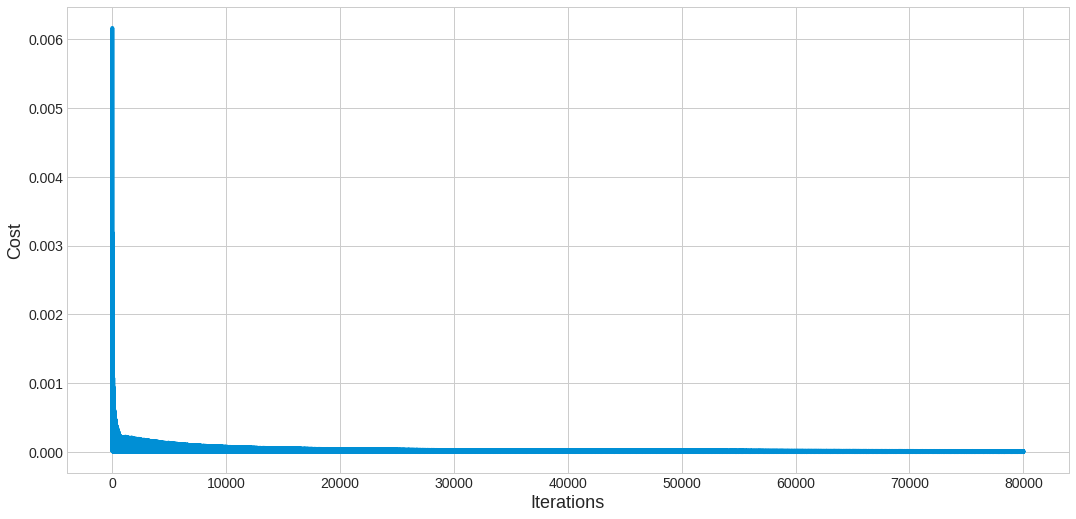

In [36]:
#plot of cost vs total iterations(not epochs), 
#total_iterations = (epochs * x_train.shape[0]//100)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,8))
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('Cost', fontsize = 18)
plt.plot(model.plot_x, model.plot_y)
plt.show()

In [37]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions.shape

(500, 1)

In [38]:
#check if the predicted values are close or not!
mini_batch_gradient_error = []
for i in range(min(predictions.shape[0], y_test.shape[0])):
    print(predictions[i][0],"         ", y_test[i][0])
    mini_batch_gradient_error.append((predictions[i][0]-y_test[i][0])**2)

254.88327677133296           257.5
251.3055302644128           256.25
241.60142421210463           259.75
245.08930428304745           254.45
256.3488446749573           267.35
257.24906063919565           273.65
254.57346587177773           275.0
256.8145541437585           279.45
248.68197301193578           279.9
257.1310192928512           281.95
253.1506303238738           276.0
250.9664120867443           270.65
266.0015773310368           272.75
258.55192082850544           266.2
244.84014717212528           265.7
235.656308727303           269.95
238.92667462418999           266.65
255.26949516788946           272.05
264.1318477811686           275.75
264.90735945027507           277.75
269.66803538157944           275.55
268.9921971416621           279.45
283.3711348914626           282.0
285.6503915331208           281.75
277.24933695729374           278.85
281.628833490749           281.1
280.3720535303359           279.6
283.6821329553436           279.85
270.69196508408544

544.267331302764           542.35
544.9160863365507           542.4
552.5061542639763           548.3
545.1574895543015           540.6
564.9424136986496           507.75
560.8514333244907           504.4
558.6937811339241           493.55
521.4977302863169           488.65
528.540999957826           509.8
513.3631938965842           517.0
528.1763182902799           503.25
526.2896606769216           499.95
533.5485045642068           509.1
521.8097135034171           503.55
508.90013471659375           505.6
529.6308932316866           505.05
527.2168821876501           488.25
535.7217870283637           471.25
532.7226666080882           474.7
533.6108024164745           468.95
524.289148679458           489.8
527.0064305644512           474.1
515.7514781377935           477.1
516.9882877690309           475.85
491.1690068048479           477.9
485.8751280733751           465.3
530.469263941288           466.2
538.3504745665953           472.8
526.2788332191751           476.95
521.

<ipython-input-40-efaedca3e6d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
/home/ujjawal/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


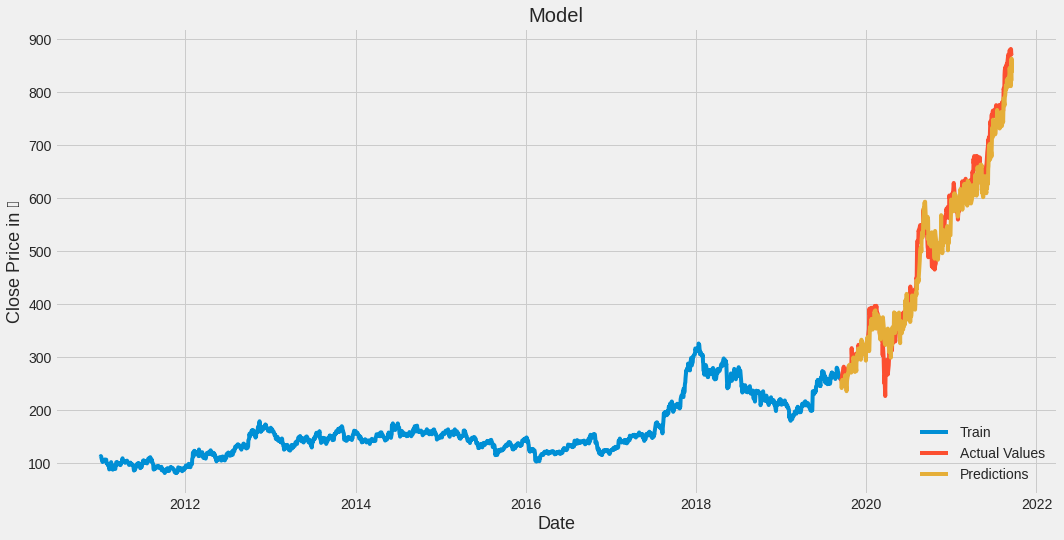

Error:
1078.2917324195548


In [40]:
#Plotting the data
plt.style.use('fivethirtyeight')
train = data[:training_data_len]
valid = data[training_data_len:training_data_len+500]
valid['Predictions'] = predictions
#Visaulize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in ₹', fontsize = 18)
plt.plot(train['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Actual Values', 'Predictions'], loc= 'lower right')
plt.show()
print("Error:")
print(sum(mini_batch_gradient_error)/len(mini_batch_gradient_error))

# Batch Gradient Descent

In [43]:
model1 = create_model([
    layer(n_neurons = 30, input_shape = 60, activation = "relu"),
    layer(n_neurons = 20, input_shape = 30, activation = "relu"),
    layer(n_neurons = 10, input_shape = 20, activation = "relu"),
    layer(n_neurons = 1, input_shape = 10, activation = "relu"),
])
model1.compile(optimizer = 'GD', learning_rate = 0.0001, loss = 'mse', gradient_clip = 1000)
model1.fit(x_train, y_train, epochs = 20000, batch_size = 0)

Optimizing with batch gradient descent! 
 

Cost :  0.006366678223324559
Cost :  0.00394506727019854
Cost :  0.002311589820703525
Cost :  0.0017834872401272183
Cost :  0.001527220715565026
Cost :  0.0014417472849592337
Cost :  0.0014180114903177892
Cost :  0.0013438930624164037
Cost :  0.0012975074047660458
Cost :  0.0011935197626095067
Cost :  0.001165682211412481
Cost :  0.0010757409955877307
Cost :  0.0010825152598601423
Cost :  0.0010369512997357082
Cost :  0.0010018395414306545
Cost :  0.0009943608152103386
Cost :  0.0009091748994166569
Cost :  0.0008977776794554146
Cost :  0.00086184205959304
Cost :  0.0008452223609051269
Cost :  0.0008413636294410887
Cost :  0.0008048360162664109
Cost :  0.0007765502084699343
Cost :  0.0007294011129835841
Cost :  0.0007190024398061915
Cost :  0.0007014494635888621
Cost :  0.0006968818436903178
Cost :  0.0006649003933537662
Cost :  0.0006487028887582515
Cost :  0.0006285801290314545
Cost :  0.0006268146371812815
Cost :  0.0005969360132628739
Cost

Cost :  0.00020001127921335607
Cost :  0.00020335082017307646
Cost :  0.0002052686057080009
Cost :  0.00019644259026421214
Cost :  0.00020063090830688688
Cost :  0.00021060764121175345
Cost :  0.00020232406564698767
Cost :  0.0002066383630381544
Cost :  0.00020680476773778783
Cost :  0.00019632054964288531
Cost :  0.00020460139015006143
Cost :  0.00020300988747423278
Cost :  0.0002019428678245598
Cost :  0.00019694471916480204
Cost :  0.00019712854244574007
Cost :  0.00020176778260890077
Cost :  0.00019656509632343355
Cost :  0.00020765185429724674
Cost :  0.00020031391575057086
Cost :  0.0002057696147206875
Cost :  0.00019787512637421665
Cost :  0.00019166646760660283
Cost :  0.00020422327574572865
Cost :  0.00019924297626062218
Cost :  0.00019071043921696176
Cost :  0.00019455025279733462
Cost :  0.00020027579824135052
Cost :  0.00019822386598935957
Cost :  0.00019351267264266643
Cost :  0.00019231824244961217
Cost :  0.00019959187330863463
Cost :  0.00019900775608047225
Cost :  0.00

Cost :  0.00015566118368075363
Cost :  0.00016289359334677002
Cost :  0.00015903537657918312
Cost :  0.00015538173492370168
Cost :  0.00015790681556070808
Cost :  0.00015873378355914616
Cost :  0.0001579990082148543
Cost :  0.00015949536800851977
Cost :  0.00015070892870999952
Cost :  0.0001523289942877415
Cost :  0.00015689796330594483
Cost :  0.00015084447068904053
Cost :  0.00015317372092309094
Cost :  0.00015949472197178622
Cost :  0.0001547240611579855
Cost :  0.00015235977059272274
Cost :  0.00015942807912064998
Cost :  0.00015562598313682496
Cost :  0.0001548402061303624
Cost :  0.00015778838208084763
Cost :  0.00015416468669092283
Cost :  0.0001519444257737292
Cost :  0.00015607478293352048
Cost :  0.00015141789549002357
Cost :  0.0001564156959840842
Cost :  0.00015187524807383195
Cost :  0.0001591490905980483
Cost :  0.00014441851929299814
Cost :  0.00014941460762158727
Cost :  0.00015880582402013021
Cost :  0.00015584485715782338
Cost :  0.00014958427403140496
Cost :  0.00015

Cost :  0.00013234108534653983
Cost :  0.00013608142789189686
Cost :  0.00012652227885868528
Cost :  0.0001405294403568188
Cost :  0.0001256488445995173
Cost :  0.00013456091428179902
Cost :  0.00012987149883799556
Cost :  0.00013335579239358186
Cost :  0.00013600955048533156
Cost :  0.00012676393538829723
Cost :  0.00013006811710765154
Cost :  0.00012686575345916448
Cost :  0.0001295729249093591
Cost :  0.00013294911165049437
Cost :  0.0001317668372015233
Cost :  0.00012850251601401235
Cost :  0.00012997566129916558
Cost :  0.00013287252343721282
Cost :  0.00012760350288470152
Cost :  0.0001316759685344963
Cost :  0.00013001504948877333
Cost :  0.0001270961205327735
Cost :  0.00013072017414238695
Cost :  0.0001354373284430855
Cost :  0.00012764379160760614
Cost :  0.00013249309643082624
Cost :  0.00013033862986493215
Cost :  0.0001275753909803934
Cost :  0.00013354401406514475
Cost :  0.00013403867428618448
Cost :  0.00013116219339733747
Cost :  0.00012778160873923468
Cost :  0.000130

Cost :  0.00012201101432815206
Cost :  0.0001145891180596909
Cost :  0.00011517331055941806
Cost :  0.00011915915966728202
Cost :  0.00011817004955395956
Cost :  0.00011888141080608246
Cost :  0.00011912089739921176
Cost :  0.00011832820391889054
Cost :  0.00011373966521566325
Cost :  0.00011429374530588068
Cost :  0.00012069695680191103
Cost :  0.00011515973396999235
Cost :  0.00011515975356338965
Cost :  0.00011875409024344149
Cost :  0.00011615567826309887
Cost :  0.00011878149979200475
Cost :  0.00011557459754280643
Cost :  0.00011197523841077715
Cost :  0.00011460241471333575
Cost :  0.0001206556559222838
Cost :  0.00011405893859984082
Cost :  0.00011249972671123518
Cost :  0.0001185343194164301
Cost :  0.00011785455259860117
Cost :  0.00011282265911677503
Cost :  0.00011620338256970602
Cost :  0.00011646625985591214
Cost :  0.0001160392970407293
Cost :  0.00011394273883176821
Cost :  0.00011654942654138672
Cost :  0.00011832438901817324
Cost :  0.00011529419465459424
Cost :  0.00

Cost :  0.00010369423296687996
Cost :  0.00010834303338379699
Cost :  0.00010551927288341659
Cost :  0.0001039144331567606
Cost :  0.00010693424531696096
Cost :  0.00010591085245669549
Cost :  0.00010894146419625389
Cost :  0.00010486514939288366
Cost :  0.00010696396927485542
Cost :  0.00010440173544909892
Cost :  0.00010920044368093571
Cost :  0.00010508896310535252
Cost :  0.00011000088541219353
Cost :  0.00010626796678449948
Cost :  0.00010793285784521378
Cost :  0.00010719556890481947
Cost :  0.00010727471450993683
Cost :  0.00010689308116237879
Cost :  0.00010436528306467375
Cost :  0.00011006017220226002
Cost :  0.00010414309861308857
Cost :  0.0001032373336088956
Cost :  0.00010499916479883331
Cost :  0.00010063748305073451
Cost :  0.0001068004596669824
Cost :  0.00010924034521510149
Cost :  0.00010336004885708373
Cost :  0.00010566430330667327
Cost :  0.00010595556276957612
Cost :  0.00010707894433177805
Cost :  0.00010874874240576812
Cost :  0.00010798044992415079
Cost :  0.0

Cost :  0.00010208897556739312
Cost :  9.919457724962088e-05
Cost :  9.95142497884142e-05
Cost :  9.890808143606424e-05
Cost :  9.923996711002051e-05
Cost :  9.667664989204935e-05
Cost :  0.00010161123657197684
Cost :  0.00010152699886147596
Cost :  9.71483674575639e-05
Cost :  0.0001011698979526279
Cost :  0.00010161586368668776
Cost :  9.696353157078807e-05
Cost :  0.00010066265910724044
Cost :  0.00010200719829125829
Cost :  9.807937684458952e-05
Cost :  0.00010043360842984503
Cost :  0.00010111578637775937
Cost :  0.00010394851958902929
Cost :  0.00010012968019460958
Cost :  0.00010058760841268317
Cost :  9.782837460512621e-05
Cost :  9.707629814538772e-05
Cost :  9.77921801586551e-05
Cost :  0.00010279565693804436
Cost :  0.00010284094391155991
Cost :  9.889867816474097e-05
Cost :  0.0001022545041933902
Cost :  9.65759760380133e-05
Cost :  9.85463665509438e-05
Cost :  9.738283577935425e-05
Cost :  0.00010049008745543995
Cost :  9.872397723161807e-05
Cost :  0.00010136448157605956


Cost :  9.47017629528323e-05
Cost :  9.252552098014328e-05
Cost :  9.755878565326021e-05
Cost :  9.724575506266454e-05
Cost :  8.971762476144043e-05
Cost :  9.413665492867452e-05
Cost :  9.347097140931247e-05
Cost :  9.368055910502797e-05
Cost :  9.74441554216048e-05
Cost :  9.208427337684858e-05
Cost :  9.620538018365208e-05
Cost :  9.303067746520132e-05
Cost :  9.603544679204313e-05
Cost :  9.457594498553962e-05
Cost :  9.405332144121897e-05
Cost :  9.337067811395051e-05
Cost :  9.416729045047984e-05
Cost :  9.665987357987421e-05
Cost :  9.414975273084975e-05
Cost :  9.075652641099509e-05
Cost :  9.630086352960571e-05
Cost :  9.154925137083005e-05
Cost :  9.30905454392394e-05
Cost :  9.380868844611738e-05
Cost :  9.562770520888995e-05
Cost :  9.435707883295308e-05
Cost :  9.517032957718976e-05
Cost :  9.309540744445844e-05
Cost :  9.216191584544787e-05
Cost :  9.231687764583776e-05
Cost :  9.282610430748846e-05
Cost :  9.600608965819454e-05
Cost :  9.445702376155455e-05
Cost :  9.277

Cost :  9.189109634234096e-05
Cost :  9.069068004590394e-05
Cost :  9.256943706841441e-05
Cost :  9.275623080492762e-05
Cost :  8.617620403769438e-05
Cost :  9.390291978674516e-05
Cost :  9.346814898417028e-05
Cost :  9.150670705198355e-05
Cost :  8.754933482925616e-05
Cost :  8.910707227453559e-05
Cost :  9.189865052639201e-05
Cost :  9.174676312477942e-05
Cost :  9.137310734567557e-05
Cost :  9.199925682937183e-05
Cost :  9.676562379812156e-05
Cost :  8.873178407617516e-05
Cost :  9.220063471653959e-05
Cost :  9.262903420337357e-05
Cost :  8.778170873018797e-05
Cost :  8.931240288340443e-05
Cost :  9.223763457633327e-05
Cost :  9.095100163368969e-05
Cost :  9.238230655117927e-05
Cost :  8.928679542209233e-05
Cost :  8.859334395882882e-05
Cost :  9.157086021639576e-05
Cost :  9.206004261033043e-05
Cost :  9.066854859926085e-05
Cost :  8.782259895974797e-05
Cost :  9.535486047725322e-05
Cost :  8.547286756040928e-05
Cost :  9.098087633655539e-05
Cost :  8.65021586431793e-05
Cost :  9.0

Cost :  8.807553329035153e-05
Cost :  8.907325242055384e-05
Cost :  8.593772581886261e-05
Cost :  8.612259927120758e-05
Cost :  8.467424260694485e-05
Cost :  8.705091948859778e-05
Cost :  8.450548836368931e-05
Cost :  8.70063889653846e-05
Cost :  9.089521448378421e-05
Cost :  8.865142503940707e-05
Cost :  8.814985321149825e-05
Cost :  8.448152144855368e-05
Cost :  8.586270330977504e-05
Cost :  8.614156095639616e-05
Cost :  9.086551379597466e-05
Cost :  8.810616236766186e-05
Cost :  8.75318946703207e-05
Cost :  9.009535758886725e-05
Cost :  8.402313762140295e-05
Cost :  8.895409932401187e-05
Cost :  8.876249550426743e-05
Cost :  8.720241329158537e-05
Cost :  8.966945484478344e-05
Cost :  8.697060174161486e-05
Cost :  8.510545992789459e-05
Cost :  8.660003972053225e-05
Cost :  8.410866509085361e-05
Cost :  8.833233682914268e-05
Cost :  8.615003045846795e-05
Cost :  8.541553910181538e-05
Cost :  8.728449222178503e-05
Cost :  8.583649931275919e-05
Cost :  8.656120952859959e-05
Cost :  8.65

Cost :  8.278593960999772e-05
Cost :  8.187328253727612e-05
Cost :  8.756194630556257e-05
Cost :  8.6811161818843e-05
Cost :  8.273725171104796e-05
Cost :  8.38746172400947e-05
Cost :  8.547725207028901e-05
Cost :  8.25370064354332e-05
Cost :  8.354497334820557e-05
Cost :  8.511781914945174e-05
Cost :  8.578894906396069e-05
Cost :  8.170303938110138e-05
Cost :  8.196032978350382e-05
Cost :  8.46465712854218e-05
Cost :  8.322634822142033e-05
Cost :  8.330188882120421e-05
Cost :  8.345784356790934e-05
Cost :  8.461772610609802e-05
Cost :  8.536813450674147e-05
Cost :  8.379183312223042e-05
Cost :  8.610874950073374e-05
Cost :  8.330127208194993e-05
Cost :  8.446345827608245e-05
Cost :  8.333990880745405e-05
Cost :  8.120193925233162e-05
Cost :  8.709814229906707e-05
Cost :  8.602513573194243e-05
Cost :  8.457471422184904e-05
Cost :  8.513261986798227e-05
Cost :  8.258610059833633e-05
Cost :  8.52321339616531e-05
Cost :  8.621090684355425e-05
Cost :  8.325517702328897e-05
Cost :  8.521072

Cost :  8.088867745307842e-05
Cost :  8.281245104388038e-05
Cost :  7.777158794046014e-05
Cost :  8.269717221464112e-05
Cost :  8.032523719149418e-05
Cost :  8.25292985550633e-05
Cost :  8.014511792266917e-05
Cost :  8.349842523466757e-05
Cost :  7.69602776998369e-05
Cost :  8.36937305922526e-05
Cost :  8.097225925638406e-05
Cost :  8.019823688154555e-05
Cost :  8.524029568302981e-05
Cost :  7.857370218897462e-05
Cost :  8.606481778834068e-05
Cost :  8.290303369473688e-05
Cost :  8.221061748350413e-05
Cost :  8.219610011304852e-05
Cost :  8.176387384189295e-05
Cost :  8.211351719174611e-05
Cost :  8.144846008298188e-05
Cost :  8.23019215792568e-05
Cost :  8.321041502318232e-05
Cost :  8.184210469383236e-05
Cost :  7.895641192955787e-05
Cost :  8.454898583279974e-05
Cost :  7.760070117883485e-05
Cost :  8.523535134928568e-05
Cost :  8.372726607009858e-05
Cost :  8.0661826578944e-05
Cost :  7.904770524775168e-05
Cost :  8.209962651987485e-05
Cost :  8.121422897563663e-05
Cost :  8.028886

Cost :  7.855313215778623e-05
Cost :  7.750358240330196e-05
Cost :  7.91327322374342e-05
Cost :  7.934144267870718e-05
Cost :  7.950204599264646e-05
Cost :  8.003463947091991e-05
Cost :  7.742146802965701e-05
Cost :  7.936371851609128e-05
Cost :  7.821238453980914e-05
Cost :  8.016211830920615e-05
Cost :  7.790045944417152e-05
Cost :  7.974997055855217e-05
Cost :  8.236085552072115e-05
Cost :  8.016997383895651e-05
Cost :  7.873052186644039e-05
Cost :  8.279756120092957e-05
Cost :  7.593807440202758e-05
Cost :  8.343368273582062e-05
Cost :  8.052072101992564e-05
Cost :  7.878922280791298e-05
Cost :  8.008448670055555e-05
Cost :  8.208448497070033e-05
Cost :  7.646876863051217e-05
Cost :  7.875446625535446e-05
Cost :  8.076567948796689e-05
Cost :  7.849744499223661e-05
Cost :  7.861962615367238e-05
Cost :  8.190855945276957e-05
Cost :  7.918200980790108e-05
Cost :  7.938701779376175e-05
Cost :  7.586669194781656e-05
Cost :  7.954032972228977e-05
Cost :  7.833254170747012e-05
Cost :  7.7

Cost :  7.896540680807804e-05
Cost :  7.925991868067339e-05
Cost :  7.524681585968335e-05
Cost :  7.81892976578513e-05
Cost :  7.83978372361463e-05
Cost :  7.899529001633857e-05
Cost :  7.527228181828717e-05
Cost :  7.701963725180363e-05
Cost :  7.488456956984281e-05
Cost :  7.619457840471377e-05
Cost :  7.840742793987793e-05
Cost :  7.821840253453233e-05
Cost :  7.55439859219515e-05
Cost :  7.533840329301788e-05
Cost :  7.884390544351494e-05
Cost :  7.607388468000131e-05
Cost :  7.743015917772915e-05
Cost :  7.663583196057414e-05
Cost :  7.65122169008146e-05
Cost :  7.712672322206249e-05
Cost :  7.730947445363503e-05
Cost :  7.906208351862855e-05
Cost :  7.851666478174017e-05
Cost :  7.52322647710954e-05
Cost :  7.782851262537855e-05
Cost :  7.638442708143553e-05
Cost :  7.547774748625191e-05
Cost :  7.604104278173391e-05
Cost :  7.725101971670462e-05
Cost :  7.430587487112088e-05
Cost :  7.627466784793496e-05
Cost :  7.457489914858993e-05
Cost :  7.74965081561514e-05
Cost :  7.501302

Cost :  7.649914780723619e-05
Cost :  7.51813151721533e-05
Cost :  7.293637696855401e-05
Cost :  7.648714900508335e-05
Cost :  7.38134522715974e-05
Cost :  7.523598317955328e-05
Cost :  7.41551707947947e-05
Cost :  7.260247152993026e-05
Cost :  7.561610112257548e-05
Cost :  7.521440649450466e-05
Cost :  7.40824369321602e-05
Cost :  7.619324853135464e-05
Cost :  7.491636542746331e-05
Cost :  7.309949075004077e-05
Cost :  7.748846128373656e-05
Cost :  7.313745894922388e-05
Cost :  7.285685532589428e-05
Cost :  7.426348675023855e-05
Cost :  7.702560790096138e-05
Cost :  7.259600378963532e-05
Cost :  7.452646182856916e-05
Cost :  7.52396157890046e-05
Cost :  7.442497558295155e-05
Cost :  7.405864636266932e-05
Cost :  7.176077842024333e-05
Cost :  7.572767909367187e-05
Cost :  7.190406773232824e-05
Cost :  7.79901147642894e-05
Cost :  7.332727525745768e-05
Cost :  7.704781533171132e-05
Cost :  7.583814640404401e-05
Cost :  7.52017390509428e-05
Cost :  7.536970402237163e-05
Cost :  7.5193385

Cost :  7.321397880551778e-05
Cost :  7.23221910352283e-05
Cost :  7.066999759524603e-05
Cost :  7.241303610687246e-05
Cost :  7.295666463856438e-05
Cost :  7.092843816597599e-05
Cost :  7.110981996178063e-05
Cost :  7.29639413852128e-05
Cost :  7.521526645054041e-05
Cost :  7.144989208713467e-05
Cost :  7.263963486142548e-05
Cost :  7.234418083447226e-05
Cost :  7.167915855633712e-05
Cost :  7.218398599322486e-05
Cost :  7.257715748096937e-05
Cost :  7.301850058604821e-05
Cost :  6.945483534040503e-05
Cost :  7.367195302306549e-05
Cost :  7.068608355115548e-05
Cost :  7.143432604809986e-05
Cost :  6.990858518105915e-05
Cost :  6.93105456724703e-05
Cost :  7.215355731683053e-05
Cost :  7.387154321025653e-05
Cost :  7.212477473267937e-05
Cost :  7.39811877633048e-05
Cost :  7.165550168836875e-05
Cost :  6.982918921781435e-05
Cost :  7.334937774954881e-05
Cost :  7.019331004632092e-05
Cost :  7.146834738780071e-05
Cost :  7.192642544759428e-05
Cost :  7.008141361275435e-05
Cost :  7.2307

Cost :  7.186859613458916e-05
Cost :  6.895137417743597e-05
Cost :  6.794488526938524e-05
Cost :  6.92943509566846e-05
Cost :  6.984453597282158e-05
Cost :  7.193726055309898e-05
Cost :  6.989506149006073e-05
Cost :  7.233229022861215e-05
Cost :  6.994729275782428e-05
Cost :  6.92464442396171e-05
Cost :  6.651513379066485e-05
Cost :  7.168666806000927e-05
Cost :  7.10420967990285e-05
Cost :  6.867445374065507e-05
Cost :  6.84324653563042e-05
Cost :  7.010190034498812e-05
Cost :  6.748618085455693e-05
Cost :  6.980311172842211e-05
Cost :  7.214821685222276e-05
Cost :  7.112460852178355e-05
Cost :  6.655561503301343e-05
Cost :  7.280993441261208e-05
Cost :  6.862217547396444e-05
Cost :  6.977386532585436e-05
Cost :  7.116318697882623e-05
Cost :  7.156495994437202e-05
Cost :  7.206361395545427e-05
Cost :  6.93356675031797e-05
Cost :  6.868451927688973e-05
Cost :  6.783216707926364e-05
Cost :  6.967961119133445e-05
Cost :  7.034167132038654e-05
Cost :  6.952955164534889e-05
Cost :  6.75493

Cost :  6.871776783811709e-05
Cost :  6.972114855077839e-05
Cost :  6.916740453193318e-05
Cost :  6.655882248833141e-05
Cost :  6.677949000517328e-05
Cost :  6.883649733802442e-05
Cost :  6.846936452219984e-05
Cost :  6.755089527087214e-05
Cost :  6.736552464853182e-05
Cost :  6.827519263456377e-05
Cost :  7.241709294655652e-05
Cost :  6.92989234547808e-05
Cost :  6.959511297742733e-05
Cost :  6.679905321582679e-05
Cost :  7.083620896861213e-05
Cost :  6.94429897906664e-05
Cost :  6.826980345376352e-05
Cost :  6.793500910186652e-05
Cost :  6.97650937971931e-05
Cost :  6.807474348675298e-05
Cost :  6.650412328181404e-05
Cost :  6.731984018566244e-05
Cost :  6.767093278477175e-05
Cost :  6.9613721973807e-05
Cost :  6.444518813382901e-05
Cost :  6.887803540277511e-05
Cost :  6.788827035518817e-05
Cost :  6.618040576911696e-05
Cost :  6.745024572585583e-05
Cost :  7.014598308074315e-05
Cost :  6.597534006846187e-05
Cost :  6.807160473676874e-05
Cost :  6.821806107910432e-05
Cost :  6.62110

Cost :  6.768071020098879e-05
Cost :  6.594907155622185e-05
Cost :  6.595198735115085e-05
Cost :  6.932044296825822e-05
Cost :  6.580111628689396e-05
Cost :  6.670172509956135e-05
Cost :  6.492703900334375e-05
Cost :  6.449221809901486e-05
Cost :  6.57391741126107e-05
Cost :  6.953413106931544e-05
Cost :  6.829494705638231e-05
Cost :  6.57734777698595e-05
Cost :  6.651384360610575e-05
Cost :  6.754556967672907e-05
Cost :  6.375249362881771e-05
Cost :  6.494269775067216e-05
Cost :  6.329850191581138e-05
Cost :  6.557637368594754e-05
Cost :  6.823866614996015e-05
Cost :  6.574906944686153e-05
Cost :  6.61526780268786e-05
Cost :  6.661219509821472e-05
Cost :  6.484640098708491e-05
Cost :  6.437635647915938e-05
Cost :  6.619095920739548e-05
Cost :  6.684967525397781e-05
Cost :  6.810614505660864e-05
Cost :  6.161193158011497e-05
Cost :  6.795727000780384e-05
Cost :  6.523523343839143e-05
Cost :  6.914452577222887e-05
Cost :  6.889731691914808e-05
Cost :  6.562291369248321e-05
Cost :  6.708

Cost :  6.626083228553128e-05
Cost :  6.425612181178654e-05
Cost :  6.341490047863961e-05
Cost :  6.513338973487323e-05
Cost :  6.671778066046304e-05
Cost :  6.400519360392709e-05
Cost :  6.570515509674728e-05
Cost :  6.425355418961573e-05
Cost :  6.438570179000812e-05
Cost :  6.462137479001673e-05
Cost :  6.621548160780827e-05
Cost :  6.405546228062031e-05
Cost :  6.588658329742668e-05
Cost :  6.574280765153291e-05
Cost :  6.474291221568119e-05
Cost :  6.372391675545594e-05
Cost :  6.525485552136009e-05
Cost :  6.478216465889976e-05
Cost :  6.456136423164439e-05
Cost :  6.521894366187081e-05
Cost :  6.306871741735091e-05
Cost :  6.232537389957171e-05
Cost :  6.495065102632942e-05
Cost :  6.432459710842284e-05
Cost :  6.713422629153698e-05
Cost :  6.438924210130584e-05
Cost :  6.449895854033791e-05
Cost :  6.710490763371089e-05
Cost :  6.409559281208949e-05
Cost :  6.385495495219993e-05
Cost :  6.449566246970011e-05
Cost :  6.793362731644722e-05
Cost :  6.179454094752503e-05
Cost :  6.

Cost :  6.462131810957707e-05
Cost :  6.439560677196234e-05
Cost :  6.200352669729802e-05
Cost :  6.554614307875862e-05
Cost :  6.478407637316927e-05
Cost :  6.12641082406708e-05
Cost :  6.414874268570866e-05
Cost :  6.434758400853508e-05
Cost :  6.134999519244097e-05
Cost :  6.434588383072777e-05
Cost :  6.459601220122056e-05
Cost :  6.202387955963748e-05
Cost :  6.452068764393485e-05
Cost :  6.472661742719062e-05
Cost :  6.153101609849349e-05
Cost :  6.212393910711713e-05
Cost :  6.280963551351096e-05
Cost :  6.36347636643117e-05
Cost :  6.288179956125097e-05
Cost :  6.479604375829818e-05
Cost :  6.048747532740353e-05
Cost :  6.219491221472332e-05
Cost :  6.322613099984824e-05
Cost :  6.278756256110898e-05
Cost :  6.35714299075299e-05
Cost :  6.382444772831965e-05
Cost :  6.259511006952591e-05
Cost :  6.392011717215754e-05
Cost :  6.43188452022869e-05
Cost :  6.158646195971673e-05
Cost :  6.656402606360847e-05
Cost :  6.296862214972015e-05
Cost :  6.449271443573071e-05
Cost :  6.1220

Cost :  6.118336979518945e-05
Cost :  6.22340736751421e-05
Cost :  6.327464893835182e-05
Cost :  6.127729049129614e-05
Cost :  6.230371677432265e-05
Cost :  6.484756113531234e-05
Cost :  6.257554179332218e-05
Cost :  6.118024157160677e-05
Cost :  6.35469001678963e-05
Cost :  6.431357269957616e-05
Cost :  6.045781767698971e-05
Cost :  6.493170773345152e-05
Cost :  6.328938268512499e-05
Cost :  6.142303301198903e-05
Cost :  6.442087704519692e-05
Cost :  6.271667360983536e-05
Cost :  6.348297608457201e-05
Cost :  6.450007656048795e-05
Cost :  6.3881723017433e-05
Cost :  6.17045061948836e-05
Cost :  6.462917736015146e-05
Cost :  6.258381138909564e-05
Cost :  6.308905212612008e-05
Cost :  6.341492132860465e-05
Cost :  6.152599568521839e-05
Cost :  6.270678260147377e-05
Cost :  6.436788596089384e-05
Cost :  6.429768034048265e-05
Cost :  6.048663614601041e-05
Cost :  6.122974747739983e-05
Cost :  6.172376537650799e-05
Cost :  6.318793966616453e-05
Cost :  6.469384182205718e-05
Cost :  6.17683

Cost :  5.902414841332533e-05
Cost :  6.359606132692033e-05
Cost :  6.22111762450281e-05
Cost :  6.195509939927444e-05
Cost :  6.409693833562336e-05
Cost :  6.378564323681716e-05
Cost :  6.3638756074293e-05
Cost :  6.074557892692783e-05
Cost :  6.327985665643332e-05
Cost :  6.183952594735566e-05
Cost :  6.160228674860714e-05
Cost :  6.453784272067132e-05
Cost :  5.901507010797489e-05
Cost :  6.198669476865588e-05
Cost :  6.346711460370562e-05
Cost :  5.9792261508528556e-05
Cost :  6.179190701639478e-05
Cost :  5.9492180868922276e-05
Cost :  6.105050913620721e-05
Cost :  6.0609316244893576e-05
Cost :  6.230240690205872e-05
Cost :  6.044516663312175e-05
Cost :  6.284925523811724e-05
Cost :  6.143833157184839e-05
Cost :  6.481662755161493e-05
Cost :  6.282604358947555e-05
Cost :  6.085304593072649e-05
Cost :  6.526232907094092e-05
Cost :  5.9912125905087515e-05
Cost :  6.359150879821142e-05
Cost :  6.157283572447812e-05
Cost :  6.203289217915823e-05
Cost :  6.433800202909845e-05
Cost :  6

Cost :  6.226683340445309e-05
Cost :  6.104028944905608e-05
Cost :  6.318925514464171e-05
Cost :  5.957113214019452e-05
Cost :  6.303166804643428e-05
Cost :  5.9873776233561655e-05
Cost :  6.11494791228487e-05
Cost :  6.213057982149445e-05
Cost :  6.191221215358397e-05
Cost :  6.055517942530054e-05
Cost :  6.240329039609776e-05
Cost :  6.230215159453868e-05
Cost :  6.084268153419151e-05
Cost :  6.089412377349783e-05
Cost :  5.999100580296506e-05
Cost :  6.113579436687164e-05
Cost :  5.934479958469897e-05
Cost :  6.173828629987688e-05
Cost :  6.108581613902301e-05
Cost :  6.205935929764883e-05
Cost :  5.931307019482045e-05
Cost :  6.230398139125231e-05
Cost :  6.261964149564795e-05
Cost :  5.9992404500997026e-05
Cost :  5.9626641226926505e-05
Cost :  6.119911454918101e-05
Cost :  5.889024685596356e-05
Cost :  6.21902555005849e-05
Cost :  6.068743680300924e-05
Cost :  6.00140306402481e-05
Cost :  6.112755364554574e-05
Cost :  6.111480002379736e-05
Cost :  6.238039739389466e-05
Cost :  5.

Cost :  6.0729942931536956e-05
Cost :  6.165035328943267e-05
Cost :  5.8853338163981755e-05
Cost :  6.118500693541214e-05
Cost :  6.079557026174676e-05
Cost :  6.095160230046847e-05
Cost :  5.896380628263989e-05
Cost :  6.158944756771905e-05
Cost :  6.153217559531759e-05
Cost :  5.936670021918835e-05
Cost :  6.024389660631986e-05
Cost :  5.948360377184276e-05
Cost :  5.8960342291067314e-05
Cost :  6.0190401342311704e-05
Cost :  6.019972939132186e-05
Cost :  6.140377876582384e-05
Cost :  6.0716455268415096e-05
Cost :  6.168014023976611e-05
Cost :  6.144052325279803e-05
Cost :  6.0049584159611214e-05
Cost :  5.835288295247425e-05
Cost :  5.796408562153302e-05
Cost :  5.992077900043217e-05
Cost :  6.284863708973372e-05
Cost :  5.7909676190835466e-05
Cost :  6.019130174466905e-05
Cost :  6.199093592849243e-05
Cost :  5.947297281467103e-05
Cost :  6.032137269462868e-05
Cost :  6.00256488866388e-05
Cost :  6.0698527608969115e-05
Cost :  6.027334877297565e-05
Cost :  5.958943204348248e-05
Cos

Cost :  5.759684053544432e-05
Cost :  5.94852027694674e-05
Cost :  6.023836795908361e-05
Cost :  5.988763050814117e-05
Cost :  5.9869852881489024e-05
Cost :  6.141540923555326e-05
Cost :  5.952234709733797e-05
Cost :  6.169262897340624e-05
Cost :  6.121350743475292e-05
Cost :  6.0023712041989075e-05
Cost :  5.7840804540673424e-05
Cost :  5.9963497303798e-05
Cost :  5.9719011523876026e-05
Cost :  6.038664027566431e-05
Cost :  5.8212667760826226e-05
Cost :  5.8738843239889765e-05
Cost :  5.977090635043379e-05
Cost :  6.163050448915072e-05
Cost :  5.747217192393115e-05
Cost :  5.96750550200901e-05
Cost :  5.945550888050577e-05
Cost :  5.8279132972887674e-05
Cost :  6.212703693080016e-05
Cost :  5.998637681569742e-05
Cost :  6.109595861012235e-05
Cost :  6.080369034998919e-05
Cost :  5.909289685004445e-05
Cost :  5.8833286709275655e-05
Cost :  6.0515325018939136e-05
Cost :  5.931411125702646e-05
Cost :  6.006662157128303e-05
Cost :  5.919061913849025e-05
Cost :  5.859932441735484e-05
Cost 

Cost :  5.946363409271985e-05
Cost :  5.992417459709896e-05
Cost :  5.69033456880967e-05
Cost :  6.046673879535972e-05
Cost :  5.896231138250758e-05
Cost :  6.034538937439475e-05
Cost :  6.0208700217859014e-05
Cost :  5.9929757106529524e-05
Cost :  5.889994659891974e-05
Cost :  5.9756246191946456e-05
Cost :  5.718060131692366e-05
Cost :  6.049417450472946e-05
Cost :  5.9926397885485256e-05
Cost :  5.960797866022483e-05
Cost :  6.009511154846885e-05
Cost :  5.9778979129163926e-05
Cost :  5.9597990446066686e-05
Cost :  5.938009322440368e-05
Cost :  6.130263066351138e-05
Cost :  5.861011715088895e-05
Cost :  5.8495424289812385e-05
Cost :  5.9162996917283907e-05
Cost :  5.6434288835157915e-05
Cost :  5.979989708019353e-05
Cost :  6.0915674975065486e-05
Cost :  5.942687858920002e-05
Cost :  6.090257479067846e-05
Cost :  5.8060405245126264e-05
Cost :  5.9632949792955955e-05
Cost :  5.949241569326558e-05
Cost :  5.895613074512213e-05
Cost :  5.6861837020052515e-05
Cost :  5.9792354387176396e-

Cost :  5.9645344035449274e-05
Cost :  5.872798898665958e-05
Cost :  5.7967956775347943e-05
Cost :  5.714995831045549e-05
Cost :  6.13194059966638e-05
Cost :  5.728621824152934e-05
Cost :  5.920557483715151e-05
Cost :  5.840013185076706e-05
Cost :  5.810986372690707e-05
Cost :  5.7894727467345984e-05
Cost :  5.674979754702141e-05
Cost :  5.987402955733936e-05
Cost :  5.815454861276625e-05
Cost :  5.7976293288798096e-05
Cost :  5.850204920717007e-05
Cost :  5.725762731949306e-05
Cost :  5.796668825594189e-05
Cost :  5.866132098195031e-05
Cost :  5.8546687785920324e-05
Cost :  5.816456016869865e-05
Cost :  5.7332678517395826e-05
Cost :  5.974059206136342e-05
Cost :  5.7539300996752024e-05
Cost :  5.759910792512006e-05
Cost :  5.86253616976442e-05
Cost :  5.828311149387526e-05
Cost :  5.9465052937075067e-05
Cost :  5.717811075972126e-05
Cost :  6.0804320932569585e-05
Cost :  5.93217891036735e-05
Cost :  5.6738099460591785e-05
Cost :  5.865824533559937e-05
Cost :  5.704347175605991e-05
Cos

Cost :  5.9617171882275464e-05
Cost :  5.588614197134587e-05
Cost :  5.659492507468707e-05
Cost :  5.877937848492972e-05
Cost :  5.948444019018788e-05
Cost :  5.9443242332070195e-05
Cost :  5.856627318577428e-05
Cost :  5.898338019299593e-05
Cost :  5.4986252994799005e-05
Cost :  5.669374301654467e-05
Cost :  6.0070745428904874e-05
Cost :  5.90080877201232e-05
Cost :  5.806432969653949e-05
Cost :  5.586133049497739e-05
Cost :  5.8239748038543355e-05
Cost :  5.7792495557616235e-05
Cost :  5.6354012942851167e-05
Cost :  6.157740639200757e-05
Cost :  5.945905768366115e-05
Cost :  5.789997590862512e-05
Cost :  6.150379564139405e-05
Cost :  5.884420188583801e-05
Cost :  5.736610536420934e-05
Cost :  5.908588668809767e-05
Cost :  5.750092077460954e-05
Cost :  5.76309140979725e-05
Cost :  5.54008713795419e-05
Cost :  5.988733339364644e-05
Cost :  5.791173246637093e-05
Cost :  5.739654807592987e-05
Cost :  5.705933985857695e-05
Cost :  5.800054085295101e-05
Cost :  5.719651877819628e-05
Cost :

Cost :  5.6653630382986284e-05
Cost :  5.724800863436359e-05
Cost :  5.688674035499927e-05
Cost :  5.9194097993223375e-05
Cost :  5.708286579638659e-05
Cost :  5.7089370296209984e-05
Cost :  5.640815194306358e-05
Cost :  5.834306988037889e-05
Cost :  5.690499474388496e-05
Cost :  5.610947993473513e-05
Cost :  5.717647244841369e-05
Cost :  5.59521517108047e-05
Cost :  5.914412590365153e-05
Cost :  5.78300779869043e-05
Cost :  5.658667424142626e-05
Cost :  5.876173879947821e-05
Cost :  5.519671171588587e-05
Cost :  5.750106036037632e-05
Cost :  5.990252731364406e-05
Cost :  5.357974782612829e-05
Cost :  5.752477196575767e-05
Cost :  6.022659208134312e-05
Cost :  5.8319585245314825e-05
Cost :  5.702678209521717e-05
Cost :  5.5734812091362824e-05
Cost :  5.7942922699939514e-05
Cost :  5.902537181357215e-05
Cost :  5.8377033722380466e-05
Cost :  5.7591417627988084e-05
Cost :  5.742241371895697e-05
Cost :  5.7530628954023506e-05
Cost :  5.477517649557066e-05
Cost :  5.7170036422562974e-05
Co

Cost :  5.672680081277654e-05
Cost :  5.701683458417844e-05
Cost :  5.734219827327568e-05
Cost :  5.5645354722964875e-05
Cost :  5.53182339107744e-05
Cost :  5.9639514563142986e-05
Cost :  5.650988458260834e-05
Cost :  5.741686889209547e-05
Cost :  5.684559528219363e-05
Cost :  5.716862174834698e-05
Cost :  5.909903842080202e-05
Cost :  5.594109860752437e-05
Cost :  5.645247813901111e-05
Cost :  5.691547468354884e-05
Cost :  5.840823101592755e-05
Cost :  5.7033430412887895e-05
Cost :  5.5599074424897324e-05
Cost :  5.6841819443643725e-05
Cost :  5.6992927549214864e-05
Cost :  5.6655263259103575e-05
Cost :  5.5997257065709817e-05
Cost :  5.7916965827896324e-05
Cost :  5.896567791843318e-05
Cost :  5.697487847286572e-05
Cost :  5.7269184626307335e-05
Cost :  5.804552645334082e-05
Cost :  5.855728257838497e-05
Cost :  5.6864916041913835e-05
Cost :  5.7936036788528965e-05
Cost :  5.554864075280132e-05
Cost :  5.814288943673545e-05
Cost :  5.4785160338692354e-05
Cost :  5.604431534230933e-0

Cost :  5.682780653484544e-05
Cost :  5.5988824894318915e-05
Cost :  5.698676522791638e-05
Cost :  5.701576394658713e-05
Cost :  5.716554645763731e-05
Cost :  5.5743297420005695e-05
Cost :  5.6760107286368996e-05
Cost :  5.577103291893694e-05
Cost :  5.910104595277481e-05
Cost :  5.839877304843251e-05
Cost :  5.582249004994535e-05
Cost :  5.582318470930511e-05
Cost :  5.796853074507617e-05
Cost :  5.59649262185649e-05
Cost :  5.791868672943633e-05
Cost :  5.711056324977727e-05
Cost :  5.500134413341059e-05
Cost :  5.612122158856265e-05
Cost :  5.563996351874145e-05
Cost :  5.682905607853695e-05
Cost :  5.7344260387139746e-05
Cost :  5.651839640754825e-05
Cost :  5.766909061990988e-05
Cost :  5.586176120668493e-05
Cost :  5.713851243007464e-05
Cost :  5.8268579433421124e-05
Cost :  5.620947498831132e-05
Cost :  5.604524509809291e-05
Cost :  5.462690491915549e-05
Cost :  5.718464914456491e-05
Cost :  5.5704731648789724e-05
Cost :  5.878378420155736e-05
Cost :  5.6620313234787436e-05
Cost

Cost :  5.377395945742894e-05
Cost :  5.490987388338582e-05
Cost :  5.3548269626093936e-05
Cost :  5.6922782955331775e-05
Cost :  5.625075585320201e-05
Cost :  5.493224805515373e-05
Cost :  5.489871132854476e-05
Cost :  5.469567909192295e-05
Cost :  5.587793207965135e-05
Cost :  5.742347621421842e-05
Cost :  5.612443404604099e-05
Cost :  5.530021096379568e-05
Cost :  5.719992108741588e-05
Cost :  5.295329608291606e-05
Cost :  5.723684130595955e-05
Cost :  5.574486157522983e-05
Cost :  5.618953966312024e-05
Cost :  5.726971995147654e-05
Cost :  5.5249023744865326e-05
Cost :  5.685545266001637e-05
Cost :  5.579365661904291e-05
Cost :  5.598280248009209e-05
Cost :  5.81681365502507e-05
Cost :  5.3936002895102906e-05
Cost :  5.678371416054331e-05
Cost :  5.4683517080937846e-05
Cost :  5.4764231932594786e-05
Cost :  5.3283576730605836e-05
Cost :  5.683831592035696e-05
Cost :  5.6873659906882146e-05
Cost :  5.530549624008577e-05
Cost :  5.608948710342859e-05
Cost :  5.7180781724853596e-05
Co

Cost :  5.662619736209666e-05
Cost :  5.50013391628566e-05
Cost :  5.422893353965091e-05
Cost :  5.523805277343036e-05
Cost :  5.6789087541663894e-05
Cost :  5.479254970994582e-05
Cost :  5.4878142785373394e-05
Cost :  5.4938495717862546e-05
Cost :  5.488148684113312e-05
Cost :  5.4260252028001935e-05
Cost :  5.365323570245881e-05
Cost :  5.574964001438795e-05
Cost :  5.6301579551883814e-05
Cost :  5.46403852183531e-05
Cost :  5.550283179157809e-05
Cost :  5.608144109905149e-05
Cost :  5.568856177713481e-05
Cost :  5.4511362386420826e-05
Cost :  5.506830042764566e-05
Cost :  5.472142032057985e-05
Cost :  5.6486389771424806e-05
Cost :  5.256059477793733e-05
Cost :  5.576153339182636e-05
Cost :  5.6167146965769604e-05
Cost :  5.7084772569618594e-05
Cost :  5.5415014649161235e-05
Cost :  5.529627002621182e-05
Cost :  5.588160734322422e-05
Cost :  5.5443431116154993e-05
Cost :  5.4935930055845694e-05
Cost :  5.6936591360160525e-05
Cost :  5.397822089968084e-05
Cost :  5.619935969977627e-05

Cost :  5.5825690202426376e-05
Cost :  5.5536332956436014e-05
Cost :  5.488626698208447e-05
Cost :  5.531751932900539e-05
Cost :  5.5556507721186865e-05
Cost :  5.472130683304904e-05
Cost :  5.617517015785201e-05
Cost :  5.4617015101757744e-05
Cost :  5.519379226673089e-05
Cost :  5.234810714192357e-05
Cost :  5.488402700745864e-05
Cost :  5.499722138536415e-05
Cost :  5.592631032943498e-05
Cost :  5.342195607147682e-05
Cost :  5.72877141670645e-05
Cost :  5.5218371883744054e-05
Cost :  5.511700621240316e-05
Cost :  5.4664850016578395e-05
Cost :  5.63989485493408e-05
Cost :  5.594609752529691e-05
Cost :  5.278297498805094e-05
Cost :  5.358279896676413e-05
Cost :  5.371901141481535e-05
Cost :  5.6537010340235074e-05
Cost :  5.6771111314213525e-05
Cost :  5.388438633651157e-05
Cost :  5.753177522281244e-05
Cost :  5.384703890784307e-05
Cost :  5.3872671552779824e-05
Cost :  5.497570965434169e-05
Cost :  5.462107323218953e-05
Cost :  5.659204341477948e-05
Cost :  5.6482530552655193e-05
Co

Cost :  5.4119002629778314e-05
Cost :  5.6061856349128284e-05
Cost :  5.554517795844383e-05
Cost :  5.620598257156302e-05
Cost :  5.260455917675296e-05
Cost :  5.6347430796381316e-05
Cost :  5.430307825439829e-05
Cost :  5.362496912237917e-05
Cost :  5.4819536223289816e-05
Cost :  5.3711778865819585e-05
Cost :  5.573989969969581e-05
Cost :  5.523289656345351e-05
Cost :  5.4776271192091304e-05
Cost :  5.595209202031935e-05
Cost :  5.315423980151595e-05
Cost :  5.252490457175532e-05
Cost :  5.642990541287891e-05
Cost :  5.5290582472262366e-05
Cost :  5.5644384191752865e-05
Cost :  5.380718384079755e-05
Cost :  5.643906925750167e-05
Cost :  5.465609545197097e-05
Cost :  5.3609900963175655e-05
Cost :  5.491647491569467e-05
Cost :  5.408974366765964e-05
Cost :  5.524027265664149e-05
Cost :  5.3377218434579846e-05
Cost :  5.4659277986570564e-05
Cost :  5.394135293718633e-05
Cost :  5.397322425335984e-05
Cost :  5.474039461127092e-05
Cost :  5.221935036839001e-05
Cost :  5.345063833334821e-05

Cost :  5.426681009256581e-05
Cost :  5.449381850907321e-05
Cost :  5.546754337010641e-05
Cost :  5.053387185642109e-05
Cost :  5.482946451666497e-05
Cost :  5.416401946397915e-05
Cost :  5.4606690262827784e-05
Cost :  5.281858976233328e-05
Cost :  5.371085653317677e-05
Cost :  5.2646155880892094e-05
Cost :  5.6067325893686e-05
Cost :  5.4306217000088354e-05
Cost :  5.404610821908821e-05
Cost :  5.315061519713945e-05
Cost :  5.3869010507314225e-05
Cost :  5.447445634878114e-05
Cost :  5.259142419921326e-05
Cost :  5.423120138372385e-05
Cost :  5.338915424551223e-05
Cost :  5.6480891835529425e-05
Cost :  5.487522396460633e-05
Cost :  5.244929103276119e-05
Cost :  5.4477095329912604e-05
Cost :  5.2431704547153434e-05
Cost :  5.502352830618634e-05
Cost :  5.3599544622238495e-05
Cost :  5.3891087488516495e-05
Cost :  5.3181233912547444e-05
Cost :  5.281043326173284e-05
Cost :  5.415497273155347e-05
Cost :  5.338224383297773e-05
Cost :  5.4594688217570104e-05
Cost :  5.318193195733725e-05
C

Cost :  5.5012839456063135e-05
Cost :  5.3633074583079445e-05
Cost :  5.4295005060704305e-05
Cost :  5.3624463872399626e-05
Cost :  5.415650480420014e-05
Cost :  5.0684894591559344e-05
Cost :  5.3674468402829925e-05
Cost :  5.406753963611286e-05
Cost :  5.497364925631319e-05
Cost :  5.426673536683845e-05
Cost :  5.468528109019472e-05
Cost :  5.351531561074139e-05
Cost :  5.448995660401577e-05
Cost :  5.386290761617218e-05
Cost :  5.423572892438652e-05
Cost :  5.425517547119785e-05
Cost :  5.41604756358073e-05
Cost :  5.3879634351390634e-05
Cost :  5.140691777223407e-05
Cost :  5.4492278211001965e-05
Cost :  5.5403105262583275e-05
Cost :  5.196343434370771e-05
Cost :  5.560027829173488e-05
Cost :  5.316187564199871e-05
Cost :  5.410659980394799e-05
Cost :  5.392373769956513e-05
Cost :  5.464023491340248e-05
Cost :  5.3885563501897464e-05
Cost :  5.3907198941650856e-05
Cost :  5.4370001436048996e-05
Cost :  5.287030397568657e-05
Cost :  5.314888049777607e-05
Cost :  5.509544201066894e-05

Cost :  5.37313184521427e-05
Cost :  5.150322716507947e-05
Cost :  5.696002047935028e-05
Cost :  5.433065470389176e-05
Cost :  5.331270822116654e-05
Cost :  5.531532951707375e-05
Cost :  5.1524884493537396e-05
Cost :  5.3151342617057195e-05
Cost :  5.472617238328925e-05
Cost :  5.3109592650315565e-05
Cost :  5.521449167690691e-05
Cost :  5.507495357717404e-05
Cost :  5.243168535237426e-05
Cost :  4.9931970579785596e-05
Cost :  5.2199163895074825e-05
Cost :  5.4219434031952195e-05
Cost :  5.335134999843876e-05
Cost :  5.289830830731702e-05
Cost :  5.193797895029226e-05
Cost :  5.190901166110419e-05
Cost :  5.261754668682438e-05
Cost :  5.318140225897401e-05
Cost :  5.2022334577959695e-05
Cost :  5.3528431076284924e-05
Cost :  5.340526116209396e-05
Cost :  5.377816140819989e-05
Cost :  5.2373674262889874e-05
Cost :  5.400281977555893e-05
Cost :  5.342051633298963e-05
Cost :  5.39263571473253e-05
Cost :  5.4705798071751824e-05
Cost :  4.9584896935962024e-05
Cost :  5.45067730777732e-05
Co

Cost :  5.176247566145412e-05
Cost :  5.370985986192424e-05
Cost :  5.2551061673032274e-05
Cost :  5.176674335448515e-05
Cost :  5.11991251483997e-05
Cost :  5.438526380178347e-05
Cost :  5.251373491898554e-05
Cost :  5.35809856412535e-05
Cost :  5.2369699362801814e-05
Cost :  5.176437894609268e-05
Cost :  5.286303108508266e-05
Cost :  5.3739269283699304e-05
Cost :  5.245278449017407e-05
Cost :  5.3655627809162445e-05
Cost :  5.322642863249449e-05
Cost :  5.290850271912732e-05
Cost :  5.21032259754454e-05
Cost :  5.2763445776661714e-05
Cost :  5.420100393153844e-05
Cost :  5.3313515301242495e-05
Cost :  5.255488062800927e-05
Cost :  5.229809946049687e-05
Cost :  5.515570842307612e-05
Cost :  5.159330954536966e-05
Cost :  5.3824764158833824e-05
Cost :  5.341830813544076e-05
Cost :  5.160110060837179e-05
Cost :  5.3612991299539106e-05
Cost :  5.156976895240508e-05
Cost :  5.44493190914337e-05
Cost :  5.196026688179717e-05
Cost :  5.4402265642336245e-05
Cost :  5.33991355145257e-05
Cost :

Cost :  5.233193340324595e-05
Cost :  5.294856353907132e-05
Cost :  5.340913874403082e-05
Cost :  5.155280850651141e-05
Cost :  5.146261068251424e-05
Cost :  5.214767711970145e-05
Cost :  5.41724353826398e-05
Cost :  5.20211635487586e-05
Cost :  5.424852431420501e-05
Cost :  5.319654522737531e-05
Cost :  5.3150259463779046e-05
Cost :  5.3483285287596684e-05
Cost :  5.222802938990947e-05
Cost :  5.2240301853023894e-05
Cost :  5.486046763379305e-05
Cost :  5.1593766196864126e-05
Cost :  5.173654117712835e-05
Cost :  5.3736262466757504e-05
Cost :  5.1043602885345466e-05
Cost :  5.3099473941652255e-05
Cost :  5.1840719210916e-05
Cost :  5.238245649132216e-05
Cost :  5.427830570721879e-05
Cost :  5.239083104955274e-05
Cost :  5.2317918244595846e-05
Cost :  5.4172672360516095e-05
Cost :  5.235732274641448e-05
Cost :  5.156964939380953e-05
Cost :  5.334881150547832e-05
Cost :  5.050425763538571e-05
Cost :  5.208956960877033e-05
Cost :  5.275265082861813e-05
Cost :  5.0977356713132594e-05
Cost

Cost :  5.192619452771564e-05
Cost :  5.3557975997843426e-05
Cost :  5.294424061592745e-05
Cost :  5.05646127146023e-05
Cost :  5.192713301831651e-05
Cost :  5.3286989196680816e-05
Cost :  5.0632019381912205e-05
Cost :  5.152353094763998e-05
Cost :  5.340944523235386e-05
Cost :  5.2790448910203506e-05
Cost :  5.197104581601901e-05
Cost :  5.1945045148811364e-05
Cost :  5.137120865102421e-05
Cost :  5.246671661840804e-05
Cost :  5.219598190531228e-05
Cost :  5.278203583037398e-05
Cost :  5.147646971573737e-05
Cost :  5.317221418935227e-05
Cost :  5.2440309282642844e-05
Cost :  5.257758666159272e-05
Cost :  5.237395107377277e-05
Cost :  5.238223222613699e-05
Cost :  5.2607766603622134e-05
Cost :  5.097130186997922e-05
Cost :  5.301643953747239e-05
Cost :  5.123338320002896e-05
Cost :  5.090449241213941e-05
Cost :  5.334371148908559e-05
Cost :  5.135267075116622e-05
Cost :  5.1351787481262555e-05
Cost :  5.151002581041171e-05
Cost :  5.2098048521503664e-05
Cost :  5.160666206959806e-05
Co

Cost :  5.307786806065296e-05
Cost :  5.221190948009989e-05
Cost :  5.26879588092476e-05
Cost :  5.108689724458795e-05
Cost :  5.2695228324966636e-05
Cost :  5.0649455254461295e-05
Cost :  5.242770747878261e-05
Cost :  5.168190519231538e-05
Cost :  5.341526061310872e-05
Cost :  5.112938321672438e-05
Cost :  5.1380099248961784e-05
Cost :  5.041088967158008e-05
Cost :  5.085358814834474e-05
Cost :  5.066883431349718e-05
Cost :  5.2858084757653276e-05
Cost :  5.049690286510257e-05
Cost :  5.408581811016993e-05
Cost :  5.078318764544084e-05
Cost :  5.014701345748688e-05
Cost :  5.013874944605157e-05
Cost :  5.281518867841117e-05
Cost :  5.279221821898183e-05
Cost :  5.388241288032727e-05
Cost :  5.167097315006793e-05
Cost :  5.1278418845331376e-05
Cost :  5.1809327196698065e-05
Cost :  5.286437986918174e-05
Cost :  5.084150640124832e-05
Cost :  5.174154423612576e-05
Cost :  5.139144069302003e-05
Cost :  5.217833964531915e-05
Cost :  5.1571437623054803e-05
Cost :  5.150045827953728e-05
Cost

Cost :  5.1781004042391094e-05
Cost :  5.141776070104577e-05
Cost :  5.033447141990133e-05
Cost :  5.289783798316466e-05
Cost :  5.0953898375379626e-05
Cost :  5.227887293583972e-05
Cost :  5.120292912295543e-05
Cost :  5.084857427453904e-05
Cost :  4.9919662319606604e-05
Cost :  5.093622719487019e-05
Cost :  5.003921342345362e-05
Cost :  5.053629262739454e-05
Cost :  5.1627784186009516e-05
Cost :  5.0506096708521644e-05
Cost :  5.1133257158632266e-05
Cost :  5.246890214617954e-05
Cost :  5.1148848103086246e-05
Cost :  4.820953120618899e-05
Cost :  5.165390422476134e-05
Cost :  5.14500175499333e-05
Cost :  5.02777036675241e-05
Cost :  5.198297571959414e-05
Cost :  5.092875385991548e-05
Cost :  5.197195849638457e-05
Cost :  5.101646623131636e-05
Cost :  5.177220472442158e-05
Cost :  4.9910322168831944e-05
Cost :  5.1523758092658155e-05
Cost :  5.175906752887983e-05
Cost :  5.0860883217317205e-05
Cost :  5.189596846716133e-05
Cost :  5.158798876627709e-05
Cost :  5.373250835368164e-05
Co

Cost :  5.081344339536464e-05
Cost :  5.217045056249292e-05
Cost :  5.07999285184447e-05
Cost :  5.04080376798684e-05
Cost :  5.029045584095287e-05
Cost :  5.181766537297795e-05
Cost :  5.263627170334196e-05
Cost :  5.031466829946835e-05
Cost :  5.161741920356425e-05
Cost :  5.0666495359206154e-05
Cost :  5.163503115522157e-05
Cost :  5.0655664390797114e-05
Cost :  4.929024676132175e-05
Cost :  5.148436363785649e-05
Cost :  5.192704396969414e-05
Cost :  5.1363380640423026e-05
Cost :  5.248531049016033e-05
Cost :  5.0534764197867294e-05
Cost :  5.071077985214911e-05
Cost :  4.9843152141821016e-05
Cost :  5.187106696298816e-05
Cost :  5.15380810359144e-05
Cost :  5.032388939479765e-05
Cost :  5.0202189225524184e-05
Cost :  5.1817500645522e-05
Cost :  5.039230466395772e-05
Cost :  5.350680719518e-05
Cost :  5.028632626105541e-05
Cost :  5.0518035874558586e-05
Cost :  5.023368613329382e-05
Cost :  5.230214260866053e-05
Cost :  5.265024243865337e-05
Cost :  5.137870610330129e-05
Cost :  4.8

Cost :  4.997152902386835e-05
Cost :  5.026861834291358e-05
Cost :  5.118418510251525e-05
Cost :  5.0276271792755705e-05
Cost :  5.021722439855111e-05
Cost :  5.2079933784299925e-05
Cost :  5.02455802212002e-05
Cost :  5.093783771632626e-05
Cost :  5.2714048247419986e-05
Cost :  5.119770469414612e-05
Cost :  4.989314695460564e-05
Cost :  4.9123430835478605e-05
Cost :  5.1283409491460594e-05
Cost :  5.103451865229783e-05
Cost :  5.035454903245588e-05
Cost :  5.030702607984591e-05
Cost :  5.178073385682541e-05
Cost :  5.032688627167963e-05
Cost :  4.9779869154238245e-05
Cost :  5.2729704188753224e-05
Cost :  5.082858768156463e-05
Cost :  4.98380900247887e-05
Cost :  5.1600227468945746e-05
Cost :  4.906946004092649e-05
Cost :  5.005342694711895e-05
Cost :  4.9312704556027715e-05
Cost :  5.120131171664008e-05
Cost :  5.124298708522056e-05
Cost :  4.990907214868563e-05
Cost :  4.966527091509565e-05
Cost :  5.050190539003369e-05
Cost :  4.9860182743335804e-05
Cost :  5.0190534207195724e-05
C

Cost :  5.080910671925527e-05
Cost :  5.0323611731304534e-05
Cost :  5.028884514112427e-05
Cost :  5.074258447899907e-05
Cost :  4.9009037042236186e-05
Cost :  4.926834657784128e-05
Cost :  4.9530735138312165e-05
Cost :  5.203740938204792e-05
Cost :  5.066292669579973e-05
Cost :  5.301029659472781e-05
Cost :  5.008668143968014e-05
Cost :  5.12510726878152e-05
Cost :  4.977167154885311e-05
Cost :  5.134858417861784e-05
Cost :  4.7924497916596995e-05
Cost :  5.0568324433329175e-05
Cost :  5.117653112760611e-05
Cost :  5.252983281496897e-05
Cost :  4.9240574915167525e-05
Cost :  4.6563440291772884e-05
Cost :  5.07703289207843e-05
Cost :  4.879867658058095e-05
Cost :  5.0313896469705236e-05
Cost :  5.088165789327908e-05
Cost :  5.022221222365476e-05
Cost :  5.155478722891612e-05
Cost :  5.0215935331468594e-05
Cost :  4.9690965030448124e-05
Cost :  5.1070936319660684e-05
Cost :  5.1415538162677915e-05
Cost :  5.135751476426337e-05
Cost :  5.250219751289903e-05
Cost :  4.9307310462175635e-05

Cost :  4.977226356906788e-05
Cost :  5.06171988790656e-05
Cost :  4.99207760896841e-05
Cost :  4.892361124015527e-05
Cost :  4.9412703626866896e-05
Cost :  4.997706539895693e-05
Cost :  5.15566000594321e-05
Cost :  5.006354843785957e-05
Cost :  5.315319337108768e-05
Cost :  4.860523942579874e-05
Cost :  5.081138699506232e-05
Cost :  4.9360589221312626e-05
Cost :  5.126066322922827e-05
Cost :  4.952314692237723e-05
Cost :  4.9647384169175754e-05
Cost :  5.067353109069262e-05
Cost :  4.944450551177437e-05
Cost :  4.9987101192212054e-05
Cost :  5.056561961175453e-05
Cost :  5.082524544404083e-05
Cost :  4.916436923518515e-05
Cost :  5.053519604471859e-05
Cost :  5.0907703003469564e-05
Cost :  5.066238308522545e-05
Cost :  5.011048465578794e-05
Cost :  5.074521238570438e-05
Cost :  5.007708114674836e-05
Cost :  5.086909186683785e-05
Cost :  5.03379378653331e-05
Cost :  5.026205944028605e-05
Cost :  5.144549115470303e-05
Cost :  5.136473868962218e-05
Cost :  4.8668868679266156e-05
Cost :  

Cost :  5.1238117136263064e-05
Cost :  4.974571007479855e-05
Cost :  4.8663680522454453e-05
Cost :  4.727667672305626e-05
Cost :  5.1008341006841624e-05
Cost :  4.9636690465880174e-05
Cost :  5.113551653391482e-05
Cost :  5.054526498326513e-05
Cost :  4.761368047223537e-05
Cost :  5.014244339968174e-05
Cost :  5.057528317334196e-05
Cost :  4.724210701540539e-05
Cost :  5.013141410347368e-05
Cost :  5.042820251277883e-05
Cost :  4.702726239703411e-05
Cost :  5.167101402708253e-05
Cost :  5.114715784895385e-05
Cost :  4.9819343422686886e-05
Cost :  5.0110495992515e-05
Cost :  4.8051922193236655e-05
Cost :  4.866761568878341e-05
Cost :  5.021234284294304e-05
Cost :  4.8472194851319656e-05
Cost :  4.8678838451624065e-05
Cost :  4.9771461711791224e-05
Cost :  4.947594061484519e-05
Cost :  4.8391797645575144e-05
Cost :  5.1789670687069245e-05
Cost :  5.013112491658263e-05
Cost :  4.751501367229037e-05
Cost :  4.9718561632220135e-05
Cost :  5.0388170818944506e-05
Cost :  4.877678628537477e-05

Cost :  4.909942901213137e-05
Cost :  5.0756495875711545e-05
Cost :  4.9294121348406535e-05
Cost :  4.962945578268685e-05
Cost :  4.8911569367457444e-05
Cost :  4.8268027547886274e-05
Cost :  5.075241826556846e-05
Cost :  5.0832252476806853e-05
Cost :  4.701345703608708e-05
Cost :  5.117006103470275e-05
Cost :  4.799746131337239e-05
Cost :  4.8079830731506986e-05
Cost :  4.945420888178775e-05
Cost :  4.870120729456683e-05
Cost :  4.8553567793542395e-05
Cost :  4.983577800305391e-05
Cost :  4.9454494673098075e-05
Cost :  5.0900690011373794e-05
Cost :  4.7723668831228496e-05
Cost :  4.829066694670734e-05
Cost :  4.9693972032160613e-05
Cost :  4.997047064937524e-05
Cost :  4.861976908782222e-05
Cost :  5.0269882407503026e-05
Cost :  4.947620749967819e-05
Cost :  4.928528056018183e-05
Cost :  4.978201617161187e-05
Cost :  4.982046414818068e-05
Cost :  4.955636549495052e-05
Cost :  4.978894952125374e-05
Cost :  4.8916088951649144e-05
Cost :  5.152152307845898e-05
Cost :  4.7705361562852586e

Cost :  5.1786083915066995e-05
Cost :  4.753291705347503e-05
Cost :  4.898981141222879e-05
Cost :  4.757430508954178e-05
Cost :  5.026352576967676e-05
Cost :  4.757954131070725e-05
Cost :  4.911199271256037e-05
Cost :  5.070218840853748e-05
Cost :  4.860293781024884e-05
Cost :  4.933031163904523e-05
Cost :  5.008353459283849e-05
Cost :  4.778975611647191e-05
Cost :  5.0607692810613205e-05
Cost :  4.877114318346177e-05
Cost :  4.887992637900706e-05
Cost :  4.9365597867906765e-05
Cost :  4.868263855932678e-05
Cost :  5.0104876484367723e-05
Cost :  4.5623019006612704e-05
Cost :  5.156923245725382e-05
Cost :  4.92340592010566e-05
Cost :  4.6745498972096186e-05
Cost :  5.078670208701244e-05
Cost :  5.068757787821148e-05
Cost :  4.7722653875711146e-05
Cost :  5.0059264504102977e-05
Cost :  5.018351023930837e-05
Cost :  4.94448349585679e-05
Cost :  4.943118781757674e-05
Cost :  5.012885342562029e-05
Cost :  4.8416041131589486e-05
Cost :  5.019336654977028e-05
Cost :  4.795740920623785e-05
Cos

Cost :  5.148377586547366e-05
Cost :  4.943304879908928e-05
Cost :  4.867421854258918e-05
Cost :  4.9417244838426e-05
Cost :  4.8868111488225526e-05
Cost :  5.0511778080885615e-05
Cost :  4.834672613958375e-05
Cost :  4.975408504007248e-05
Cost :  4.8273695439102095e-05
Cost :  4.854818871119737e-05
Cost :  4.946650150197532e-05
Cost :  4.809354878203556e-05
Cost :  4.866371769651811e-05
Cost :  4.938112856447912e-05
Cost :  4.79998414871866e-05
Cost :  4.766659218845676e-05
Cost :  4.8340881301536924e-05
Cost :  4.825661352567622e-05
Cost :  4.8576533550739794e-05
Cost :  4.9711731974242644e-05
Cost :  5.053117186295732e-05
Cost :  4.9002462822870126e-05
Cost :  4.91226898578641e-05
Cost :  4.899401409046429e-05
Cost :  4.8409522145101844e-05
Cost :  4.632428954278286e-05
Cost :  4.978907536234728e-05
Cost :  4.8268884667085335e-05
Cost :  4.6843726566345796e-05
Cost :  4.759369512250424e-05
Cost :  5.055587458909197e-05
Cost :  4.809276956297076e-05
Cost :  4.900618825241934e-05
Cost

Cost :  4.7492297157226416e-05
Cost :  4.909062603368858e-05
Cost :  4.867621151151929e-05
Cost :  4.9567855089847814e-05
Cost :  4.9477069580316946e-05
Cost :  5.064145191953064e-05
Cost :  4.925417616573255e-05
Cost :  4.767399588982864e-05
Cost :  4.9295540498281075e-05
Cost :  4.832072934567505e-05
Cost :  4.83661978374536e-05
Cost :  4.969345502005306e-05
Cost :  4.870773289130837e-05
Cost :  4.759099241948424e-05
Cost :  4.83634381861492e-05
Cost :  4.7642556964048404e-05
Cost :  4.980177864458863e-05
Cost :  4.843658579731192e-05
Cost :  4.700856259926871e-05
Cost :  4.9105615948722445e-05
Cost :  4.750668580721494e-05
Cost :  4.892141612282285e-05
Cost :  4.6268728788075256e-05
Cost :  4.841515936848385e-05
Cost :  4.799759878419653e-05
Cost :  4.7783970939846555e-05
Cost :  5.0204076611708584e-05
Cost :  4.902484566534916e-05
Cost :  4.8014179340639945e-05
Cost :  4.9660669074658445e-05
Cost :  4.867316217915865e-05
Cost :  4.781433577687047e-05
Cost :  4.946308700786061e-05
C

Cost :  4.878842002710063e-05
Cost :  4.894123927708909e-05
Cost :  4.872617877691564e-05
Cost :  4.91340180527099e-05
Cost :  5.0568735020362785e-05
Cost :  4.7176393011630445e-05
Cost :  4.787505576045173e-05
Cost :  4.937736169396814e-05
Cost :  5.053467089961243e-05
Cost :  4.825790611061914e-05
Cost :  4.975425442381319e-05
Cost :  4.7463415041814105e-05
Cost :  4.959373428737513e-05
Cost :  4.822738115938375e-05
Cost :  4.746333846134673e-05
Cost :  4.997029230329178e-05
Cost :  4.9017512212012607e-05
Cost :  4.5437981024188736e-05
Cost :  4.901938906153675e-05
Cost :  4.820402099548895e-05
Cost :  4.754839586039493e-05
Cost :  4.6302030858032375e-05
Cost :  4.8444577535630016e-05
Cost :  4.8336769941500875e-05
Cost :  4.801768395581873e-05
Cost :  4.748754830195507e-05
Cost :  4.862238652247589e-05
Cost :  4.830790235724507e-05
Cost :  4.8941598405780715e-05
Cost :  4.703263636049662e-05
Cost :  4.8967575449183104e-05
Cost :  4.881979826678353e-05
Cost :  4.7343362254057166e-05


Cost :  4.849224890218176e-05
Cost :  4.801223042689071e-05
Cost :  4.7329617595219046e-05
Cost :  4.780898092720622e-05
Cost :  4.713536625163692e-05
Cost :  4.944480744773896e-05
Cost :  4.7018137319652715e-05
Cost :  4.940662929252831e-05
Cost :  4.5051422559276875e-05
Cost :  4.808458943913118e-05
Cost :  4.9037064871949485e-05
Cost :  4.836108749658974e-05
Cost :  4.6602853496841296e-05
Cost :  4.791821482164279e-05
Cost :  4.9785827249856357e-05
Cost :  4.733369696579637e-05
Cost :  4.7981943140047465e-05
Cost :  4.8121488996629236e-05
Cost :  4.831300169865409e-05
Cost :  4.810226743199955e-05
Cost :  4.7362086966776227e-05
Cost :  5.056417662636064e-05
Cost :  4.9190564253090224e-05
Cost :  4.886835319173395e-05
Cost :  4.846900993599011e-05
Cost :  4.764980311569268e-05
Cost :  4.9072119787371056e-05
Cost :  4.794034080942325e-05
Cost :  4.714273281275529e-05
Cost :  4.788623172521382e-05
Cost :  4.753545384431322e-05
Cost :  4.85971572872089e-05
Cost :  4.662766399518672e-05


Cost :  4.891082119247684e-05
Cost :  4.7316249729060455e-05
Cost :  4.8120833228939215e-05
Cost :  4.9467592962086434e-05
Cost :  4.6356226060618136e-05
Cost :  4.814344894079543e-05
Cost :  4.9318063798736365e-05
Cost :  4.493371586196725e-05
Cost :  4.8317391608822286e-05
Cost :  4.998408653995957e-05
Cost :  4.671468840425876e-05
Cost :  4.756680228986705e-05
Cost :  4.794640620138135e-05
Cost :  4.869922627938175e-05
Cost :  4.6156983827061203e-05
Cost :  4.767207414035615e-05
Cost :  4.970727337832895e-05
Cost :  4.794488854377636e-05
Cost :  4.665770840241803e-05
Cost :  4.8191326577337343e-05
Cost :  4.9310340822656536e-05
Cost :  5.089800430421243e-05
Cost :  4.748017764317081e-05
Cost :  4.8238526338365065e-05
Cost :  4.8649882576866165e-05
Cost :  4.7019639389577333e-05
Cost :  4.755472902552655e-05
Cost :  4.7628088060875966e-05
Cost :  4.882163798149675e-05
Cost :  4.767082431915394e-05
Cost :  4.765503735988766e-05
Cost :  4.8613222822407495e-05
Cost :  4.755281460738312e

Cost :  4.741628585214939e-05
Cost :  4.6843517814422036e-05
Cost :  4.7905232691021124e-05
Cost :  4.7633590740205094e-05
Cost :  4.5208724841987205e-05
Cost :  4.686119405913386e-05
Cost :  4.7739650236887776e-05
Cost :  4.921523121382455e-05
Cost :  4.754114055098444e-05
Cost :  4.616732892435055e-05
Cost :  4.856581688291726e-05
Cost :  4.838588821766689e-05
Cost :  4.721247825577903e-05
Cost :  4.788209902799073e-05
Cost :  4.548603316822317e-05
Cost :  4.647306261037734e-05
Cost :  4.74565486186345e-05
Cost :  4.865239394766819e-05
Cost :  4.786106960223727e-05
Cost :  4.650230521217945e-05
Cost :  4.796098700140425e-05
Cost :  4.686568771236902e-05
Cost :  4.6585472687291945e-05
Cost :  4.7820884245675467e-05
Cost :  4.9030508448524084e-05
Cost :  4.981569983464285e-05
Cost :  4.716126018946617e-05
Cost :  4.7512589851398216e-05
Cost :  4.625766151517649e-05
Cost :  4.765267273618831e-05
Cost :  4.8565418223155164e-05
Cost :  4.8352798921605135e-05
Cost :  4.753668478755343e-05


Cost :  4.567165489419111e-05
Cost :  4.6753775236339015e-05
Cost :  4.6007552621966005e-05
Cost :  4.6808038672917295e-05
Cost :  4.5535526281333614e-05
Cost :  4.6084004034953735e-05
Cost :  4.7773287673361286e-05
Cost :  4.67589509403734e-05
Cost :  4.6584093018152784e-05
Cost :  4.6513664779700106e-05
Cost :  4.692987988133766e-05
Cost :  4.657786957979198e-05
Cost :  4.834036913227388e-05
Cost :  4.856617988077142e-05
Cost :  4.652455894790815e-05
Cost :  4.7919015128424785e-05
Cost :  4.712092484701469e-05
Cost :  4.716982740351395e-05
Cost :  4.6006258306937945e-05
Cost :  4.711057409783175e-05
Cost :  4.7462868741740845e-05
Cost :  4.733281686895817e-05
Cost :  4.777245940036939e-05
Cost :  4.709094544421515e-05
Cost :  4.676015900315852e-05
Cost :  4.716352243117102e-05
Cost :  4.905692435463269e-05
Cost :  4.5959042978211916e-05
Cost :  4.92846360157345e-05
Cost :  4.627203697021046e-05
Cost :  4.610021570888021e-05
Cost :  4.6837011050957525e-05
Cost :  4.868057117236171e-05

Cost :  4.702570203390545e-05
Cost :  4.755235804412073e-05
Cost :  4.661446690862967e-05
Cost :  4.6660346243621994e-05
Cost :  4.791631940133028e-05
Cost :  4.703418002776378e-05
Cost :  4.639484895594908e-05
Cost :  4.679393457506898e-05
Cost :  4.872323775665496e-05
Cost :  4.6800406753191505e-05
Cost :  4.652574358282941e-05
Cost :  4.730528906125484e-05
Cost :  4.623800867159343e-05
Cost :  4.679271774579893e-05
Cost :  4.624227422470644e-05
Cost :  4.567218292655026e-05
Cost :  4.788461823082603e-05
Cost :  4.798622138935002e-05
Cost :  4.725869985670776e-05
Cost :  4.83022333638441e-05
Cost :  4.659668762855227e-05
Cost :  4.736027453276118e-05
Cost :  4.8143307673988313e-05
Cost :  4.577171856723264e-05
Cost :  4.823682379831514e-05
Cost :  4.7230492947731496e-05
Cost :  4.708998043048087e-05
Cost :  4.763173027949084e-05
Cost :  4.65992246468773e-05
Cost :  4.725818132720286e-05
Cost :  4.675076650560399e-05
Cost :  4.6221537789257825e-05
Cost :  4.6422697137584785e-05
Cost :

Cost :  4.4907123851916565e-05
Cost :  4.988698239985838e-05
Cost :  4.5791915851483305e-05
Cost :  4.597532051212588e-05
Cost :  4.457444453899553e-05
Cost :  4.635571168495103e-05
Cost :  5.0233788609372315e-05
Cost :  4.6076706505719214e-05
Cost :  4.804717723671454e-05
Cost :  4.73119726978227e-05
Cost :  4.752029048232334e-05
Cost :  4.582532302392729e-05
Cost :  4.4688866145385994e-05
Cost :  4.7080556821952665e-05
Cost :  4.674046505058085e-05
Cost :  4.911904682370933e-05
Cost :  4.3362698399821234e-05
Cost :  4.836854761068367e-05
Cost :  4.63116192526112e-05
Cost :  4.624286533158031e-05
Cost :  4.5253401112837364e-05
Cost :  4.7218468330191875e-05
Cost :  4.6101624859663115e-05
Cost :  4.631929931133012e-05
Cost :  4.602252317996539e-05
Cost :  4.7507187083007266e-05
Cost :  4.953175114302704e-05
Cost :  4.683405243219035e-05
Cost :  4.6126106605246723e-05
Cost :  4.4012545999290917e-05
Cost :  4.7855732930076793e-05
Cost :  4.640853823774652e-05
Cost :  4.615848914124634e-0

Cost :  4.6474031531018034e-05
Cost :  4.655052762706444e-05
Cost :  4.759977638408194e-05
Cost :  4.556361169606889e-05
Cost :  4.6590006482230896e-05
Cost :  4.76103808923805e-05
Cost :  4.562053889233908e-05
Cost :  4.752094059392778e-05
Cost :  4.797563807503833e-05
Cost :  4.515605946751333e-05
Cost :  4.646993611570841e-05
Cost :  4.735471385705771e-05
Cost :  4.5780642812704574e-05
Cost :  4.571100675301217e-05
Cost :  4.523381125002726e-05
Cost :  4.736649980163125e-05
Cost :  4.571253607538741e-05
Cost :  4.7041747805481376e-05
Cost :  4.610343223528017e-05
Cost :  4.538289950037361e-05
Cost :  4.7941699485600823e-05
Cost :  4.5579637718357524e-05
Cost :  4.5140738433454e-05
Cost :  4.695168118651365e-05
Cost :  4.5527000106607946e-05
Cost :  4.560301077610782e-05
Cost :  4.584299284240777e-05
Cost :  4.637807189051124e-05
Cost :  4.712633001668934e-05
Cost :  4.6072250709819186e-05
Cost :  4.314945611800894e-05
Cost :  4.790402516100419e-05
Cost :  4.783078722162805e-05
Cost 

Cost :  4.531610050392757e-05
Cost :  4.7262466146967505e-05
Cost :  4.453566054857112e-05
Cost :  4.6621950719060755e-05
Cost :  4.78072225744345e-05
Cost :  4.570900416933577e-05
Cost :  4.794920024072917e-05
Cost :  4.507152446389808e-05
Cost :  4.597596100764171e-05
Cost :  4.688763928214582e-05
Cost :  4.7200516854467674e-05
Cost :  4.495169578585446e-05
Cost :  4.7121320829397816e-05
Cost :  4.6831194412102796e-05
Cost :  4.702900638616533e-05
Cost :  4.48392655553821e-05
Cost :  4.67234091198146e-05
Cost :  4.705974849806802e-05
Cost :  4.6289541463826165e-05
Cost :  4.6206490016454636e-05
Cost :  4.589839467640144e-05
Cost :  4.5950908107817024e-05
Cost :  4.541788979544538e-05
Cost :  4.643375653521822e-05
Cost :  4.614763442630186e-05
Cost :  4.644516231030347e-05
Cost :  4.6859423971083474e-05
Cost :  4.586447964535356e-05
Cost :  4.600483805546359e-05
Cost :  4.6237476903372104e-05
Cost :  4.5269017362318366e-05
Cost :  4.6209183385383326e-05
Cost :  4.626027808938043e-05
C

Cost :  4.6671909170296334e-05
Cost :  4.658070741494e-05
Cost :  4.8909205247718895e-05
Cost :  4.341133936198267e-05
Cost :  4.5924555167650996e-05
Cost :  4.5516428344922204e-05
Cost :  4.5862027489300863e-05
Cost :  4.62532593599438e-05
Cost :  4.607417340998987e-05
Cost :  4.6226150921231324e-05
Cost :  4.650966247098642e-05
Cost :  4.56014261561399e-05
Cost :  4.651703433999185e-05
Cost :  4.5179405848949366e-05
Cost :  4.6456685180925164e-05
Cost :  4.53392105564549e-05
Cost :  4.645506433554698e-05
Cost :  4.564266520798851e-05
Cost :  4.594066966074055e-05
Cost :  4.5934896972232666e-05
Cost :  4.5916024424021784e-05
Cost :  4.581807507605371e-05
Cost :  4.6408314190063533e-05
Cost :  4.5029683695960935e-05
Cost :  4.503625591797521e-05
Cost :  4.843769342296284e-05
Cost :  4.4465077516971705e-05
Cost :  4.584178352414914e-05
Cost :  4.624572385222376e-05
Cost :  4.73544599722184e-05
Cost :  4.520491784541853e-05
Cost :  4.604262766080206e-05
Cost :  4.578698226338533e-05
Cost

Cost :  4.4069085810612455e-05
Cost :  4.599187749738715e-05
Cost :  4.6921077149316687e-05
Cost :  4.583552182647304e-05
Cost :  4.580703994498124e-05
Cost :  4.5531690394226056e-05
Cost :  4.3902765554370453e-05
Cost :  4.6983499626251904e-05
Cost :  4.636371726115515e-05
Cost :  4.6508673118543274e-05
Cost :  4.569209561802973e-05
Cost :  4.696891890226623e-05
Cost :  4.66245440272039e-05
Cost :  4.567229168627355e-05
Cost :  4.541946892143277e-05
Cost :  4.6630311548973264e-05
Cost :  4.5545627478294535e-05
Cost :  4.56969680304151e-05
Cost :  4.5803494374822724e-05
Cost :  4.401630954460227e-05
Cost :  4.604736309273715e-05
Cost :  4.4103493276230254e-05
Cost :  4.6073481425004724e-05
Cost :  4.472291168232818e-05
Cost :  4.71411967107686e-05
Cost :  4.3923508615599994e-05
Cost :  4.512537849629042e-05
Cost :  4.5524852683236444e-05
Cost :  4.4796066339707744e-05
Cost :  4.603573249001288e-05
Cost :  4.410815608860151e-05
Cost :  4.773109546141998e-05
Cost :  4.609465849737147e-05

Cost :  4.369883577865978e-05
Cost :  4.466370673441851e-05
Cost :  4.534840815142699e-05
Cost :  4.4255288319822744e-05
Cost :  4.485624748837846e-05
Cost :  4.680871749159514e-05
Cost :  4.535787993103989e-05
Cost :  4.5256284090057375e-05
Cost :  4.4771807802915585e-05
Cost :  4.602980995868679e-05
Cost :  4.555965978839251e-05
Cost :  4.6357647137509667e-05
Cost :  4.613588152768954e-05
Cost :  4.54665140273542e-05
Cost :  4.361908713170383e-05
Cost :  4.717346910709258e-05
Cost :  4.3358372155886465e-05
Cost :  4.579408860823243e-05
Cost :  4.613654750122027e-05
Cost :  4.468215722995003e-05
Cost :  4.56356601142214e-05
Cost :  4.571895278500243e-05
Cost :  4.50151412606982e-05
Cost :  4.6352220340723964e-05
Cost :  4.4438560771984136e-05
Cost :  4.526573869763997e-05
Cost :  4.666747039183056e-05
Cost :  4.4955683742042896e-05
Cost :  4.4096172386444955e-05
Cost :  4.5808793790819425e-05
Cost :  4.603952649375914e-05
Cost :  4.552007148726453e-05
Cost :  4.460905541378423e-05
Cos

Cost :  4.493006153373772e-05
Cost :  4.574506017440145e-05
Cost :  4.478913620597804e-05
Cost :  4.493753599356439e-05
Cost :  4.6422881968889804e-05
Cost :  4.532742952013008e-05
Cost :  4.5880900143637106e-05
Cost :  4.497606463999759e-05
Cost :  4.595333319465087e-05
Cost :  4.65489781876421e-05
Cost :  4.480077129023612e-05
Cost :  4.570798591595878e-05
Cost :  4.479786621176431e-05
Cost :  4.655673106621465e-05
Cost :  4.718882832142363e-05
Cost :  4.518565177626603e-05
Cost :  4.575378552113318e-05
Cost :  4.565541908910148e-05
Cost :  4.478515236454225e-05
Cost :  4.561658815332585e-05
Cost :  4.806005842006022e-05
Cost :  4.4810530420414445e-05
Cost :  4.529961393814927e-05
Cost :  4.535850258898587e-05
Cost :  4.573456184497869e-05
Cost :  4.4612000103426523e-05
Cost :  4.686159995395313e-05
Cost :  4.4874604609113844e-05
Cost :  4.541068975831585e-05
Cost :  4.5666113883255094e-05
Cost :  4.6305123408184535e-05
Cost :  4.464421822942842e-05
Cost :  4.421853975438002e-05
Cost

Cost :  4.63300786466987e-05
Cost :  4.605606594288026e-05
Cost :  4.249825533348776e-05
Cost :  4.458501694630468e-05
Cost :  4.5929122574295556e-05
Cost :  4.5966376255181335e-05
Cost :  4.4188503078088645e-05
Cost :  4.4304648845456315e-05
Cost :  4.543569058908972e-05
Cost :  4.478510094807363e-05
Cost :  4.521939161198404e-05
Cost :  4.4575269720830414e-05
Cost :  4.3927019840740414e-05
Cost :  4.662163423060841e-05
Cost :  4.337014305698681e-05
Cost :  4.5383963221557205e-05
Cost :  4.3797700001508114e-05
Cost :  4.416383794082713e-05
Cost :  4.455949543601955e-05
Cost :  4.587947600042262e-05
Cost :  4.438252083261624e-05
Cost :  4.36920630999094e-05
Cost :  4.6037146564031744e-05
Cost :  4.4079032878756e-05
Cost :  4.445200860064733e-05
Cost :  4.291099575792989e-05
Cost :  4.409745738723428e-05
Cost :  4.529756342417506e-05
Cost :  4.458233695720667e-05
Cost :  4.4087062370761896e-05
Cost :  4.538811474815715e-05
Cost :  4.6327807244125175e-05
Cost :  4.5650006135739444e-05
Co

Cost :  4.712115528915702e-05
Cost :  4.473148542860429e-05
Cost :  4.5486300504861166e-05
Cost :  4.4395996849671884e-05
Cost :  4.637622167722916e-05
Cost :  4.4287193829172376e-05
Cost :  4.4484558676592127e-05
Cost :  4.4896606958180986e-05
Cost :  4.227337931807112e-05
Cost :  4.48598372477596e-05
Cost :  4.4916110908242214e-05
Cost :  4.536636819467598e-05
Cost :  4.582254642226599e-05
Cost :  4.556326985923979e-05
Cost :  4.4828100086549656e-05
Cost :  4.5384789527690944e-05
Cost :  4.413982153897767e-05
Cost :  4.480107930810075e-05
Cost :  4.3449662821507224e-05
Cost :  4.4430572268819687e-05
Cost :  4.573435379524726e-05
Cost :  4.5311250107058545e-05
Cost :  4.486277014126793e-05
Cost :  4.403133585056084e-05
Cost :  4.481488739090241e-05
Cost :  4.673989041435208e-05
Cost :  4.2092281349846906e-05
Cost :  4.517060354967324e-05
Cost :  4.4042552782897624e-05
Cost :  4.5655305995861397e-05
Cost :  4.5805298960447604e-05
Cost :  4.4207556478213036e-05
Cost :  4.362731498944731

Cost :  4.456715093942276e-05
Cost :  4.376222681024847e-05
Cost :  4.5682309720134685e-05
Cost :  4.492503117379633e-05
Cost :  4.465248905508813e-05
Cost :  4.560100385150387e-05
Cost :  4.314566670553829e-05
Cost :  4.5028576376361484e-05
Cost :  4.2636667913397234e-05
Cost :  4.3460617701007776e-05
Cost :  4.492953012925506e-05
Cost :  4.456484574626357e-05
Cost :  4.4409176175156306e-05
Cost :  4.549770645073094e-05
Cost :  4.5255380549865125e-05
Cost :  4.5470804638614544e-05
Cost :  4.50719170901548e-05
Cost :  4.464836959997904e-05
Cost :  4.6206669367964754e-05
Cost :  4.476139022720611e-05
Cost :  4.478770337117e-05
Cost :  4.4032157700744805e-05
Cost :  4.351990230256644e-05
Cost :  4.4688973504346644e-05
Cost :  4.47582951854466e-05
Cost :  4.49487581219682e-05
Cost :  4.550403026004036e-05
Cost :  4.422816944040708e-05
Cost :  4.350609757797527e-05
Cost :  4.60137273292661e-05
Cost :  4.5179932974627326e-05
Cost :  4.3358265064085685e-05
Cost :  4.4376294244509166e-05
Cost

Cost :  4.377718747751365e-05
Cost :  4.517726378945576e-05
Cost :  4.38638136461139e-05
Cost :  4.3770452588395935e-05
Cost :  4.4703436335788304e-05
Cost :  4.543131879640665e-05
Cost :  4.317319308495696e-05
Cost :  4.499076181819571e-05
Cost :  4.369258215926462e-05
Cost :  4.275846175569941e-05
Cost :  4.5808639978781076e-05
Cost :  4.447277619868917e-05
Cost :  4.5754906055795864e-05
Cost :  4.4450017409407686e-05
Cost :  4.491610913663745e-05
Cost :  4.3663666848423525e-05
Cost :  4.292424997488048e-05
Cost :  4.30068988146149e-05
Cost :  4.3748892387877754e-05
Cost :  4.323275924591266e-05
Cost :  4.6520637225763775e-05
Cost :  4.552469944638219e-05
Cost :  4.427667253915761e-05
Cost :  4.612167198302338e-05
Cost :  4.497921136709189e-05
Cost :  4.281903573332255e-05
Cost :  4.4603063867005746e-05
Cost :  4.472272239892427e-05
Cost :  4.416078757291721e-05
Cost :  4.5094718412552435e-05
Cost :  4.4159701029782654e-05
Cost :  4.272237955516148e-05
Cost :  4.558951982936934e-05
C

Cost :  4.44971445926028e-05
Cost :  4.35394408423162e-05
Cost :  4.378684339423496e-05
Cost :  4.360587897609014e-05
Cost :  4.479549342668405e-05
Cost :  4.30239300044558e-05
Cost :  4.428775803443414e-05
Cost :  4.2829852906099546e-05
Cost :  4.3886986289948834e-05
Cost :  4.255656889102953e-05
Cost :  4.4242151748057134e-05
Cost :  4.3042377070768387e-05
Cost :  4.502364875648465e-05
Cost :  4.386438817596538e-05
Cost :  4.451880685888149e-05
Cost :  4.4035751408979805e-05
Cost :  4.360414985128508e-05
Cost :  4.3093962242415694e-05
Cost :  4.4803333743411214e-05
Cost :  4.448864258475114e-05
Cost :  4.41104720906834e-05
Cost :  4.562941114361787e-05
Cost :  4.46399554077725e-05
Cost :  4.353237732789567e-05
Cost :  4.520849673274254e-05
Cost :  4.316188493103454e-05
Cost :  4.4639159435544496e-05
Cost :  4.307235437166577e-05
Cost :  4.53377828245989e-05
Cost :  4.341375904871567e-05
Cost :  4.3770534204154656e-05
Cost :  4.4747796177634337e-05
Cost :  4.452168481010219e-05
Cost :

Cost :  4.198112906497117e-05
Cost :  4.547146363785064e-05
Cost :  4.2404445823571436e-05
Cost :  4.375813448635269e-05
Cost :  4.3951465776163515e-05
Cost :  4.447466823974341e-05
Cost :  4.323795690235239e-05
Cost :  4.431152783539588e-05
Cost :  4.317915331444665e-05
Cost :  4.2477527160541646e-05
Cost :  4.48827387229613e-05
Cost :  4.5065261198832565e-05
Cost :  4.379414074182518e-05
Cost :  4.2179546608094905e-05
Cost :  4.4447389007542395e-05
Cost :  4.278914790397225e-05
Cost :  4.3767419969726357e-05
Cost :  4.401820018714483e-05
Cost :  4.45480706604834e-05
Cost :  4.3618291940149235e-05
Cost :  4.231324464090269e-05
Cost :  4.40523012865983e-05
Cost :  4.465183092685106e-05
Cost :  4.363034151297657e-05
Cost :  4.549949482612192e-05
Cost :  4.4052429083132e-05
Cost :  4.399985850098139e-05
Cost :  4.289635561599817e-05
Cost :  4.538335586150828e-05
Cost :  4.3121393269856346e-05
Cost :  4.399531288572702e-05
Cost :  4.405064171940208e-05
Cost :  4.235348114727332e-05
Cost :

## Cost vs Epochs

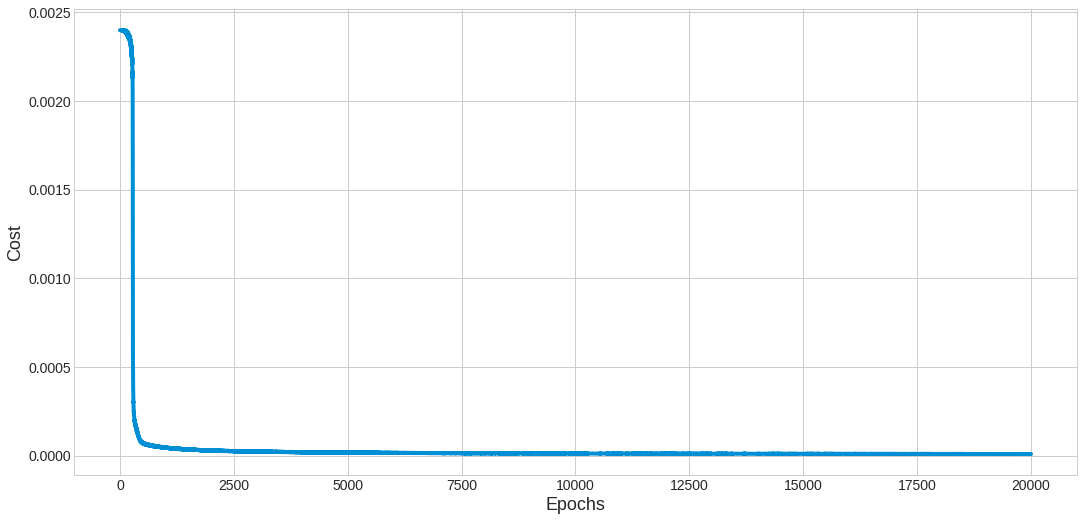

In [15]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,8))
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Cost', fontsize = 18)
plt.plot(model1.plot_x, model1.plot_y)
plt.show()

In [16]:
#Get the models predicted price values
predictions1 = model1.predict(x_test)
predictions1 = scaler.inverse_transform(predictions1)
predictions1.shape

(2098, 1)

In [29]:
#check if the predicted values are close or not!
batch_gradient_error = []
for i in range(min(predictions1.shape[0], y_test.shape[0])):
    print(predictions1[i][0],"         ", y_test[i][0])
    batch_gradient_error.append((predictions1[i][0]-y_test[i][0])**2)

260.3962105985096           257.56
264.5309832538264           258.13
263.14720016781416           258.64
263.27295567289514           253.88
256.7696061637619           263.46
264.0477712048527           273.04
263.1387572242428           274.62
257.6836218421431           276.26
266.36311730781483           280.74
279.6019551204056           284.28
275.3302602140084           277.94
275.95540638225816           272.86
275.5369549950123           272.37
275.54556124469303           268.09
267.5877812169797           266.4
265.86559784491817           268.68
268.57817419875795           268.1
266.6805636322646           269.49
263.67524293643993           275.59
273.48574529112517           277.14
278.50010091549376           276.43
274.3980842066251           274.88
272.09781849209776           280.11
277.38785710775886           283.55
281.419679971573           280.8
281.9720573843521           281.78
275.3946166337409           279.48
285.1117910927042           279.71
277.46022386

546.6429572160118           542.75
549.1361939842599           523.36
541.20711361017           503.88
531.6232747528758           498.42
516.6336021272497           486.57
501.08658200718753           507.01
508.80000401568543           511.84
501.7760072644269           508.54
503.00575476498784           505.56
480.220992773097           506.82
492.3150606694839           505.77
486.5247822897363           507.81
505.12498380153966           505.55
497.37555030406475           493.0
493.17266438604804           478.83
471.6871443482182           476.12
467.8412104480184           473.02
460.8748060874935           482.01
488.7034848793719           483.62
494.39860746703397           480.59
480.8134601598932           477.76
469.79612204413866           478.99
479.1415099361255           470.22
475.10567336871526           466.09
478.12495018541193           471.21
486.53433750353196           477.78
465.6181090283832           493.06
472.68858052955886           496.7
492.917024740

<ipython-input-30-412600fdbbe1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid1['Predictions'] = predictions1[0:539]
/home/ujjawal/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ujjawal/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8377 missing from current font.
  font.set_text(s, 0, flags=flags)


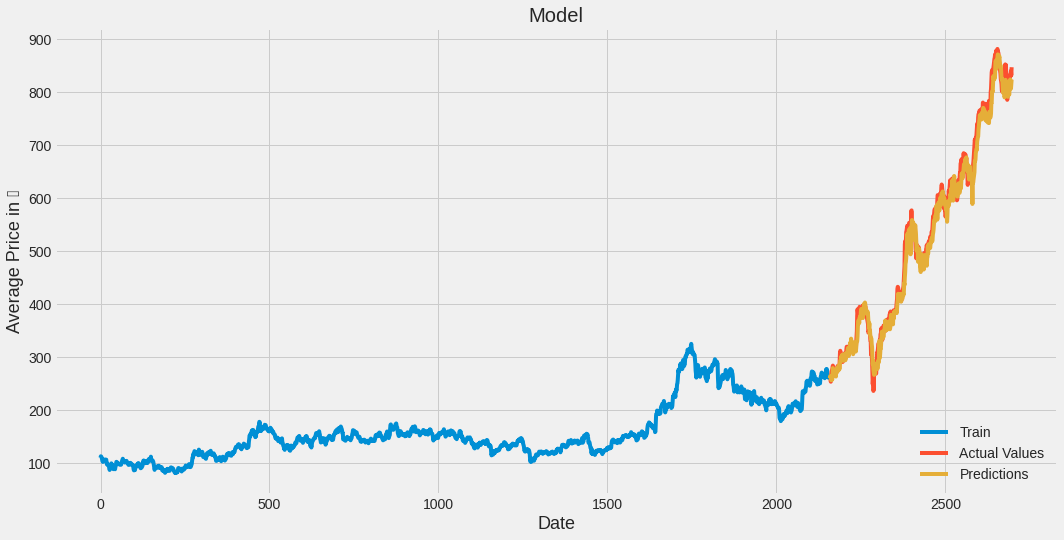

Error : 
376.0346189475698


In [30]:
#Plotting the data
plt.style.use('fivethirtyeight')
train1 = data[:training_data_len]
valid1 = data[training_data_len:]
valid1['Predictions'] = predictions1[0:539]
#Visaulize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Price in ₹', fontsize = 18)
plt.plot(train1['Average Price'])
plt.plot(valid1[['Average Price', 'Predictions']])
plt.legend(['Train', 'Actual Values', 'Predictions'], loc= 'lower right')
plt.show()
print("Error : ")
print(sum(batch_gradient_error)/len(batch_gradient_error))